# Dynamic Programming





## Introduction






&nbsp;&nbsp;&nbsp;&nbsp;In the last three decades, industries have shifted to a more tech friendly environment. This created a higher demand for programmers, scalable applications, and the ability to improve the applications that consumers and employees use daily. This created a demand for finding better ways to **optimize** programmable applications and increase performance and productivity. Humans are problem solvers, always trying to devise the best way to find a solution. People complete their task in different ways. Some solutions are effective but take time. While other solutions may be finished quickly, the job is sloppy. The same thing can be said about programming code. The goal is to find both an optimal and time efficient solution that can limit the run time of the application and give the user more time to complete other tasks. An excellent method to complete this goal is **dynamic programming**. 

&nbsp;&nbsp;&nbsp;&nbsp;Dynamic programming is a method created by Richard Bellman in the 1950s. The top tech companies, such as Google, Wal-Mart, and Amazon, all use the dynamic programming method. They even use interview questions to test the knowledge, critical thinking, and analytical skills of their candidates to see how much they understand and comprehend about dynamic programming. This chapter will break down and give a generalization of what dynamic programming is, how it is applied to code, and will break dynamic programming down into three parts: recursion, memoization, and the difference between bottom-up and top-down approach.

&nbsp;&nbsp;&nbsp;&nbsp;Dynamic Programming is mainly an optimization over plain **recursion**. Recursion is when a program calls back on the same function or variable that has been declared.

In [108]:
#Note how the function calls on itself and we have another call to return recursion(). This is one of the most basic examples of recursion.
def recursion(): 
    print("You could not live with your own failure. Where did that bring you? Back to me. --Thanos")
    return recursion()
    
#recursion() 
#Removing the comment from above will cause the recursion function to loop infinitely because it will keep calling on itself.

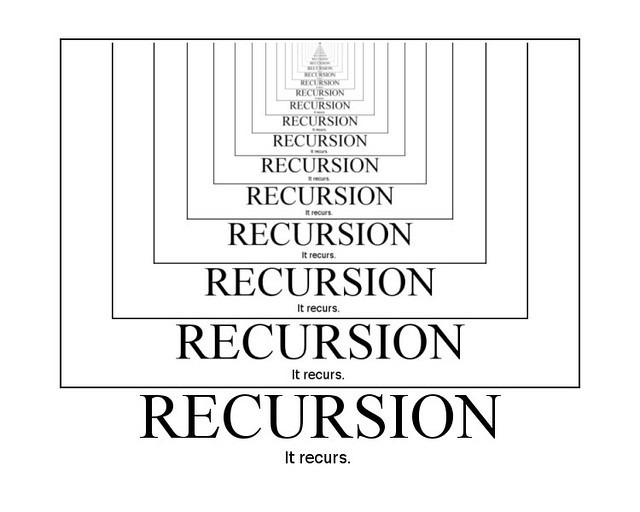

In [2]:
from IPython import display
from base64 import b64decode
base64_data = "/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBABAwMDBAMECAQECBALCQsQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEP/CABEIAgACgAMBIgACEQEDEQH/xAAeAAEAAgIDAQEBAAAAAAAAAAAABwgBBgIFCQQDCv/aAAgBAQAAAAD1TAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYjDQQAAAAAAAAABv0oAAYrtYYPi0OSTjHMkGj7w1DbeWrbRr/AH3U/t+nLh+3xY+z8+fD8/x7joNh1fZ86duLR93yjeRuRG29/cMV6sUABiu1ig62KJpEMzMRjJyPZBzo+8altWvfT+v6fl+2n/nun4/r+f5fNsep7bpG7o8kNGMnENTJkhWWOyGK7WKAAxXaxQdbFE0iGZmIxk5Hsg50feNS2rXvp/X9OHzRx8cq/t+n5/l82x6ntukbujyQ0YycQ1MmSFZY7IYrtYoADFdrFB1sUTSIZmYjGTkeyDnR941Late+n9f0/PVup+Db++/X8/y+bY9T23SN3R5IaMZOIamTJCssdkMV2sUABiu1ig62KJpEMzMRjJyPZBzo+8altWvfT+vH9Im+rp+8kv8APl+XzbHqe26Ru6PJDRjJxDUyZIVljshiu1igAMV2sUHWxRNIhmZiMZOR7IOdH3jUtq176f17GPtd59N9Ugbf135fNsep7bpG7o8kNGMnENTJkhWWOyGK7WKAAxXaxQdbFE0iGZmIxk5Hsg50feNS2rXvp+38arSd1Wv9r8Vhfq+D59j1PbdI3dHkhoxk4hqZMkKyx2QxXaxQAGK7WKDrYomkQzMxGMnI9kHOj7xqW1a99HLRfp/Dqvm2LH77dx/DYtT23SN3R5IaMZOIamTJCssdkMV2sUABiu1ig62KJpEMzMRjJyPZBzo+8alteu7HiBO17HpOs497+8wtd2PU9t0jd0eSGjGTiGpkyQrLHZDFdrFAAYrtYoOtiiaRDMzEYycj2Qc6PvGpbXrH7xf8/b9bx6jYPg+Te9r+fatS23SN3R5IaMZOIamTJCssdkMV2sUABiu1ig62KJpEMzMRjJyPZBzo+8altmVdeH3d7z1Ph8ex9hM2WpbbpG7o8kNGMnENTJkhWWOyGK7WKAAxXaxQdbFE0iGZmIxk5Hsg50fd9P8Apah2D5v30D7tvZ5fX2r5Nz0jd0eSGjGTiGpkyQrLHZDFdrFAAYrtYoOtiiaRDMzEYycj2Qc6PvBii/cSx3uj/VFuyfb20TSJaoaRu6PJDRjJxDUyZIVljshiu1igAMV2sUHWxRNIhmZiMZOR7IOdG3g46Jq+5dH9urfFu+P1+j7dnyaTu6PJDRjJxDUyZIVljshiu1igAMV2sUHWxRNIhmZiMZOR7IOdD+prupdv+36df9Wq/BJPxfLwxtXx7C+Xe8x5IaMZOIamTJCssdkMV2sUABiu1ig62KJpEMzMRjJyPZByIkqHMs3QhYCHenh2w/x12u5UncZ7ksI8kNGMnENTJkhWWOyGK7WKAAxXaxQdbFE0iGZmIxk5Hsg5GgRlnfdSkuO+y1fb2s95+G3896CPJDRjJxDUyZIVljshiu1igAMV2sUHWxRNIhmZiMZORjs3IcTGWiat+Ms9lx5YzjkOGtyajGTiGpkyQrLHZDFdrFAAYrtYoOtiiaRDMzEYyc+L4svkqXv+rSzquNWsHAXWS5qn6cPp4RrOMhdgfZ9qMZOIamTJCssdkMV2sUABiu1ig62KJpEMzMRjJwOHl/a+KrO1jvDTC4FUYRvvTOY663vqtIsJeh3IEYycQ1MmSFZY7IYrtYoADFdrFB1sUTSIZmYjGTgfFXb8fwkDU946jtPi+fW9v17tfn7P7NanvmCMZOIamTJCssdkMV2sUABiu1ig62KJpEMzMRhJoZYYZwhjUu63SRsmcAEYygQ1MmSFZY7IYrtYoADFdrFB1sUTSIZmYiv9TGva3vWrfBtX5652f7/n83wb11uu91+P3a3sf5fZ12zD85SyhqZMkKyx2QxXaxQAGK7WKDrYomkQzMxx5CFIlint7xaJXe09ftm7TpuEH/TY36I40u0kB1b9Roln4ceRDUyZIVljshiu1igAMV2sUHWxRNIhmZgEO0RthDtg/ria5cH63sPQVMujtPnxcmOtavd532JrpaSdQENTJkhWWOyGK7WKAAxXaxQdbFE0iGZmARLqkbfrOHXxJK0h1+kbq+zhWUPi7/qus7rfNL2j45ZAQ1MmSFZY7IYrtYoADFdrFB1sUTSIZmYABhnUNS6TueykrljLGWMgENTJkhWWOyGK7WKAAxXaxQdbFE0nGrkhgBhywz03R9L+Hd7zkzgZwZwI8tHyIVljshiu1igAMV2sUHWxRNJjHIcdfp9uFoKnS71EyQVjcIRuHXj6Oj+6ylc+psDVW3UD/lNFUboQvIW2chw5ZIVljshiu1igAMV2sUHWxRNIA4+XMtzLUj050ChvpB+ul0C9Qa46luFG/VryX9LpI8we/v8Afv53750VibD/AKACFZY7IYrtYoADFdrFB1sUTSAOPkZy9b/L66vY+ePrVl5feoNctSgXfb6V+86/W7zj171j5+Tdz9HhX01/UAQrLHZDFdrFAAYrtYoOtiiaQBr3l7byNYUvfEnbalL8rUEt71kQbbXO7UBfpP3nneDT+y2CMbj+Znpv+4AhWWOyGK7WKAAxXaxQdbFE0gDjxZyY/PP68Pk+rODjx/Zn8X7YxjnyAEKyx2QxXaxQAGK7WKDrYomkAAA40lk6Gdm+O1G5AAACFZY7IYrtYoADFdrFB1lUJLBhnGcZceWM8c5x+fPhy48uWcMZzgxywMgjW1/ZDFdrFAAYrtYoGAPzqR9GLWQ5EMk/jYWAOMfWIqZdbV4k+Lqf0tbitX0ypBm9TzXT9N2+mut1ehrlaH7QMhiu1igAMV2sUAA867J1em6UKY+lsXwz19yauWY8d/ZXhVrQt0j3sNh+a1UUVdsdWO48v+VPpP5W2bvJUq3IAGK7WKAAxXaxQADzs7CK/SXT/Ou0tl/Jv122ji8b/ZLFWtB0LS/Q3YvG+YvT/wA/LGeYHuTy899+7Cp97tFtsABiu1igAMV2sUAA87Zz87PZWOqX+kWpeb19Jp+HPj57IfNWqOtkof7C9du9ItI5WN87PYTufNC3UeWl8erdXeAAxXaxQAGK7WKAA/Pzenrc6Y2dq3cyGrZeddlu4sl56z71Nh6R7bOtArafDz2msU6S7WeX4vuLSG8mrVDvwABiu1igAMV2sUABjjkzjOOXHOOXHDlxznDDIZ48sDkABiu1igAMV2sUAAAAYhTpI87Dc/kxZLIAAABiu1igAMV2sUAAAAY0fptZx1256xPfMAAAAxXaxQAGII6wAxkYyM4MMscsZYAAM4zhljOAM9pOwAAANJ8wbZRbdrZKHdjKcN+gvXU13vUdk+Kv/oz9FErWVM+fapPsx0dNpBjO7HnnK9z4Jj39fvsTQORLpdVRS3siZAAAAAOPgL771JpX7H+bsjXahaZ/If0YmL4qcyfQn18xR68Hm/Itzf50/wCjqgmw3aqXbPystZL/AJb+yLyytvKf8/8A7jT9R68OQAAAABjwF97vMuUL4eb+LU67Yv8Any/oa54+CDaEevKjt4fOGQpT81/a+I/Cz0O9Bu+8qrVwR9fosqhST1Nqv54e4FUbw5AAAAAGPAX0TpP7e8/N7brfxZNv8+n9EXNiv9BPXzFILv8AnD0FNvcaQM6l5gV196vLa1dfO59FFXaIeqkJ7F5f3bvXkAAAAAcfAX348sZJ9B/N+RrudTEXk569S3wir7fJ/wBq+NMrnecEiSp5c+4tbrFff41+r/nDauRPMz2XebE8TnCtpaOedHv3yAAAAAGkeRXqJLPkJe6tvbzxW70G67zfm/cbHbX57yh2W9Sv51bVfSgyY4/keNrleZ0z3jqj1nbdLcetMaXgUAv/AMgAAAABw58TOTi5cMcuThhzxnPDljjy4cuWGc8Mc8n5/pxzkAAAAAAAARLH8o6x3H18OgkfaAAAAAAAAAAAArzpe0QH9/1avN3fWP5AAAAAAAAAAADGMsMmQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB//EABQBAQAAAAAAAAAAAAAAAAAAAAD/2gAIAQIQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP/EABQBAQAAAAAAAAAAAAAAAAAAAAD/2gAIAQMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP/EAEoQAAAFAwAFCQYFAQQIBgMAAAMEBQYHAAECCBEgN1YQEhMWFxgwNDYUFSEyVVcxM0FRUjUjJEBQIiUmOEZhcYEnQ1NUYIAoRGL/2gAIAQEAAQwB/wDqNendI7JYghUF2uEum5d4aGuPk6u8NDXHydXeGhrj5OrvDQ1x8nV3hoa4+Tq7w0NcfJ1d4aGuPk6u8NDXHydXeGhrj5OrvDQ1x8nV3hoa4+Tq7w0NcfJ1d4aGuPk6u8NDXHydXeGhrj5OrvDQ1x8nV3hoa4+Tq7w0NcfJ1d4aGuPk6u8NDXHydXeGhrj5OrvDQ1x8nV3hoa4+Tq7w0NcfJ1d4aGuPk6u8NDXHydXeGhrj5OrvDQ1x8nV3hoa4+Tq7w0NcfJ1d4aGuPk6u8NDXHydXeGhrj5OrvDQ1x8nV3hoa4+Tq7w0NcfJ1d4aGuPk6u8NDXHydXeGhrj5OrvDQ1x8nV3hoa4+Tq7w0NcfJ1d4aGuPk6u8NDXHydXeGhrj5OrvDQ1x8nV3hoa4+Tq7w0NcfJ1d4aGuPk6u8NDXHydXeGhrj5OrvDQ1x8nV3hoa4+Tq7w0NcfJ1d4aGuPk6u8NDXHydXeGhrj5OrvDQ1x8nV3hoa4+Tq7w0NcfJ1d4aGuPk6u8NDXHydXeGhrj5OrvDQ1x+m00pGZT7EMhNJwF1LPxb0499rOrm4/wAK5uP8K5uP8K5uP8K5uP8ACjeXRFRhcLY86OVs452IgOJSxB9r5uP8K5uP8K5uP8K5uP6Y2pnrJxbuu4nrBVzcf4Vzcf4Vzcf4UnqZow61hIFsH7Pzcf4Vzcf4UunzCeOkYF7B6ubj+uNq5uP8KJnBh1pRIZ44dFzcf0xtWRkSy3gQtjj0V8cf42pOHENBjZC440KLlidAAtbHmDZ3wHL4Y446ud/erA83Hm453vjr5uNWv/yxo8JkEUEzDzxwzIiZCkwRBM8c89f/APONZZ3tjrtjjVsv71cHVjzQc7iDmMMscdQQl8zw4F7Y81SHzK4A5BWxrm4/xtWJkW63mQvbDoubj/CjpwcutJpHDo+i5uP8bVzcf4UhnzCgYVQzNg9XNx/hXNx/hSgpmizrR0gOwXs/Nx/jaubj/Cubj/CngsnUTJCsQsFVsbftaubj/Cubj/Cubj/CpFWzjYYi+4kzEH2snl0pYIXPHHnc3H+Fc3H+Fc3H+Fc3H+Fc3H+Nqbm+14+NenHvuZ20oeRM1DG6do7McfO69hI3gOTldfmm9VuRN9TrXJl6oC5Eb8o1Q/8AVStGvNk6v5/GsPl+PIrHMBBrl8BMNSCew+BfIYOr1l8lW/qGVFfNnKA/qpulr8otVqx9VCcip6nROVqebcPKr7wG3sSR87U2Zo3TO+k/yJbabm+54+NenHvuZ20oeRM1DG6do7McfO69hI3gOTldfmm9VuRN9TrXJl6oC5Eb8o1Q/wDVStGvNk6v5/Gsfko6bBTiwhs3fLAOxnHMvmJkpXHyKKAGGOGfvq1rlTARwAMwW52QeX4Vb+oZUV82coD+qm6Wvyi1WrH1UJyKnqdE5Wp5tw8qvvAbexJHztTZmjdM76T/ACJbabm+54+NenHvuZ20oeRM1DG6do7McfO69hI3gOTldfmm9VuRN9TrXJl6oC5Eb8o1Q/8AVStGfNE6v/UMaD6PPDLG+fNpbuvdIFglYBDAmsFXAvlcXAEPEni5bhAc0qTvilXWOcJiqXCwxE6PDDDCwnOq39Qyor5s5QH9VN0tflFqtWPqoTkVPU6JytTzbh5VfeA29iSPnamzNG6Z30n+RLbTc33PHxr0499zO2lDyJmoY3TtHZjj53XsJG8Bycrr803qtyJvqda5MvVAXIjflGqH/qpWjPmidCihhn8biCY41cQhe+vngXuA3ToZnITJZAzwNJtgC98hDgXOAQDwpIPENeDtlihGbD4GLLQVq6Uha+vngWuEKGKeyuHnjlYr5s5QH9VN0tflFqtWPqoTkVPU6JytTzbh5VfeA29iSPnamzNG6Z30n+RLbTc33PHxr0499zO2lDyJmoY3TtHZjj53XsJG8Bycrr803qtyJvqda5MvVAXIjflGqH/qpWjXmydXxxv+NrXp4oZxcJAF04YMHPBuK+Nh8uZhjdSSfZbKHOzALBpjbU8ihexc8EMIAz1b3dgRMGcb5oKYcTgRQDw+JirWxx/C1rUV82coD+qm6Wvyi1WrH1UJyKnqdE5Wp5tw8qvvAbexJHztTZmjdM76T/Iltpub7nj416ce+5nbSh5EzUMbp2jsxx87r2EjeA5OV1+ab1W5E31OtcmXqgLkRvyjVD/1UrQxcEfm9NhbKvdxL/0aKrC3dJNZmDA2AoQnSrOaYObELlc8zdklT6QcX2skeXM0cUT/APaIHzxpduWF9oDTQjriCAyUDQIohaycT1fk0CXBL2vYIO2NgP6qapa/KLVasfVQnIqep0Tlanm3Dyq+8Bt7EkfO1NmaN0zvpP8AIltpub7nj416ce+5nbSh5EzUMbp2jsxx87r2EjeA5OV1+ab1W5E31OtcmXqgLkRvyjVGwjdzQBktgHnXSKn/ALQvR57gJp4wQOg4h5l3N7UbMEAU22eXWsK5bA7gQxEKqC8IOngLQQwpcsnO4tgXNDGDWItCOnEIyWIjkbBC4O4ITAAXAoHfBLdYS0WIHUwIEwB0qr/7MvRQI3Y0OZM4B4UtflFqtWPqoTkVPU6JytTzbh5VfeA29iSPnamzNG6Z30n+RLbTc33PHxr0499zO2lDyJmoY3TtHZjj53XsJG8Bycrr803qtyJvqda5MvVAVXpG/KNcl6XmQrKTiOrxYUCiLaUwFNYOjlQr0gIKuntvBqG7AdDkiG+q4bfMGCeBhHaBkkWPpQgZBXKWj5T/ANXk8zueZAJqKQxJupxzIK2KKzzSOrklEoZwBK/9eRa/KLVasfVQnIqep0Tlanm3Dyq+8Bt7EkfO1NmaN0zvpP8AIltpub7nj416ce+5nbSh5EzUMbp2jsxx87r2EjeA5OV1+ab1W5E31OtcmXqgKr210GlnQbi2LqmWGHsSp9ZpZcyukroyGF0hnIN5Gzl2z7sHFHDGX1QuKRThR8/eay511Cxx9uAH1uj/AFfc8KdKhHMUFdAwUgyHQZJxlIcymtJ4CsRHuKSRnoaXCyL7EZEsdVX6ZSCp8ce5nMQupHTxwmERVcRy3sSp9ZoRLOD5Be0quWeFY+qhORU9TonK1PNuHlV94Db2JI+dqbM0bpnfSf5EttNzfc8fGvTj33M7aUPImahjdO0dmOPndewkbwHJyuvzTeq3Im+p1rky9UBbDxYig6nUKYv0hYoYQnIpnGecVm4Xow3FoBbRXOmI+AdO1JWnOjg4gFMAB3Gkqq4nrGZchcMVrtNwNRRBNlSmJguRZJoiu++URNujYtFlrjc6sLIxfDMzg1lP3squQUtbIdvM863HSOKQM4XQLcuPqoTkVPU6JytTzbh5VfeA29iSPnamzNG6Z30n+RLbTc33PHxr0499zO2lDyJmoY3TtHZjj53XsJG8Bycrr803qtyJvqdaq9HQlEJZCPlCPtIfty19BvXty19BvQr7IAGRyQwhAMwfdXuoAIwpFixQEq6bnjNypEmXHGFepcvnmGYDKB3DdmIyh7oCAK5Hjvu8DEwCOeGKXQjhYY6EKlqOagKbd2BEXIsdLFi4mbswDOgJooBXA0addiAlwDpUuCIO68SgpUA0AVBENOEwSFBBOJ4YAnty19BvXty19BvRIJSFWRVA2SsXDpU9TonK1PNuHlV94Db2JI+dqbM0bpnfSf5EttNzfc8fGvTj33M7aUPImahjdO0dmOPndewkbwHJyuvzTeq3Im+p1rZdCsZRXbJxoBExPF3ikAIMSs5IT1LFTDe51xJrZc6xgTKBKLKS0QxHSSmhhhmCCWXALTiZBAxtbB9YWujyDfm2vTbvddeDGIqQFkcVzFHWzVRwuZKIl3O1xjicpSdHaglW/ukHZiKLHHUlS3SKCKiYO1kGGyrZi3T0FxKV15HY7vyx6wbCp6nROVqebcPKr7wG3sSR87U2Zo3TO+k/yJbabm+54+NenHvuZ20oeRM1DG6do7McfO69hI3gOTldfmm9VuRN9ULeyUaCMSXFVfwwGzNZRc2LIpdv4XP4JwLbKYqGKkYNHDYqaw0VIwuVTRT5cgtoaLYfBymLikzJ8djjowqIoK2dsDCZH6gWRUfJQy6QVnponttrGj2GGbKQ81lLW8QxQjF2mm4mTg5MQyRrJrJNiaenlgsypc4gpSgqkFg0SwzO7Cp6nROVqebcPKr7wG3sSR87U2Zo3TO+k/yJbabm+54+NenHvuZ20oeRM1DG6do7McfO69hI3gOTldfmm9VuQVLWQlY2opp4nhh0Du+oJVdA7vqCVS4qrTbTDCysKyaCTLyGAaxThMXQlhBuB2G2sKRBXF1OL5hOVUEUCyVdSKgmTrgVE8/7qzWE4c8A8TJgU8WxW0+xhAXzb0RMVdEWEs8nGVxOxSj6qaNJWJEm5G8N7vsEpoJfBWV1hDxA94LCXiIScikonx0ousJ/t7bdxl32NZt5fTTVuuBy4YpgBXJmSys8hUNEDcqg5EqyUAbXzJDBUKq6SYKoiqtOJPDVElWTRSvQO76glV0Du+oJVBJayOrFFJSPE88eRqebcPKr7wG3sSR87U2Zo3TO+k/yJbabm+54+NenHvuZ20oeRM1DG6do7McfO69hI3gOTldfmm9VtmWt2Lqo0ZzfTXYUSDl80e86XFCHYFywfSCEjC2eXcgVhACLlYBHEVybqcqhlzlJVTCdsT6xiDqN6Ou5htU6N1sj0eM5P1HYkUGi+aNeT2g6FcdGdDFUi4K/HshAOpxGEhyNswgvAiqKKPC0rKSWJlgZYxImnMtEJkA7YgNbMTBuS827f6SW2xh4ZchdmKQ2YjQjn0SkX2mp5tw8qvvAbexJHztTZmjdM76T/Iltpub7nj416ce+5nbSh5EzUMbp2jsxx87r2EjeA5OV1+ab1W2XuhG3S1VRuEjYRbNRin3zHiU0TqpYFUdTDdrsLtr21eTcTRtKdaidIe2qxEAiGwVZuOVScLHVCpcEgnqN7iGFo6GOM02avMZLzbjfUSIyWuskwosdTaRNRwwHVYsutsJKbJxUxAVskJ3jCpKgI4CljpRpGhXd13VxiuSgyY0Fb6Q4kJwHCioTQ206GyjYNxJWSYxPGPME5kn2qhG8MDK61k92toduuQuGOCy27dpNVMbdzmRraanm3Dyq+8Bt7EkfO1NmaN0zvpP8iW2m5vuePjXpx77mdtKHkTNQxunaOzHHzuvYSN4Dk5XmZAKioAxkYMELrO3Pr6bXWZucQJtdZm5xAm11mbnECbXWZucQJtdZ239fTa6zNv6+m11mbf19NrrM2/r6bXWZt/X02uszb+vptOgylrPsdyDvTy11Oxwyp5myclkgi+WKgKGYwzklPwog4kYImCGdcSXmP1mbf19NrrM2/r6bXWZt/X02uszb+vptdZm39fTa6zNv6+m11mbnECbXWZucQJtdZm5xAm11mbnECbXWhufX02maYANCL5gsMGKFyK+8Bt7EkfO1NmaN0zvpP8iW2m5vuePjXpx77mdtKHkTNQxunaOzHHzuvYSN4Dk5TBcAzh0ZgAMXD3Ok/Syle50n6WTr3Ok/SydGUUjmDliXIkghIycLzkAq4RvZ2sWzit5kX8Arp6o2CKctJC44laVnDHvQN8EuVTHATchQookkU8lGXGGtvQ0xGYjJlxXYC7GoRBUyZJEWQHq4lpBlJqshNIINyKqkghJg4hEkQwMqi4vJsM3kS5RByUhFx6k4wAknFJbChSM6Wmsx8HIgKOBiRaWa+8mqSeZDFvg0MpK14tMPC6IkEVlgOMqpxgWkV5FkguG1RFh+JATnKEk1DTkVyAdbDkdOdITCi6FI4jWlHKP5CTEP2KRbit1pnV1BIJNjBREJ4AYYmyREYb3Ok/Syde50n6WTr3Qk/SydAFwC2HRlwcAseRX3gNvYkj52pszRumd9J/kS203N9zx8a9OPfcztpQ8iZqGN07R2Y4+d17CRvAcm3eo/X3012bIq8zkoidvBiK1irRu5W4qDKgqGAqD6Sb2xSlAEpm2CTnJH1cRyqgJ3DRpyE94yFioa/eOWOAmN8BMbZWkz4aQEYZ/op3tZONXvenXa+Oi8Zxv8LrTichGNWU2XDcFNZ6Q3G4hNMBsky4XuY3G0mw0OOuRAqXWUDrynSLBq06EwtkWDXcDuWhkS9i52thZl82O3RCt8ehlAMcTSIjOyfa9zC8ykeQHC8W2th3uF1zWU5nOOI3/nqcFttX3gNvYkj52pszRumd9J/kS203N9zx8a9OPfcztpQ8iZqGN07R2Y4+d17CRvAcm2YuP0WXs2AeQsSRy4Y+sugrB9OOhtiM19gu5UPs5SJdWkyP3skyeuyICbRRbCorzV3Alm1o4lF0pYjVYT3oPIMeqhUgogJzyWbYAuQRNIFZBj3N3joy4mKGJBcNFXqtksko7ZMTQ38zTziYJtjt8UqUwSGBiYjYGO3hgVOAM1ivdvs84xVpwElMomk5FRkYBH9oSFMcvGg6FGJ1gt44DmYYLENIEeFo/c/sKgXazWdTCTerSKOTVUhusUQm5Tb5cRsM+upCG4ibzV185mn3JytFSZJicUsLliXVLbavvAbexJHztTZmjdM76T/Iltpub7nj416ce+5nbSh5EzUMbp2jsxx87r2Ej1+5PA+H77Hw/fkvQKo6sXefLD2y92ZPKQwzXQDt0HEIu63kaUAU/FD5lMxaV1kgLkuEcipv4V/wB+T4cnw/evh+/gK+8Bt7EkfO1NmaN0zvpP8iW2m5vuePjXpx77mdtKHkTNQxunaOzHHzuvYPNZazcJtdRnTdPr3C+OPcK9wvjj3CvcL449wr3C9+PQ6VclxBDsKtSmRIhhucAb8qcUHOgEt3GgcTBaRABQlNVNIo/sizMSSRGu5Q7fjNiLSYA41opieR5NKHSyrivIRf2tYlAmSBIL4qmN7OSl9PyFOHVFOKAqChLSaWLJI6svc66HK6efsrG1RBvjiuSynJ9GlU0RLhmzsvpZcAFyhGL2sDN6DnQaM8hg7CgyCFngqAuJEKXPK8mlCRcgujKeImRSX0/KlQVZRAcDCxKZEkEkmVRe51kSWE9QpTCcKMWudVpOJkwExdGWDViKdLxAUyqYOBDLWOLMnEyICR77XwMjKHKieoAnyjoSy9zajJBcsAkjK69ryRJVIH8fcL449wr3C+OPcK9wvjj3CvcL449woi1lvBwFF1ZdF1DYkj52pszRumd9J/kS203N9zx8a9OPfcztpQ8iZqGN07R2Y4+d17H/AD2ZlBCHit14DB4546OaAhnoRRwTiOSHw0cRzSbJz9Z6IYEHaml2AFkitIW4WN8hy6WXJZmDZYviCjJqHHTdWFEEXHBKgkIzJop+YXgHiaNO9noL3RDCE4CAZgB5t8dD0bDzeVcMRBtHIuCDDDZ6ILHCpuKFjbJwDNAYC4aRxcESF3HbMLDK0UNhtKsLN8gqopEUronKKre7tbwRoYy35deIDRnRqKD3Azzaz6aralpli+x3JqGctlgxImcgZkHHKtG4QmmQaknxMcAQ4PNDS6trMrufDpg3yzEp7t4ykKINriaPz7MyG01BAd2ARxULDrkHPpbfaARtkykxTTHEjgqiaYDOEYMLAFosQwywOAeGx8NiSPnamzNG6Z30n+RLbTc33PHxr0499zO2lDyJmoY3TtHZjj53X4Mv7rXZam83ZEN6NScpMd2qWAmj8sshaYJcwzEgulX0vcLZt5q43vfU5IoR19AMpeCquh5yWnDqMYL7bJi4ZqGicoFjcPESoN7dJrtU1W6eJXViFfnVo554Zws174X11MeNxGgCDj82kZuXc9LCFIWGj63l1tOdQNkIbVWQssJPPMJPAT011ttoPwuM03Mngn8XPHcgaOGQr4jhxDH229l0u54LV3EVxviFCJEZU0bSyaXv/a6HhnDs2PJWduYZzzxCxvnnfVjoop4wq1ILowxvYmx0hPXSD5R1UoGZJtRRUtHd8dnzlNCCsmEtV4wQ/jbwZI+dqbM0bpnfSf5EttNzfc8fGvTj33M7aUPImahjdO0dmOPndfgyWjuBxs5UbbeAJ9PDDSc7BZZNoOLAgJe8SO1mScZfEXmksNMmmOn/ACkTRSSYXR0+3t0kWBtj1VQukYTcdCcbWl97GSQyrjFLtj10HnNEh5P9hAGlBdD9lPJiU2w8G8l4oN23cvzyLCZz6iYmK10suTcbesiON0KpFQdIRUinzA1nK+GWfaDeCIYZRg319sspOajkLEcs0CJ3pG8gKSzHZlLEa602H3m+S73byinA4PFGfMhoozRMpRNBT3m01UzHZlhs4qTwxhhouhgs0m0HDgQFrON1VpPQ4+I7GLY4r5SR3gnCoQBYo2C7ZayaxGwWbrYIY2AjtDeLfMrlnCVTOifzFRJEbJlsroPOCjBrnWUxEdrKAoQhjwJI+dqbM0bpnfSf5EttNzfc8fGvTj33M7aUPImahjdO0dmOPndf+CdC1dvIZhXsX6eiL8DFbfWM6iKBfECX2qbNGCRIM8YMmJKQSoAw5ouoBUmvhNVF7JuhkzwJr/BSR87U2Zo3TO+k/wAiW2m5vuePjXpx77mdtKHkTNQxunaOxemo/Wc2lB1pq84CpEz2vRpxmnV2vRpxmnV2vRpxmnV2vRpxmnV2vRpxmnV2vRpxmnV2vRpxmnV2vRpxmnV2vRpxmnV2vRpxmnV2vxpxkn12vxnxkn12vxnxkn12vRnxkn12vRpxmnV2vRpxmnV2vRnxkn0qSVE6ySETlB2J4gADxhkuUyTw3QS9nzWYKy9o1OQrhQilAgo9xxF8nlkM64XGWusGbrKe3dr0acZp1dr0acZp1dr0acZp1dr0acZp1dr0Z8ZJ9dr0acZp1dr0acZp1dr0acZp1dr0acZp1dr0Z8ZJ9dr0acZp1dr0acZp1dr0acZp1dr0Z8ZJ9dr0acZp1dr0acZp1dr0acZp1dr0acZp1Op/M9yqDVTkFwFTxm34bE0bpnfSf5EttNzfc8fGvTj33M7aUPImahjdO0fC/wC9Kg6sXK3ER08ucHZOkU4ZAWjaC3orEyMrs79RlYqmySylBBAKmi54sGdJj4DgSbPCrFyynI6sxsDVdZJM1a7RunU35EXTz3zYzmZGaIYU1MgjEB1VUNhlSiRJjje/ONx80LDJLhkh1MIiIqvZk9KmIbyVXKxU15ISECYzjCflaU1k8kIzB9kve+fNvfG1r3NSU7C0gFo96ggCGpRkxbjFA6ym2iCokGjKj9ejdCc6TFH9yY85Np3uEdmnk88guKiknqrwWD6TGyCWUizrl1djwpcd7McbGymbWAiVh0dMBOGI5n9YklxnG0mR77IOZOAESgh0+MEACkSYsPnMcaOmxibS1mS3ExejNSK0gwEkVWzNInvdthAKtzOkdm3HsUZshMM23KxytnjbLDK17SY+1iOW+ZdAbZCVk9vn1pRIhm1pGATRP++zq1/jszRumd9J/kS203N9zx8a9OPfcztpQ8iZqGN07R8O9aK29SRK0wD6OXi3EgdzD9tgNLWEeJG6QXMBMDOmF6kYVW+W1EMUBzqADpK4XFMaTbkOOh9tiGSBjLAsmpxRJIFkwgDiEWOFC54qMSNhYigMNsWZrTT2xYTpMND31VIHIc/3hUutKvcssVo9auxhq1KAeTl0q0Usz7XEOqZcY4mGyhcXohYGl8CHjKhGUjlBk7BypSRIzKOJpU2WNFAbXxCwxy/HRX3rSJWly71DPNBjBLGuHZuohJtoaegp4Vgy68jk3AjnURQBsKW0S3WoE1RxRUpGekDnqPgJNf7caoxnMuLo8ykrJaiLCkj3yLLOkLuac1Y/hbw5o3TO+k/yJbabm+54+NenHvuZ20oeRM1DG6do+HetHtEPrkkyAXIOVSRsmiZs1J1Hbk6BYLZ62rVWmLjgK4GMFn8osQsoyBkDmCraoyZ3UFrYtfDPLMGXdaNpYNtVP68C1tVraq+HJog/6DukAPL4ZUax52kGnXtWlXuVWKQ2fIh/R2SlRiPpaBOaKS8yldtDlk9DKp7myva1td7/AAkGImJLacGZVClvaVVClvRYVQ1hKUvebYazgJOtuJrkT/L6K+9iRK0qgM02Xmc4Rrf3XHLHPG2eN9dr6q0aiWanPDzcBbyri38s6tIKGhHwQDd7UxuXdQ8w4SZo/OhMV72CcmP4W8OaN0zvpP8AIltpub7nj416ce+5nbSh5EzUMbp2j4auspiIV9tVDXQBaNasGiSS7Tq6UOpwE8xGXlRp84hjhguwdNBsyhgtaRyiinLGlKqguVztXBAKnFHEOYY+yCxy98j2pZkAORXkhsRpF1G6XPsO5yghlzqKNiXcLMn8sjkQW/MSYfbS1aWEtwY+yR0UMOA8gp55LSgCqkpCKBtORFKApiV3IbSzhpn5y5HVi3tALrJmqZaYqrDqU5FW08ZPrSjVipiNjzYJYjG1PR2WiIsYIKCJcUBRmViOCLX+TmqNU8QUNlyM3nyn4ikMTRU1DElDorJSkWSEs+hCzK50uSGmPHLBtg4VVukkiMGMkoR4/bEHRtVgkOS3YeWyh5PAmWLSEtNC6T0uIB6PJMFQEcs0pYAEb6285R96pw7eiwvm4lyG4tJRU1fduQ9jKk4Xmh9ubXNYij5kwBwTQOA4Alsw9JeFjAYw0mMvAXHLD5beHNG6Z30n+RLbTc33PHxr0499zO2lDyJmoY3TtHw9Vav3vWr9K1f86+Nf961VqrMIMS2oQPHK1sMcbasbarVqrAuWDy6TAELDL4fhWu342vXw/evh+tfj+NZB4ZYcy+ON8QwQgrc0MPHC2qtV/wB61VmEGJjzBMMc7YBBh48wMPHDHVWr9q1VfHX+lWtq8OaN0zvpP8iW2m5vuePjXpx77mdtKHkTNQxunaP+Gy/CnMKZAfZkyK4jyQTfC27yLhOYN0cTINLfLxzJY4Kj0LYJQ0grZM0UTruIYxksOh6FGWC4BXbkXu2lgJaSixmwmdx/8NNG6Z30n+RLbTc33PHxr0499zO2j9r3JD44W13jaRE5uMFvICq2ncGc7Ym/w+8K7Ym/w+8K7Ym/w+8K7Ym/w+8K7Ym/w+8K7Ym/w+8K7YW9w+8K7YG9w88K7Ym/w+8K7YG9w88K7YG/w88a7YW9w+8K7Ym/w+8K7Ym/w+8K7YW/9AeFdsTf4feFdsLe4feFdsDf4eeNdsLf+gPCu2FvcPvCu2Jv8PvCu2Fvfq33hV5dbd/xbjvvXa83devq68Nfa42+bfDq479Xa63L313bzw13l1t83mXbjv1Wl9u2ve9m88K7YG9w88K7YG/w88a7YG9w88K7YG9w88K7YW/9AeFdsDe4eeFdsLe4eeNdsDe4eeFdsDe4eeFdsDe4eeFdsLf+gPCu2Bv8PPGu2FvcPvCu2FvcPvCu2FvcPvCu2BvcPPCu2Jv8PvCu2Jv8PvCu2Jv8PvCu2Jv8PvCu2Jv8PvCu2Jv8PvCpKkVOcbAcKClNt3CHCFr4kwMMrXtfZbm+54+NenHvuZ3jZa/0qRp2NxZkUu62EfsC15rcryS8VpvQ64zBFN0kGNdfs1nYSVmsqY5Wzx52GXOtIL6V2ElnF/NnjqSUyZ/UZFLmjTMi1YUQs33I+Fud2JrOqNpaCkBYWkAZsKaGoXp1TG2kBaxaaSWPOJxYuiX8sPauypPxwWdJBtt62SY4G+tJLicquvJBe5pHbeaxi0NKMq+nCA2G3H6wOfTxTw5XARRJ2KjuVYX0YtkaSGwIsYRtLyjKAOSiiMM8VTpImg9FgQJ5yMQ8IQaM6Lr7Ie9GtELhOFAtJBnpy5ZuPhIWmmfAGCMh4GARcRQzJgEmAIZMjYBAp0vK72MGbReyhVpOUJhNMzm5SizT7fKMZ3F301ijqTwMwi8jTqbizIvd1MBQsXjqSVWR00svk2WbT0nLK2NudlfVYaZSKstDt2OUA47jp16SqjhZHVKJwzhZiyQ0ZFJZm20pXzEeLkX22AGZR2OpOHBmaUTTdDuCZ6iiKSEbtSsYUipXpUlNxPCtqaVh0ulTZqdGykEogZC5BB5DB9Hn4rc33PHxr0499zO8fTWtbqGh5frAe5xp1ppoCZkz0VzdFhZQ0YFpTXIgShlUbMbOY7WvFLvtetCL0+6Kyv8ADXrom0QQX8afpQ7jzdJCVDMaMm2COP0azoxsEBrx8XcpoLpFm1aQUfF3wxDRwuU5ywXz6QuGJWi1hh29L3+hbkva1/hetG7DDGNMebbVWmFb/wAJQ71ou7k0CtMBvpZ6M8F4cHCx7RFWVNWiv2ZREEEw0qz6kQhxR93554Y6MDzbK5GaY3UoUEFRWUdOcCWaRVYriZJwqhmGzG6W3jVsrCaa+rqMhXrR7t/4NNWtLOU1JJCKRm3DGQRqLWKQjpkpraJAWxErSJKn4ik5Gldnf3XJqONPdzbTXMmX1ltIWPFR2SyumGuWw9r0a5v7QUezVcZq13D+nwqMcbYzbLWq3jtzfc8fGvTj33M7x9Nf0Ch1HU0Npiw43xFlFc1gT5F26WygXPkjZNCaLVbKWz2+RbSKD0RKYt1DwrRMWnalIrhwbbJ9+ByXIEwprMVTJSJcitMf0W39VaZ58UeQ0pPy/KbJYMm3UsmFbUHyf9a0W9/jg5dG/drjWmHulwqE5ab7GhZM98IrkzBWjzq0tTeKY2hSiG1mEykeP2sRaqHhl7M4ENMcqMcQFkrYwSkLR7kWJlXrWwjh5QIRZpfX5wKNKBa1qIniamTBUE40EZLabHoVCrR83MtapbGzUtKG4Jv44W5NNEuGJHSUZv8APonGxzMNJwY973xSv955brSDihWjhxgzJHOOZYGH5TSpVagayV5oChGO+6W/Hbm+54+NenHvuZ3j6a/oFDqIUdOcUDN5EWCuJkkXFcWipLmQIuQhpupSoQW08srpZrAyTmLdQ8K0IfT7oo0UAOlhShnG2YRpSQWOkJxY6YyAK6abTM+1ob2Lg6y8POku8Y2QFsHO2WdGTIBMAU0ZFxCBLmATYARssJiIDo45WSdI1cTjWvEWhxcQAsxs/hjo4BCWihONCY3xtphbpcK0bSRVTgZHTj4GA5VwJbg0WZZCWkfAcw3m64Ep1IhJwohqxgi73MA0Uay0bw5wFv3qdNHxsvNFPuNvJ4ZBxaF7hUVBoLTfNiZZl9Nf0IhVo+bmmrWlOgHWjLqe+gQL+ypSkVWE0orEs7ZgVpprQfuJuNkG/PMwm0B2NGKE3zmHNNpP+8+t0dJFFEoMQPl8ByzrQHHotSWC623YQw2YMciQ75OkxyIJnpyPjNzfc8fGvTj33M7xr31fGtJ7BzSKkpLeaDIcJ3GB1VTT2GhtFwtdbSlGX4wTpVaAyIYvgCdgpcl2LsBmi7I4ch9DlV1HFeOlpGb7Qch8/o4ZO6Jya0QdUZu2+OcuWxtrxjZ+53Qxn3J0wJyy5GYpILXdbWRXmgm224CljBFAa0zaOKwZDb6OI72in6QqQdBta8fPnA3cg8JQGCxdKMI3GphhjhjbHC2q0nxC7m7JBeaYsJYHDabOLbFAxuuITnRTi4vu+TigrXZyAqIaSgoye3UcmhJQNgSekwM4Xw1SzRaTKX1AXRzOLDbYZBmOhoriYdk2PEiTGkabSrhjjlChiYoZUjzWX49XlVvTGCov6H1JOb6YewPNV/PdpJJdHlhnqfTuqVzrgSjSHFzYXFZYhaLQInZ2KLmPiZP6T4bmkRJSG+0WS4T1QIqKSYxEZnuFqLqUoSJHiBJbaHbS+FfmR8ckCEyFmW928oLzfNzQgig9G3G85l060YhcTqfXazMOJe6goHQ08pmbFDHzxTFxxBT2ovExHzoDQyZrE8VDNBhiY4vJpIj4bxtsuAr05PRqjdfjFyvtCWQc8gvGbm+54+NenHvuZ3j6q1cmrY1cmrk1W5NVq+H71qtfk1Vq5NVaq1W/atVarVqrVyauTVb9uXVWqtXjtzfc8fGvTj33M7/GXp8LCwnORnEks10eMIrzudDATVt2ey5iCzwcKtVPcSghJxG6PNZ90FySa10EiccAMkrWJwBOVmtdPNoMmLa+rpSaUbQWQMZSkff50cIwmpZYP/Gtzfc8fGvTj33M7/GXpZbJZbVkNXHHGDEYjJDYSXdEIrJ84n4xSmANpGQSCwpEzJiLrmSxMbJ6uH30ehlJNE04sE5F4rm3mCmt08GeKmzWeRGKsiKgYWbPZdMKVrf41ub7nj472Y7oW3OjuprOQklGurk2/cpu11cm37lN2urk2/cpu11cm37lN2urk2/cpu11cm37lN2urk2/cpu11cm37lN2urk2/cpu11dmz7lN2urk2/cpu11dm37lN2urs2/cpu11cm37lN2urs2/h2lN2urk2/cpu11cm37lN2urk2/cpu11cm39ZKbtdXJu+5Ldrq5Nv3KbtdXZt+5Tdrq7Nv3KbtdXZs+5Tdrq9Nv3KbtdXJt+5Tdrq5Nv3KbtdXZt+5Tdrq5N33JbtdXJt/SSm7XVybvuS3a6uTd9yW7XVybfuU3a6uzb9ym7XV2bfuU3a6uTb9ym7XVybfuU3a6uzb9ym7XV2bfuU3a6uzb+HaU3a6uTb+slN2urk2/pJTdrq5Nv3KbtdXJt+5Tdrq5Nv3KbtdXJt/DtKbtdXZt+5Tdrq5N33JbtdXJt/DtKbtdXJu+5Ldrq7Nv3KbtdXJt+5Tdrq5N33KbtdXJu+5Ldrq7Nv4dpTdrq5N33KbtdXJt+5Tdrq5Nv3KbtdXJt+5Tdrq5Nv3KbtdXJt+5Tdrq5Nv3KbtdXJt+5Tdrq3N33JbtMlkOdEc6w6XS5CSqa/wAQ4C7sGwDu11ZJJiOzSpmJmOZQaqu3mn7YkKGlIpEcDp1Ij1OzW9JR7xsuBIkrRrgBi0Xi330hgOJsn8DZM9gfEJi4Jw4ABqaZdmSHRiIooTRVSEcSHpAyc28XOhgx6WL/AP5Of+rGFOOWZ2YDrQEt7t5p5JVqOGyxAsKdOD4AACT4tPddHbEINTFazCaU8GcfaDkuoxEZfkGXoqA95PtsJzmQYQlkxLQ7nU7F8iqfLbsmCOW2ZdqUYaasRiefZolly3b6altEkGkhLIBPHBcPEzZpRwURCYoaUYLljUrStOEYrySkAp7TWAkQrJuRDLNxrrZxOzRL8zQ6ZJZjFmiqJ0bSppHSgQurIbcZBVPeEmzzGZLJadTEba0lRNPDPli2ZMh0icr0sKychJhpZVjgZUk35Rk6ZTxzOMk9Pb7aMI0/t8O5xMeredd0fSJUHM/2/HnVM+3lZSCUxSIgaMdKljkvzhNEPrJVPUCDPPlYgeszSk3MXWbGaSOR+FSbL7QiolgKvmchjqQZn59l8FMQRDYZBQSNIlthe2I7wbzuvGc8N9+qQrWVSA7ec6r7y92m/cns3vCSJV0kYxKYqSy1WcbToCn/AAlbAyjuEEmQcFr66UQ1AUmKGlGAC5uU5UnGNHCjowJBpK4TZLvzC1hXirII9/8AI9Jq3Nndyaq1frWlC3SC1ECsbNB49PoXrx8B7rDcxEyuSrTXtqZ7frRC3Qh1f/pUrMUeQmlmhEjgRQ7rrSulVQW3D2Ut0TO5SKo+IRqyU9slg8PaNVDghGQcwBwcRQ4VZIcbyK/WqSxvinz7bXDrr11oT+qXLy6Qlv8AbiJKta1abFv9kG/etEO2uIQ6MlSx4sKTNBYigCjmozlsxdBEytnatMpSOko1Iki2d8QNE10IStFhNvERg8VHVUiNAjhLcevwELmGf0rTkt8WVqrRf3Ftn4VITzJR8zlR2n7c8PR2SFCYJbUpCemfvC/NrVWmAyfdhtHlRD55U5AkoZSixglE/wA33s/wgxmK4QhcMRMA0Z3MAi15MSxswA4dlVLlhrBrBa2AChWkJ65iSrf5HetJvfw46GHCADyFHFxDw0lZkTHKm3ixgDZLRzRihZUjtONOd0AWBWLfhWmx6Pb9aMMhsVsRgGnOB4o6cZOzlEJEvmZHkNFyxgt6iSCkON02EGuWOGMChUY3n8sY5iPKcEQ6oZZCZ21cvsxexm52wAfTz9udddaE/qhzcukJ65iWrVpsejm/WiJ8IhD+F6lKamjGaQOOaUi5pWg2FnTIT2BfruJCl0i2upPYCfJrPOtM+LcG6uhSTBjuwyGubR1KLdLxEV7ApEkFsUo2DklrABY8DcqdBrTm/wCCa0XtxjYrTXWRSzRb6FhfVhoUEAg2GuKdrf2nJpQEAj0Kr2efzaFKwMC9F5A/8p+eiV+oXZ6G/dGlFbC+V6YqWEe2jFKfNHxuLg1HQjPNvk3I3zljBLSE9cRLVv8AI71pOfGd3JrqUNGltrbSPYMzA8WWdGmUQY3eAzUdAGBchbV+3Jpsej2/WialJh6JAhTicVHzOs9qKJYQmfbSWYBh1j5x6QcTeCJ5AEFYtkdTDZPD5oTMWRZlbPt39ne2rYnu3Oh912rQn9UOXl0gbc99RLjarVpsejm/WjjFDLekYYKS8TPCGXIhuLR7lYMTMvgexZDvRX42SLpQRueV5HC2UB2JgiM5EkuoE5R0QDZLpliMDWZsKG5ickROfBLVhDXuMIQMXDETDO2eGnN/wTWi9uMbFabiWIK2W2tWt/Z6FJ4MSP1tMtf+05NJgxgXhRy3zy1VoUpYoz7XVn/yn56JX60YNxbZqZYlSpXa+aaPfEupwnJ63Br2NMx4hDFkmexwTLxiIyALiKFb/JNJvfu471+nwrSwhe2oWU20UrRYma7tR7MFwmecsa/+dabHpBv1ohbog9fIoHyaWRMKSgYwLlYmd6w/G0M7FIHAEppGR+pRpJWTmSQ8gU+M3+lSUzyLnTRMLZVe9IT3DczqVUZEKWMJkioQrmYa+gF8b5DaHaxglSedRjWXR5a7Vrt+l6kDU6p7YLbLXtnjatNn0e360Q90QdTTFJGWGiIliWDCVYFlFQhp7GGs7MBSqQHngJjbMPO2WM/L2DWaKc5s752wKmip4qEcKD4jAVplNxNIPhJWiAWGBtlkDiUz0NMUb/3rTm/4JrRf3FtmpZYgUkMJUa2vHEfRVchhhyWpMNxhZkRNdq12rTIegASGlx8SE6Q9o4xkZjZhB4qwPRrD89Er9aMG41sVetJODsZCSetLaJ2u42A+1xWX45Yyta4oVvw/yNxrKwk4B+52kdW835BE7vx4qjxONAqXGZTifZwuRIPJgG002YABNgiFTAOAoTt0ZJKaz/yW4mC5xFpu6YwiYZd6xPlmYnpozNL909PSY993JsPJ07xQ2BmyLFBRXB6+Td9hi9SslaTEop/V3BlkEJIbKCTa7fTm6Q8u8Gc330gjtxykcTRO0EzbDa6KtRCthK5JMmOdsMLFlbR6OGDOJCcJFxuTcfsbCRG43EVpIxVvt5PDJkNVSro4qpl04yTEqmElriFKMnEC+JR+wsu5HTr2l5x2uRZkX5o1o5jcsxwjiidUhVhwnxxyRIYyWIDnRZ9Z8yS/mnEEiPvd6bA6PLkVN4w2HBG4x4mDlkIFhnkDkFlpH6Px1/GQHeySQOS3EveKj5JBbbiYYK4lzO1lySo7JN4onDETbSa02w2QxRU33c/W8Zlp2XA6NMhB4jHmpDLodL9xlWZRSeR9VNmk8gIbJpRhRGnePppmJcImCbAxT0+Ei8sRy0AGY5Y0GNF7VMMBIUnZ4LpA5kiuRvvCamgAGjv6OTLjsqSPKK0DkUYkPqZYeOYD9zOMSRJIWcXK7Kk5TkdUQFdsM2PTI40JFpVjhoAs1yxsZNA66vUkwKJ2rtmTmYT12t/kerkvVraq1bN7cur965tv2tWrl1VzbX/StWr8Lcmrl1W/Hk1Vq/etX71zcf2rVq5LW1Vq5dVr/jXNt+2zq5NX+bSW7DjJaBhxkCwJgZFmxAUJOXI7NC9EI6380mR7Nk6VnAhZemaNWwIUDW3PgXEcUnMRqp5BVXHKWDLkpEZqkEhjkF0IwGPI7NKFD582uYBFz8xxsloie4DznwwJIC+jOlJAXG+pgniH/wAHnUqaORsdAJlhRxUI0O2J1eQKqlKlgX+mZqMmxsJkQzMF3Ajmm4/3QcXVmRE0NATA4rXW64jLYdIiEpimCgbKkHGND6GnZJ6otst25HWuoF7TGSJF1FDXrXdyYcixwrALdQk14JhoFUt/8L+Fav8A7cf/xABcEAABAwEDBQoJBwgGBwYHAAACAQMEAAUREhMVITGyEBQgIjJBUXGz0xYwQlJhYnJ20gYjdIGRsdEzQ3OCkqG0wiRAU3WiwSU0UGPDxOFEYGaDo/AHVXCAkJPx/9oACAEBAA0/Af8A7R5gkTCOoXHQbr9SL5yV1OfBXU58FdTnwV1OfBXU58FdTnwV1OfBXU58FdTnwV1OfBXU58FdTnwV1OfBXU58FdTnwV1OfBXU58FdTnwV1OfBXU58FdTnwV1OfBXU58FdTnwV1OfBXU58FdTnwV1OfBXU58FdTnwV1OfBXU58FdTnwV1OfBXU58FdTnwV1OfBXU58FdTnwV1OfBXU58FdTnwV1OfBXU58FdTnwV1OfBXU58FdTnwV1OfBXU58FdTnwV1OfBXU58FdTnwV1OfBXU58FdTnwV1OfBXU58FdTnwV1OfBXU58FdTnwV1OfBUNBJ9GcXEQr8OtE6F8fma19qPwgAiS9PRVpWcxKeyYYRxkN63JwbPtmRBZwBd82CDhv6V43AhRobrVwcbE5lcV6/qDuzLQGM7iG/iZNwtH7KbsUWFC5NPGEr/u3Cik9q04sYp/nXVTch1pLk8kSuSnAMi0dF3404RIWj1VWsClq9NZTBqrTzVh4hYb7i6qwJiJAw3l1Vo5qyuDVSNoWr0rTZIg6PVRabACHR03/hRyGmlvTySK5dwYou8nTixkn+W5KF9XLx08VEuu+3dh2gUZrCF3ERsC09PKXdmxpjrt4cbE3ksNy/rlwLQtiPBexhf80aFiu6F4uvg2bZz8pnKBiHGI3pelEAkuj0cLM1kbUjx+ZrX2o/CyR7NZlidmnB8JZmyHA3jZv3yN3PDfYu7uCLsnubwPtA3N+SNtaybv8tZQtgqyK7SVl1++uN99MjxuOnKo7sPzgrpq8fvrLf51kR2lrKDsDWTa/mrfkftE3N4B2hbmCVsju54c7Frd3jaX3x+B4Sw9lzg5mldmtZINnhZmsjakePzNa+1H4WSPZrMsTs04PhLM2Q4G8bN++Ru54b7F3dwRdk9zeB9oG5vyRtrWTd/lrKFsFWRXaSsv/NTesk9NGnKSOiKuj8EpAQ+LF5umnFTjLWX/AM6yI7S1lB2BrJtfzVvyP2ibm8A7QtzBK2R3c8Odi1u7xtL74/A8JYey5wczSuzWskGzwszWRtSPH5mtfaj8LJHs1mWJ2acHwlmbIcDeNm/fI3c8N9i7u4Iuye5vA+0Dc35I21rJu/y1lC2CrIrtJWVVdfppRXK5TDyubXXzg6g/8uuLlCTBxfO661tq0SfvrKiulfTWRTaWsoOwNZNr+at+R+0Tc3gHaFuYJWyO7nhzsWt3eNpffH4HhLD2XODmaV2a1kg2eFmayNqR4/M1r7UfhZI9msyxOzTg+EszZDgbxs375G7nhvsXd3BF2T3N4H2gbm/JG2tZN3+WsoWwVZEta+slfVSm4Ypj5GJOL9munIm9zUCI/nNeU+uhHBjNVS/jXoSJzLQCAq3ivA/PVfSWuvqrJDqX1lrKDsDWTa/mrfkftE3N4B2hbmCVsju54c7Frd3jaX3x+B4Sw9lzg5mldmtZINnhZmsjakePzNa+1H4WSPZrMsTs04PhLM2Q4G8bN++Ru54b7F3dwRdk9zeB9oG5vyRtrWTd/lrKFsFuNuqamXRgJP8AOnJgP4VdvxMphvbv9N1TmxJpCP8AJkIEi/vJKjOliNDxNuiWG8VHydXNWUEicQ9OSyWFWft031jTJO3cZW0TRi9bcyg7CVk2v5q35H7RNzeAdoW5glbI7ueHOxa3d42l98fgeEsPZc4OZpXZrWSDZ4WZrI2pHj8zWvtR+Fkj2azLE7NOD4SzNkOBvGzfvkbueG+xd3cEXZPc3gfaBub8kba1k3f5aHSnorrWkCOUfKJxnb5WAzEujDxcP10MVXGnxcvxvY1QhxeVhTDo9NRJc5AvTTkhElb0dHJph8DKG6WTeNnIIq4XOTeq3kn7NOSLldc4ptJvVsxH1bzUvsuom8k422PzzXzpC3IFOghQcSem+vaWiW9aybX81b8j9om5vAO0LcwStkd3PDnYtbu8bS++PwPCWHsucHM0rs1rJBs8LM1kbUjx+ZrX2o/CyR7NZlidmnB8JZmyHA3jZv3yN3PDfYu7uCLsnubwPtA3N+SNtabExJDO7Xd+Ffp1+GoqsC6eIsmGWW5vjYedahyEivKl+AHFFC83VcuuiyitvhiUCwoqrh4vqr11LhlLBW1v+bEcakqYfNqOEd0gkrgMRe/JXJh8qpjrrQI4qomJsMZYuLqw89TAIopYlukIKYuJxdOjTVpISsmLq82vFxdFfp1+GnBARQCxar/R6a35H7RNzeAdoW5glbI7ueHOxa3d42l98fgeEsPZc4OZpXZrWSDZ4WZrI2pHj8zWvtR+Fkj2azLE7NOD4SzNkOBvGzfvkbueG+xd3cEXZPc3gfaBub8kba7qLCdjNOmqtvKzixC6P63FXmVKtSajwGkhfmm1aFsuLzlrpmOcQZQly27lQVw8xadNQbLcs8Sy/FNwmsCL6ujTVoxY6PtyHsRioCgE1i529F4+atRZE7CLz6uOR470dWhbEl5Vyqq18nbjFxsvy5A0rYeymm9aJj+nQ0S8Sk4EHKgvNfz9Ojd35H203N4B2hbmCVsju54c7Frd3jaX3x+B4Sw9lzg5mldmtZINnhZmsjakePzNa+1H4WSPZrMsTs04PhLM2Q4G8bN++Ru54b7F3dwRdk9zeB9oG446TuFWRW5SW+vo40zZh2qTiI0CZMSwqOnyq+VDTjsU3GgbyaC3lOOnVVpOOgxGEGyRRb5Til5t1HPiwBUUbwHlluQxXoFddRoDlpuErIXlk9GHr9NSbIS12lbYBxDj36U0eVfUqM5IaeBGyRMPkH5pVbkNZ7UYgD5lhPLMvrRKseU1HtFhtkCNkXLsLop+cG5b9HpqbFWU3JFsMOHRzfrV9HGm3QdwoyKX4Vvu3N4B2hbmCVsju54c7Frd3jaX3x+B4Sw9lzg5mldmtZINnhZmsjakePzNa+1H4WSPZrMsTs04PhLM2Q4G8bN++Ru54b7F3dwRdk9zeB9oHAKwyhNygeuUJGWQxvDyh0aasXfKTmmHQyfGayYq2nm893NVkDIhZvV9MRxXMPGEuTiQh1dFQ7Riz2mXHEvPJOISipJoS/mqTZT0BhpwxvIj516EqdZrLMoHXcTkSQ0F3EJdbRebzLpqVDkJasJp5N7ypBDxCEOShYr+Noqz7FzLPio4irhxIQmBal4yfvq150BVjIafNRo/SvOS8ZbqNhwo8VeVEeMxUxD/AHa8q7m4G8A7QtzBK2R3c8Odi1u7xtL74/A8JYey5wczSuzWskGzwszWRtSPH5mtfaj8LJHs1mWJ2acHwlmbIcDeNm/fI3c8N9i7u4Iuye4kU2S+dQFRcYrz9VfSgr6UFRvyzRWi0hNe10U+SA047PbFDJdSDQDjJsJoKSDqvu66a5eKe3cHWupKyaPb2Gc3lMC6iw9HpqARSZH+lgDJYvP9WsJOi3nVo8ba+r5vpoExELk0Ewp63RUoMowws9vG6PnCPPQ6SEpoXj19FTluiic9tMt7HnVJLAyBzARXC6B6a+lBX0oK3qLIplUNVXGS83XuYJWyO7nhzsWt3eNpffH4HhLD2XODmaV2a1kg2eFmayNqR4/M1r7UfhZI9msyxOzTg+EszZDgbxs375G7nhvsXd3BF2T4LkCzGpRrpSO2TZiTpBrMRvUlRPNqLa1jixKNdD3zyXF1VFs15LNcYLG4SYMRa7tSpfd6KlWa3lL9KO4w45L0qq30PyTjg37KSForFFP/AEnasGxAmwiRcRWmJtCJCJcwjrUPTVqkrtr2bfdLjkLeAyaXUY4R5C/VUiw5zse8dOTVtrD+6p1pTFtHKaSVzKkOAuobkupn5ZvxLNeErnGmRNVAgL1SxXezVkzCVHrrhtCNkTQZIfcScxcHBK2R3c8Odi1u7xtL74/A8JYey5wczSuzWskGzwszWRtSPH5mtfaj8LJHs1mWJ2acHwlmbIcDeNm/fI3c8N9i7u4IuyfBtpsGZiOOYgcEEuEcPUq1DljOjsDKK5lwSxDh6BQvJ1UDRMgkh3GAiXKuHVfopSUt4BJLe4+gR5h9XVVnME2MmMVxozzgvnD6Kt1rE6rhkj0gDHzruirHeazc6LxC+yXJFMfVouXXVpFilgEi4Xrxwr1Xonk3VYrBRYQtOYW22yREUcP1JVoFjlBFdyYunqxegrudKsx4Xo7bBYUQk6enWtWWprFf8pvGOEk6uDglbI7ueHOxa3d42l98fgeEsPZc4OZpXZrWSDZ4WZrI2pHj8zWvtR+Fkj2azLE7NOD4SzNkOBvGzfvkbueG+xd3ZYNCQPsESjgv50JOmvornx19Fc+OooK484kB08AprJcJ1a928HJFnSGQk36sBEVy1aT6RYqJZr55V5dQJhLlVMxZAX7JktoeFL1uIiu1UQZTesaA666gecoifFTrqzGd8TI62a+jzLfSo4vQtSMSC4tnvCLialuQi01YpkxKcOxn7o5Byk181Wu4JQifsl9gJJ+TgIiuVeipLmSYZCE6bjx+aAod61Fay70U7OfB0AXQi4VLnqC+UaQWbXwQHR5QcYtdR1IHpMazH3WQUeVxxLmpwcaS2YLzzWHzlISW5KcbR4HGYbh4x6UuPTT1+BwoDwYrlu8o6+iufHX0Vz46hg6IgywQqWNE51Jejdzw52LW7vG0vvj8Dwlh7LnBzNK7NayQbPCzNZG1I8fma19qPwskezWZYnZpwfCWZshwN42b98jdzw32LvCzRK7NalwYNpDPlKlz4MCK4I+H8513aKH5WQcAkV2Jei+ozIvx3kfR1VevUS5uLxfvqd8oZTchV1iLa4QD0IiUUByOR9IaSu+2t7udqVZe09lKeiQbVGdKVP6QDIpxI+H8513aK+TxuHGYl/kZLbg4TAui9OerPi4ZEV3SDjGLlNH5Q4qbt+0xAx1ghGAqSfUq01Z7GBE9hKs21pTUQF5IC4mI209CKv76tx26w5Ti37wkFrimXmr5K1kP5l4WeHOxa3d42l98fgeEsPZc4OZpXZrWSDZ4WZrI2pHj8zWvtR+Fkj2azLE7NOD4SzNkOBvGzfvkbueG+xd4VpRXIyvOApoCEl191WE2zm61Y7eE2HmkuFxE9POl9fJ+0WbSN0Yp4ZLjfNhxcW+o8hH3mozJ438PJHEpaBxXVbTuXn2dMaImCe/tWyFbxJeengyWSZFQZAehEXSvWtA867D322eVji4WLBxdBIKqt2qrWB4ZEt5vFebvLPClWCLJWbakdpUJh5tLhO70841Z4ONyEGMWRmISJykxXjqv0UxBWzojbAlk22yLESqq6SVVr5QzpMx1sWCC7LcpvSq3pUUclDfltET7LfkiVy3Hh5qtLKOSp0kMZvPOLebpInPfUtrA5h0YS5jDzVTXVnRxj5Ytbl3lLws8Odi1u7xtL74/A8JYey5wczSuzWskGzwszWRtSPH5mtfaj8LJHs1mWJ2acHwlmbIcDeNm/fI3RtdvEbhXCnzTvPX0oPxr6W3+NfS2/wAa+lt/jX0tv8a+lN/jX0oPxr6UH419KD8a+lB+NfSg/Gor2VK6ag4083irRG4W91lAg3Kugfs0UTJBHycxNBecSrQggmQShuJenXX0pv8AGvpQfjX0pv8AGvpQfjX0pv8AGvpQfjX0tv8AGvpbf419Lb/Gvpbf419KD8aO13MJtliQvmmt3eNpffH4HhLD2XODmaV2a1kg2eFmayNqR4/M1r7UfhZI9msyxOzTg+EszZDgbxs375G75pjiSv0A/hX6Aa/QDS8k1jCV31VYtpO2a0GbCVHSb8olx6L6sCYUGey22JtYk1GC9GhaseIzMakZrxGaHh4pJj9NSWHcbrFn5I2XRuw4uMSYS01ZQCdq2jIjoTcZS5LQCnLc+6t8stykcgow4y0TiCTg4b0K6/VXyjyqk49AvcYyelbuNctNtKYk5EEhvROim7OG0TZzf8yt9y4eVfW8RtGTASETPzN2IsB4i4yD0pzUUEppArA40QUXEP7lq0Wd8xoCwUNsR8kDdRcWLpuTRUSHIlOxjio40htqXzfMvk66einNdyEPCDIIq9N99TfnrPbKCL77jHkuOakHEmnClDH35AkNRkyE1jVjEV1EK6xvqaDebrTiw8mGUPktu4r7lK5ahCh4JMNDA+Mic13TSJxjCKIIv1V+gGv0A1+gGteEBuTd3jaX3x+B4Sw9lzg5mldmtZINnhZmsjakePzNa+1H4WSPZrMsTs04PhLM2Q4G8bN++R4iH8pJrjoOY1eRL+MYDqLCmm6vlE6s6dNfuypvryhJE5OFb0urNENSJxjK3pxPSlPPNrDNtrJCLeC7DhvXTirwhcV/FysOnDS8y1hnJ/hpGXNlaT5NN7A18ooEeBNtaChG9HEh0AeLQOLnLrqPEyCAS3iTOHTi6b6Ulfd+T8xcWAdfzS/hp66kWVNB1gtbTotljH7aSAwrt39nl+NRWVEVu7VhyQ0Lckn8P9hz3/4qeh2crTopx2HUR3C4HpSrIjBvKWS8W04mUHC4PrImvxG8bS++PwPCWHsucHM0rs1rJBs8LM1kbUjx+ZrX2o/CyR7NZlidmnB8JZmyHA3jZv3yOH5KGVyVbVouWlewhirZHrG4taVbDm+XLJkoaLHf8omiHUi9FW1Gbi70InRyQhhuXFdpXi9FWc4UgosTKG4+9huDERXJhG++66p4I1acGY0pRZqJqJcPGA/WoVQnGbPccM3vVUyQcI9SV8npW+4D5hjbXzmzHzSqQGTkyI7punhXlZMVRMN/SuqpUVISOSMSo03o1ImtdFBCGC4TGK4xFNBpi5JUkd6LAmYTGQ22QqgCfMWG/XTDIshaDuNq+5LsRtJfevUVWgzIF6XKRUQnX78bmEfSWgajRihkTSFhebW/lCWrXUdVSBvx0mn4zfM0RIJI4I8y6KlMpFbJsMLMOOn5ppF0+lSXXVptR2hbbU8o3ksWldFy34qsx8X4Uq7k8ZMQF0iV3iN42l98fgeEsPZc4OZpXZrWSDZ4WZrI2pHj8zWvtR+Fkj2azLE7NOD4SzNkOBvGzfvkePAHljCsXlkIAqcf6yrezbhPCy6ShiQcR4fKw3qmHXopXRF19yK4IC2XlfZzc1NyHAwoyQAQIuhRxa/H7ytL/l+B4Sw9lzg5mldmtZINnhZmsjakePzNa+1H4WSPZrMsTs04PhLM2Q4E6Oww6yUIHk+ax3Feq+utf3S38Vf3S38Vf3S38Vf3S38VFqORZzTafapVfdoYjXbdGl4m3ZjRIX14q8yRCYbX/EdfRWPjo1VBej2cyYLdr0oVX3Y37OaBFX0XlppdKNlZzQKvViJL6kihNPOwGQA09pSoeUsaz2XE+0SouTvmAy3f+0VO8h12CwAF+spXUq3cWPG1/t0aXiQ2U0qL/iobr3X7NaAf3lTQ4zFbPaAhHzriK+6j0i4/ZzQD9qlQcpY0BlxE/ZKk8t6zWgS/6yo+S1m1oTLqQl01iw5SRZzTY39alQFgJyLAZcRC6LxOkW5XHbLaEU+vFQ6yjQGXE+1Cr+6W/ir+6W/ir+6W/ir+6W/iqGw+w0ykIGU+cwXlei+pwPCWHsucHM0rs1rJBs8LM1kbUjx+ZrX2o/CyR7NZlidmnB8JZmyHiUsmSVxJzoF6VLB7LibArlfnCTjdNWdIcKLxsTbLmVuQQXqxfs0NuAKLdzYdVNtKbik0NyCiaaV+RbCNgCALIEmMhFP/AHrqRLOPZEdxMTUBgP7NPOXzteinwUUIh4zReeC+SqVZdhZAsWnjN3IJfupxgzK5LryypaaztZughv8A+1NpTbDZAipyVyg3XVLssVkCbI3FenGJfxqy5+Ts5w1xIPGLiivsoK0zCc3sStqbTUorxV3DzkPF6kWjby1nTWSEsDiaRwmn70obJdXCSX8ZAoG5Eh80HmFwryX6kqNMWBYcU+M3DbFLyMR89cQ8aiBSjSE0OR3k5BgWsVRa+T8jeEtXRQt8DpQTIenikn1U9bz9k2lBYHRGQcOE/Ry9H2VPZyjRjxhMFSsLy3CN354/E+EsPZc4OZpXZrWSDZ4WZrI2pHj8zWvtR+Fkj2azLE7NOD4SzNkPE5oldmtMtuuO2Y2LaI8xlCxgBiOURefldNCuTtCIGkwkeViJeMV/Mq0VuAmhbvJp9q4CW2JJDi5rxIlTDS2MdzQHxluHo+qoUqQy6POhY8X3FuZtd1UkcxXryp05a9miPXvtut7D2g1HgNu2lZFwAjsXyhEmxRy7p42qjS44jSaWXvLE+dS9K69FC2L5NHoNtCvQTEtYrxVplwSnWbJW/CKl5Q6lTTykuJKtL5PuSRFdY4mr7qlWdOZb9oicRKgWs8DwLrG8R/60KXqvoq0LVRpheY8LjpKqftjUz5ST2n2XE4piot1bjhFYk41vSI6q/kyXm9P1F01ge7Y/E+EsPZc4OZpXZrWSDZ4WZrI2pHj8zWvtR+Fkj2azLE7NOD4SzNkPE2rFci5aU+QA1i0X3IJX89QcpgkRXyJDEixaRIU6atYb7TsmY4bbZuX6VDCJXed9tWXL36ZSJZnjNNQphb1Vhuvzy5df/wDoq1pA4QhqSsx4wJc20KkiLzkv11ax5WfYNoYgZI/OaMeQuvmo9DshmcUx+7/dpgERX1lv6qKOUYwNb1MCS4sS9K9NC8bsBSk73lRkJb1AsSKJp9dWa+kqPZzDuWJx8eSbp3InF1oI8/PVpCIOSJT5CjYoWLQIit66Ks2OkbKxnVcB4fZIUu0Va6o7JsiY842rbn+7URK70dd3NTdlBBlWbJxKEksoRr84PJw36Cw1Puany9+b4dVm/jC0AimktWIvsp6z83NHKfUAZDDhv4ori0VBx5OTFfIsaEWLSJCl2urXuW1rHlEoMySRfyrZpfk3NfNdpqUOSlTd9b6kI2vKRoRRBQvWJfqqEGFpsjwq4XORF0r01a1rPWm2cSSRK1lEFMBIQJfyddPJiacROOy75Lg9VWayrBm1yS45afs8T4Sw9lzg5mldmtZINnhZmsjakePzNa+1H4WSPZrMsTs04PhLM2Q/qTCt8TFdfiMR/mpZu8W2EATcdLLZISHTqVaacyTLTTSKsksWG4NPTfyrqj4sqBx7jHCxllTD04f302wD7mWbERHEKFh1333Eno/qfhLD2XODmaV2a1kg2eFmayNqR4/M1r7UfhZI9msyxOzTg+EUo8k6qiuFRC5a9pa9pa9pa9pa9pa9pa9pa9pa9pa9pa9pa9pfwr2l/CvbWvaWvaWvbWncKkOUJNRISfvSlm5wRtZBqgvY8d49CYtN1SHMrcEx1EaPFixN/wBmuLzaJje6pvt3Co4MGrzsOjFroWsiDiSnEwDqXCmpL0REr2lr2lr2lr2lr21r2lr2lr2lr2lr21r2lr2lr2lr21r2lr2lr2lr2lrwhinkmr1XCgnevBzNK7NayQbPCzNZG1I8fma19qPwskezWZYnZp4tL/mnZGRv/WwlVn377V22QAGeNh0rk+lKmrcxPZfCXGXrIblT7KeBHG3AK8TFdSotWr/qr0e1eKS4rlRcTejWle8I9zSwinx30njJbfASEVw3COrFUUFceedK4QHpWkLC3atrSVisyLtatAIEZD62imRxOzbEk75Fn2wMQJB9ap8XfSRHZeSX2ULAWmrNDFKdlWpxQW/Cg6G9d9/2Vdo089SohThlDa/zKMiuEiX5rFyrkuu56Bxtp5WLRwm2Rc+Em9WLRUkccfK240JvD0iOT++oxEJWdaAihFdrwEmgtyynd7y7Vmy1Yi5bnbbwiROddOqjUWXZsjfERx5V0AZEgk19aVhxZF2TkL9HMWEqs0SKW5JtRMLVxYbuK3p41MApuuGVwAia1vplxWkta0pCxY7xJryQoBG4nrXJTho2drWVKWSzHVdWVAgExH1tNOtI7FFJCA2+i/7y5bqlEgpNOcL7KIugT0Cl438/NS86VDQFewTsk8KEWG/CoKl16jz04AmjASsuQ3pqJcAp9l/i8zSuzWskGzwszWRtSPH5mtfaj8LJHs1mWJ2aeMypfxJ1JtBkoQLyrxvxl1Yb0/WoY+PJuawbIlUB/ZVK3w72jW5ZRy7PZeQtHKQXU9KXgn2VPkR3Z4j5ZOOYQH6kvL60qI0LLIJ5IClyJUhsmnQJL0ISS5Uqz0cabX/d5QlD/CqVl2e0e3PBCX/Fs1lYvajW812yqGsPfxs6cBtqpGpKnQ3hRafYcbA/NJRuRaSaRpKUFXe7ugSQ7vIXCnGSrSZTIPgaG3iRUICvToJEpBS+sof8SdW04L0xRXSQ48DYdWK9fqSrPjtx2xToFLqnMHHdFU1iSXVZLjj8NCXSCC5gcFPRfhL61pyxbSejOJqF4Vaw4vV6asslZs83tbop+aUudecV5xrIN9sFXeLzNK7NayQbPCzNZG1I8fma19qPwskezWZYnZp4wH3FVyEjd5/0g9eMSp8hGyrXnKrgNrf80oivFQS6uKW4brwrpu8tqnEuVUtqZ3lRZcko5EWIiZJ0iC/03LTz1mugXqoWBf3pwEfZ7V7cH5ISr/rltVlYvajQQVdGzgJsANtCLG2BIGPF0caofFtQrr3pKX6HcRcbTzp524bSLFtOKuF0QVOLp8ofQVPv4SRFXIOeo6H5s+gh/wClWlFblAi6xQhvwr6U1VlD/iTpQYS/m+bkYi2qLTfuMDMG/wBLkhMOytZktTaaqxkRxhxtcJSQHTgv85PJ+yrJittz2VS5XER8EyqJtdC+MzNK7NayQbPCzNZG1I8fma19qPwskezWZYnZp4tOdRJf3JVs43YrkmI6AF88RXYlHRxS56s1Fes97z+lpV6C++6rP/o7cqRDdwShHRxjw3Iaalv11ZRE7KONEcMAxGFyYrtK3CtKmpbPk39nW+knWxaBxXo4KyzxxYFSQb8RIN/oqx1VyCarcjnS2pc2q9F6ahijDsh+Kax5Kj5YkKc9OaAcFhxuIz67rxIiYU6BvKkvN+QejGZLetycw8yJ0V8p8eKbFYJ3eTinj+cEdNwriS/oWl5LUXE+8XoRsUUr6mRW7Os2E/8AlmooEpKbqeSRkt+HmREqXIjoMeOwbhIiEhqq4U0aEqAwTT8Z9o2jFUNV8pNKXKlPP4bSgsAqpiLlcUfIPn6CpWco9DlxzacZXyk4wohdaVHYEIk6VHPe0mP5BZW64Vu5iuq2TaDHFTHHhgLgkTrjvJHk9N9WVDCOruFVyhCPGJBTTpW9bqtzGcRyRDdAC+fUrsWHi6C56jlviBJu5Dl2pfVKrMbSKsiUKpFmgPFF0HuRquvS+poLHaejCSxIeLRlXXuTxdeG++pJb4tGXd+Vc6E9Uf8ArUOy5seRKCK6TLTjqjgFTw3eQv204mISTnp5RG2YjF/HBVT51ETXqTEn11d4vM0rs1rJBs8LM1kbUjx+ZrX2o/CyR7NZlidmn9T9KX10Ju+cgoi8LoVNFdAjdwOgkvroFLk/qGZpXZrWSDZ4WZrI2pHj8zWvtR+Fkj2azLE7NP6u38qoguvNcnCVmaEXEKpcpcX9arP+T7lohDRoVSRIyigKEV1912m5OinprTcm14qpIdhIrRkoquRABxGIjyVw1aAWIsFwrOVlZInMwSDwKmi9u6+pFqzAcFWwaNGWzdFptolbIcXFFePytSKlb3YJ8HAwOAZNodximgS42r+r5mldmtZINnhZmsjakePzNa+1H4StEiJ6bqs+zY8Z8U+Tc0sJiCISXo3pr3Ynd3XuxO7uvdid3de7E7u692J3d17sTu7r3Ynd3XuvO7uvdid3de687u692J3d17sTu7r3Ynd3XuxO7uvded3de7E7u692J3d17sTu7r3Xnd3XuxO7uvdid3de7E7u69153d10+DE7u6Xm8F53d0n/AIXnd3XR4Lzu7pf/AAvO7uvded3de7E7u69153d17rzu7r3Xnd3XuvO7uvdid3de687u69153d17rzu7r3Xnd3XuxO7uvdid3de7E7u692J3d17rzu7r3Ynd3XuxO7uvdid3de7E7u692J3d17sTu7q0LNkRmAX5NzRQnCC4UvVvRSNDr6uFmayNqR4/M1r7Ufx87EjD8aa062RDrFdVy6eejS8HilRWUNPUyhji+qsSDkrWj4AvXVxxVUT2l0eml1KlQRQ3Xo0xtHBHnLJlzIvRfUMhB5c4RGcBEl6flDGk6LYs9f8Ai1YeT3yxNw4uNf0dX79w10WXZbeUMP0p8ltOta15BflEGX7PJ3/rULrbQWVMYuyuI0HGLw4myBNeK+m2icMGpYNOLd5IoWgufnSn8S4TkMggIPKIlXUiUvKaF3KIOnzrkvpponHBalg05o8kRPQX20y/vd2VMlNgmLykEUvIlGpLysNSosxpwcWtBJNCiqpWrLlKjMgV2vCThji+qi/+Zx0yXoXGCro9bV6acFDAwK8SFdSotNApm4ZXCAprVVqK4rJWtMmJCiOGnM3xSM/2aNcI2lFczhDxdBE2mUH6wqcrqsia8ZQFwhFV68N9TFIWJMWY062ZJ5PMqL1pUkiQJEqW3iNE8oQHSqX6Oak56hlhlOxnBZhR16CkHxV/VxUHGMbJtoX3xT9GYBi6hphcMmK8OTkRy6DBdX3VcROpCkMibd2rimSEV/q36qfNWAKcoomW/sy81V+/cxXK0shGuL03qi1Y2ifviawDTHRxkvvv5sN9KKYhQsVy9F/jszWRtSPH5mtfaj+PS17r/wDyHKzeO0tR7RSEJ3aSZNsyUfqUE+2orj0Rpw1vUmgLi/Zq+qsyTOyKt+Rtgty0rKZgusCHLJtxSF3Hfp4pYatkyjRDTWyN3Hd+rQiekk6K+Uqb9kyD0uZItLYX9XG6y3LDRbQgOCPHvDjE3+sKaum6iBF09VBCn4fR/SG93Oto/wAQdJa8bZOr5PbnVmTWUYdu42FxcJB1c/6tWbPdixiNVX5rCJYepFJakSI8eSQf2JFp+1cKfXVitk1Niaj5arlbucSv19NTWiZfaNL0IVqz3JUdcQ4VLDIPCv1pdWd/+Cdby/4h1arWWnuNrxsiRYQaT2lRb/Rd002yjktxE0vSC0mS/Xo6kTctTEE1sdDb7ocpDT1wX7Rvq0owSARdY3+SvpRdH1VZVgx7WdZaC5x+5zCSpd5aJp/VqzW9Bkv+usJ+c9tPK+3cylj9g74/M1kbUjx+ZrX2o/j88p2DlQ4QNnICx3t7qSkt2F4kRtftqx3ybyZvZaXlFuvMgTylHk83XUBpGm0XSq9JEvnKumsxzOyKnJTCuHnNqNk1wFouPXW9XEclJa7UlYwYeM7kwS8sKaazXF7Iai2ShgnpNw79lKYhMNjd0ICcDeU/+Jb3c6Wl/EnWd42ydQkfJ6SxY7xx0veL89dk+dOerGlIT++Xsck3FHiuE0PoxYU1a9NRB0mfLdcXSRl6VWp7RMvNrziv3LUYsozKhXpLip64jrT1h0dN1aAS1Ywav0rf8w/ZUgENp5osQGK86LWeP+Cdbx/4h0Ns2dHS/wDs/mt1q1xEf1mj/Co8qU037OUxfeS14JR/4gaakI/MBgf9Ufv/ACl39mepU9PrUwiNWhEQr1Zd9HqlrH/pWUsbsHfH5msjakePzNa+1H8fnlOwcqdZWQfaLUQqq1aOhVu/1mHi5X6Vv/3oKpjQvMPN6RMS1LWY5nZFW/I+wVPgTZj0iSXLQnGsuGOEnDNwrgbBEFLyX/rWTKzZJonILSYX9fH+yihNsP3czzaYDT7R3GAVxwyK4RFNKqtPALjZjqIV1LToWlGFF85HkP7gXcbFSJanSpssL+cDkGor9lZ3jbJ1JCWy604l4mBPGhCtWhfkkUtEiMq8dgvXDm/VWp7SPMuJ0enoVNSpSS4sd1VW7ALz4NYvqx37kdopAkwOEJmFL1Ax1Yl5iqyZbTkVV8kXhLECfWF/61Z3/wCAdbx/nKrRSPKBxE0b4YVMQ/YgF9dTGQfaJOcSG9NyVMOXkkS9cIDhT9502wr8lOdHXCUyH6sWH9WvBKP/ABCVIAmnWnEvExXWi1aRK2jZLxTb1lGP1h1iXo66tBLFdaO65fyDt4qnMqLen1ePzNZG1I8fma19qP4+LKKY+/vAgBOIoiKX614xVZ7axS3zCNGyuvJCQ9V13Tz0ze9Z8oh0svfCWov+lA4u93IsXKnFK/jYfPbXX92urXhOw2mRsxwcGUHDiNV1XItWg408y5Es1XeSKooql9/PXQlhlp/xV8mWXJUBic3hJ+WSYBM+bEmJVRE5OGpgYDHnToIV5iTWi1LdyjjUb8oPr4dYOXdF4ldS/wDZksUzK/2tVASOnZjrolNtJU5Iv4eK010heqlz6KTQiJzUD2WnWXiwm6V2E1DpQx5Sa+ekT5yLJsWSaiXQhNgQl11OHIz7dtJne5CwXLGM0vHIyTRiK5BqAyMdkOgR0Vv8ZD74wCRsBbQkuvXWqqVRJDgCT0A8k4LhqSFi5uVpvo0ykWRhvKO8nJNP8/Qq0r5aYTGUyLiLdlWfOEuirRfhsMMSWCYcE99NaSReSnPiqK2LWeLLa37HkInlGjfHAv1amtkw1Ies52LFi4tGUM3hHV0VJc3zPfBFwk5huwj6ool3/wDaiSilvyM3mDfIUUFL9a6Vqz21jksmESNHxiJCQ+peej+cYfD8pHd8kw/96aiEubrZshlZCtNrpwOtctE+27VqpdARY9jPtcb1jeERFPTTWFLLsZo8o1BAdIYy8pUvVbvOXFQeSy0Th6/NHTUyyQsluStnFehCQnjUdeFVvSnRxILgKBJ1ouqpYKK6OMBeSYrzElY7PKJLQFRuU1/SOMPp0piTmXx+ZrI2pHj8zWvtR/8AuDmayNqR4/M1r7Uf+u2jaUhl5pVuB9BhPmAkty3DjEdVSmsow+08RuOheulxMAoJegb6tyU5GstJE8kbVGseWdeIW1UB4vFREIlv5qlSJLRCU0wgi2wIEb4vZPEQLlAREw33rp1UthTbVfYdfvVtyO6gYEVNYlykLouqV8noPygmPb60sg+jnzQDdxyvBLvrvpGMujce08pKjLiw5KSwQiQF6UxDzX/17M1kbUjx+ZrX2o/9dsGW5LZELrnCJk2ri9FxrTZ/0NiVgXejen5sSEUVU0+VfVgOuP2faTKhvhknFLHrRRISQ1FUVNVQHnXmrYV1sn0ygoJt4FDJ5NcI8TDdel9Q4kmA/IakorsxmQWN0XSJF5R8a8brqasSHYaCSonzMdTUS0eVx1+ylhHZ8KZJVlx2EwRoZIK4PnF4qcZzEv8AXszWRtSPH2VFlRf6VAWUJi8oc2MbuRXu6Xf17ul39e7pd/Xu6Xf17ul39e7pd/Xu6Xf17ul39e7pd/Xu4Xf17ul39e7hd/Xu4Xf17ul39e7hd/Xu6Xf17ul39e7pd/Xu4Xf17uF39e7pd/Xu4Xf17uF39e7hd/Xu4Xf17ul39e7pd/Xu4Xf17uF39e7hd/Xu4Xf17uF39e7pd/Xu4Xf17uF39e7pd/Xu6Xf17uF39e7hd/Xu4Xf17uF39e7hd/Xu4Xf17ul39e7pd/Xu4Xf17uF39e7hd/Xu4Xf17uF39e7hd/Xu6Xf17uF39e7hd/Xu4Xf17uF39e7pd/Xu6Xf17ul39e7pd/Xu6Xf17ul39e7pd/Xu4Xf1akWLFuiwFjCAsqfrlfy/6yKFlEn2e7JE10YblB5vBz+dr+2zX1YcVtiQon0EPz2pUuX66JL96yVl5X61bMhT7aeTGEqzJWIHA5ybQtB9WIbqf8pNBAXOBj5JJ0UorknH2VeAC6SBCFST0Ykq0cYtPjAkskJjdeJBvhenRp6aJ9xjJympqHiC6/kmqc9forQ/GrYtFiIs+zm5BBcRihiik5xTwqqpiH7dxgVccdcLCACmtVXoqNokWxaJE1AZ9NycYk/ZXRoRaXSsaJ8nBeZT0YzNCpr8raVh4mX46ec6yd6fZcPpqJLYagRzQcYNq3pU1TWpEir6NVRDTLsuWZIZdabIrhK9JBIV1438mmGVkypLsSSSNN33aBy/GK9dVYlvciRCjN4ebiE44v8AipU+adkME82K+sAmCl+0lW65kIDrcGS0Ru4hHAQK+ty8YfKpyPcDcOyZCtsv361IpF7g69FwddWjiFiQEGS0SGNykJhl1u1pdppHCa33NGSIkY60ERdIv3Uzdl5FjSXwyXtZS8hT04bqZDG7Z8hUxKPnNl+cH9/o3IbRPPPOLxQFKhu5FbZtRon3ni/3TSLhv06lv9rmpNJQ59k7wVU6ANo143taKK0DbthmVgcEGxYcLJguvjFhXFcmhNF99Ldk3ZUcn2x06bwEwVdF/lJ/lVoNm7ElNRJIYkFbiEhV/ikl6c68pKfdNuNdZkl9xzAtxFdvgURL0VNfMu5JT+i2fHTE+96bvJH1l/fUhMbDDkQp89BXVlEJRBP3L0pTfGKHNsveBmnQBNnhv9pUqKRNvWXLXSRDysmWjFd5tyFWRPeu+sWRy2HiY8PGw367qvQSmwWpTjbarqQ0V1CHrVLqjXui1HQhbks+cCESriHykv6F6bqVPmnZDBPNivrAJgpftJVvu73gPBCkskT2IRwEKvrdyh56JrjMWZZzzWB3R+dceLEOvyB/2Jjh/wAKzuWSrcyO5dpAsYiv2iS1Ms4pZNYtAuNmAiX2OKm5nJzsVrOUr+XcblR5kWQ6CkDbjbiLpRNPJxJ9e5ENvf8AktcmSWkWvSI3po85fVoAR2c8P56SSccv8k9VE3HBUDA0xIQrrRUp7eNpQBVdTDmWTD+qQqP1Vm8toa3gz2u74VM9ozuZyc7FazlK/lp8CacbJL0MS0KK18nbeeZYVF0mLbyhhX2hTCvXuT7VbbkesIgZoP7Qp9lWO48ExjUfHdIxc9KKhXX+ruZwdsuSaJ+UEozxtX9SiSfrbi5xT+Gq6Z/GPVAZxA3/AGji6AD6yVKsnDLLGN4b5JbmRROYQQSUU9RN3LjEmPM3iWUFMTDt6eUmFRv9noqzy3paCCl2JxE4rn646evFRWXLvEkvRfmSq0cb8CY1qbeadNsmi9PEvu1EJddR/mrRiIv5F7pT1C1iv1a0Xc8Kme0Z/wBi44f8IzQ6VI1uT7anOjv9yEiuggiV6NBh5ZKV192q67XqtZsWwjLcpRo/KuL1yW69ObCm5nM+xWt/yDyEmWDbmFcNy4VWm0vuYko8f1CF6rUr5QyRhg6SqrccWmUAbvJ0JiwpzqVMtk4v6qX1aFujNdUvKXGrv+XAIEbVzAmNQRb0HF0Xqv21m4toa3iz2q7vhUz2jO5nNzsVrOUr+WlFUiWc05iccc5sV3IDpJaamZxddkBgWe9jx4QFdY4uUWq6/ceucjvol+QeHkHdz+lOhVphV3vMYK9qQHSBanBXzV/WStADaLAqsZz2x1t/vH2avR+M8OF0L7tBgX1rpTp3P9Jf8tV0z+MeqfPckHdz5ELrv/V/dUi18gS+q2y2qdqu7F3vIDrR8E/mWpdmpKX2mnRFP3OrWa5fYnUpuWl6cto0lvYTBeYhWm1uNEvFq0oZLrT7P1SSpoYwLnHpEk5iRdCpXhUx2jP+xVKH/CM038/Hy9pSHweUfzSo6ZJxvO6bvTVqPZA3nW0E4UpOLeRa0FeSSc2hendzmfYrSWjK4zjIkvk9KU4mE23Ibaov7qz/ACJFnIpX3xTbZULl9HGHT5lPsONp+sKpTdqBHO/mIr2/vKk4GbjX96VvBntd3wpaL/1GdzObnYrSzZLWJm05LI3cW7iAaDf9XXUN3fEN2Q2itzYpaON6brxXzSqY3fhXlNH5TZesK6N13lNPhel/Snmr6U01pMrKkn86P6JzyvZLT6SopCs2lZzyFfHW+4jAfIMedOe66iS8SRdBJX+kv+Wq6Z/GPVFnvRiX0utoSditMWyr5J6HGG0Ts13XG2Gx61fbqLZW9y9p10FTsirNcvsTrDL/AIt6ouJ2zpap+Sc81fULyvt5qek5C0WHNcN7Vlx9Gq+7lDcum5Kd+U7Bg4BXiQq4xcqL0f7Fxw/4Rnc0JbDDY/ZIu/cX1F51WU1/RXXC40qMn84avSN3Qu5nNzsVrOUr+XcitE++6egQbFLyJatCdIWy2hawkEMSwt49K4iXCS1a0nOUB8B0MyMWI2+sS4yeqSemngQJTKLpjyETjtr/AJei5d2xRyEq0hc4m/r9McE8rCPKK/QqolTrOfZaROdxQXD++6rSs5xoBLQquNkJ4eu5D+zd+T7cm3Jqj+aG5Eav6yEf2tzOTnYrWcpX8tQ8T9mSC/Nu+avqHqX6l8mpsnetotO64UgeLlfq1F6vUlFpRU1KlWXb1nSjwa1AXeOn7OKnwF1pwFvQwLSJJuWxDLfYAOkzbJBE+tULD+pUSzYrD9/9oLQiX70r/SX/AC1XTP4x6n28rEcXyJAcYF+3ir6CWrX/AKKrT2hQmMquEV60I0+zdtCQMx9sOMQshegaPWNdHsVa578mgutrR821+qOv1iKs1y+xOsMv+Le3LOb0gCaZzKfm/bHyf2ei6wvlTFciOOEuNts3mkVn2UUdHRfd/sRxCvSPIjtC2qXXYlecHXf5KFqq0nsrkhtSOuSBEQQG/FpuEU01ksMmW3PivxsQjyuK5lOMqasK3X6+enRUHGzHEJCutFSmnUl2e9v1ppyKV/5PjrxsP7x189CKIUmzLWiKLi9OTccTD+0tWaZuism1YqvPOEl16oJ3Dd1rrpZRyWnEt9iOQYrsQry8Wr0V72x+7pwkV9lq12HDe6MoeLSKa7kH7as2K3Gb0XXoI3X/AF66kaeg2y8kwXySTppxePGMhAzBPJdaPiH7Qri9mk0K5Hm5Bv8AxAe1T2h9qz5G+bSeHzUd5DXtJxqhhgaab5k6b+dV1qq6V3Af327GNcAG9/aAWoVLyhLiletMphORYhMyWnl85BU0w/tFTiXZy+UUpttGfTvdtSIvtq1zR61LVkDcb5cwiPkAPMP/AEpsFIY7JAhur5qK4oj9pJVnGbl8m1IqvPOEiJeqCaoKInpXXRyClsuwrUh5QCIURQUTcFLuLrxUYoqgSpePo0aKvFiayTotpJbu4rmItGMdXpH2aijgjENsR25EdvzL1K4xTmRbrvOu0VadoQsuDmF1YQYrzI8BYSwp5pUx+Qjq/vKdHH1MeIcPq4l9F1czcjIMMX/pcZbNRsObbFjFlGYiDpDGXPhW8rkv42m/moMOGMwbYGfG5lcIR9OkuarKaNuOD9qxSdMjVFIywncPJFMOnVrqEbhRZMG1IalhcNTUSA3B8oi42Ln1bke7JWgyP5TDyUdRNOjmJOMnp1VGTANr2DJacJ9E5yZNRXF6eL1U6lyTPlA81GaZ9ZWxMiPqvp5zK5VR/o8Y+ZQReUqJyVuTDzCl25NachDPk2hEaZyZjhVwRyimuhV0Eg1CdcKLIhWpDJcLh4lEhNwdRKWlF59W6tuwnrZihouueEikj9nG/a6f/oMzJiM5N2/Dc7IbaLV6DqE+xEgEMV9SkPYDV4SXBhHCo6FW5C5r6mC8TCm2aoWSDGfJRdOHUnlLoS9amxxlttpGecNGSS8TcEQVWk0+Xhq1BxwlZEpBSBuxYgFpCIhuVOMiXaa+Uhm1ZhtAZI+QCpGmhOKqIK8q7VVmWoljynTacRGpaqHza8X1x43J066tQnAhEkZ43JGTJRNRaEMaiipysN2rpSpSYmn2i0L+C+jm/wC5BTbNXJtAplck1lV0JXyqzUVmymojjkcsjHIDQnB0BxvOqLNtF1w8kpA0qQyUCJdQ8dBu9NWzMbmwZHyaYyzEptGgHJnc0ZI4Kio8bi3XUvycOy46yIwy50B7fbj+F4I+gcYGgph1YUEqjfKKbNlworCvygbkNGASHWQS8SJblIUvw6KtL/4iRZW85UVcoscjiaSHow6/rqIMiOxa1gRRkjGQ7lyb7OklAsOi4daa6th6aTBjZO9so02SmLsgG+IwZiqLhXWv/wCAX//EACwQAQEAAgECBQQDAAIDAQAAAAERACExQVEQIDBh8HGBkcFAobFQ0WDh8YD/2gAIAQEAAT8Q/wDyNwxGdMtBZ0jyd/b/AMA/fv379+/fv379+/fv379+/fv379+/fv379+/fv379+/fv379+/fv379+/fv379+/fv379+/fvz06e+IzO4GsJ6x4rx9PW4Zx4JxJj7T8Ge0/BntPwZ7T8Ge0/BnFCZEok/wAygoBq3tGFeLntPwZ7T8Ge0/BiZ/jMnx9Tedi86ur2z2n4M9p+DPafgxEXRhSdzZxEJvm57T8Ge0/Bh1+9spnIjd29XWDn+Mz2n4MVU0K7SnrsTiYy/wARi9KftAbvEWpgOPxssI6LbP3IZsaxNrrj92MlXoWAJ9wxZvG/lYD/AFyt0/FsyvPMfsZlYWiEpwtFOvJxiMNHBLaUzdZdYz9Q8OrM2SY26LMR0ofVUOfsZqGvhY7n3XOGekW7t/Zlj+NnRh7xzX1/oZFjr3CN9odZ7T8GCPA9d/S62rpvtgxv8Ge0/Bjre9hNcmru101rPafgz2n4M5iZwp5zRzEbribJ/qM9p+DPafgwws6us6U4U2m9ZHu30M9p+DPafgz2n4MgCAbtxEpTi4l8OgCoX/c9p+DPafgz2n4M9p+DH/1xnbB2z1nh5zvzXd636bD08PL+/HD9/LovCbNF8V53+vR7MZbYmHDQlpP3gCcKIhmoArszp0ne+vP8v+PFyE+T7+Hzw9a+HkwwBx5V3zXZ5Xj15vDznfmu71v02Hp4eX9+OH7+XReE2f7cPghRWDA/uYu7e7lIL7tz2w+aC0ZBa5k++Akomqg9vrnP9P8AnxchPk+/h88PWvh5MMAceVd812eV49ebw8535ru9b9Nh6eHl/fjh+/l0X9LposaYEdsKyXo0DwJE/wCsQ0yQRQro9Y06YksgLaNiG8dJ+HGcU8vLwO83TTcFRnQVV8cQJ8n38Pnh618PJhgDjyrvmuzyvHrzeHnO/Nd3rfpsPTw8v78cP38mi/oGpQEjBZaNVbcTc6WOiJw1ilAaMLwnD1YlpLQOURTiaomMyUxwSJ7UJwnu4BgThoTA/olJPACfJ9/D54etfDyYYA48q75rs8rx683h5zvzXd636bD08PL+/HD9/JovCSWd3LMXAwkDtPuN8nJxlki5Rs2by7dflwbf9IFDjRRrjNbkAFVZUcFc72LAh214ID2Ev1LyZpd9wMnbRIpzB5z+mwDwa/J9/D54etfDyYYA48q75rs8rx683h5zvzXd636bD08PL+/HD9/HReSBVsUVxqZDp+HvhTGCgyAQEpFEyD8ipwgyR8G+6ZT7Q2Xju5x63lywxrhOBlNpJqnJ9hMbdX3C73iP7LvYKWrKGtPUxkIZ1f8AszUsQ9WSv2DPl+/h88PWvh5MMAceVd812eV49ebw8535ru9b9Nh6eHl/fjh+/hoPyJJ2yQf/AKy2Yavg3RLjoZxrEez6e1L2d6d4oG2yNBeyL1GsvE6NmYONGuvHTHcvBUZBuJA99awa81BcrQIpwZgChLZiFyyg6mzFPVehNHIzhE5uH6HhyKmaXulUf/Hho4etfDyYYA48q75rs8rx683h5zvzXd636bD08PL+/cPDRTOGBL1ku12Rh2onOrdCW5BCCfqb1jMit1bU/ANmUZziIXeSjw7E6O9/fFJEyb62ZJdVcZ1KBCwOKV0IVmKzfcE4k2HX7IZt4Z4UurQIZwXNw0Yp2xXOuHrXw8mGAOPKu+a7PK8evN4ec7813et+mw9PDy/v0GB7X7jAryVcT68eOrQA4O9sqE6mKD6Ra4QWuuuucz+bIhdBnctQlxw3kbLRN6oQcQfpd88BOnjFLXAwKjuBmk30dY1bKyGhHOdNxEdmP+wktghIFIAqvs4DbP1660asMNaTG4NzIIA5Njr3z3eI3sexxJOlPXvh5MMAceVd812eV49ebw8535ru9b9Nh6eHl/fjjx6cRryYbGC0RTCPE3UdqjZ6JGsANJs2xaghply3JW5DKzBgNbO7hKFJr7QUJhz3cBlBMcFKtGh6I3lZer5IZjozYxu8C6idSUtSCappxjNznQwF2WIO4byu25/ayoI6qhpM4fwL4eTDAHHlXfNdnlePXm8POd+a7vW/TYenh4/uGA/AFRB7iLPlH6z5R+snWXdhwl4vd/7weYhRWp0r0Dnpm5cU3NsWaFxlCowocnNnZcWh7GPvlepwxkeYGF23xpq9Bw4EIhCFAbE4d+cAkip8o9l95k3pl+f1R42cUwWoAeLwgNdcswytU83grk8wx194ulh1QWZ8o/WfKP1jHdGYodNEHqh5MMAceVd812eV49ebw8535ru9b9Nh6eHm/PGL030g8EnYkwy5aKVaFiupwa6YvUp9Fw1Rang5FjDmUUvIpXdxHNxzRDfUCZtODZymr+zAfgrB3QJR26GQuLxkoAFOoC7DeVDLJIOFOTfjKB8gAN06Aa0GPBpHyNGaz7A4xZb88SqpO6O/8APJhgDjyrvmuzyvHrzeHnO/Nd3rfpsPTw8HcOplMp4ULJq0qkANrotwczbT3f2hSp7ZTOmcpwSwBUWawjtfdTXmsqwm/Ey50OkIgiUBo0ms1yUhdF2b1AkNEx2kkq5GCgi9ERw1vTRQUI6geTE2pllhdIh76BibhqAimBuALCwu83ybLTj91byqtceM3CUhpyh2Ps4QMplMp6geTDAHHlXfNdnlePXm8POd+a7vW/TYenh4OzhChNKw95qeJ06MWm0akRh3xlel9zSM6bC16Z1mcau9dug5Ak1dVICwrL0cOcwg5lw10MD0wBfk8rH3GmrowM1j9lgKaJo5Miak7GKbwJUoXOsPr8LC6829sSdCtNtM8FYaNuEZBbjU1xcS3EkETlII69Qx4XtmPFI90s64YYYWKTkb5dYdoJEpQeWds47Qb6JAFKJfE6dUXSNC11x2m7hx6UmGAOPKu+a7PK8evN4ec7813et+mw9PDy9nhMG3fTCNrllTpcMrqSzWKWXvipUHAEIKFPceC245fvxzPfD4hryYC7xM+rnBk6GNe+z6YP8AfhqxRO3KJmX1CxTrvXoP7nOBKX1282ud3L1xzMZxozojr0nth/KUW1F91VXurlInbK57HxBxg8dNBKvcNttbmO72+r1iTDAHHlXfNdnlePXm8POd+a7vW/TYenh5UBOTDsFKxZvN7A1mytpBNdHFHpdxCuDyYvticFukiqo3DCsnXCgsn0xJdM7F3rK3UF35SVXlL0JhSGupLdd2lNPGPTgfZUHN10WAHbB2tCNhbYCWiYYL+wt6jHenb2xYd0oLqaocABrlwGGeEGMSYaeecXWs5PhBLpsoFMXbb0nqpWmFgQ6YIaJlAHI2rR5HEDEin+0evrSYYA48q75rs8rx683h5zvzXd6v6bDSOMJae1o3rffCPoWwYMGApUqK8t4ypUp6gdHmzSayAJBQfYVDrDR2ZYRICuERVjT6PfIxZWSRFrcvhUt6VKlSpUwYMGAtPkusRsTTsT7ehDAHHlXfNdnlePXm8POd+a7vV/TYe31WOnRjrw1fK/1nyv8AWDBiB778L+TE1xK2ToHTgZiLrxJkRBXxOyYgtvErwAJeztnL7d3zYkEHWmbrVcX5NQ2igOc2o28NBRtlO+a0Z+LQkXJKc4x7xrUxEYzo6ucInosx9kebzih4b5qDaUPC4eIn2rcO0SyeKmI/YBI4KkZlraIy+hjw7+Zhvvgi3N0ofdcM59fK7yqJqgm8fSCcVeYmo6404HTRbZpEJgjKHRwfKoBrBWjSdYHWQyfttD7ufK/1nyv9Z85/Wb/ey7vLDXoQwBx5V3zXZ5Xj15vDznfmu7+D+mw/2P8AccS2IvQN/Ju45LVONV4TR2uHz0lumDU++8j2n0FLyNVu7j3ZFO6tl3Oc56NjR+zhraZXpXjgcgQvYwKPgLgVHhjEAZmBWGvGaEmTeVriSq9auJh5bsUU3rjXvyxv0BGEQLOqbG4WS2tGbr2mIwfQKc+2dbQLAXi6T8s21EiXM6I33KcY3KHpyCnkpPO+451fX1IYA48q75rs8rx683h5zvzXd/B/TYZ2MFad90FPxm8aWwNwnHGjzkeMKg8eTW3ONdDLAK6uC7ty0N4pwgLEohRytY3WdRfWB/QHZb1NuIpJW43bGhRVNUwtc78MDmpEUadMcOR0ygDoUFduFyam/ggIbIm3FpLHoEAoIJzEwmhcDxiPaE0TePN2C84N4tZD7ZXBidpPdU3aAK4q1bU+wG0nS4bG/t9WhIknNJrENGgc0q7q7RvQ1msj05QM8t1qQxJStplJNihOjEwRfdvqQwBx5V3zXZ5Xj15vDznfmu70v01ZHTuZTuZTuZTuZTuZTKZcKdvG4a73FrXOV7/8ggDwXm52GbrP4BgEYSLObNj+y0CCvvVPRcGwiBHEDTcrFjrrk7P7wQxTueCmXC4Cd8p3Mp3Mp3Mp3Mp3Mp3MfB8nywBx5V3zXZ5Xj15vDznfmu70v01pxQFtgJLJPY8p8+fz2ELRsl0zqfnC9FtXh7XU++R2bbXRAxPpnJANr/QC8nGDac3ueHS9hRwDxRxrpY7OENexXJB8kyCqEEN66YhEjheEjR+uHWXib6pM1ADRd2REVnGdyu5DNDW80J3qB7LrcJRgIPRElMQAQoR4KFV6G8ULuDhzA+tMAr1Fj6M6mKcpO55VTNFMbr2CNfY3gXYrwvM159LjYyDbZQRhw4tb1p8NoBiae+G119UApOHCyHpZOOeXynz58+psMNraKWTD3cOPIAOPKu+a7PK8evN4ec7813el+mwvlQwsQlyR6iCPtnIrFu84bzVcHIAqI6YF3BzD9UD0kqPa+zDXtm1xqwpJOILhO4Z1w0JRQ+jOJmIMzWgjGare8DV/NYM5KtiJxhrSyBjQ7wP3ziL39VXOVnOFNjhgV3PcU+i4U+yaGa7E6TNn1kt6Jzy7XEBNWUgr6MHpb1xucCBzPAvYtRvDs5v1Z2goCsRiZZ5uYFQx1ROfbAMniKj3D13tnH1irjDWgUXT3zSroV6i8VdPc65LttztKouh6uEtLI24jiaXxpfJgy6Jn4e9keGjmjJrgvPDro/HllXr5QBx5V3zXZ5Xj15vDznfmu71/wBN3wQb9uBz0CbHLTWsPYJFDNmvIX1H2wJVGsgXwmx9zeRG7HwUotQROMEBeLxdOUVgzbrN+Dq2EadKX4zRzkHF1d4N/wCOGB048ChlFJacts/A5tvx+rJtN67AEOy3esW+CAH3DV1lFdcuasJARJZsHpvNRIrDji443SLTOIABpu/osx3msOf9BTHutGNnlOTgfZw77DuAFXA6GM5nXCAWsvqXiHo/6PIxMrQF4WruNUN5hzNmILCNE1p6QA48q75rs8rx683h5zvzXd6/6aqSgEhu21YNbmKFmuQgRCXuprFg6dIp126M0oiOGx6phT6g1d8awPIjodfM3l6XNwz4lZpihQrWEfkRKtnPNygs2QAYa9wIXwUFnm8rH5Zho7aK8lbmg2APcwVWIXbrpjtabik17SjJqqhh8InK1RPpyG3JTA9ooVPfEbm7CDBNQUu29EzRzgLI3wQrgWWtAylxqM8nII2CC75oZaVhYWt+JvOKKdqoETKNKYIjUzqgsF5N1ZcZPtI0FdIpwbSs3V+gDct3VYcRfFnm0Ak6PXjOa0RhDs9a+5Trj316daBu9oZ0r6QA48q75rs8rx683h5zvzXd/F/TYZDwuofkWvSbfbFyvIAQptLzJvWDm9S9vhiGuiKUyWkpRdCmxRPpyZ+qVFXPzgN0tEwbx4Q8QnjD0wBx5V3zXZ5Xj15vDznfmu7y/lC5tBloxXWx7mfIv1nyL9Z8i/WfIv1nyL9Z8i/WfIv1nyL9Z8i/WfIv1kfnf14nDnwz9Z8i/WfIv1nwz9Yxdw7OYBTQ/bAxzApg06XXqrreaG0tO0IypbHL01iT4sdLa1FOlv3w8FLegbGyhDYYF8L+s+RfrPkX6z5F+s+GfrPkX6z5F+s+RfrPkX6z4Z+s+RfrPkX6z5F+s+GfrPkX6z5F+s+RfrPkX6zdOPd9XWg7uKh8q75rs8rx683h5zvzXd5fzsydevmXnqrOigDcsNgbtwv26NiQm2wINmE9XaGcgFnKbhuYfuXQGjaRHnIENoAIKFY9w3lAwJbhOkU6yFvIU5Na2OGZoAZyjx/7yzPb9CVzh2DrGnoJdTTfbUUOsy0UYyIpCKk3D3wSJZQexjqh9i9sNQFDA9lnHvMOwWdzUJJ3InLAIHMw5HrRvDC6CSNAWKKOFEKLjqOEiaE0m5pTZTKpreMa+eJ3V4IpAKc0cOEvMDGnt0qMZvWcrTGHNOSsNgb5wnnNEl7K4SB0wuOGw9ZwA3tmNjzLbI7Z0HTeKOdizjuZNA74zT5INFJAIrY8ZcC4EMCbXEPKphhHESidzNM0krFdxxLjxrE4Gr2ZnCUOHnfmPuDAnlXfNdnlePXm8POd+a7vU/dH1xmCPKRRbkJzDR9h1x1XQCOEHiaPTBwc9HAwo2HT2xv0xjY6DHmXhwkyiEbC9il3XoYbcOwCAfYwrsBFxI8iMmGBDNXYTfUC+5g146HbAcBrGgzrsj+fMYzKugbBdDxJ0z3xqPX2ajlnjclAJVRC0r02OnYSg0ryWu2RgTEcWbx7sePeACyh70x1zHu9oQtPutV6quBKuMiC56lp749Cs2l92uHdeuJcR7b0+qWTuOsTkWWjvSEfZHQuyZ/9J6i75rs8rx683h5zvzXd6n7o+uKtcZoIdOdknXHdufCuC/rWrO+MQanTtlXEZGkSYmz6mFbbOQJ04/1kdODuSZ2w+4uUs3E1/iG/OQK41i9WU6ZT7gDzoHFO+Nxcnt1/8fA1MEDCtaCC3s666YacbZd2ULVoB1sxLqNr2wNw8NSRwYR3adTI/wDmmvU8xeMpy7zSY4V1fUCr3HwnOLfcVIv0GHAEAdR4xiVD65zecPC8Pw328EtKl2FzDr1XfsSR8Oiuunrof0pj/Eeou+a7PK8evN4ec7813ep+VFq3FgqAqsHQXOtA2xbgcHh1640ZHgHW/RaPQrvkwccF0ScTZCBG3BBQVxEk3UF6dzLKIs0a4Tg5VXnlIixMeiULXIlge9R75R0R3pcERbL6UgIimyrHFgesedAt5G1wFcgVAGy9gl7Ihtwy58Eah08URNNiYXfnfT6JlcSYXND4FFPx513cv7oZzEAOZTkMrFtqWoGzUpvCAoQTVQLHUHA6piinRndskLyI84d8ILtojyVsBOcqZXokXNRAbbxiGKUq4RXpiXcxVROkxtQpPDtzhJt3s1e5KDOw9M4jJpyx2oqDd9Ya77ZhqUMMBJDBLTngW824MLy3qgRhhwtA3uxsIswG0eFHcwaa3jdOJrr2w6XHfpP89Rd812eV49ebw8535ru9T99WNdT2zvbPfCDlkHHga6431wgRcBf6wmU+AgfYxKTOvrcbrnKx9zBHuwcgnfHq6Mp2tnW4kzqxE8EbEfTFK7tAH8YQ59hn1YyWegH4cPmPBfwGfVhBthJDRgBEI6RLkE9Rd812eV49ebw8535ru/j/ALkyAHu0pIDl4Sq7iH+XutgIm+Sx9FuWPMwRZCpbeTGb8+73qeRSUQLlt5Nmy8lkGZlTorp/cApULr+Qu+a7PK8evN4ec6ik6irWYZDI+MCgCcmn+M/fv379/Hlv5eeO/fu38fO7jv8AuHOKhSi1K59tU5c+uQQBe6T9spDXAtT5MRQttQ5vHvwMp5PL/Hy88uW7lp5cuW7zx48eW/fv379+glAeJIilNusGCKgiMU8rx683h6B2GQyGQyGQyGIi7IULLjOcPkBYjMDAUsWMkGeY1FqGjuuMVr4x0cgb0hkOKIUUR4ROciJT+sGEbY0puSx901qAIpoOy4hbhUS+wNch0mvbxB2y3qBOcUyeNgHdqITrtOUm8sXNnp7aX9P3xZKJNkRQLo2QHEem8KYPZK7wHXBigBWq3hhvWwBUMoWmfuAh2CPBMuwd4elKJXZ4m3JjenQkqERSBWW8RdBjMUAIqUmkusZCqhFuAoh0lYg2AOAdQG/Z7xgv7wFBE0iNE5HC/O4IVTQAKrnOV2fg7C7k95Shn0Kh2DV6SvTPp1aUAQjR0swPtEaa7RzcGnFjCxmXIIjM9pajLimRVTAO+fRVU9tU1wa3KiYPU9I/VLX3F7XnKyM24p3+2qVvC7xP1JCxFxp0V1YaRUNLAjaqF7DqYr1/vB0LxTCoMUQIznkmIcreisp/o6wpoXKcmzU96Cx1YXIZDIZDIZDIeZ49ebw/gHeP5R1A0/ww1nnATAjgu+eUWO1d81VLwblXbGvsMHUQePcY8CwFAE64osRBIHI6BHg3NZrHIqej9w+53VkR0buZQ6y77veCCYRFshetzaN0urlDLUJaBvYd5GaIH02vsp9/AlARIjhIIeDrq/wMLQLA9Ts4LV7eU1USCZV1VJ71iFr3QhhehQ6GuMQ2CSJq16Ar3I65bcUQFi8mleho8bBXZEfE+pyPIgmJTsUAGL7rtvBo90XtgEJOesDXxnSxo2WOuRw8OcYEIFuu0XghoyU4xnpNvEJGkJSfXtxke0pDv6kXussYsgdd5JO5INzApJZTCA78I6662Jv7Ml+b9Hd3+/WePXm8P4J3oLEwoAhAuhJX8YZn6CAtXOoISx3y3cz6W+oIU918C/FRgjwgWzdOJhom/wAbAMyPKEroc4Cpre5mR72Obz8OMK0E+E8/zwSuHB1YfCZZml/CmqoMEunSUa1mOucSMbn7dAoU33vQDysmVa5rddaNBoM193vk5HkGImxBOMRvC1zWbxGmjOJZnJgz1XFL7X7uQss5L0JRHv4tuUjAnACJ9NudX18BlKI8hT/jKbRfgvB7Y7Y5GjD3Rpkd7ohQ6gBTUnC562VO1OV68t49ebw/gHTc1KJUGhr9E5E2IJxnaIZjaA4FY+4mS10AlhN+jx03fAvseMw0qGkB+4ubLyQ+MDZtmgTAXErGWOl9iAgf2LU3gtmq+8/RMG4QmCwdWeABV7Y9VQqKIPZEcEblItK/Iwbi/CudAFf8zqZAF9ziH7+HGNPRjkOyKffE8Fugqni0W9uomas6YKzgdVWbER4w0e+hAcd9B1k1go8HjCP+0YoLYBhGy0zf41EYI7DR0X4CjP8AD0UsK/v9c+lxCb80Ca/R8Gsbkksod5HfcwN/XREnvLwBJuJgm0A8iOMfyUrRXpKrkD0OXv5zIklw6ndes8evN4eudgY0F0VysmR64Lq0dahzdEX5RNlglsOEKdq446AMhU3LV2jKMStGpRk6CuA023plx5UOiBAueqoHXDaxkBkEFhHZp4ycYNEK7VIffOND+ckrKoOjarlvmmxueqUOgTKvXUk4abqRRAshNBrrBUgHX3Ux1Yh3bXaSnGiKMHKYBgDgDoYIjhLh76KIDKotQj4p1XAwXgJRNHGPkU+HTY6oK5eYg1RU8aL3WVequRJZl5xPiUJBbxYzvPCMaRRok7Zd4AQd/vIOp+uGQ36+hFA4LRdJuj3Mu3SxjK4ALdYa0QWWhTll2FrqzIUVprs95UI1N6xq7NEMK7lihdsNMECCQGzJd66gBtuANjnsDUCQ6R1lK9jEY1PUqI6Cjzg1gUd2PrqxDbyIjgN3Uxx3nksLp4wMFaMR6AsIpRN0QhOKFQaBfPTpXHMBIgw7IQ1djDcnO4Oux6vZw+OiGfkubsf1cVcuAEKOpNirR6L6rx683h651LhB1/OITA1MjIZflyGTb4RbiXAunhTEX/tn1GJcIOv5xDgTI6ayOu8A2R9MQ87PrgHBM/tn1ZDvkW9chgDeWQyPv+c5YhyNe3rPHrzeH807wxHWx6FWLNQpLHjGINshXWGQBDAVusacgK+EHmgBTD7VaDgNAcbgFYDfUc0bnv3am8p7i7alNnNwRoQrxemfv1PxBHdMp/MePXm8P5p3hm/uB2bYWHajQxPtHmwt4+qlrmYcVYZjG9AKMXB2y8wRqJJBJne8tmnB9TrTa0ghhLmssFpEe5GaSYj3GhKDdR0IaTIL/MWHrzUpjBa4kqoKie/P8Pp06dOnTp06YOmDB0wOnTojgAnoQ6YMGCB06WwCGQFwBDICehDpgwdOmDBt5GBHABcA2+IOnTb4AYBMgi4AMeMMHSWAEyCbgAhfQB06dOnTp0UyB9x6pUUam+3H8nvto2G2BLpUSRw0+yftKEN40GCg6zdVxAasRnSV75VbhoXAWVBbUWUwhroAl8huja9kojgKJumVBx2K9zF9mfXpIShUOypqkKojsCdSxN4gyclnHJQtLUBigRM4YJr9ZOq6AFVxsXyy3Wqvc2tT7w/vTiexae6XNNeC7lLi/VBSl521liP9Fp6gQLKtqGm3ZWwOdSHTBZWFydQKEFBzUmCo6uStAYhy1exkBdqSzYCl0dPfTJkQvygivJEI9MT9hEIw+MhLKjIRQ+BL+iG4yHQeJklxcGCjMoXWvOnGCxOxdUiwzcerszcxS3rC6Cx0HlAijbk22DQ6r39g2qBtyCaFTxQYQFkCULnrmXLWxoRw/WxQJyNAkCh9PzWJQXjrHbfIk1HYVKO0/wDRmwoDItoCQox2u0/LTdBqmmuMdxlC2k3IVJQNIUTA6wDYCrPHiDsHEJki+rPvZg73h7I/K/1KSqgAoILjNHLw9zTu19aWbzg7P+fQy6LahazHuz1MKK00r0jqPCJUd0XmwFLo+t0SC1oxAadkjEemRHV2GbEOASio0kQh/wAFNOGAAV47tgV+rGmm8UIY9ANOuuxix0kkOBwK89YXg8CSHEvbDb4u88erLqPUZ1Yrw3+maHbrvIRgFWdp/wBlNTTGlQ82Yu8peXgPTIwSdpRkW0iKI6wLHNLfyOdz3oqq4c2lN9xjBUeQL9/glJhNiwN5gNYOvsK/DthfC7zNHkpSK8iKJiGZlnueBAdRD4J/VPh0van7MEDIk4K+RXus6YhML6QiKI94J7R0MCj6YI4KLfHvhMQUphVF4Z9tXoK9MSoRW5y17YkxAYiYEj+EyIgnf3RuHdOiAUicAhBoINBhh6i9h2POwcUs5t2ourFSsm4Scu36y4XaA7HVOJLhKdQPtnw/4Phn1uKDHUaZ7rRhlQRUSVQG7BsUmISGiE7ZxWowLuhweH+9goIXmKMY9fs473DZPun7A4aSYYPmpdGgdtVTBUTHkVH9YjohVay/fAihzvwS4C3DdlIioQFgp6+YpqN8PCi2krFnvkkCZ5zRbJ3BoQrBRZ1zRRFfeHAGumrcDR9cKXYJGnWJRiUKL1V3DxVHrBaCoDZQ0Xc6yp1FQZUa69iAKWAJYu74c/AKHDshRES7ludxgXxvWIV9n8vibu1nU/zGFiUsurh8ejwdCEh2FpzuA8cjRR7ZlKO8keRyztjTWJHBuOnU9Mj4e+H/AAfDCDFBpjoje38U6gYcg0yGtug2AqNcMYzSFwJp7eOwcFWjr1s4vU4L3omNIjwu7AqPbsqvdaMKUzYn9uVEU9mgG/aMgTxUxBtv9Z8Zzcp/fweMXkP4wrnDwovkkRPKI1eeXd0s8D9RQEQah2FOiimCuJtHOKEcdSiKTp4SH8ids3I9EB0cMHUiB5iw9sZOZw1ACTZN2uphCRYht5ElBRE0ibzn4BRXb22ZwFq7yBm/P4/EKKFPXXfgcCBzj42eM6Dc7azHNqbYgNyAKMm+GyhgMtjs4uECS6HoDpQiJyZw/wCDunN8yu0Q4+BZzl0EH0n/AKFBY7d0oK8jF1o2rkBjfKFD5ft8L5xTpCHQAX7ZswBS3k0SUhuBrJWzCAjiQ1XjRqRYYSwNJzpanl9bKYB1ucpXjUWFHdLhu2SUDtZCXuR98Mq7PSoHuk92e5lDAuZlK2ztj/QOKmLGePx/25mAA3R2/MAHpJqMe4iuIRPu4+YdppHGExQUROmQBgq8FetYnvhCrgCBE5ERHGInOCbK223DaVXUGOu30ryr9bELgYbcBomoPM2ugimU9/gdhXcIDus2mCdchnSN14hQ8tibr2xA5Ac4Se+ztBuXEe/4dk2Nc4kWMibJXcKvrtW53TSWaAerN7pxAPuf8GHcN45DmUjBVDVnbWO0hnUdCpYcYQHV2cUQcQ2QoHJ2H5DUU0iKI8jgiyxTErDQqC0QKYz/ANBj7YUwuwcYOkFTFTzAgFdr0xEmH6OwAKEeFbelskHkPMCInXGkqV1IA4I0oa4dUK91yS65sHhdrdDoo0UWWG2eyKDgoDqoVMUE1G77BA96x/SJx2UupKQjiORe0ZS1UqvVJZVVcaMCrSH9rOtWLkEqJZgdSh7FdH1DjOVXr7ohfDZwEKI4V7dh5BtcI+PsA76/UmhKvcndxFQ9FCLqIAjSzjEGUsIKdaEAldPOOGQsVBWtacaU1pTBwEiZiwGIq7DqBAt905IL46wGEQvBM5sbIFrQWA7uXPBGNwo6TVGtgziSYQLPeZHv+Gc15JlR2loIFWsucHb7Ay+CqGlKwSVX0VlSwIMbVYByZjQDDSIVAcKjW94JP2hNS7EwDjTwDOpkyBIVG5eT71T7l3tmiDsP34Z4MK4wAojApiWBw0d8Ly+oorzgEh28RpLwtpL+lbSIlSsFO2JEnKATk6kcm7AKvNj/AIPkeAp4Bpw0eSmBDv4fcPfP/l4R49WPOL9TA8A+hgTGsCE8AnCUz6sl6H2mH1MCeP4MBwNYlPANOBDweIH7YDwD6GBPIEb/AF4NYE/5U3gpS2hUNGT3Ciay6X6J6FM44VUN4toWQv1EHkxQNQwJu+ZSCQDp1dmHx5KXxw0KDFSmIVLS+FjYTWo51hVXc+ArwtzSUkGL8fFCjDH2KhiLjP3RiiN2CIoFCIJ/4QWRourAasBWHA5rJKir2WKOHF6jmi/tJci1DU1Jsw/l2zNIjgITYcq6DE60AppI0mIyiD9lEJ1yKNVDCpT6BaEeB1oaLpwUAXGmgldRCEUxeD1wAIb0hVCtzh/4OlyHfJu4lyLImQxLkP8A9a//xAAUEQEAAAAAAAAAAAAAAAAAAACg/9oACAECAQE/ACAf/8QAFBEBAAAAAAAAAAAAAAAAAAAAoP/aAAgBAwEBPwAgH//Z"
display.Image(b64decode(base64_data))

**Figure 1:** Recursion

### Recursion: Fibonacci Sequence
**Example 1:** Let's take a look at a real example of recursion.

Let's try to understand this by taking an example of Fibonacci numbers.

Fibonacci (n) = 1; if n = 0
Fibonacci (n) = 1; if n = 1
Fibonacci (n) = Fibonacci(n-1) + Fibonacci(n-2)

The first few numbers in this series will be: 1, 1, 2, 3, 5, 8, 13, 21... and so on!

A code for the Fibonacci Sequence is using pure recursion:

In [42]:
def fib(n):
    if n==1 or n==2:
        return 1
    else:
        fibSeq = fib(n-1) + fib(n-2)
    return fibSeq

In [59]:
print(fib(1))

1


In [58]:
print(fib(20))

6765


**Time complexity** is defined by the amount of time it takes for the program to run.

**Space complexity** is defined as how much space an algorithm or program takes up.

T(n) = T(n-1) + T(n-2) is exponential. 
We can observe that this implementation does a lot of repeated work (see the following recursion tree). This is a bad implementation for nth Fibonacci number. 
Since the Fibonacci method does only a constant amount of work, the time complexity is proportional to the number of calls to Fibonacci Sequence, that is the number of nodes in the recursive call tree.

The recursive call tree is a binary tree, and for fib(n) it has n levels. Therefore, the maximum number of nodes in this tree is 2n−1. The time complexity is thus $ O (2^n) $.


The Fibonacci Sequence requires just a constant amount of memory, but each recursive call adds a frame to the system’s call stack. Thus, the algorithm uses space proportional to the maximum number of the Fibonacci Sequence frames that can be simultaneously on the call stack. This equals the number of levels of the recursive call tree.

For fib(n), the number of levels of the recursive call tree is n. Thus, the space complexity of the algorithm is $ O(n) $.

&nbsp;&nbsp;&nbsp;&nbsp;Wherever there is a recursive solution that has repeated calls for certain types of input, we can optimize it using dynamic programming. The idea is to simply store that results of **subproblems**, so that we do not have to re-compute them when needed later. This simple optimization reduces time complexities from exponential to polynomial. Since dynamic programming is optimizing problems by breaking down the algorithm into subproblems, it helps prevent each subproblem from being solved more than once which can be achieved by running a recursive function once and storing in memory this is called **memoization**. 


### Memoization: Matrix Chain 
&nbsp;&nbsp;&nbsp;&nbsp;Memoization prevents continuous solving of the same recursive subproblems by creating a 'sticky note' like save-state per inputs to be called for later calculations. This programming technique takes advantage of the CPU's cache and stores those more time-consuming calculations to later be used when called on throughout the solutions.

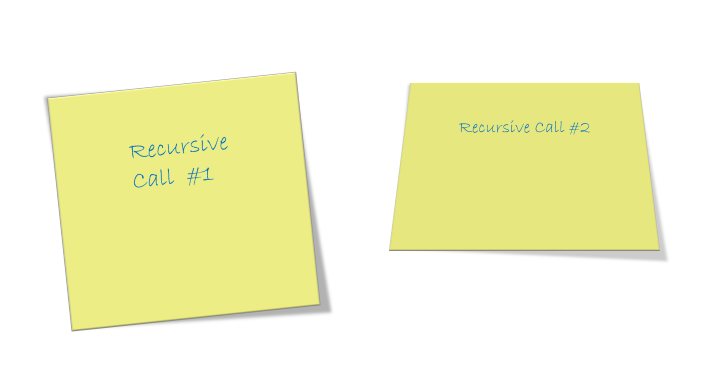

In [5]:
base64_data ="iVBORw0KGgoAAAANSUhEUgAAAsMAAAFyCAYAAAAQ8tcPAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAAAhdEVYdENyZWF0aW9uIFRpbWUAMjAyMToxMToxMCAxODoxNjo1M0lQwU0AAF/7SURBVHhe7d0JnGRVeTbwt/beu2ffF2ZfWAaVRXABERQVFUUFNO5bjCafSb5oEo3GmJh8UWPUbKgYjVEUQRCQHQREYGBgGAaYgRlm33tfa+3+znPOPVO3bt/qZaZnuure5//jcqtOVS9T1XXuU2+de05kSBEiIiIiohCKOnsiIiIiotBhGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCYiIiKi0GIYJiIiIqLQYhgmIiIiotBiGCaiipLNZqWnp0daW1udFiIiohMnMqQ4l4mITpjBwUHJZDLS39+v9319fXrL5/M6AGMbHExLMjkk9fUR2bOnS84990KZOXOm8x2IiIgmHsMwER03BNqBgQG9IeBij9BbKBT0bblcTqLRjKRSg1JbK9LUFJXGxqjU1Q1JIpFW36HX2QZkaGhQensz8tBDNbJmzVtk2bJl+BFEREQnBMMwEZWF7sFWcbHv7e3VIRdVXIRcbIVCRgXavNTXi9pi0tAgahuSmpqCCsAD6rt0qa1ffa+8DrqDg0N6w/e2++Kmf6r6eVnZvLlWZs9+g6xbtw6NREREJwTDMFFIoWqLkItwayu52KMdlVxskUhWamsLTjXXBF0MYUgkMuo79Krbu1SATesga0KuCbs23OIymOtmPxbpdE62bIlLKnWBnH/++U4rERHRxGMYJgoYvKTT6bQOt9gj8OKENIRbU8ktqHvlJRbL6GBbVxeTxkaM08UQhiHVbqq5Q0Pjq+aa/cTI5Qry4otD6t9wrlxyySVOKxER0cRjGCaqIgiyCLkYroCgiz2quajI4jYMX4hGs3qIAoJuQ0NE7TFsAdVcVHq71XdB0M3oIOuu5LpDrmpWTMCdjC4inx+UXbtysm/fmfL2t7/daSUiIpp4DMNEFcJWcxFuEXKxIdyacIrQimpuWurqRG8YsoCKLoYwRKN96jv0qPv2qS3nfE0x4PpXcycn6I5FoTCognBGtmxZI+95z5UqxEecW4iIiCYWwzDRCYaKrQ242GPYAjYozrSQU6F2UIXcQVdFFzMtoJrbq0IrTkLD2NzikAVvwJ3sau5Ewu9/8GC/bNy4Sq666r3q8eGU6EREdGIwDBMdBztvLsItwq4dp4uXldkGJR7P6GELmEassRFBV9T1QYnF+tV3QCUXYddWgIsh1xt21X+K3Qcb/o2trT2yfv1SufrqD6nHKubcQkRENLEYhol8oJqLUIsTz2xVF4EX7XjJYNgCqrnJJMbmDupKrqnqimpDNRcnn9lqbsE35Jo9fprZ86VYqr29T554Yq684Q1Xy5QpU5xWIiKiicUwTKGCP3cMS7AzLGBvq7kWqrmYHxfhFhuCrpk31860gKCL8bms5p5IXV0D8tRTU+Wss66QBQsWOK1UjbLZXonH8dohosk2NIRzMFrU8SxuGohhmKqf/RNGtRZVXIRcO9MCLqMdgXRwsKBe/AVJJrFAhFnyt74ec+jmJZUqSCSCKm6Pui9mZ7AV4NKAay7jp5k9Xz4nDlah27SpQZYtu0xWrVrltFK1wGsDn6RgXPxLL90mU6Y8o15/PBGSaDLhkNXbi+LOB2XevMVOKzEMU8Wyf5rY44CKYGtPQsMe43XNfcy0Ygi5dXV2JbQhPUYXY3PjcbPcr/9MCzghzfyM4qZ/qrOnyTIwkJXnnktJc/NFcvbZZzutVA3wOsInMHhTik9f2tsRhvdINMowTDTZBgZQ/HmvLF7MIoPFMEyTwgZPVG298+bi4IkDqRmuEJFYbFAF3YwzLhfTiqGam5VUaki9oDFkASF3QG3Dq7l2r/7DT9V7XKfKl8nk5YUXouo5PF8uvPBCp5WqAd6c4s1qd3e33vL5W1UY7lKvV4ZhosmWzaK49HpZu/YCp4UYhmlCmeBpQq4dm+sOutgj5EYiuI8dsoBKrgm5GKObSuWdaq4NujlXuLWLRBR/ltn0T3f2FAT5fEFeemlIWltfJm95y1ucVqoGCMN4k4sg3N7epl7Tt0hTU865lYgmE/rWrq6zVBh+q9NCDMPkC38WqOK4/zxMEDUbhirgYOeeNxeVIEwHiw0zYaVSOSfkIuzmpaYmq8OvqeaikotgnHfCLau5VAoLb+zZk5Xt20+VK654F6uKVQTDmtA/dHV1SVvbQWls/I0eukREkw99a3v7Ujn11PezX3UwDAdYuafW247rNuRms1ldvcX4XIRbhFwEXlRxUc2NRDBkATMs2GruoAq5OR18MZ8uTj4bGkLYzTrfc3jANXtzWV1z9kSl8Ddz4EC/bN6MVeiuUm+yuPBGtcCnQjYMd3QckObmW1U/wbmiiSoB+ta2tpmyevUn1HGbM0oAw3AF8z41uO6t1oL7uveyDbnYEHJxgLIbQm4mk9YhNx6P6mouTjjDvLnYsCIaqrmJBCq+qOLabaRqrvn52NnLRMcCfz+HD/fIhg2r5aqr3qf+PhmmqoUdIoUw3N6+TaZN+616E83nj6gSoG9ta6uTFSs+q16XSac13BiGT6ByD61fu21z3+a97L4PNgRcjM3DgccOV0Bl14ZdnFCGqYyiUcyqYKq4DQ1RZ1wuTkDLqhCMVdAwJtdUc83sCsMDrvrv6F5dcvZEJw7+xtraeuXxx+fL5Zd/UP3d1jm3UKVDP2TDcFvbkzJr1kb9hpuIKkNHR1TmzPmMtLRwQSNgGC6j3MPi1+5u87tcrs172V5HwMWGsOseqoDL2OfzWOFsSBKJiDrARHQF11RzcbmgQu6Aui2rQjCmHsNmZlpwh9zSoItN/ybOnqgydHb2y4YNM+XVr363zJ4922mlSob+BG/QccJsZ2en2j8q06Zt1W/MiagyYK7h+vqPqkDMBY0gkGF4LP8k933Getnverk27wa2kosNJ5gg2GLDgcMOYVDfRQVc0SG3ri6qg25jI6q5OCGtX5LJAXVQyaowjDG5GLLAai4FV09PWjZunCJr114my5Ytc1qpkqHPQWUYYbijo0P1bffK1Kn71ZtzhmGiSoG5hoeGrpIlS9Y4LeFWdWHY/evay95/Aq5js+Nr/e5n2923eS+X2wDB1u7RZiu52ONAYCu5uIw92qNRnHwW00EXZ1bjJDQEXQxXSCbTzthcVHIRcrE31Vz/oIsNv4HdEwVPf39WNm+uldmz3yDr1q1zWqmSoW9Cn4eTcBGG8/lbZMqUbt0fE1FlwFzD/f2XysqV5/G1qVRNGLYBEIHTBlC7d9/uvuzdwH6N33VsuO5uxx4bKrkItOjkUcW1oRfXzQloOPksIbW1USfomrG5WCwimeyTWAwzLaCKi5CLBSVKhy3YvfnZZs+gS2GXTudky5a4eg29Vs4//3x22lUAfZmdkaa19YjqG2+WpqascysRVYJcDnMNny1r176F/apSNWEYgRQBFEMKEEIRTm1QxT/Bu42lHd/P/X1tJRfXzffHCWgYnhDTFV2sgNbUhLCLNlRzM6qjH5BoFGNyEXQxdCHv/Bz780p/vvpPsXsiGgk67G3bhqS39xy55JJL2GlXAfSp6Eux4Mbhw/tUf/lrPcyLiCoH5ho+cmS5nHba1SrncKaXqgjD+BVtB4vhB3bWBARYb+i1123IxWbva0Mu9pgvN5WKS22t2RBwGxsxTtfMtJBI9KqQi1XQTMh1V3PdAddcNr+j/V2JaGLk84Oya1dO9u5dJ29729vUa5IzElQ69L2oDCMMHzmyR/Wrv+Ycw0QVBtmltXWGrFz5MZV5Uk5reFVNGLYnnNm17nGyGUIxAjKCLu5jg7AZshDXHXBDQ0xXczE+t6YGy/wOqK3fqebi61jNJapUqF7s35+R559fI+9617tZwagCKDagr8YwiUOHnpWpUx/Qn6wRUeVAtmltrZdlyz4jtbW1Tmt4VU0YRuBFAMZUPTgpw3S0B+Xss1tU2I2ozhbV3D4VcjEjg63kmlXQ8PXDg26ximv3RFRZ8No8eLBPNm5cLVdeyY/zqoENw5hjuLV1vUyb9pRwjmGiytPeHpO5cz8tzc0toR+CVjU9lPuJwgESlWLMt5vLrVch+CkVcp+VdHqH9PUdlN7eNrV1q8sDKkBjaAVOdMNYY3wNhk6UjjUmokqFubQxvh9LgpuTW6myoU/Fc4UtEkkLp1QjqkyJBE6i62AOUqoiDCMIY0NVCBsuY+wgqryZTFSH3VzOHXSL1V8iql54DxyLRfUnP6g0stOuHgjDsVi3c42IKk0shskDcG4UVVVl2IbgeDyu96ga5fNxhl6iAMNH7MmkWdGMKp8pRJjqcCSC+YWdG4ioosRimJignUUGparCsDsIY0OVOJtN6U6XiIIJr/VUKq9PmKXqgD45n8d5HFg6nmmYqBKhbx0a6nKuhVvVhGFwh2BsCMYYJoFhEUQUTLEYTpDN65NmWcGobLYqjA0fv2LpeCKqTBjPPzjYqd+8hr1vrephEolEQrLZJMMwUYCZMcNmhgKqfDYMDw5mVT9dcFqJqNLgQxtUhjEhQdhVXWXYVoWxIQxnMjH9roaIggnVi1SqwMpwFTGBuFs9d04DEVUcU2DsY2VYqcrKcGkYjkuhwAMkUVDhdY/KcCaTZhiucCYEm00E875zvDBR5cIsXWnVt2ac6+FVVe/b/cJwNhvV06nxGEkUTHjdJxJ5vax6MWhRpcLzYz6tQ2WYYZioUqmuVeLxgnR3c0aJqg7D2AYH42rDqlQ8QBIFkemwMX943glZVMlwUMUqdJhWjYgqG8JwLpcJfaGh6kZ0IRDbIIxgjJPn8vlE6N/VEAUXXvOYSaZfL8nO13rlsgdUbLFYn34jQ0SVy8w13B36frUqK8O2OoxZJaBQQBjWF4koYExlGDNKmLmGGYYrG56fTKZfPWdZ3WcTUeWKRDDXMJdkrtrKsJ1eLR5PSC6X0BViIgomM72amWuYKhcOqNjy+Zx6znJOKxFVKozrLxTMUvdhDsRVWxl2V4ezWYZhoiDDwhupVO5oZTjMnXalM2G4Xz1nnLuUqNKpKKW0h36u4aqsDGNDCLZbNouT6HhwJAoqvPnFXMMcJlH5zJuVbt1PE1FlM0XGtD7pNcx9a9WFYbAnz2GrqamRTAaVYZ5lThRUdpgEw3BlM0EYU6v1qP6ZYZio8pkwjLmGGYariK0M2yESmGs4nY7puYaJKJjwmjdLMpvZJBiIK08xCA+q54tzDBNVA3yAYwoNZkaJsPatVR2GsSWTSclmMd8wD45EQYVgZVahC3f1ohrYMIyDLBFVvng8L/39vaHuW6t6mAT2qAxjajUsycyDJFEwIVhh4Q2Ma0PY4mu9MuF5MTNJDKhrTMNE1SAaxaJGA6HuW6uyMgw2DGPDcOFCIameRH0TEQVQPI43vAP6rGeG4cqE5yWbTat+Oc3KMFGVwCdv+Xy4l2SuysqwOwhj3DAqEGbhDR4giYLIDI3CSXQ56e42y/zy9V558JwUCpxjmKiamPH9XawMVyP3uOFoNKbe1cTVk+jcSESBY1ahK841TJUFzwm2XK5P9csFp5Uq2e92TZHt7XXONQorhOGhoS49DI1huIogCLurwxg3nM2m9LsaIgomvOYRhnt7zYkeDMSVqVDodCpNVMk2H26QG56dJYtaML678n3+rhWSyZdGlueONMgPNsx3rtGxQ3GxOAQtjH1r1YZhdyA2YTiqwjAPjkRBZVahMwtv8I1v5cEBFM9LocAFNyrdkb6kPLBjqnz9jVslHj3xx83W/qTctnWGPLRrihQGj+1vozsTF+9vms1H5FgO+9dvnn00WD+2t0V2dNTqy2FlMlVfqGfrqdphEu7KcCqVUmE4yTBMFGBmzHBB0ul0aKsXlQ5hOBIJ5oIb+7pT8ustM+W9158uX7l/qXzhnuXy1d8ulX99ZJHc+NwsebGtfsRgNpCLSY8KdJVgWl1OPnXObomNIwhvPtTgXDIQcPNjCLZP7m+Sv7xruXpsInpIxmduWy1bW+udW0vh9t/vblGP1fBo0qBe+16J2JD6NzhXxqgvG5PbXpghqfigDtf/uX6BTK0tjnFHt/Lonhb5Y/V7Xn39GfK+X54uf6Iu3/fSNOcewYP3ruhb+/p69GuYleEqYavC2HACnVmFDksys1pEFFQIWO7KMMNwZcHzYZ6Xdn1wDZqNB5okW4jKnq4aeceaw/KxV+yVD5y5T9604ogsaE7rQPyxm06Vu7ZNd76iaGdnrXxE3fbnd6yUg70pp1X09/vuowvlERW+vH/Nh3qTzqVSuULxwU3no3K4r/R+CJ02lCOwfufRRfKRX5mfbauy0ciQvKgCqTvM4uVU7hXV1p+QZw8Xw/Dd26fJp369Rv7m3uVOi7/2gYR865HF8i9v2iKXrTosH1SP1x+pEP6nt69y7lGENxpfvm+ZbNjfrN5orJAvqjcbz7l+ZkMy71vFnt2QcS6Nzb0q1L771IP68qGelJwyZUCaa/L6ekE9dgjB1zyxQD6tfs+fvutp+ckVm+Sbl27Rj/W/PbZQ3y+I4vGCZLMD+nXMMFxlbHXYhGGsQhe+J5AoLPAm2Cy8YdbRBwbiypLNZlWfjHASvDT85pVH5NLlR2R6XU5OndWjx9oiBC+f1i9nzeuSz736JfnOW56XHz01V3KukIkA+ve/XSr/9dZn5T2nHSz5SB7jXTMqEP/v03PlpudnOa0mmCJEeiEgf+PhU5xrJmz+z8a5+jJeCXdvmyZ//8AS2dZeL7tUAEewW6zC3n+qn/3hl+8reZPyPfWzMVzCws//5sPDfyY8tGuqCrNH9GW8GbhFBddfXLlR6hIjnyj5i82z5RNn7Smp6qIK26F+b6/7d0yVa9/xjHzm3F3yz2/cIihtIYBa7QPD3xyg2j6WD4RRDUa1GW8kUPW98JR2/UYAv98frNunnyMEYTyI5y7okmvetllWTO9zvlp0BR1vembUZ/UbgyDCSa+5nJlrOIyqNgy7q8MYJpHDi0JXJZw7EFGg4DWfSOTVaz28J3lUMjwfuVxGPUfZQFaGoV6FuoaUCg0qPKECCwhRqPC+2FYnP9s0R96x5pAkXBXMb/5+sVyyrPVocD1zjpkaEKFqe3ut/Nn5O+VDL9srL7SWzuqQjA0PJT/fPEdeq4Kc1ZTK62CJ3+V7jy/Qv98XL9guK6b1yXXPzJFvv/l5uWzlYT2cYM2MXl0RtgbVv8FWRAGV2+ePNJQEZOhTx1b8bgi++Fl/e/8y+fxrXtLDBrrS5Yd9IGw+f7hBzl/Y4bQYsxqyct17NjrXjEO9KZnbqP52nMetMBiVp/Y36TcaVkz97t7K8G4VzBe1pJ1r5aHq/O1HF+vfHf+W/316jn6uHtg5VVei71NBXA/PUOH7vWfsLzuO+mBPSr95CSJ88lYotIX2U7eqDsPYUBnGUInBwbh6IvHCDN+TSBQGCFhYhW5oKKcrwwzDlQXPh5ljeHwfW1cTVBBr4wU9hvQdP1sn//DAEvmnB5fINx5erMJtUt5z2gF559pDzr0NDJvAhmESHz9rj9Sov2F4UAWxq08/oC+/fG63fPhl+/RlwF+2O1DDS+11cteL03UV2kJow5jZW7fO0BXg8xZ2OreILJnSL5ERjof9uWhJ6MPlP3nlLh0Q3VAFft+6/fpyvwrGT+xrlj/9zSr53hPzdSguB5XpJVOLYdZCIF/YXBpg1+9tlle5QvPt6t+JE+bs74c3HwiqXniDUTtKdRquUo8zKvd4jP7ytS/JR1+xV06f3SMXqzcpV6w9KBcvbZNXL+rwHZds7e2ukTb18+aMc1hGtTDj/HuP9q1h61+rOgzbE+iw4XlDGObxkSiozMIbWN2M44Yri30estkudVAN7ses+NgeAe3fL3tOPnX2HnnmUKN8+txd8pcqFJ67oHNYmMLH8vi4HSer3fH+J+SV6j7Wrq4aOVOFYAsfwaMKa2Y5QNW2eFLXPhXErn1ynrxsbldJgEXFtycTkw37m+T1KtC5oRr9H48vlH/5/WJ5/kj90fHC1pTa3LDq82mzemSLuq+FSjBOgEPV1lyP62EFX7lom/zs3U/rE/HKwRhjd3D3gxMK8e99qaNWTp3dq9sQ+vG44rFKOm8choYi0lgmqNrfrRxUzVHNxXOBMcjrVAjG0Aq8QXnbqsPOvUb2UkedfP13p8hfvGqHflMeRMhUIp16erUwDpWo2jAMePLsSXRm4Q2uQkcUVKYybOYa7u/v1691vt4rB56LXK7dqTAFE4ZD2MCLsIlKL04Gw9hVPxjneu78Tj00wh1iYSAbKxlZjVt/9dws/XeOqi0qo7C/OyXfemSRrsI2pUoDISq/mOXh8tWHS4ZAAIZAfOG12/XJYhjS8Df3LZM7nZP78O/ID5rDP74KJ5XZsIxqLm5H+38+vkDef2axYo0TAVHNdo+nLQeP07Y2/1kjAFXdH2yYp/+9uFyfyOuhI19/eLH8n1fu1O0YGgEJ9QbL/fhhKAde+gjzdkYM/M74Pl53vjhdvnTvMvnMrWv0m4pvP7pIfvTUPHlkd4t+XO7ZPk0e3DlFdncVx3Lje2H4C34GpoO7bet0+ac3bNXDUILK5Kl+Voarkbs6nExi3HBCvaMJ1xNIFCZmerW8XngjrCd6VCpz8OzT/XJQIXwhqFo4EetTZ++Wj9+8Vg8fcM/0gHB5sDdZEqBQpbz9hRn6Mqq6NoAeVvfDSXbT6rL6Z6C9vT8pj+1tli/dt1z+9nXbpDYxKJ3puP4eGI+LhxsVU3z/1TNNVdVCtdUOK5jXlNYzOHzhtS/JL54x8+vi6/GTMeb3W79frMOlDZWnqu+F2SLuV0ER98N1C2NmUVG2erLxslOOna3eBNyjbkOwdMN1BNBrn5wvnzx7jw66gCr05+5aKX96/k79b8IYZXs0x59UWn0dKueY6eGnm+Y4t5iv23igUf767uW+Y5gvXXFE/vGSF+S8RR1y7eXPyGfP2ylr1b8JwyUwPhgV9dcs7pCFzQP6ccD3+dydK+RDN54mV11/hp5FBJ8CpHzGcAeJfvMRS6sclQtlGI59WXEuVxV0uHiyUNLHGczt7e2SSHRKc3NaV4+IKHhQtWhvj6rX/xyZNWuW/lQIfUGQA1g1QF+Mg2hHx5NSV9cR2OcjqQIsPsJ/1aLicIc5jRm5dHmrXlTiR0/Nl4d3TdEB8bc7p8rps3rk11tm6eEQnWkT9pZN7ZeV0/tU2BuUv7x7hdy5bYb88tnZeqwxxq4CxhUjMD6pgtg/v9FUJFFwR0j+2oNLZP2+FjlrfpcOyPeq+7199WH1mOsv1VAN/YcHl+rgi/B9+4sz5Psb5usZMdbN6dFBHKES08HhhD+0Wxj68C8PL5aHd7fINy7dejQkQ1RdvnXrTH1i21Pqd/vre5bL+1SgbPRUrAGP1Xx1PP7aA0tld2etbDzYKA+pxwSzRqCyjJk1UO3F743H7JrHF8jfXIiT/8w4Y5zkdsqUtD7hDvDvREUXY3vxM/F1eGPw2dtXyYHeGvkrFW7xXPhBjexx9ZhhKAvcoR6Pt7j+zRZOIER1Ho8RxnG/Tr3ZwZzIeJxQ5ccblY50Uppq8hIL2J84XrO5HF7Hy6ShoVHlqYRuC0vfGlGdWNXGfxwYMQF/V1eXbNmyRR0Yt8jSpUektjaYU58QhV06nZOtW+Oqwz5LzjnnHBW86o4GYpo8qNJj6MquXT+UqVNbA/18YJxrY6o4C4OXrYTa8bg4OQzz06KiirmJUZW0MCwA98d4Ye8winIwTViNCsF2CMHDu6fooRju0IpLqJL2ZeOCGUdxMp73Z2BoR0L9jn4/F1+LoOmuAls/3jhXBf+ZenwxpkFzz0jhB/++I30JyRRi0lKTK1ngwkIFGj/TPQYZw0Qw1MIO/7Djtb2/L+6HWTVGgkCL8H7laQf0Y/ON350if/6qHebGMcDvh0CPNyerVJBfM7NHvzkJmt5evI7fLosXLzvat4ZFVYdhdMAIwz09PbJjxw71RG6WlSv3SH19cVJzoomAFwnj1uTL5QqybduQtLaeIa95zWvUa73+aAWDJg/64s7ODjl8+FppbsZQCecGogrwy2dnydtWHdHhH2Osc4PRo1PcUdHAAD7debMsWbJGh+Ew9a1VPZ4AT5J74Y10OipceINOhG1ttfL39y9yrtFkQb+MhTcGBgb0J0MIYVX8fj5QsBhKPJ5hEKaKg2ougjDEY0O6qk3D4eTXoaHOUParVT+41i68gTCczXJJZpp4WLnoL+9YIqfOGv0Majqx8FpHGMb41LCe9VyJ8Bzk83b1OaLKcuqs4tAUBOOxDkkJG4ThwcGuUPatVV8ZttXhZDKpnsSEehJNx0w0EfCn9K2H58trT+mUt61pdVrHL+s6y9zCODTMEUpjh6oj1tAfHCwcrQzT5EOfm812qr6YfS9RtUIYjkbNwhthqw5XfWUYYbi48AaWE8Rcw86NRMdp86F6fVLHp841KzAdC4Te7z9enAoIcJb3p3+9XF5zzZly3aaZTiuNBc7piEbTehYZW73gG+DJl88jDHOMBFG1MsXFvqMLbzAMVxFbHTYDvWMqDGMVOh4YaWJMqc3Lx84+UHKm9ng9sKNFVs8sXZb083cu0Wdh3/aBZ+S2LdNYIR4j8+bXLLyBVejsx3k0eeybkUIBq88xDBNVK9W9qv7VLLxhw3BY+tdAVYax8EY+zyWZaeLMb84c9ywSj+1plFcvLi5L+kJrrTxzsF6+9oYdel5MTOKP6ZJobDCPeCKR11N5ha3DrkTog83z0KkvE1F1wusX52T09nazMlxt8ORhs+OGs9mUfhKJxgph9KGdzfKvD8+XW7dMG/ZmamdHjfz4qVlHV0Oyrt0wW65/xqwmVQ7mwMSQCHvCBoZMYFjEH5+3T8+f+btdzToIz240E8vT6PBaT6XMksxh67ArFZ6DSKRHbU4DEVWleBwLmWVCV2io+jAMCMN2ejUzowQPjjQ6vMZvem66vPq/zpR/fnCBvKRC70+fnqmX/HTDhPF6zK/nz2rFtAH567tOkcf3Njotwz28q0lWzygOkfiZ+v6/3DxDLlzSIb9SP/t9P18tf/TK4tr/NDozTKJ0ejWaPDhYptMD6nkZUNeYhomqWSyWl3w+E7q+NRCVYVSKsGGS6GwWs0owDIfZ3q6UDrBeGJrwF7cvkXu3T9HXb9kyTb7+0AL5+pu2y01/sFn+9S3b5Mfv2qKXPnWbWpuX5prCsKrXqxZ3ybcv2yb/9/alerlPP/dsmyJXnFZc9nNeU0Za1e926Q9Pl8+p3wU/+y2rzBKsNDaxWERSqUHJZEyHHabqRaVCJQnTqrEyTFTdVJRS/WlxrmFWhquIDcQIw5kM5xoOkwd3tAwLone8MFWuWT/XuWZgGMS/PzpPzwpx0dIOaR+Iyz/+dqH86n2b5cIlnUeX1sRwBu/xvD5V0AE25zM92sXLO+T02X3y7KF6p6UIP6NDbe45LWviQ3LOgh756FkH5OFPPiXvUkGZ+WF8cJJWKpU/WhlmIJ5ceNyz2bQKwxzqQ1TtTHGx9CS6MAhUGK6trVVhmKvQVYoDPUn5wRNz5KDa+9ndmZLvPT5H7/08f6RO/umBhc614TD+9qM3rpCC2ruhYrtFfa2FIHynCsj/9rYXZfGUtG7DON03r2qXGfXD18n3wpjfukTBd6L2WGRIPn/BLvnuI/OclqKfPDVL3ri83blm7O1OyrtPOywffPnBMf1sGg6v94R6PrDwBqYAYhCefLlcu+qD+RwQVTszI0xnyfRqYehfAxWGMWY4n0/oYRI8No5f50BcntjXKPu6UzqI3r51qh5KgFCHUPvjp2bLgypY7mivGfXxxVCFK/53rTzwUrP84c0rpDMdd24xelUYfef/nqq/9xU/Xavv4/2W0+tyJaHW6+kDDbJ2Vr8kYqVfeYoKvAd7zTAJ/Fv+47G58oXX7dInrFnT6vL6d0LQHU29Cl4zG3Lq78xp8JjbmJWa+KCuHltYte4Xz8yU1ywpziIBA7nY0UDuht+sm9OrjYkJwzn1OjeVC1sZpsmTz3NaNaIgMHnKVIbD1LcGIgwDwnA8jmnVzFzDw852orK2t9XqIQQfvmGlvPm/T5M3qe1L9yyW6zfPlK0qjNoTyjoHYvI/T86Wj/9qhVzwvXX65DM/g0MRPY72yxftlB+9e4tctqptWKi9d3uLvHpxp9z/safl51c+Jw/taNaVXjdUTg87odbPnS9O0UMevJIqmE6rzevA/ZV7F8lfXbBbh1U3VHrftLJNLv/JWrlm/RzZdLBeujyB3coWosOGYqANlW8LcxHj5DgLJ8edu6BbZjeUfnSMfyMCsRfGM3uHdpA/vCmJx/GE5LgscwXA457LccENoiBA/xqLpXW/ymESVQbvZLBhRolIBMMkouoJdG6kUX3jd/Nlvwp2S6am5Yw5vbL+U0/KL656Tq595xb581fvkU+cvV8+8ooDejqw771jq9z54Wfkm2/eroPmpoMNzncp2t5Wo4PoRcswCD8iv35+mkytLQ4JwHODacw+99o9ulp7ivq5LTV5OeQZToGFKPB9/J7KF1WA/8Hjc+QcFTi9cEheNm1AHt3dpA7QQ7J2Zp+5wQNjhW9837Oybm6vHuZw2Y9PlSuvWyP/89Qs2d9dHLqBn1+XKIZp/P5/d9+iknHCK6f3y+93N+uQjGEh/6Ie00/7zBKB3xfzDrvhhL4P/XKVXHn6YaeFRoLXuplr2Eyvhs46TJ12pcHjzjmGiYICcw1nVd/aq/tVuwVdYCrD5gAZV4E4KWbhDR4Yx+o7b90mf3fxDn0yV38uJilPFdULAfb02b3yyoXdkoyV3hfV0m/9fr586px9OkRitgYM4V46rTg04EhfUhpTBZnlqpre8oFnZI5nrl3cB8MZvDCc449vWSanze6Tltrht8PClrR87YGFctXpR9TfhtPoAxXjs+f3yDWXvyD3fvRp+f7lW/Wwi/dfv0ra+k1VGvfBEAb8exDQ//Q3y/S/+6Jlxao0vuZdpx2WL969WD550wr58CsO+g6HWDurT3Z01Mif/2apnqcYU7P96W1L9SwWWOCDxsauQocZJey4YeDr/uQzB8ruEV9nRFQd8DrGXMPptKkOh6VPDdSYYXsSXS6HhTd4UBwrnASG49iM+uyoK6HhYUXF9c9vXyqvW9opq1xz6AK+/jdbpkkyPiTv+dka+dGTs+Qrr9+pf4aFk8gQQN2w7LFd8hjDLCw9vMHzVH7ujiXyjTdtl7MXdMuRXv+T8zBueMvhOlnp+f1GklA/v0EF8Dcsb9dB3E7PNq0uJ4fUz/m2CvkXff8MXcX+6wt3D5sF4vI1rZIrRKUrHZOPn3XAaS2Fr/mXN2/X/67fbp+ip22788ObdEimsUMYxip07rmGGYQnR19frzp4Ylo17yuCiKoR5hoeGsrrvjUsgThQlWEbhjnX8LHBMAmEVgQ/BEF7ctm2tlr5zdZpeo7eq65boxenwPy47zy1OH+uhRCJcbGfvnm5Do13f2STnDm317nV2NZWJyumlw+pNz5bHIs8oH4H91jiH26YLfOaM7JmZr8O0BhG4acmMShzm7Il1We3+7a3yM3PTdOX8aeCivaT+xt1Jfucf3+ZnKrCqft3/KsLdukp2/724p3ypYt2lpyMZyELfP1N2/S/2QZ7P5jH+KuX7JAfv/t5+bNX7xk2rphGhzCMVehs9SJMFYxKk8/n1POBBTeIKAhi6rAaiZglmcNSaAhMGIZiGOYqdMcKjxqWHz7zO6/QofCtPz5N/u3ReXq+3A+9/KD8RAW4q884rKuofgqDoocPbPqTx+X779iqF5nwwlCDeSqo+nlkd1PJyWqZfEQ2O2Nz/1sFYcwr/IULd+vrr1vSKfdsa9GXobW/OBcwAnizCuPlPHe4Xr50zynygetXyet/cIZcrUL+dx+Zq98MYLjEVy7ecXTuYXjTyna57QOb5NIVpVOleeFr/KZgo4llV6HjwhuTL5vF6nOcJpAoKJClhoZ6SsJw0PvXwIRhPHmoDjc0NDiV4ZHHvZI/jFvF0Ieb/2Czngt3a2utvG5ph7x33SFZPXP4NGZe7QMJHURHuh+mTOvLDf/Twwlpf3//Ij3cwMJQjAd3tsgNz86Q7zwyT7755m1Hq7IYAoEBHu/9+Wp9QttHb1ipT2ADBNL2/rgOyH5wctsTn94g175zq9z14U0qAG/Ulz/7qr2yQD0Grhx8FE+Wrxxm4Y1iGGYgnhx4vLNZzDHsNBBR1UP/Go326n41LNXhQFaG0+mIehJ5UDwWqKziZLGXz+uR/3P+Xh0Qv3jXKfpEr7EU270LYLjdusUMSzhrfo/8aMNs9eLSV/XPxDzG7/vFavnDc/eXBGms1PZfj83Rq8Vdf/WzemiE2/9743ZdqcbJdDe879mjSynjBLfvvm2bNHiWVnZDYMZwBuwZdKsLhqQgDGezWX0CHYdJTJ5crkMfPIkoGNC/xmJ9oSo0BCoMozJshklg4Q1Who9FbWJQ0q6FKM5f1KVP8MJcxH9332K9HwmCbF+29M8KryGM9X1sT5O+PrcpIytm9MtHblwpf3XnEjn7318uN2yeLj+78jl588o2fR8L445RwX3oE0/pMc1eeNG+eVWbvH1Na8lJejg2n7ewa9j8whQMeOOLVeiw8EaYqheVxhwkuxmGiQIEWSoS6T/ar4YhTwUmDJsnDytT4WPxhDpARnQIo/HBCWcHuktnaEDbT97zvJ5VAQH2a79dKE/tb9BTj6ESvF/df/3eRj3EYcO+Btl4oEGPyQVM1fZ5FXh/vmmmfP61Zqwv/PUFu/ViHAta0nLN5Vvl1g88M2xmCgtz/DLUkhveBGH6H9tRh23p0EqBxzqXa9N9LxEFBz556+sz1WHbtwZZRP0DA/MvxJPW29sr99xzh6xdu0WmT4+zYjFOWFUOs0dgsQ0/GEKB+zy8s1m2t9fqZYfrk4Oybk6PvHVNm7xqUZdebe7yn5yq34zg9kuWd8h33voiAy1NGHRbra29sn79Qlm16hUya9YsaWlp0Z8MYb5xhrOTA8NUtm37T5kyhYGYKEh6ekTa298gc+fOl6amJqmrq3OKjcEUuDCMqZbuuusOWbHieXWANB+n0thhKrOvP7hAvvi6XU5LefoPB/9Tx0DvYRDTob3QWidzGjPDxvkSTYT29j7ZsGG26qzXybx581Qgm6JPoMVKlHzdnxydnR1y+PA16mDJqdWIgqS/Py+HDr1R9a8LdBiur6/XhYag9q2B+lehMoEnqqamTq9CF4JhLhOuNj6oZ5EYCwRgFIP86kE4KW3NzD4GYTphzJLM+ZLp1cIwtq2SmDmGh4/lJ6LqFlXHcMw17D4nI8gCGYZRzs9ma3hgPEaYWoyo0uG1nkwWlw21gZhOnnS6Vz0PfMNLFDRmiGmfzlG2bw1y/xq4ejcCcU1NjeRycR4YiQLMrEKXV6/13NEwjI6br/uTx0yrxsebKGhQbIhGu4b1rUHtXwNXGcbW2NgomUxSPYHspImCKhbDwhuD+iSusHTYlYZzDBMFE4ZARqPF6dXQvwZZICvDGCaRycTUE8gDIlFQIYShMuwNw3Ry4A3H4GAXwzBRACFLxeOZo0E46EWGwIVhlPZx1mMmE1VPIA+MREGFzjqZNCHYHYYZiE+eQqFDPw9EFCx4WScSWT3XsA3E2Ac1EAcuDEMqlVJPXNJ54pxGIgoUU7nI6c7ZHYghyBWMSoGx2iK9+qBJRMGC/jWRwPkYxcWNWBmuIngCMc+oSFw9iZggmgdFoiBCCIvHhwSzGSAE21XosNGJ19/frw6WGd3nElHwxGJ5FYCLY4aDHIgDWRlGGI5EYurJi6onzmkkokAxlWHMNZzV06uFocOuJGaOYS62QRRUsRj60R7dp9p+1W5BE9gwnEjUqM4aYZgHRRpZfy5W8vnBvu6U3PjsDOdaeYd6k3Lf9hbheZqTB9OrJRIF/ZE9KsMIw0HtrCtNOt0t0SiGShBREJmTY3uPFhqwBVUgh0lgw4wSuVxKPYk8KFar3mxM7n+pxbl2YvRkYnLpD0+TzoG40yLyb4/Mla1Hap1r/gpDEfnq/Qvls7cuk7R600WTA2E4mcyWzChhO2wG4hOL06oRBRte39Foj+5T3dXhIArkURxhGDNKZLMpHhAr3G1bpsn+nqRzrdSB7qT8zd2nnNBR3239CUnEhqSlxqyilVHBdsO+Rnn72lZ93Q/eX335nsXyy2dmynvPPCR1CY5RnSxm4Q1TGbZBOMgddiUpFFAZZhgmCiozFG1A96c2DAe1fw1sGDaV4YR64nhQrGQb9jfIfdunONdKNdYUZABV1xP4FN703HR56+pW9Tdjrvflorrqu3L68LGQg6r9hdY6+ZNbl0vHQFyF4IJcuqLduZUmQ7kwzEB84mWzRxiGiQIMWcq98EaQ+9XAhmGzCl1CHRxZtatkTSrIuIcouE2vy0lahVOE0BMBL+kN+xrk9cs6TYPy1P5GWT2zX6KR4gv+YG9Svv7QAvmrO0+Rnz49U/729Tvku299URZPTcvKGf3OvWgyIIzZVejQUdtAzCB8YuHxHRrq0n0tEQUTXt7JZF5lqeLiG0ENxIEd7IjKcDqtghQrwxVtlQqT29v8x+fGo0OyaEr6hJ2g1peNSftAQuY1ZfTYYZwQ98BLLTKrISu3bJkmNz47XX781Gz53c5mufqMw/J3F++QL1+0U6bWYroZkWw+KowCkwthDJ21DcHuzpqB+MTBm49IZEAfLIkomNC/YraebNaEYbsxDFeR2tpayeUw1zArw8cLYRTBEUMDxnOyWK4QGTZTgxeCaF2y/Bmqcxqz0pXxrxyPFwLvl+5ZLH940wq5+uer5f2/WCU7O2rks7ctk2/+boGu+v52R7O8cXm7nDG7Ty5b1SbvP/OgXHHqEZmrfk+MLbayhaiuHkcD+wqqDqgMY2J4dM7opN2BmE4czDGMsYSsDBMFm1nYyIRgd7EhaAI7TCKRwIIbSfXkRVghOg4IwZ9U4fGC762Ty39yqrz+B2fIdx6ZJ13pkQPqC6218oYfni6v/I8z5U1qjxC6fm+jPLGv0bmHUZ8clCN9eK78NaXycqS3/O3jURMflNcv65C/eM1u+ac3viRvUWEXld5r37lFvqT27z/zkD6R7uXzemRhS7ok/HrhDQJ+d5pcyGLxON5Mmc7aTq9mO2y+9k+MXC4rsRiHCBEFXSw2qPrZ4eOGg9a3BrauhbmGh4ai6sCIvdNI44LK7id+tULOnNsr9390o/z2Yxvltg88o8fwXnzt6bpS7AdB+crr1sjla1rl9g9ukmuv2KICZq+uyH7hrtLZIZLqhVZuzDDUJNQLb4IGIyDcvnpxl5wyNS3zmzNyz/YpctrsPudWkSdUWJ9al9cBazS16vdaPAVn2ToNNGnicZzxnDm6Al2QqxeVIpfr0wdJIgq2SAQxsbjwRlD71kCH4VgMJ9BhaWY6Fhg3ixz68bMOSEPKDGVorsnLx87arwPvDzfM1m1emw/VyysXdMunz9snc5uyeqgDZmz40kW7dAh1Z81YVEXdEcLn4GBEBc+Jn+i7NxOTgz1JXQG2sNjGx9W/DS/zgvq5dmhIXl32s+VIHcPwJMOnQGau4eKMErY6HMTqRaUwM0k4V4gosGIx9LF9ui9Fv2qLDdiCJNDdWV1dgzowxtWTxgPieCEA/r8HF8rfX7JDB1a3mviQDri7OmucllIIlRcv7xhWz31oZ7PMrM8614pS8fIvKtx2uNd/HuLxQqW7tT+hvl9CNh5o0CfC3f3iVLnu6Zk62H/v8TnyzYcXyFfvWyTXrJ8jd22boucczqqv8zOtLq/nJabJZZZkzvtOr0YnRj7frd+IEFGw4XUejZpV6OzGynAVwROIhTdyuVoeFI/B73c1yemze2WRq3Jq4cSxPzlvrz7BzA+mKzttVnH4AfTnonLrlmn6hDq3hAra7SqgljM0hJPwJubP9Mv3LpaP3LBS/ujXK+Sr9y+SJdMGJFOIyjkLu+X8RV0yWwX8n135nHzxdbvkD8/dr4d5YIyxd1ENrIyHyvir1Nfc/Px0HdYP9CSltS+hq8XbysyOQSeGqQzndBjGa90GYlaFT5xstk2fvEhEwYYshWFo6E9t/xrEQBzwynCd6rTjPCgeg4d2tsi7TzviXBvu8rUmKHphPPGmgw0ytS7ntBi/fGaGnDMf1SSnwVGXHNTDEbDQhZ+ZDVk9ZGEifOXinXLzH2yW669+VtbO7JcvXLBb/RsPyylT0hJXr4TLVrXqcF7Otx6eL+/+6Vp5+Xdfrk8MvOHZ6fJvj86Vj/1qhT5B8J8fWiAP7mzWs1bQyeO38IbtsPlGeOKhP+Ucw0ThgJc5pldLp9PDig1BylaBrgxj4Y1sFjNKMAyPBx6tB3Y0yyvm95iGcUjncYAckkZnjDGgavrzZ2bKZ87bJzHXYhaAVdwwHrncYRXVaaz65nb/9hb9PcfL/mwMl8DPa3KWYIbH9zb6hns3VI/ftLJN/uvtL8hvP25OKPz9J5/SAfuay1/QM1RgfDVOOKSTxy68gbHC6JzdYRj4ZnhiDQwMqDcgnGOYKAyQpZLJrOpTTf/q3oIk0JVhzDWcTsdYHRonjBfuzcalOVUMi6PB/MOYFaI/G9OrymHBDMBw7WufmCOfPHu//r5+cwrXq0Ccc1V/D/cldBUWWmoLsr3djE3G3L4Y14tgPbO+tPI8Hh3puJ432O3hXU3qZ4387z1LvTn44MsPygVLOvXP56fElcGE4fzRE+fcYZhBeOJhAv54vJ+VYaKQiMUQhM0nbbZ/DVogDnQYbmhokEwmpp44HhDHo0eFRfyNj/VYh8D7jYcW6LG0gBknLAy3eGJfg1y6sl2v7Oa3tDKCKeYSxs98cEezvO/nq/UcwLBier88ua9RtrbWydXXrVahtVm+fdm2YSf1jQe+33RPmMYYYO/YYKoOpnJRHBbhDsQMwxMPS7NGo8PPJSCiYIrF0JeaGSVsP4uNYbhKJJNJ9YRhwzsYp5FG1ajCLN4/lBvH64Yg/N9PzpblKrRi2jTMvGADL6Yu+7Pblsp3VHhFpRhheG9XqqQKDOvm9sr3H58jX7lvsfzf25fqsLts2oC+DQtlnLeoS6782Rq5cEmn/OAdW/XcxMcDi3xctLQ4JKJ9IC6nzuo7Ws2m6mJWoTOzlNjOGkHYdtYMxBMrl+tWB0e+cSQKi2g0qrb+kv41aP1qoMMw5hpW/1dPHPY8II5VPDIkzamC3PL8NKfFH4IvZmXA0Ah7sh3GCmNBirb+hHzkxpV6nDBCMqB9V0eNfPGuU/R1622r2+SxvY16qMUdH9okq2aUrmz1ldfvlN9/8kn5o1fuO66KsIUZHzBzhJXOxfRCHFS98FKPxUpnk7CBmCZWPt+h34AQUTjg9Y65htGf2i1ogTgkYTiqnjTTRqPD8IivXLxDV2v9ZkZAaL1ve4ueWeGipZ3yaRVSLQw1yOQjcv5/nqlPOHv/yw46txj/8IaX5PzFXc41A8Mqbv3AZvmaum2Kz7hdBGAE6Yly9vyekirwLBWM376m1blG1QbDJMxcw8Xp1ez4YVsZDloVYzJls51jHkJFRNXPhmH0o+4gHKS+NaL+IYE+Stx++29k/vwNMnu2WamKxu6/1s+Vn26cKVeecVgWT0nrWRieO1yvF6zAssbvXXdIWlzjgy0Mndh4oFHWzenVcxITnWidnf3y5JMzVCheJC0tLXqbPn26NDc36xNp8caYJ3xNjGef/V/1+G5lf0oUEhhqeuBAs+pDL5Camhq9hkNTU5OevhbDUYPQtwa+N6urswtvMJSN1yfO3i83/cFmPSUZxvru707J2fO75b+v2CJ/dO4+3yAM+AT1ZXN7GITppLGVYVSE8f4elQtcRhUj4O/3Tyo8loODXH2OKEzwcsf0atlsVvepdkN/EJT+NfBhGDNK5HJJHhCPEYYtfPzsA/Kxsw7IJ8/ZL69b2qlPaiOqJDjBAwtv2ABsxwvbDpsmRn9/v3rjkdYHRyIKB7z5dRcbGIarkFmFzswoQUTBZFehc4dg77hhOn6oDHGOYaLwicdRFTbFBmy2rw2KUFSGM5mEeuJYzSQKKrPwRnEVOndnjY1heGJgwQ2sPkdE4RKNFtRWWhm2fWsQ+tdQVIbT6Yh60ngwJAoqVCqTydzRSjD2dkOHTRMjk+lUB0TnChGFRiyGT4O69WX0qbZvRX/LE+iqAM4kz+cxvRoPiERBhcpwMmlO6LQVCxuGbeUiCNWLyZbPt+vHmojCxSy8YaZXw2b72aD0rYEPw/E4lhZOqYMi5hrmwZAoiFCYiMfzam86Z3cYtoGYjl8+j8owwzBR2KD6G4v1HO1f3RvDcBUwC29EnTBs2ogoeHASHU7yQPh1h2HbWTMQH790ulW/8SCicMHwqGg0fbQvtX1sUPrWUIThaBQn0AX+n0oUWqZqEZVkslgJ9oZhOj54LKNRziRBFEbmvIy8PknZBmHsg9K/hiIhNjQ0qSeQ06sRBZlZeKPYWdsOGxvD8PFLp9PqMWYYJgqrZDIjmUxG96e24GDDcLX3saEIw1g6EAtvMAwTBZepDJthErajdgfjau+sJxsOgrFYH4dJEIUQ3gTH4zl1yfSjtl8NSt8aijBsF94YGuKMEkRBZRbeMHMNuztqez0I1YvJZOYYzjjXiChsYjHMM5zV/ajtX4PyyVsownBjY6MOw4UCD4REQWUX3rCdsw3C7o/y6Nhls236JBoiCif0sRgqBehPbV9rt2oWiq4Ncw2n01F9QCSiYEJHXVNjFt4AW7mwG8Pw8cnnu/RjTEThhNd/JNJbEoCDUmwIzZjhTCaunjQeDImCCmPaEonicAjbUdvqsG2jY5PJcMENojDD6z8aNWEYAdgGYYbhKpFIJNQTZU6g47GQKJjQUScSZkyru7MOSuVisuXzHTx5jijEUHCIxQb0ZfSn2Nz9azX3saEIw2YVOizJjAU4eEAkCiqsnx+LmRM8sDEQTwxU10W69cGQiMIJr3/M2GP6g2DNKBGKMIyFN4aGuAodUZCZqX8w17AZN4zO2QZhhuHjgzmGMccowzBReOHln0hkJZMpXYnO9q3V3L+GIgyjA6+ra1DvZhCGeTAkCipMr4Zxwzb8YnOHYWAfMH7ZbFY9tr36YEhEYYWhaJhrOKL7UW+hgWG4CtTW1qkwXKueNB4IiYLKvfAGeDtsG4hpfLLZAYlGcRAkorDCm+FoNKsumWESYAsO1d63hiYM27mGWRUiCi73wht4rduO2nbW1V69mCyZDOcYJiLTx+JTIkCf6t6quX8NTfdmV6FjZZgouEwYNuHXdszopN3Tq9H4FQrderYOIgo30w8U5xr2huFqFZow3NDQIJlMQnXq/JiUKKjQUdswDOigbVXYXR2m8clkWhmGiUj3A7YyDDYIV3vfGqIxw7WqQ4+oJ4wHQqKgwsmyqVRed8xgKxfeyjAD8fjk8508eY6IdB8bxLmGQxWGczmsQsfKMFFQoWphznYudtTopL3VYRo7zCSBJVg5rRoRoR+Ix3MqT5l+1oZg7Ku5bw1NGDYLb2CYBKdXIwoq5LV4vKD2xdkkbCeN6nA1d9aTZWBgQL3BSDMME5HuY1OpjOpPc0ezFIoM9pO3au1jQxOGzcIbMfVEheafTBRKOIkOlQt0yrZztsMkcNm209jgcYvF+vRBkIjCDpVhM32lu9hgN6jG/jVUYTgWS6iDIiaLdhqJKFDMeDbMNWzCL9hOGtdtB05jl8n0iplblIjCDm+KY7Gc2pt+1AZi9K22r63GT5FCVSZtaGhSYbhGPVk8GBIFlVmSefj0araztm00NmaOYZaFichAfxCJ9OjLtn+1fSzgcrUJVRiur6+XXI4LbxAFmZlrOHe0Y8brHZftVo0d9WTK5TjHMBEVoT+IRvuda8VAbPfVKIRhOKGeLIZhoqAywySGV4YxbtieRGfbaXT5PCvDRFRkwrCpDAP6VGy2z61GIRsmgYU3UuoJY2WIKKjQUdfUFD+ys2E4CB32yYbHKZfjHMNEVIQ+NhZL68voI7DZT93sVm1CFYYx13A6HVVPFA+EREGFjjqZLB0mYTtrVobHB3MMY4J9TqtGRJaZa3hA96e2L7V9rO1Xq61/Dd0wiUwmpp4wVoaJggodNYZJuDtlWxF2Vy9odOl0Wh30uOAGERWhO8BKn3izDLaPdW/VJlRhOJFIqCctqZ4oPHlOIxEFCirDiUTpVGC2g7aBGJ13tVUuJgMqP6Yy7DQQEYntY4sFB3fRoRqFKgxjFTosuoFV6OyTSETBg5PoYrHM0cCLvQ3C2GzlgoF4ZOk0ZpIwy64SEQHeHEej6F+LFWAbhG0orra+NVRhGAtvqP+rJ4wLbxAFlRnPVpxrGGwH7Q7DDMKjy+XaVb/JsjARlUK/4J1rGHsbiKutfw1VGMZBsq6uUfJ5LM3MAyFRUKEyjDBsO2i7MQyPTzbbrftNIiK3aBSfvpXONWz71mrsX0MVhgEzSuRyterJ4oGQKKji8eEzSqCDZhgeH84xTER+0C9EIr36MvpSu6F/dV+vFqELw42NjSoMpxiGiQIMVYtUqvRkDluxsIG42jrrkw2PTS7XwcowEQ1jwnCfc620Mmz712oSujDMJZmJgs8syWxWnAO83m1nbTtsVodHlslkJJFIqwOe00BE5EC/kEj4z+dejX1r6MJwXV2dpNOca5goyFC1SKVM8LVsAEabnSweGIj9mTmG+1kZJqJh0C+kUlnJ5Yqzzbj7WBuOq0Uow3Amw1XoiIIMHTXGDKNjBtsx47pdhc522OQvl8uqNxV9rAwTkS/MNVwoFD99A/Sttr+tpv41dGG4pqZGdfJx9QSyMkwUVGbhDdNJW+iY0VG7A3E1ddYnWy7XI7FYsbJORGSh4BCLFRfeANunVuNQidCFYaxCNziIMBzlgZAooFDNjMcH1b4YiG0YRhB2d9bsB/zlcl36TQURkZ9odEj1seYkOtuX2r612vrX0IVhLLwxNGQW3iCioDILb8TjJvhatpNGGzYG4fIyGc4kQUTlmYU3zPRqYMOvOwxXi1CG4VgsqcMwj4NEwYQM5154A2xHbYNwtXXWJ9vAwCFWhomoLExhifMKLBuE3f1rtfSxoQvDUF/fIPk8F94gCjKz8EYxDAMu287abgzEw+ExiUQ4kwQRlYc3y7HYgHPNsCG42vrWUIZhs/AG5xomCjKz8MbwuYbdYdi2sS8oNTAwIIkEwrDTQETkA2HYFhxsX4q+1RYeqqVvDWUYxvRquRxOpOMBkCioMGbYvSQzoGN2h+Fq6qxPpmw2qw5ymFaNaZiI/KEyXFOT1/2FZQOx7VurpX8NbWU4k0mpgyGnVyMKKtNRmyqFmzsMY2MYHi6TSTth2GkgIvIRj2eO9rE2/OI6+tlqCsShDMO1tbWSTnPhDaIgQxhOJjEpfGll2HbWtsOuls76ZMrne9Xjx8eEiMrDJ0cIw6pnNQ2Ku4+1/Ws1CO0wiWyWSzITBRk6aswm4e6McdlWLGwgrpbO+mTKZjv0mwkiopFEVYq0cw2Du4+1Ybga+thQhmEsvFEoxNUT5TQQUeAgzCUSWDe/tCNGx4wQbFehq6YO+2RBGOZ4YSIaDfpZvxklsFVTdTiUYTgeRxCOqicKcw3zAEgUVJheLRbLlbzObUddbZ31yZTJtLIyTESjQj8xNNTjXCs/TKLS+9jQhmG7Ch2PgUTBZMazmYU30DGD7ZDRSaMybKvDld5Rn0x4TKLRfrU5DUREZZjKcL9zzUB/ig39rr1c6Z80hbK7w5PS2NiiOn2EYh4EiYIKy4UmEqYKbOE1j+u2csEwXCqTyeiZJFRPaRqIiMowRYdMSR9q+1js3YG4koX2vX9NTY0Kw1yFjijIsCRzMlmc+gdsx4zOGlXQaumsT5ZcLqfDMMcME9Fo0E+kUln9Jtqy/Wk19a2hDcP19fWq06/hAZAowBCGUylTBbbwmreVYWysDpcycwxz9TkiGh36iUQCBYfhK33afta2VbLQhuGGhgbJZrkKHVGQYZhEMmlmjnBzd9S2syYjk8G0as4VIqIRoDIci2VVH+o0KDYMV1OxIdSV4XSacw0TBRlO7qipKZ5AB7ZTdodhXAaGYpxA180wTERjFosV1JZ2rhnoS7FVS7EhtF0eFt7IZLgKHVGQRSIYM5w7GnYtdxC2YZhB2OCCG0Q0HlH97rnXXHHYIIy+1favldzHRtQvF8ojQF9fn9xzzw1y2mkvSktLrdNKREGCN7v79vXJhg3LZMaMGU4rKhkxfRJtU1OTTJs2TaZMmaLfIGNBnrCfOPbUU/+jHoONfHNARGOCPrO39wyprV179LrtYzEktbGxUd1Wq6e1rdT+NbRhGGc+3nbbL1UY3ipTp6ZCfwAkCiJ0bwcP9sr69afI9OlznFZTyUilUrqTtmEYnTbCsKlyhFM2m5X/+I9/lVyudN7Q4ze+w0zlHZXK/0J8z0AkKuw2yXnnXeBcMwUH9LHuMJxMJhmGKw3K9jfe+AsVhp9XB8nKfYKI6Nihd2ttRRierzrkubqDBrze0VHj3IGpU6fqQIwOG511mMPwaModLkY6jNjb3Pfx3t/vtnL3994+0t5u7uv2st17N9tu9363jXTZ7zbwa/furbHe7ubXBuXaYaTbiI4H+loUF2wYRl9bycWG0IZhuOmmm2T58o0yaxaeIIZhoiBqb++XJ56YrYLuXN0ZA8IwLqODRlUYYRhDJhCQbWCmk2sshyLcp9z93O1+l71f524f6f7u28fSNtpt5a7bvbfdfdnuy7WPZ+/mbvPePtJtXqPdTuFhCw6oCKNvRV+LYkOl9q+hDsN33323zJz5pMyZk9PLthJR8HR3D8iGDdPVgXqe7pwthGGME25padFhGHsbhvlJUXCUO8SN1D6Wr/G7XG4PuOx3e7m2sbT7tdm9t9173e5HagO/dr/bwe92GO26Va59JMfyNXTi2YID+lhbHUYYxrjhShTqMPzoo4+qJ+ZRWbCgRz1prAYRBVFvb0Y2bWpU+/m6OmGhU0bVorm5+ei4YVxnGKbReA+b5Q6jI91vrLeNdNnvNvfefZ+Rbrebu73cZW+b3Ze77N2PdDuM5TZwX7bG2uY22u10bNCHoo/FSXQIwgjEldy/hjoMb9q0Sfr6HpLFi9sklarMdytEdHwGBnLy3HMpOXx4gf64zkKn7J1RAmG5ks94puo0EYdZ9/fwfj+/7z/Sfezlcntwt/ndr1yb97r78kjX7d672fZye7vZ69ZI7dZYby/He/to9w8bG4bRr6KfRRiu1P411GF4+/btsmfPfbJ8+T71JCWdViIKkmw2Ly+8EJOdOxfowGt5Z5TAiXTotCv5JA+i42EP9+UO+2Np97uP9/uWuz8u281eL7e3m/t6ucveNrv3u8192e7LtVve28vdxyp32RrtdijX7jXW+00GFBzQx6IqjM0WGyqxfw11GD5w4IA8/fRvZM2a3eqJKo4lJKLgyOUKKggPynPPLZTp06c7rSYMI/giDCMIY7Pj2hiGiY49aHm/zu/7uNuO9XK5PeCyu917H7/bvW12727HTFTgvd192dvm3Ze7DfzuB2O57DaW+4zmWL/OsgUHjBtGZRj7Su1fQx2Gu7q65IEHfiWnn75dPVFceIMoiLDk+p49Gdm48ZSShTfwUZ13RgmMH67kM56Jqs1ERgz7vUb7nu7bR7vs3YPfbeUue/fe292X7d692Ta7914ud5vdl2sfy97ya/feB/zavNz3sQUHhGAUGtDXVmr/GuowPDAwIHfccYMKwy9IS0uNOjg6NxBRYKCL27+/Vx5/fKkKw7OcVhOG8ZEdOmr39GoY41apJ3kQ0XATEWPKfQ+0+93mbbPXvXvL3V7uvt77eK/by3bv3txt9rLduzfbZvfedu/1sezB7zbbx2KsMIKwDcNoqzShDsP5fF5uuukXKgxvUQdCrkJHFETo4g4d6lNheKF60zun5CM621FzRgkiGq9y8WmkWOW9rdx1d/tol0f6GuztZq9bfrd5r9u932Zvs3t72T2UBH0pqsPoV7HhciX2r6EOw/DLX/5c1q59VmbMSKmDJA9+REHU1tYn69fPlbq6uSVVCXTKdkYJjCdGGEalGPdhGCaik2W8Uczv/u427+3lbrOXy+3B3Vbuft7b7IZ+1AZibOhbOWa4At1+++2yYMEGmTULB0aeNEMURJ2dWIVuluqI5+kO2bIneCAM25PocNZzpXbYRERjcTzRzvu1Y73ubndfRiDGhj4VWyUWGkLf22MMSy5XK4ODpU8uEQUH3uimUjk9NMoNHTa2QqGgN3y8Zz/iIyKqVjaAHstmQ6vdUNl1bygWuDe/dlsJttVgez98/0oU+jCMMSy5XKrkXQwRBYsJw3kdeL1sAMZtCMs2IBMR0ei84dlvq9QQbIU+DGO6j2w2ycowUYDFYhEVhgeHVYYBwdeGYXdlmIGYiCgcOEyivl7S6Yg6EPKjUaKgwsmxyWTOtzKM0It2uyEMMwgTEYVH6MMwzhzPZGKsDBMFWCRihknYqq+F0Gs3hmEionAKfRjGmeT5fFwdBHnwIwoqVIbj8ZxzrZQ7CNvNBmQiIgq+0IdhnOmYz0fVATDCgx9RQOHcjUQCc17mfF/nNhBjTDErw0RE4RL6MIzpPgYHMUzCaSCiAMLE71H1eh8+dRqCLza0uzcGYiKicAh9GMa8d6lUna4O89hHFEyoDMfjEV0d9oZhsAHYXR0GBmIiouALfRiGurp6dQDkwhtEQYbp1RKJ3LAw7K4MIwhzzDARUbgwDCuYXi2f58IbREFWbhU6wGvfnjxnN/YHREThwDCsNDQ0cOENooAbaRU6Wwm2QRhVYoZhIqJwYBhWzFzDiWEfnxJRcGB6tVTKhF0/eP1js4HYBmQiIgo2hmEFYTidxvRqPPARBZUJwyNXhm0YtsGYYZiIKPgYhhWE4WwW06uxMkwUVAjDiUS+bMBFu60K20Bs24mIKLgYhhWz8AZWoYs4LUQUNJGICcMi/m96bTXYhmGEYAZhIqLgYxhWkkmcPIdhEqwCEQUV5hrG9GqxWHEeYcu+7t1hGJfZHxARBR/DsIJV6NT/1QEQlSDTRkTBgsowFt7wW4UO0OYOw7Y6TEREwcYw7Kivb1QHvxoe/IgCzKxCV77ii3aEYLsKHa6zTyAiCjaGYQcW3sjlUuoAyAMfUVCZuYazZRfesNVhWyG2gZiIiIKLYdiBGSVyuVoe+IgCDGE4mTRDIPzYQOxeltm2ExFRMDEMO8wqdHF1IORBjyiocAJdTY0ZBuEHoRch2FaFWRkmIgo+hmFHceENzjVMFFQ4iS6ZzPpWhm1V2AZi97hhIiIKLoZhh1mSOcrKMFGARaNmmMRIAddWhm11mGGYiCjYGIYdNTU1ks8n1AGQBz6ioDKr0OXKBly0Y0MItoHYthERUTAxDDuwCl0uF1EHQZ4sQxRUWHgD04pHIv6B2BuEWRkmIgo+hmEHwvDgYEwdAJ0GIgqgkRfeAAZiIqJwYRh2YCxhTU2DOvhF1YHPaSSiQDGVYQyVKP8JkA3D7unV7EZERMHDMOxiFt6oUwdCHvSIggrTqyUSWd/KsA29tiJsq8MMwkREwcUw7IIwnM9zSWaiIDOr0OVGnGvYBmJOr0ZEFHwMwy4Iw9lskpVhogBDZTiVyo8Yht1VYVsZZiAmIgomhmEXs/BGXB38uPAGUVDh/ACEYYRcPzYM20DMyjARUbAxDLuYhTcwvRoPfERBhbmGsfBGuTAMCL+2KsxATEQUbAzDLrW1tZLNxvWBj4iCySy84T9EwrLVYW8YZiAmIgoehmGXVCol+XxUHfxwMHQaiShQIhGEYQTckU+gc4dhBmEiouBiGHbBwhuFgl14gwc+oiCycw3H46bi68cbhrEREVEwMQy7xONxiUaTOgyzCEQUTKgMY0nm0Vahw4YQbKdXw8bqMBFR8DAMe9TVNaiDXy0PekQBZhbeGDnc2oqwrRCzTyAiCiaGYQ+z8AbnGiYKsnh8bAtvYMN9bBhmICYiCh6GYQ+zJDMrw0RBhlXoksnycw0D+gBbGbabbSciouBgGPYwq9Bh4Q0e8IiCAgEWn/bk8wX1+sbqc4VRV6EzX2OGSLjHDRMRUbBEVIfP1OeyZ88e2bLlDlm1aq8KximnlYgqkQmtNuwiuCLwDkoul1dbQTIZE34zmZyk00NqP6j2aI+qr5mh7rNUpk2b5ny3UrFYTGpqaqSpqUmmT58uLS0temEezDqDk/CIiCgYGIY92tra5JFHbpLTTtsljY01TisRnUymVzJB14RcE3QRcFHVzWTyTsjFZgPukNoPqn1M3S+ubo+p+2L8f43a8MY2IfF4UoXZlNqSOuwi3GKxHT9m2eaUDsNTp07VW0NDgzPrDD9UIyIKCoZhj97eXrnnnhvl9NNflJYW/4MkER07dDnodbC3QddUc1HFtZXcYtC1ITedjqr7RNXtJugWCjXqe6TUVqOCbVxtJuSicougiz2Cqw2vqOaOp6KLr0kmkzoAIwijgozLaGMYJiIKDoZhj2w2K7/+9c/ljDNeUAfAGn4cSjRGpiexY21x8lmxmmuCrgm42BcrudhwG6q5Cb3P57H4DU5iTarXHyq4CRVsTdC14dZuCL025E70axXfD4Ea5xHYMIwqMarFDMNERMHBMOyBh+P6669TYfg5mT6dYZgI8LpAT4G9CblmK1fNTadFbajq4g2mqeSiqmtCrgm6CLmxWFJXWu2wBQRcW9k9lmruRMLPxe+DMIzxwgjDzc3Nehwxfj8iIgoGhmEft9xyiyxdukFmzMBBmWGYgsu8+r3VXIRccxIagm4x5LqruYPqNgxZSKj7Ieiasbm2mhuNJlTITenNVnBtyLVBFyb7zeZIP9+GYYRfdxjGGGP8Gyb7dycioonBMOzj3nvvlenTN8icOVl1MOTHoVSd8NLGqxt7G3IxNtdML1Z6EpoZtoBqLoKuqHBrq7mYZjClgi7Gz5uQG4+boFsJ1dyx/By/+4zU5t7j32RnlJgyZYoOxQzDRETBwjDs49FHH1UH98dk/vxutefHoVR58LJFJddsNuT6VXMRdDGlmB22YAJusZqLE9BSKtjVqCAbG1bNtUEXIXeiq7lj+T6j3cfe7t1buO5uc1+3l/2u2w3/ZowRxlAJVIUbGxuPDpPA7UREVP0Yhn1s3rxZenp+J4sXH1YHwrjTSnTi4eWIVyT27mquOQnNDlWwQbegq7gYujAwYKq5ZsPYXITcOrWhmmtOPEulaktCrt1wHcYb7nB//J6jfV25293tfpe9e8Blu7mvuy+729wB3l219tv8brePFQKwnYbNziaB24mIqPoxDPvYvn277N59ryxfvl8dAJNOK9HxwUutXDW3uDiE2Ww1d2AAY3NNNdfOtICxuSLY7NhcnIR2bNXcsQS6sX6tvV5uD7hsN/d192Vv22gh1m7l7udut4+H974jfS02PKbmRD8zHMTeTkRE1Y9h2Mf+/ftl06bfyJo1e6ShgavQ0cjwEsKryIbc0au5CLoRHXRNJRcnoWFsrjkJDUE3GkWgNSHXPTYXext03WFsLMFstPvbNr/7Ye+93bb5XffboFzoxDZSIB3perm2sW4w0nVs+P52s21ERBQMDMM+Ojs75aGHsArddmlq4sIbYYaXh181F1Xc0unEsJmTz9LpiA67CLj5PKq6ppqLKcVQzUWYxUpo7kojgq7dbNByBy5v+Brput9l99572e+6t30sYdPvPmNtG6l9tM3+jt7rdu/X5reHkS773Z+IiKofw7CPgYEBuf326+WMM16UKVMYhoMIf/blqrneoGvny7Vz52LeXCzzi5PQTDUXfyNYiMGEWztsoVw11y9U+V32tnnbbZvfdW+7/dkwUuj0u220Nlwe7fuOtEG56/byWPYwlsuWXxuUayciomBiGPZRKBTkhht+JuvWbZVp07jwRrXBn7S3mmuGLHgXh7BjcyNO0LXVXFPRxQIRIrXq+cd4XKyCltAzC2DYAoIfrtvKrg2C4P57wWW/dhsg3be5N9vmFzS9192bX/tY20ZqL7fZ3wXcbe79SG3gvd3yXgfvffFc+90PyrUTERG5MQyXceONN8jq1RtlxgyM3+RBtRLgL7UYdEer5tp5cxF0h3Q1F8MVTMjFvLkYC44pssyJZ6lUTcmwBXfQRaiyG7j33st+G3gD40ih032b3/3G+rVj2dy/k1+bvWz33jbwu+xus8baBrZ9pLBLREQ0ERiGy7j99ttlwYKNMmtWQQUiE2ToxCmGXPcqaIUxVHMxpRhCLqq5GJuLKcVMNRcVXGyYFgtB1x1ybdAFBEhA6HJv3jYbNMF+TbnwadvL3c/vut/9RtpgtHZ7eSx78GsD73WrXLs12u1ERESTjWG4jAcffFAaG9fL3LkDKjhx4Y1jhT8v/IWNVM1Np91hFyHXVHMzGTtkAVtSfR8MWUE1t0aHWVRzEXRxGdVdM1bXzKnrDpXeoOm+7Lf53TaettG+v3uDkdq8l8HvuntvlWu3yrW7jeU+RERE1YxhuIwNGzao4PaoLFzYpgIWF97wgz+d8VVzzbAFs0BEQt3fVHNxEppInQqQCLYpPS4Xixtgb4YwYFW0YtBFQMNWLniOdr1cm91Gus272Z8P9rr3dnBft5fx+Hnb3dzXvbdZ5dphpNuIiIjIYBguY8uWLdLa+oAsWXJQamoSTms44C+iGHRtNRchtzilmLuaa6cSQ8g1C0MMr+YmEnUqzJqQi2ouNgRb7M1Jaaa6iwBXLoy62ycqzGKD8V4G73Xw3u7mvQ5+bVCunYiIiCYWw3AZe/bsUYH4Dlm1aq/U1wdn4Y1iyB1LNRdTikXVHtPNmeV+UcU1Y3MRdGslFkO4RRW3uFwtwi02d+hFQPWGVL/QOp4gCyO12/1IbZbffdy8163xthMREVFlYRguo7W1VR577GY59dRd0tiIVcEqm63mYrMh113NdYdcE3RF7WM65KKqiyquHbZgqrm1kkzWOwEXQddcRgUXgddWeN3DFtybN9SCu81eB+/9xnIZ3O3uvZv7Njw27vv4tYFtt5eJiIgouBiGy+jt7ZV77rlBTj99m7S0TO7CG3iKsBUKI1dzzdCFQbWPqr2t5poxuRi2YGZawJCEekml6nS4ra+vl4aGhpLhC2jH+FyE1ZEqtTBSm71s935tfntrpOu4PFpgLddOREREZDEMl5HNZuXmm6+TM8/EKnQnZuENPPLFoFsacrG5K7km7NqxudhHdcAtFEzYxbCFSAQh14RbBNrGxkYddjFkAWHXhl67SATg32X/bX5t3ssj7aHcZfBeB782sO14bMrdh4iIiOh4MQyXgYfl+uuvkzPOeFamT8e8teMLZPh6bMVqLgJucUqx0pBbcKq5URV0h9R9MFwhpb6mtJpbV9d4NOTaoItKLvZoR+j1VnKh3B7c9wP3ZfD7GsuvzWss9yEiIiKaLAzDI7j11ltlyZINMnMmTgAzoc48WsUT0DBnrh2bm8uVhlwTdDGlWExXdVHRRRXXVHPNSWiRSJ0KtMVw29zcrIOtreTiMtrt2FzwC6i47A2e3uswlvv4Gev9iIiIiKoJw/AI7r33Xpk+fYOkUh0+J6GZaq7ZzEwLZs5cswqaCObIRZBtPhpyEW4Rem01Fxsu25XQLARPGz7x9NjLfoF0LCF1LPchIiIiCiOG4RE8+uijsnPn/dLeflgFXARdhFxUc3GyGaq5TTrcNjU16WCLKq6t5mLDzAsjBVlgmCUiIiKaPAzDIzh8+LDs2LFDh10MW7CBF5ftyWZWuYeRQZaIiIiocjEMExEREVFolZY3iYiIiIhChGGYiIiIiEKLYZiIiIiIQothmIiIiIhCi2GYiIiIiEKLYZiIiIiIQothmIiIiIhCi2GYiIiIiEKLYZiIiIiIQothmIiIiIhCi2GYiIiIiEKLYZiIiIiIQothmIiIiIhCi2GYiIiIiEKLYZiIiIiIQothmIiIiIhCi2GYiIiIiEKLYZiIiIiIQothmIiIiIhCi2GYiIiIiEKLYZiIiIiIQothmIiIiIhCi2GYiIiIiEKLYZiIiIiIQothmIiIiIhCi2GYiIiIiEKLYZiIiIiIQothmIiIiIhCi2GYiIiIiEKLYZiIiIiIQothmIiIiIhCi2GYiIiIiEKLYZiIiIiIQothmIiIiIhCi2GYiIiIiEKLYZiIiIiIQothmIiIiIhCSuT/A2GxbNgBylOUAAAAAElFTkSuQmCC"
display.Image(b64decode(base64_data))

**Figure 2:** Memoization: Recursive calls are stored in an array. With sticky notes, information gets written down and the sticky notes get be placed next to each other. This is the same way an array stores its data in memory.

&nbsp;&nbsp;&nbsp;&nbsp;Memoization should only be used for recursive calculations so that when requesting an output it will stay consistent each time calculations are executed. If not, the program would lose its efficiency and gained advantages as memoization would in the end take up more CPU cycle times to verify its cache stored data in verifying whether the output would be the same or not. Global variables would also greatly influence or break a memoized function. A different algorithm would be much more acceptable.

**Example 2:** Memoization

Objective: To efficiently calculate a sequence of matrices 

Sidenote: Not focusing on the multiplication itself but finding the best route to make the calculations. In some problems, where you put parentheses can either minimize or maximize the number of operations needed to find a solution.

The problem in question:

ABCD = A(BCD) = (AB)(CD) = (AD)(BC) = ALL PRODUCE SAME OUTPUT

A = 10 x 20
B = 20 x 30
C = 30 x 40
D = 40 x 60


Here we would like to demonstrate difference in the number of operations needed when you change up the sequence in which you attempt to calculate the matrices. 

(AB)C -> (10 x 20 x 30) + (10 x 30 x 40) = 6000 + 12,000 = 18,000 operations {10, 20, 30, 40}

A(BC) -> (20 x 30 x 40) + (10 x 20 x 40) =  24,000 + 8,000 = 32,000 operations {10, 40, 40, 40}

Calculating (AB)C would take almost half the time of calculating A(BC)  

In [122]:
#To show operations needed for certain sequence of matrices
import sys
  
def MtxChainOrder(p, n):
    m = [[0 for x in range(n)] for x in range(n)]
  
    for i in range(1, n):
        m[i][i] = 0
  
    for Lst in range(2, n):
        for i in range(1, n-Lst + 1):
            j = i + Lst-1
            m[i][j] = sys.maxsize
            for k in range(i, j):
  
                q = m[i][k] + m[k + 1][j] + p[i-1]*p[k]*p[j]
                if q < m[i][j]:
                    m[i][j] = q
  
    return m[1][n-1]

ele = int(input("Enter how many elements : "))
lst = list(map(int,input("\nEnter Matrices: ").strip().split()))[:ele]
size = len(lst)


print("\nMinimum number of operations for Matrices entered is " +
       str(MtxChainOrder(lst, size)))

#To represent ideal sequence for most efficient calculation 
array = [10, 20, 30, 40]
size2 = len(array)

print("\nMinimum number of operations possible: ", MtxChainOrder(array, size2))

#How to input: 
#Enter how many elements :  
#Enter 4

#Enter Matrices:  
#Enter 10 20 30 40

#Try it with other examples.

Enter how many elements :  4

Enter Matrices:  12 13 14 15



Minimum number of operations for Matrices entered is 4704

Minimum number of operations possible:  18000


Time complexity is $ O(n^3) $

### Top-down Recursion & Bottom-Up: The Rod Cutting Problem
&nbsp;&nbsp;&nbsp;&nbsp;Recursion and memoization both take a **top-down approach** to solving the problem. This means that the problem is looked at as a whole and is broken down into pieces, examining each piece to see how it makes a whole. Top-down can even go further by breaking down the parts into sub subparts. The main languages that also focus on top-down approach are COBOL, Fortran, and C.

&nbsp;&nbsp;&nbsp;&nbsp;Take a look at a plastic model car for example. For top-down we will start by looking at the model car(the root). Because top-down is a decomposition process, we will break the model car down into pieces. You will have many parts: the engine, wheels, the body, and the interior. All these items are separate, but they end up forming the model car. Because they are separate, this can cause redundancy and communication errors within the program. 

&nbsp;&nbsp;&nbsp;&nbsp;In most cases, it is better to take a **bottom-up approach** rather than a top-down approach. Bottom-up has a different approach, it uses composition. Instead of starting from the root, it starts from the bottom, the smallest variable types, and moves upward towards the root. This means that we will build it from the ground up. In the model car example, this would be like pulling the model out of the box. All the pieces are connected, but it still needs to be assembled. The pieces represent the subproblems and the sub subproblems. In objected-oriented programming we can define the model car as a class, meaning that all pieces are no longer separated but in constant communication and reduce redundancy. Good examples for bottom-up are object-oriented languages; languages like C++, C#, and Java, all use the bottom-up approach because the object is always identified first. Finally, once we add each piece and put all the pieces together, we will have a functional model car.

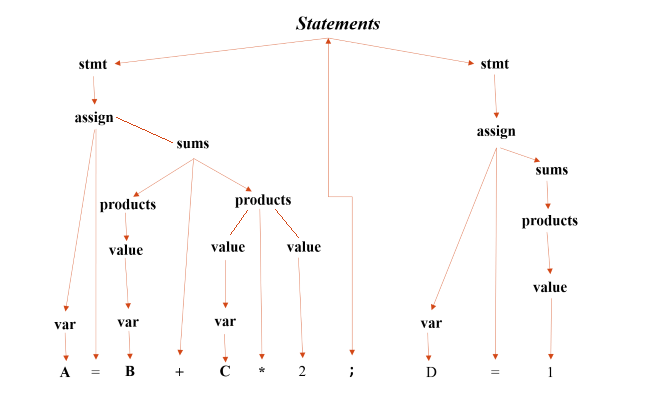

In [3]:
base64_data ="iVBORw0KGgoAAAANSUhEUgAAApcAAAGLCAYAAACSkLnsAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsQAAA7EAZUrDhsAAAAhdEVYdENyZWF0aW9uIFRpbWUAMjAyMToxMToxMCAxODo0NzowONOpBJUAAIVJSURBVHhe7d0HnBN1+gbwN8n2Xui9iKjYFUVFUVBE7AhYsGDFU/Tsnqd31jv923vvXQHBCigqIAgqIF1672V7303mP8+7E1w5ypZkMzN5vp/PsvlNssuW7OSZ99c8hkmIiIiIiELAa70nIiIiImowhksiIiIiChmGSyIiIiIKGYZLIiIiIgoZhksiIiIiChmGSyIiIiIKGYZLIiIiIgoZhksiIiIiChmGSyIiIiIKGYZLIiIiIgoZhksiIiIiChmGSyIiIiIKGYZLIiIiIgoZhksiIiIiChmGSyIiIiIKGY9hsm4TEdna5s2b5dtvv5WSkhLp1KmTtGvXTjp27CgzZsyQI444QuLj461HEhFRpDBcEpEj/PTTT3LOOedI165dZfz48RokX3zxRXnkkUckMzNT5s2bJzExMdajiYgoUtgtTkS2V15eLhdeeKHk5OTILbfcIqmpqRIXFyc33nijdOnSRd92DpYIm3h8XQUCAZk0aZLVcpZt27bp901EFEkMl0Rke3PnzpX169fr7ZqB0ev1ykUXXSTHHnusdaTar7/+KmeffbaG0Lrw+/1y++23y9dff20dcY4tW7bIqaeearWIiCKH4ZKIbK9mVfKVV16RiooKqyWy//77y8knn6y3UeF87rnn5KSTTpLu3btLbGysHq+NVatWaSB98sknZdCgQdZR+8PIpu+++0569OgheXl5csABB1j3EBFFBsMlEdneQQcdJPvuu6/enjVrltx5553afQ0nnniiHHnkkfLbb7/peEx0lWPCz4gRI+Tdd9/VxyCMPv300zJkyBB54okn5K677hKfzydXX321hrPhw4frxwYrloMHD5bKykq9jcD6/vvv62Pbtm0r7du3l/nz5+txfP5rrrlGPxahdOPGjXLWWWdJcnKyjB49Wj/+l19+kUMOOURatGghixcv1mNB+fn5+nFXXHGFJCUlaSBG1zbeEKIvueQSnbD04Ycf6vdw//33S5MmTeS0007TKiuquMcdd5z07dtXVq5cKStWrNCvB1XM888/Xz/+5ZdflnPPPVe/Lg6xJ6JGgQk9RER29/333xsxMTFIR4bX6zXuu+8+wwyY1r2GUVVVZXz00Ud6f3p6upGXl2eYAcwwQ6Bx2WWXGa1atTLMMGasW7fOiI+P18d98cUX+rHFxcXGoYceqsduu+02/Rgww6JxzDHHGEcddZRhBlbDDGv6GDMQ6v89adKkHV+PGXqNk046yTBDqx676aabjMmTJxv77beftvH25ptv6ueFefPmGWZwNC6//HLDDLL69Xk8HmPq1Kn6db/zzjv6MSkpKcaqVauMgQMHGu3atdNj+D+Kior0a1i+fLkRGxurx6dNm6afK/h1TpgwQf+v6dOnG4MGDdLbREThxsolETlC79695dFHHxUzgGnV8sEHH5S3337bule0Evn555/rbTzWDJg6JhOVQTOoybBhw3RWOaqFqDqaoU0fB7m5uTuqimeeeaZOFsLjTjnlFPn999/FDIX6+adMmSJpaWlaFcTXsWnTJv2Ybt26yahRo+T555/XCiTuM0OljBw5Ut/wdeANlUlAF3yfPn2krKxMnn32WVm7dq1+DahSHnbYYfrYZcuW6WNRFUX1ERXZO+64Q4916NBBv0b8P5h8hCqrGU7FDME6hCD4sdddd50u34TjqG4SETUKK2QSEdkeKnrDhw/XqhzezKCnVUcoKCgwMjIy9Pgnn3yixzZs2GAkJiYaZuAzzJClx1B1xGNQZQxWPt9//309lpWVpRVQuPvuu/VYv3799Ni///1vwwynhhki9X44++yz9TEHHHCAMXHiROPnn3/W6mNCQoJxxRVXaLXTDI/6mC5duhgVFRX6uU499VQ9dueddxqlpaX6eczAaMyZM0c/L74uM7DqY4488khj3LhxeswMu3rsqquu2vG44DFUQIPee+89rabi+OGHH64/GyKixsLKJRHZFsYOfv/991arenb4ww8/rAuogxmaZObMmXp79uzZWm3EeMeePXvqMVQTzfCmk1yaNm2q4xZRxQRMAkLlDzCmEXAMFcqioiKdGAQYK4mxjoBZ6wMGDNDb+L+mTp2qt3v16qVv33zzjY5rNAOtmGFU33/xxRf6GMzkxgQjjI0Mfk/4/80QqxVSfP0HH3ywHkdlc+HChXobE3VQdcT4Sqz1CViWCXAMY03BDMH6HnD/9ddfr58fY1QxxpSIqNFUZ0wiIvv56quvtGK4s0cffVSrcnhDxRDMAKXt7t27axtOP/30v1T1UHVEZRHHFixYoMcwDhMVTxwfMWKEHjOD3o7K35IlS/TYzvD/4n5URVEhha5du+qx4NdshuMd40QxHhLMIKttvAWrpDt79dVX9X6MwwxWHYPjSVu2bKkVUBg/frwewxjS3NxcPbZs2TJ9j8ecc845en/btm13VGmJiMKNlUsisi1s9fjZZ5/pzOiasrOz9b0ZCnWMInz66af6HmMmsc5lYWHhjjUxMSZx0aJFYoZVrSyaAU0/B6qFWHQcS/hgxx/MvEZV0Qxi+nGAj8H/j0rlhAkTxAyJehyz0aF///76+TDOEW8YCzl06FC9D2NAzQCpM8wxVtMMoX/53NhpCDAuEt/n6tWrtf3ll1/qe1QjsVYnvuZgxRXLLE2fPl0/75gxY/QYqpuo0OJ7QZUSs+VRJX3ttde0eorqKxFRY2G4JCJbQqBD0FuwYIFO5AmGMgSnV199VUMTJtAgtKEbO7jI+vLly/VjEMowaQY++OADuffee3WSDSCIYaIPuqGDk18QLnEMXe6YoBMMrbfeeqveh0k06AY/+uijdSIOutwhuCbmDz/8oF/zPvvso0sWAbrRAf8fljlCyEMXOCbfwBlnnKETcLCUEr4vhFC8x7qVgO0uAd35S5Ys0dv4PjGRCB+HJZEA4RlLF+H7Gzt2rPzzn//UnwmWNMIkpv/+9787hgAQEYUb9xYnIltCNRGztC+77DJdKxLVPczwRrUvISFBxxRiAfWgiRMnypw5c7RyGRyTiVD33nvvaahDhRGVTLQR5o4//ngdw1lcXKxVQVQysYg6PnfwY1G1xNqR+HwYj4mgBvjaUBVEYMMalVlZWVptxDjJAw88UE4//XR9HMId1sLE/4X/MxjwMDMcVUfcj4CL8ZrB/xfhEetqwt///vcdxzG2EuH2vPPO2xFeEYxRHT3mmGP0DV8zZrTj68Esd4RifN9YG5OIqLEwXBIRERFRyLBbnIiIiIhChuGSiIiIiEKG4ZKIiIiIQobhkoiIiIhChuGSiIiIiEKG4ZKIiIiIQoZLERER1WQEJFBRLkZ5qXkzIN6ERPHGJ2EjcOsBRES0JwyXRBRVDL9fjKpK861C/PnbpXLbRqnK2yqB0mIxKivMs6JXvInJ4ktOk/xJYyTtuP76GE9cvMRkNJG4Fh0ktlkbM3AmiCcm1vqsREQUxHBJRO6CU5r55i/Kk4rNa6Vy6wYJlBSJEagSCfjNQBgn3pR08SWlii8tS2Iym4ovNcPMlD7rE1TLHf+hbHr9Adn3jWnm46p35jEqys3PuUYqN68Tf0mB+Avzzc8Xo6Ezvt2+Ete8XXWFk1VOIopiDJdE5DiB8lKp2rZRKrdtEH9xgVWNrDDv8Zi5zivi9WpgjGveVmKbtBRPXPUWirUVKCuRpVf31M/fZOB10uLKf1v37BqqnmWrF0nFhlVWsDTE4zNDZ1q2xLXuJLFNq/cSJyKKBgyXRGQrhr9K/HnbpTJ3s1YGjcpyCVSUmu8rtfKIIIlxkHEt2ktcqw7iS06v/sAQVgtzx30g65+5VW+jwtnljWlanawTVE/N4Fu6bK5UrFsu3sQk8cTGm197ssSkZ0tss9YSk9nMejARkXswXBJR47ECl78wT98CpUVaJawe72iGyKoKrTzGNm8n8W06Vwc6r1c85hvGQjaGQHmZLL36WO1OD2oy4FppcfV9VqsBzO/fMAOyvyBHSpfM0S52Hd+ZmKJd9bFm2NRu+rQs6wOIiJyH4ZKIQgbBTAOj+eYvytcgGTDfa4CsKBOjqkpis1tIXIt2WrlDdzW6j/Fml3GKpYt/l60jX9DbFRtWSFyrTuI1v87WNz8Vtgk8CJwYz1mVu1XKVsw3g+168SanaVUWATvG/JnFpGaKNynF+ggiIvtiuCSiWkF3NQIQQmKguFCqCnKqZ1ljzCOOV1aILyXNDI8tdZwjwpE3PlE8mFW902QZp9g+5lXJPucaq9X4MKs9UFKos9XL1y2Xqu2bNGAicGIcZ4z5s/YlJtd5TCkRUTgxXBJRdXet3y8SqBJ/WYlW0DBhBgES3dVYogezrGMysrXLFpNldLZ1SoYu0eNWkQ6Xu4MKMYJ95Zb1OukoUJxv/h4StUs9vlVHicEkJvP35fE5M9QTkbMxXBJFEVTCqnK36HjCyu2bqoOjv8q8Q8SbkKSVRm9yqk44wWQTrPVol+7qSLBruNwdVDkrNq6Wii1rq8exmr9vnbWe1Vzi23XRqjIRUbgxXBK5RSAgfjNcoOu0MmeLjnPU5XnQnW39mSNoxGY3l9imbSTGfK9jHWm3nBYud6cqP0fKVy4wQ+d6rWZ6YuOsSnQTiUOls64z4YmI9oDhksgJzD9TdIVilnFV/jYd5xgoK9X1HhEgMSEEj8G6irEt2un6jliux/wTj+rKY0O5JVzukhHQixCdQIQdiMywifGbqGDHZDXTCxAMfyAiqiuGSyIbCE7cqMLyPFiqB+GxuNAMjyXVM4nN+9FljR1gdG3HlHQRr696ogzDY9i4Olzuihk4MaMfs9XLVv0hVds364QsX2qmjq9F1RvjOr2JnLVORLvHcEkUbuYL9o4lekqKpKogV/e0Rhe2jnkMjovDEj0tO+h4R0yS0a5Lh86ydouoC5e7gXG5GGZRuXmtlK9ZIlV523bMWo/JNANnVjOtcmLJJiIihkuiBkI4rN5FplxDIybK4D3awS0JUWnUpWMymuqLss98w24tZG8Ml3uGZamwGH7lptVSsWmNXjBhQXhUN2Obt9VJYd74JMH+60QUPRguifbE/PPQ8YzmGyqO1ftZb6we62gGSkyiwRqDvvQsiUnJEF9aZvVSPcmp5l9X4+woQ+HDcFk/OrEMfytb1+vqBLjQwrAOzFaPa91RQ6edFs4notBiuCQyobsa6wUiOGK8o+5hXVmhARFd1N7YeA2Q2F0G1Uc3r+1If2K4DK2q/O1SsX65VG7fXP33Zf6d4W8ptkkrM3R20iEhROR8DJfkeuiarsrZqotO+4vyduwmI+jONgLmC5yhXdXVWxK2ifq1HelPDJeNAxd2ZSv/0Conhot4Md44LkErnHEt21dPYCMix2C4JGfD2o5mYMS4L33DpBms76jd1mZ49FeIxxcrseYLFJbn0apjsDuOAZL2guEyQnQ4SkAnEGGpJAxJwdJamKWO8cpYFB7VTm9isvUBRGQnDJdkY4YESkt0lrUuzWOGRj9mWpu3ER4DOubR0IkymDyALmuM6xIsEs3FwSkEGC7tRfe3r6qUio2rpGzlQh3OohXOjGxd41Vnradnc9Y6UYQxXFLE6NqOFWViIDRibUdMmMEsa/MFQ4+b98dgokx2Sw2QmCRT3WUWL+LlZBkKP4ZLZ8BQF/Ra6NaX65fr1pceTCBqYp47ME46vYl4k1N0oXgiCj+GSwoPazFmDZDmSb8qD0v0bBB/Yb7OssaLAU7+uhMIlitJTtPuLm+SGSBjYq1PQhRZDJfOphsTYBLR5rU6cx2TiFDVRE9HXIv2ujanrilr4/VkKyoqJC6uYaEYL/N+v19iuCQUNRKGyzD65ptvpF+/fuJtQJWtqKhIpk+fLieffLJ1xCbwtDHf0DXtN4NjxeY1OhgfJ28ESlQWdXxUihkak9P1JK5rPHKMFDkIw6U7YRF4TCLCDkRVBTnVs9YxNrtFW0nosL95oZtqnsMwJrse47JxbgzReO6ysjK544475Nlnn7WO1M93331nfkke+72OkGsxXIbJzJkz5fLLL5fff/9dfL76XRXjSvPqq6+WQw89VG688UbraO2gMpj3/QjJPO1i60g9mE8Nf2GuVGxZL1U5m83PWd1VjYH2HjM8osKIXWQwximuWRsNj+yuJjdhuIwulVvWSfnapeIvyhfDPP96rPHbWEUivm2XvV4cB8qKZeOLd0vzy/+pM90boqqqSoYPHy5z5syRadOmWUfrbsmSJXLcccfJe++9p8UOosbAcNkAATNkffDBB3oSSE6uPukMGjRIfvjhB7ngggu0K+Odd96Rtm3bSnFxseTl5eljunXrJm+88YZs3bpVw2O7du20vXjxYrnyyivliCOO0IrlLbfcIq+99pqeYM4991w9QcTH7319xZI/ZsqGZ2/TQe8HjF6x26toTJCpytmiS/RgnKPhr9RtCgWD5s03fBwWBI9r1VHimrbWIBmqK3IiJ2C4JFxkl69fUT2ByDxnYrchTBzU7nXzvBjbol31REJTpXkhvvjy7roPe9u7XpGUQ4/X43uyfft2GTp0qFYVt2zZohVGVCsvvfRS+fzzz6VZs2Zy5pln6msLXhfGjRsniYmJctJJJ8ltt90mOTk58thjj0nXrl31tWL58uXy0EMPyU033aSvRfg4PAbBskuXLvLoo49KQgInPFF4MVw2wJgxY3b8MePK8qOPPpLnnntO7rvvPnn44YclOztb7rrrLjnssMOkY8eOGipLS0vl4osv1vvQ1dGhQwc9qeAEgo9p06aNrFixQmbNmiXXXHONzJ49W4Pl8ccfr+1giN0VjC/a+smzsu2zl6u7pk2dHv/c/C17q/e1Li0xj1foGo+obGKMIxYuxjpyOtYRO8qw8ki0A8Ml7VIgoDt3ocpZtnx+9Q5EiUlSsWGVbHn/serHmOfTpoNvkGZDbq2+MN+Ne+65R1588UWZO3euBku8LjzyyCP6+jJgwAA5+uijZfLkydoDtmnTJunUqZMWNvAYBEwUI1JTU7UYMXDgQOnevbvExsbK+vXrNYTitQNDq7788kvp27dvg8dvEtUKwiXVz7BhwxDMjcGDBxt5eXnGm2++qcfnzZunxzt37mxUVVXpMfPq1DBPAHp81apV+vj4+Hh9W7p0qVFZWWk0bdpU7zdPCvox+LxoP/PMM9rek8rcrcayG/oa8/o1/8tb/k9fGv6SQiNQUWYYfr/1aCKqjW2jX7FuEe3dlk+e/cv5d37/Vsaa/15jmBf01iP+15AhQ/Q837JlS2PKlCmGGTL1+BdffKHHe/TooW1Yt26dYYZDIyMjQ19T8PqCx+CtrKxMj6Wnp+tj8DoDxxxzjN4/duxYbRM1BpapGmD//ffX959++qn07NlTevfure29wdUkrlABk32SkpL0dvAYutnrKiajibR/6CNpdePjktj1sB3bE6JKiYk1WMKHVUkiovApXTRL191M6LCfNBl4vXR+/jtpc+sze1wBA93WqEpu3LhR+vTpI8uWLbPuqZvg6weRHTBtNMC1114rp59+ut6eP3++dknUJxiGSkxalmSddrF0fuob2ffVKdJ86F3m9WrAupeIiMIpo/d55rn3J9nnhR+kxZX/koSOB2jY3BOMp3zqqae0u7q8vFxuvvlmfR0JVVhk6KRIYLhsgM2bN8tnn32mJwP8AS9cuFAHZGP8SyhkZGRYt+rI/FqwjlvT8/9unuwGWgeJiCic0nqeoefeuvQSYSzkDTfcIBMmTJAmTZpoBRMrhWRlZVmPaJimTZtat4gaD8NlA2AmOGb6PfnkkzJs2DANg5mZmTu6uQsKCvT+X375Rdt1lZKSou83bNigA7INzr0iInKVn3/+WSfsYOLNVVddpauCYEJOWlqadpdjKSGsGjJjxgydEIrXAYRPrIGJVUiCcnNztfKJyT54DGaWAwIrfPLJJ/L444/rbaJw892Hqc1ULzgpjBw5Umdw//bbb7oWJdakRLhctWqVHvvxxx+1solFbNetWyft27fXkwZm/aHdqlUr/VzoBkHXOpYlwokFM/4wg3zs2LEyceJEnVWOcZ1E1HhKF82UpP2OsFpEoYfiwaJFi2TlypX6uvDEE09o7xcqjnjLz8/XZYbOPvtsmTJlioZQzPpGsMTHnHjiiXLGGWdoTxrC5eGHHy79+/eXkpISOeCAA/S1BJ8XYfTvf/97/XvEiOqASxE1AK4e0R1eWVmpE3MQCoPwY8UfOo7VdxF1wOfGlSjG43DsDFHj4lJERER1x27xBkBoRKjEwuY1gyUgCGKh2oYES8DnxednsCQiIiInYLgkIiIiopBhuCQiIiKikGG4JCIiIqKQYbgkIiJykNJlc61bRPbEcElEROQgJQtnWLeI7InhMgKK50yxbhEREdWNp4GrkBCFG8NlBFTlb7duERER1Y3Hy3BJ9sZwGQke88fOteuJiKg+WLkkm2O4jAAPwiUREVG9cFMNsjemnEjw8sRARET144mNs24R2RPDZSRo5ZLd4kREVHdeM1wafr/VIrIfhssI4D7hRERUX564eDGqKq0Wkf0wXEYCZvqxcElERPXgjU8Uo7LcahHZD8NlJHg8ZrZkuiQiorrzxMaL4a+yWkT2w3AZATpeprzMahEREdVedeWywmoR2Q/DZQR44hIkUFZstYiIiGrPk5DEcEm2xnAZAV7zxOAvLrRaREREtVc9W5wTesi+GC4jAGuUGeWlVouIiKj2PDGxEigpslpE9sNwGQEYjB2o4JhLIiKqB1+MBMpKrAaR/TBcRoA3IVEC7BYnIqJ68CBcskBBNsZwGQFeTughIqJ6Qre4wcol2RjDZQTobPFShksiIqo7j88nAY7bJxtjuIwAHYxdxWUkiIio7jw+8zWkjOGS7IvhMkI8Hv7oiYioHrxeMaq4/SPZFxNOpHg81g0iIqK68XhjrFtE9sNwGSmsXBIRUX3FMFySfTHhRAorl0REVE8er8+6RWQ/DJeNyTDEqKoUo6JcxHyPGeP+kkLzeMB6ABERUS14+fJN9sVnZyOqzNksy4afLEuu6Smb3nhAllzeXZb97SQzYHIbLyIiqj1WLsnOGC4bUWxWc0nscohUbl4r/uICqcrPkdTufcSXnGY9goiIaO+wHBF6w4jsiOGyMXk80uLyu8Ubn1DdjEuQpoNv0NtERES15TFfR4xKLkdE9sRw2chisppLk4HD9Xbqkb0ltmlrvU1ERFRb3oQkCZRzf3GyJ4bLCGgy4FoNmVq15KxxIiKqo+pwyV16yJ4YLiPAm5Qi7e9/TxL3PcQ6QkREVHve+EQxKli5JHtiuIyQxH0OFi6kTkRE9YEiBbvFya6YboiIiBwG3eKsXJJdMVwSERE5jCc2XgKcLU42xXBJRETkMB6vt3q3NyIbYrgkIiJyGo+PYy7JthguiYiIHAaVSzH8VovIXhguI6SyslI+/PBDmTZtmnWEiIioltgtTjbGcBkhs2bNkosvvljOP/98KS/nCYKIiPbOX1wgJYtmSfHsn6R44a+SO/5D2f756wyaZCsew2TdpkZUVFQk99xzjxx00EFyxRVXiIc79RDZzvYxr0r2OddYLaLIq9y+SZZedawEykqsIyLJ3Y6Wjo+NMV/R+TpC9uC7z2TdplpAd/bcuXNl9uzZ4vV6JSsry7pHpLCwUCZPnqyPKS4uloyMDD2+ceNG+fnnnyUpKUm2bt0qmZmZEhcXJ/369ZPDDz98R7AMBAIyf/58/dwJCQmSlpamx3eGSueUKVPE7/f/5f8notAqXTRTkvY7wmoRRZ4vKUU88QlSNHOidUSkxRX3SELH/a0WUeSxW7wOlixZIsccc4ykpqbKsmXLZL/99pM333xT70OwPProozVALl++XAYMGCAoCuNjcPzAAw+Ut99+W+6++259/O233y6xsbHStm1bKSsrk4qKCu0iHzx4sBxxxBFy4YUXasA88cQT9fPheExMjPTp00euueYaOeuss6Rbt24yY8YM/XxERBQdsk67ROJadtDbcS3aS9rxZ+ltIrtguKyD559/XmbOnCm//fab9OzZU6qqquSFF17QEDlp0iT5448/ZOTIkXLyySdrOIT33ntPK5djx46V2267TQ444AA9PnToUP04VB8Bk3vwsQiTTZo0kTPPPFMDJz6mc+fOWuXEY1HZfOqpp+T666/XCuaoUaP044mIKDpgd56W19yv3eBZ/S8Vj89n3UNkDwyXdXDrrbfKI488okEPlUvA2EmERFQh4ZlnnpHTTjtNLrjgAu3uRvc3QuiwYcM0KA4fPlwft7PFixfre1RFISUlRT/vwoULtR2Eqia6wps1a6btkpI/x93A/NNa6BsREblXSveTJfXovpLR9wLrCJF9MFzWQfv27bW7+9prr9WqYk0nnHCCHHvssRoIf/zxR+nfv79WFlGhbNWqlY6nfO655zRc4jE7O/vss7Xbe/Pmzdpet26ddrH37dtX20EY51nTpk2brFvVDhy7Sd8YMomI3AvVynZ3vSox6dnWESL7YLisg59++kkrhxh3GezeDoqPj5dvvvlGzj33XK1Yzps3T8aPHy+tW7fWjzvssMP0cR999JF2k++sR48eMmLECJ0QhBCK7nd0eR966KHWI+qGIZOIyN08cfHWLSJ7Ybisg3/+8586cefggw+2jvxpwoQJUlBQoAHxlltu0WMInK+//rq0adNGQyMm4yB4BrvQa0L39mOPPaaPu+GGGzSYovu9oRgyiYiIqDExXNZBenq6vr/xxhu1SomguH79evn22291bCUWRd+2bZv06tVLK44nnXSSBk6M1YSjjjpKLrroImnatKl899132lWOMZvff/+9LlWEN8wEv/zyy/XtX//6l/z666/6sZhEBEuXLtXxmViKCFatWiU5OTl6e092DpkMmkRERBQOXES9DnJzc+XTTz/V8ZVYhgihEuEQXeEYK4kf5fTp06W0tFSPYcwkwiDeT5w4Ude9RDXS5/PpJJ+aEELR3Y6li2rCBB+ESQTSIIy7RDANwucLrpVZF8GAidBJRP+Li6gTEdUdw6VNjB49WtfARGBFCMWyQ+giHzJkiI7fxGSicGHIJNo1hksiorpjt7hNoMsdXeuodKKbG93rmDGOpY/CGSxh5y5zIiIiovpi5dJG0J2+ZcsWfY+g2bx5c0lOTrbubTw1AyarmRTNWLkkO8NWw5dddpm+XmC3uJ2XqiOKFIZL2iN2mVM0Y7gkO9u+fbu0bNlS10jOz8/f5UokRJHAyxzaI3aZExHZU3Z2tkybNk1XGmGwJDth5TKCDH+V+Y8hnhjnnBRYyaRowsolhQO2D160aJFO1kQovOqqq3QiJ+AYJnZiZzesf4wl7rBmMo5hNREMl8LQqUsuuUSXqCsuLtaPwxJ46BbHmP0PP/xQVxDBSiUYs4/bBx10kK48gt3lMNwKG3xgww4EVKytnJCQoJ+HKBQYLiOkYvNakapKvR3XupO+dxKOy6RowHBJoYbd17BV8KRJkzRQIvT17NlTtw3G0nb77ruvvPTSS9K7d2/dRnjs2LGydu1a3bwD7xEm//a3v2nYxPa/6BYHbDdcVlamS9phLObChQvl8ccf180//v73v+vb7NmzdZm8Dh066JbDc+fO1f/3gQce0HWViUKF3eIRUjJvmjg51Qe7y9llTkRUewh0qOkgHKKCiPGSqECiSolAiMA4fPhwXTnkwQcf1KCIAIi1kQcMGKAVRlQtoeb6x4DNOfA5sA4zPu+BBx6o/xfWRUagzMrK0sdhzWYEyuuvv17bM2bM0PdEocJwGQnmH7t2ibsEQyYRUe1ceumlsnr1arn22mvlyy+/1NCIAIgQ2bZtW535jWXosFkHHofqZteuXbVrG+Mru3fvruFxV4Kbaew8a3znTTvatWsnaWlp+n8ButmJQonhMgKq8rZJbHZ1V4abMGQSEe0Zgt8vv/yiXd7owkaFMQhd3OgSxzhMdH8PGzZM5syZo13kqGYiPG7cuFHOOeccycvLsz7qT3369JFu3brp2EyE1fnz52t1E13ie4KZ5kShxHAZAZVb1klcuy5Wy30YMomIdu2rr76S8847T04//XRp0qSJdbQalha66KKL9DHowsY4ynHjxsmGDRvkmWeekWeffVaDJ9ro/t4ZNuMYNWqUjtvE41GxRJc72kSNieEyAqrytkpck1ZWy712DpkMmkQU7d577z0dA4kxlpjZja1+AcdQlXzttdekb9++OpEHVc1DDjlEJkyYoNVOVC8xwzsxMfF/dm7D58FYSlQvsZXwbbfdJvfcc88ud3jD/wWcz0vhwnAZAUZlBQbHWC33C4ZMVjOJKNqhYomlhcaMGaOBcZ999tHjb7/9toZGhM8RI0borPILLrhATj75ZJ3485///EermCtWrNDwiC70Tz/9VI4//nh9w8dj22BMCOrRo4f4fD59w5JG6BbHTPLp06frY7Gc0U8//SSTJ0/WdrNmzWT58uX6dRCFApciioD8Hz+T9JMGSPn6FYKI6cSliBoqGDAROInsiksRUajhJRfd3ahK4g1jI1FJDE6uwW1UIfEeIRTjLNHGezwWcHxXsIbl4MGDZcGCBZKSkqLHUB3FEkZY+ghBkqgxsHIZAYbVJRHNWMkkomiEkIjlhIITeTCGMhgi8YZqI4ImHoM24BgmAuFxuwuW8M0332h1Essd/f777/qGRdkxtrNjx47Wo4jCj5XLRmZUlEvBtHGS3uvsqK5c7qxmwGQ1k+yClUtyksLCQvn3v/+tywyhux3BFeM4MSsdXeVEjYXhspGVr1miYy4TOh/IcLkb7DInu2C4JCKqO3aLN7KKTaslrlUHq0W7Up8uc+xmMXr0aL1K/+OPP6yjdbNy5UodZI9B8bB582ZtY0HjIFyLYewSdsJYv369btdGREREf2K4bGT+wjzxJlYPtKY9q23InDJlii7dgVmV2EsXsyYxAP7ee+/VMUuYVYmB7hdeeKG2sQAxYHFiLNOBY0OHDpXLLrtMBg4cqHv4YsbmxRdfLOeff74cdthhGjgRLG+55Rb55JNPdFu1M888U9ebIyIioj8xXDYyw1rTjGpvbyHz6aef1tmQX3/9te7Fm5mZqQPgMWsyCAPkET5rQogMDnLH+CRUJHEM1U/MtsTev6eccooGS+ztiyrl+++/L+PHj9c16rBIMZb3ICIioj8xXDYiI+AXT2z1chNUd8GQuTOsAYdK5ZAhQ+T+++/f61Znu7L//vtrBTMpKUnbCJloY0A8YHs0zNZEG+vMHXXUUXoMW60RERHRnxguG1NVpfiSUq0GhQoWFMYiwFgX7tFHH5V//OMfYdl5AiEWMzGxhAjWjsMWbj///LN1LxEREQHDZSOqys+RmIy/7iVLDdehQweZOnXqjioixkSWlpbq7VBCYL3yyivl3Xff1QWKMY4Te/0SERHRnxguG1HF+hUS26y11aJQefjhhzVgoorYvXt3HV+JLmxspQboMkcwXLx4sbbrC2MuX3/9dZ0YNHHiRB3XiWomERER/YnhshFVbt8kvvRsq0Whggk4we7q/fbbT6666ird3aJ169ZyxBFHyNatW+Wss86S1atX6+MXLVoka9as0bCJ94AJO2hjYhBgD1+0lyxZom3cX1VVpZVK3NepUyfds/fGG2/U+4mIGhteU2rSdZQDnDRKkcdF1BtR7rgPJLPfEKtlngi4iHpIYGY3ZohjtjeWFsJuFJiMA9ixAmtV9uzZU2eGB5/uwftrPv1xbE9tVECxFmZxcbFur9arVy/9/8i9uIg62VWgrEQ2vXavtLrhMetIddgsnv2TeHwxEtu8rSTue6jeJmpsDJeNJRCQ3G8/YrgkchCGS7Krwl8nSNmqP6Tp4BusIzWYL+uVW9dL4YwfxZeaIfHma0x8h/3E4/VZDyAKL3aLN5JAeQkn8xARUYOh6xu7vcWk7+Y1BcuoNWsjWf0vkbRj+4s3IUlyx74vBVO+kvJ1y8TwV1kPJAoPhstGEigtlpgmLa0WERFR/VSsXylJBxxl3tp7x6PH55O4Vh0l6/TLJLXHqdW9aGbQzP/pS6ncss5sc4wmhR7DZSOpzNliXmVyMg8RETVM6aKZktBxf6tVe56YWIlvt69knTFU0nr0larcrZJjVTSr8rahJGo9kqhhGC4bSeWWtRKT2dRqERER1Z2/KF+7vRs6UccTGy+JXQ/TimbKkb2lfNUiyf32YymY+rUESoqsRxHVD8NlI/EXF5hXjdz6kYiI6q902dzq7u0QwpjM5EN7SuapF2nQLJo1UfK+H6mThhg0qT4YLhtJoKjAukVERFQPhqEVRl9K+o52qHnjEyWt5xmS0WegJB90jBRMHyd5Ez6V4rlTzaBZaD2KaM8YLhtBoLxUfGmZVouIiKjuylYvlqQDe1it8PMmJktG74Fm0BwkCR27ScG06qBZuvh3XWeTaHcYLhtBoLhAZ+sRERHVV9nKBZLQ6QCr1Yg8Hl0vEyETb7HN20j+pDG6dnPZigVaQNlZ0cwfza93odWiaMNw2QgwCy+ueVurRXaT8817UjxvOpfkICLbwnJ2RmVF5BdCN4NmTEZTHZ+Zecr54k1K1aCZ993HUr52qX6N6K7fNvIlWfmPgVK2apH1gRRNGC4bQVXeVv0DJHvB+KGCKV+LNz5BYrOaSc64D3SB4dqsHUdE1JhKFvwiacedbrUskd5gz+OVuBbtJLPvhZLeZ5BeoOf9MFK2f/GGlCyeKf6CHFn1z8FSsWGl9QEULRguG4E/P0cHSZNNBAJSMH28FM2aJKlHn6wnaGzBmXXaJVplzhn7gfgL86wHExFFXsWWdeJLTrNa9oOKanz7/bSiiTWdUWmFqtwtsvKugVKxea22KTowXDYCHY/iwS7iFGmV5gku55t3JaHjATojEmu9GcGFg83fUfKBPSSr30UaPPN/+mqXY4mIiBpTxfoVktC+q9WyOfNifftXb1sNM2QkpmhxZesHj3PbySjCcBlugYAYVZVWgyIFMxvzJ38h5euX66LBfxkD699prKXHK+m9zpbUI06U/ImjpXjuz+YJkztXEFFk4ByU1O1oq2VvRmW5ZJ58vnR46GPp+t7vsv+nf0iXV36S1rc80+CF38k5GC7DrCp/u8S1aG+1qPEZUrbyD8n7foSkdu8jKYef+JcqcqC0SGdB7oo3KUW7eOJatpdtY17jwHQianS4MMa5yCk8cQmS2e8iSTEvzmObtNQtJ9lzF30YLsMM403i23axWtSYEOxzx76v3TSoVmLNtp35iwt3Gy6DYpu2libnXCNGRZkuvVG5bYN1DxFReGHx8uRDjrNaRM7AcBlmmBjiS8+yWtQYDL9fin6fLMWzp0jGyYP3uC6cvzhffGm1+P2YV96J+x6qCwpjXbe8Hz/jeEwiCiucyyq3btClf4ichOEyzPwlBeKJ5Z7ijaVyyzrJ+fINiW/VScdNYsLOngRQuUzZc+WyJnTxpB51iqQd3VfyJ46RopkTdVwtEVGoVW5Zqxe1u2M4YNm0gHl+rKysFMMw9HZ9+BGyrc8BNT9nTVVVVfpW3/+HQofhMswQXjiIOfwwaapw+ngpW/WHZJ99te4gURtY63Jv3eK7Uj0e80KJb9NZcr/7WMqWz7fuISIKjaLff5KETt2s1i7YPFuuXbtWTjnlFBk1apRcf/318tBDD2n4e/zxx+Xcc8/VY8XFxXLnnXdqG8dhypQpct555+mxzz//XA4++GBJSUnRxy9cuFCOPvpoSUpKkiuvvFKDJ3z88cdyySWXyEcffSQnn3yybNq0SY9TZDBchlmgsty6ReFSunSu7rKD2ZSoKtZl8LgOlo9LsFp1F9u8rU76CVSUSc7X72gXFhFRQ+l48OQ0Rxcn7r33Xlm0aJEcf/zxcvPNN+uxmJgY6d27t4wZM0YmTJggiYmJ0qZNG23/9ttv+piePXvKr7/+qsd+/PFHfVxaWpq89NJL8uKLL8r48eMlMzNT3nvvPVm5cqVWMfH5EVwvuugiDaa4TZHDcBlGCC6+hP+dREKhgQk7eT+MMm8FJPusK+pVgQxVt1LS/kdKVv9LzKA7Rwqmfq0VayKi+ipdNFNSDj/BajnT+vXrZcOGDVpp3L59u1Yi62rYsGGSnZ0t6enp2h4wYIBkZWXpGwIkKpToBt+2bZuMHDlSzjrrLDnttNM0tFLkMFyGUeW2jRLvlIVvncQ8kRTP/kkKp38r6SecJYlddj8maa8wNidUy2R4vJJ27GmScsRJkv/TF7oQO9c4JaI6M89L2Kfbl5ppHXCmK64wL/p9Pg2ZqFauWbPGuqf+PLs4X8fFxcnAgQP19jfffKPhcufxmNS4GC7DCEvWxLfdx2pRKFRuWa97gMe2bK9jHnUNtYYIw8Bvb0KSZPYborPUc758s3o8Jk90RFRL5euWSdJBPazWntj7vDJ48GB5+umnJSEhQUpLS+WWW27RLuxQQ+B844035JxzztHbS5YskYcffti6lyKB4TKMdG9VTuYJCVQA8yeNkbJVC3WB3rjm7ax7GsYI7LQ7Twhh+ZDsc67Ryii2nEQlm4hobzC8JqHD/lbLud59910ZPny4jpHMyMiQ/Px8qaio0GpmTUVFRdat+sHn/OGHH2TEiBFy//33a8BEtZQih+EyjLD7Czbz3y1Us3ZR4qe/Kls+T/J+HCXJhx6vE3b2+DOtszD//M3fL2Z7ZvW/VMpX/aGLsGN7NCKiXcHrBvbgdsMqI5iMM3XqVDnhhBN0kg0m9iQnJ0uHDh00bK5bt06ee+45GT16tD6+oKBAx0+Wl5frG+Tm5mp4xBtg7Caqn6iEBtuAmeZlZWVy22236UzyCy+8UI9TZHgMDkwIG2w5mNFnkNX6XxhTg62y/rLPNe0QKCvW/cDjWnaU5Fp1EdWR+dTPnzRa0k8cYB0Iv0B5mfk9jdGqZsrhvbhMlc1tH/NqdfWZqJEU/va9JB3QXWeK7w1WycBEQrt65513NARiGSHM6r7pppskNTVV7/v222/l1VdflX79+mno/P333/U4Zopv3rxZli5dqm2E0VatWu1ow5FHHikzZszQ2xhv2b9/f51JHh9fva4x/r+LL75YvF7WzyKF4TJczKuvvB9G6g4xu8NwuRvmU7J43jQds5p+wtkNH1e5O0ZAw2t6r3OsA42nKmezFEwfL4mdD5LErodZR8luGC6pseWOe18y+11stfbAPE/mjv9Qx3cT2Q1jfZggGMW2CM24wGiCnxu6jmOymutWi2ELloDLKk9k/gTw/aGr3JucKjlfviUVmxo+i5KInK189WKJb8cVRsj5GC7DpGLzWolvw5nitWVUlOnyPWUrFkrmKRfozjfhpmtcRnjIK54jWadfJhUbV+l+5f6iPOseIoo22BACa+YSOR3DZZj4C3IkJj3batFuGYaUr10mud99Iik6Yedk81nZOE9LzOb3JVWP/4ko8/tNOewESTu2vxT++r0UTBsnRmX14HUiig5Glfk3j4vdWk/yNC+OOaaQbIrPzDDRcMCZ4HuECTvYMhH7e2edfmmjLxgcKCkSb2KK1Yo8b3yCZPQ+TysXOWPfk5JFs8wnUujX4SQi+8GFZcqRva1WLXC2BNkYw2WYGNZm+rQLhiElC37VCh0mPFVPaGn8IO4vzq/VjMzGFpPRRLLPulK8cfFmyHxfh1gQkYsFAlKVtzVqe7tQjOFuZu7CcBkORiC8E1EcrGr7Jsn56m3xpWVKxknn6W42keIvzBNvSvV+tXYUXB+zYt1ynRXqL8q37iEiN8GYa/y9RytMaMRrA7kHw2UY+EuKtYuT/oQr08JfvpOSP2ZI1hmXSXzbLtY9keMvzHXE3r0pR5yo66UWTP1aCn/9juMxiVymaO5USdq3HkuSRWi1i1BDMSZQVmK1yA0YLsMAV6FxnCm+Q/maJbr9IcYSpvU8wzYnRCxojq5nJ8DJN/PUiyTpgKMkZ9z7GtLDsS86ETUuf3GB+JLTzVfjup0XsdoFtjl0A5zf/GXFVovcgOEyDCo3rebC6CZ04+ZP+lyqCnJ1DCG6wu3EiWN8fCnpkn3mFRKb3VK2f/GGVKxfYd1DRE5U+sdMST7kOKsVnRAujfLq7RzJHRguw8BfWiye2DirFYWMQPWEnalfS+rRp0jygUebZw/OnA+l2GatJfvsK6UydyvHYxI5FfbRXrcs6pet88TESKCM4dJNGC7DwV9l3Yg+VXnbJGfcB+JLz9Ju3EhO2NmrgMNn9Hu8GtyxfFHRrEm63WjNaizW8UTAJyJ7Kl+3XJIPPtZq1RF2bnbLmEtfjBjlZVaL3IDhMsTw4m7rQBUu5omucPq3UjxnimSecqEjdicyXDJm0RMbL+knnCWp3U+WvO8+keK5P+txrJW5/ulbpHLrBm0Tkb2ULpkl8e0bsN2jSzqEdEJPOcdcugnDZYgZFeXiy2hitaID9sNF12zi/kdIeq9ztIvD9sww7HHZ7ha+1AzJPO1iicluIdtGvypb3n9cu8vXPX4D110lshlM5EHlEVW7qIdwWcrZ4m7CcBlilTmbJTazmdVyt0BpkeRP/kK/Z3SBO2nckBHwu3ZcbHzrTlKxbpn+fqB43s+S+827epuI7KF08SxJO+Y0qxXdPF6feQEcvcPJ3IjhMsSwDFFs01ZWy6UCATOwTDOD5ZeS2qOv7ovtuAk75okM3cluVLZigS5XtINhyKa3HuLMciK7MP8my9etEG9SA7efdcmYS8V90l2Fv80Qw4QWO+1X3SDmCbBkwS9Wo5o/P0cn7KBKmXnqheKNc+Zi8Rhv6Y1PtFruEte6k3R961fp/Ox46fjIKGn3rzel5TUPcBtJIpsoW7NYknTb2wbA0B4XrcKB6iW5B8NliBlVFc6r4u1GyR+/yer7LtUZjeiywMzj4vnTNVTGt9vXepQzYQyiN8Gd4RKhObZZG0nscoiun5d2bH/J7DdEUg7vZT2CiCKpbPl8Sdz3EKtFipVLV+FvM4QQwNxy9YUtBje+/K8dE0J0wo55pZ12XH9XDEA3KsvNEBaFs/qJKKIC5aXVE+zc1KUdAm6bYBnt+NsMIUygiG3a2mo5W+6ET6V02Vy9XbpktnZ/xzZxz1jSQElhdC4ZVQvffvutXHrppTJ48GCZPn26dZSIQqH498mSdnRfq9UAhuGuap+H3eJuwnAZQv7iQldM5qnK2Syb33iw+uQFRkA2vnyPVOVuqW67ABYY97h0zGVD9e3bV5YsWSIjRoyQdevWWUcbpri4WO69916rRRSlzHMqxuXbbStcO2Dl0l08hsm6TQ1UsvA3iWvVUWJquc5l+dql4olLsN0+5DlfvyNF5tV1TGZT862ZxDZpaX6N7SS+4/4Sk5ZlPcrZiudOlfj25veT7o7vJ9R69Oghv/zyiwbMgQMHWkfrp6KiQq655hopKiqSkSNHWkedYct7j0pi18OtVoiZp96EjgfoVp4UHSo2rNRwmXRAd+tI/WHoUsG0sZJ+wtnWEWfL+36kZPRp2LmG7IPhMoSw5mNaz9NrPe7SruEyGhROHy/Jh/USb7xzZrt/+OGHsnTpUvGaV/inn366/Pe//5XFixfLU089JSeffLKGuJdffllycnKkU6dOcsghh8gll1wi5557rtx///0yZ84cefjhh+XQQw/Vz3PHHXdI167Vu4OgsnjPPfdIQUGBnHbaafq5f//99x3h8qWXXpLNmzdLkyZN5Morr5RXXnlF8vLy5PDDD5ezzjpLP8eyZcvkySefFJ/PJ7Nnz5ann35a9tlnH7nsssvkiy++kP33318GDRqkny8+Pl7uuusuOeaYY2TDhg36f+J7sBtde88Iz05OgfIyKZ41SdKOP9M6Qm6X8+VbknXGUPOVt+GTPt0WLvN//EzSTxpgtcjpWIcOIey44JQJPVu2bJGNGzfqW8Al2yDWhb+02FHBEtBdjcB23333ydy5czVsJiQkaGBDQIuLi5Pk5GQNki+88IIGwPXr12tIRDA85ZRTNHT+4x//kHbt2slJJ50k27ZtE1xf3nbbbRpM8flPPPFEWbNmjfW/VuvcubN+3ueee04SExMlNzdX2wiNgDY+P8Lkf/7zH616Xn311RIbGytHHnmk/h8dOnSQK664Qr+GW265RfLz8+XGG2/U+8vLy/Xz2A0mr3li4sL0Fmv9LxQNAiVF1bu3hWw1ESxF5J5xitjUgjuJuQfDZQjhStIpUGVq3bq1tGrVSoNBKCBAYKyeIzhwNwhUBLGuHd6fcMIJGib79++vFcS33npLH4MwBwiVqGjOnz9f3n33XQ2OW7dulbZtq6vkCIu4sHj77be1avnee+9JmzZtNJyiOon7awp+3iB8DTWNGjVKVq1apVXR1NRUef755zU4JiUlSVZW9dADhFKEWhybN2+efP/993LxxRdL79699TiRmxUv+EWSDzrGaoWIe5a5rN4xzYHnZdo1hssQwezj2o61tINjjz1Wg0ooffXVV/LGG29YLXtz+lZjwd8dAiEsWLBA3wchHKLruWXLlpKRkaFBDtLT0/U9utZhypQpsnLlSg2YwWNQ1+fG1KlT9X1paal+LMZYDh06VI/tCqqwuBj59NNPpU+fPtK0aVPrHiL3wXazFRtWOeo1orGhms8tIN2D4TJEsB4kdkYJpaqqKpk0adL/BIeaKisr9TEIB+D3++XXX3/V5WTQ5bkzBInx48fr5Ir6WrhwoYwbN06rn0GTJ0/W5WtqdrHja0F4mTZtmlbS8P3YhVu6X3YXAneuNO5p6EMofi/4XcNvv/2m7/fmiSee0IAJeH7feuutepvIjRAsk7o1fBKPm3ni4sWoqrRa5HQMlyFSlbtV4ho467OsrExuuOEGiYmJ0S7r119/XUaPHi0HH3ywPProo/oYjIXDJAo8Bku7YHIExshhnFthYaH069dPPvvsM+2ePO6447QyFPTqq6/KEUccIV26dNFuzJpzuTAJBGPw8HkxLm7FihX6OLQ/+ugjfQwef/PNN+vkDvxfmKCBcX3o4kSwRPfsJ598ol8PlrC56qqrNIRmZ2fL8ccfr1Ut2wi44wo5eFGByTt7gvGQgIsRwO8PjjrqKGnfvr12sWMMZM3nRE07h9idAymeo4DnVfD/wO8bn29XVUlM+EGlG5OK0MU+a9Ys6x4i9ymZP11XBggp/KnWsYfBzjAGGRVecgeGyxCpyt/e4EW5MTkDwQ5VJrx4DxkyRB577DGd0fvvf/9bJ2VgbBoCASpFP/74o4ZKzLRFoMMkjgkTJujHNWvWTIMkuicxphKVQ1SHEDoxoeKcc875S2DAuDjM1sXnRSDAY9C1GmzD119/Lc8884yOk0NwRRcrKqQHHXSQTiqB888/XyZOnKjj6jDhBFVSdMvi+7BNuNxNgHIKPD/wXICZM2dqeA92QQcr0vhZB6uJcO2110rz5s11ljjgPcZf4nhmZqYMGDBAPycq0LiACa5viQsGwPMO1VAE0O+++07GjBmjx3FBBHjOIUSiConAiMXXn332WX3uYAwmLFq0SMMnKt4vvviilJSU6Oz1fffdV0499VR9DJHboFcLrw2h39nMPI+5IFyWLJopBdPGSfGcqZI34RPZ/vnrUjTzR+teciqGyxDxF+WJJzbeajUcwhnGzOEFHbNsMZsWQa0mHD/wwAPlm2++0coUXrDxMQhzgMCIMPD5559rdyWCB4IEBMfe1QUmfSAsILhiIhCqmx988IF1719h/B6qnjNmzJDu3btrkEEIsgN0vXgTU6yW8+Bni+EN77//vk6iwe8XwRFBDxcSd999t14o/PDDD9ZHiN6P9urVq3csK4SLEzxHcJGBCjSWLUJlGtVuXDxgshCq0rgwwcUGqud4bmEYxuOPP67/D6rbeB5gbCcubPA8xEUInivDhg3TrxUVcdxGKMbnwoxyVObRNY4xurgwevDBB62vlMhdEJ5SuvexWrSz0sWzZM0DQ2XzOw/LptcfkI2v/Ms8R3PspeOZYYFCYPsXb1q3aq9szRKjfNMaq1Vt1qxZhvlib5jB0TADpR4bMmQISm3Gf//7X22bL9Tavv/++7UNhYWFRkJCgpGYmGisW7dOj11//fX6uHvuuccwg6feHjBggN4H5gu/Htu2bZu2H3roIW0PHTpU26eeeqq2zQBpmMHAMEOAts1woffXdNttt+l9eA94/D/+8Q/9XnA8LS3NWLJkid4Xaf6SIiN/6jdWyzlycnIM8+LAMC84DDPQWUfJqfxlJUb+5C+sFrmSeR7c9vnrViO0AuWl5nnsa6vlXP7SYmPRJYcb8/o117clw04wD1ZZ95JTsXIZAjrDLeRdHn8yf0/6HtWh3UGlc+dqZPDjUGXE/RA8VleobqHbHlCh2hkqpjtDNer//u//tPqKxbnRpW4HWDLKl1zdVeskNX939f09ElHjKV+zJCS78eyKngI8zn8Jx5CBFlfcY7U80uTcYeZB7jPudAyXIYA9t+Pb7GO1QgshYu3atTrpAesB7g66H9GtiV1aggtSowsSawtiBxWM00Q39R9//KHdk8FJFzVhjUPAWD18Hvy/NaGbFNDlibAIwSVogl3x+LwYS7dp0ybtXr399tt1yz+E010F0EgwqirME1r19+ok+Hmiu/vss8/WsYvB8ZBEZE+ly+ZJQqduVivUNF1W33S4tJ5nSOI+B0tsdgtJ73WOdZScjOEyBKq2b5aEjvtZrdBAeMN4RQRELISNyTiYVIGddTDTFjD5IjjxAu68807p1q2bBg+MvcPkCkz4wfi2/fbbT2dvYzIFJv7gLVj9wsQbTCDCxCBUODGG87rrrtuxUDb+H4znw8dj1jfG+WEcJWaIY5Y5YLYwHv/xxx/r14ogi51k8D0g2GK8JSaP2EGg0gyXDqxc4ueHgIktGRHag4E+VALlmHDFiihRKATKirVXyym7tkUSZoq3GPaAZJ99ZYMnxpI9cG/xECia8YMkH3JcnSf07GpvcWzVh1neWB7mp59+0qV8MAGiV69eWv3Dr6vmLGBULPEWhKrl2LFjdcIGJkoE944GVCzRpY2K5ODBg3XGL0In/i9M0gEEUsz0xexvVDKDTw+ERUBlMvj5zzjjjL901WPLP1RG8bHoCkcIRQUTu/ZgiaTggt+RVrZqkfiSUiW2gUtHuQ1mayZ2PazeJ/f5p7WQA8duslq0NwjzRb9O4N7iLlX4y7e6I4/XPNeEgz5/fp8saT1cstKCvtaYby7o6ieGy5DIn/yFpPc8A0nPOlI7ewuXixcv1vUHKbRKFs2SuBZtJSbD3bvC1DXsFc/9WRL2OUiDd30xYNYew6W75X77kWT2vdBqhV6grMT8m50qqUdVr2FLZCe8RAgBo6KszsFyV1BZxFqAgHUKsdwMs3/oGWXF4omtnpzkVvUJedp9V6MqXh/4P/F/E0UzTOSJb/3X/fmJognDZQhggkgoIEgedthhur0iFiLHGMZwhEtMQIpmqBh5Y1kR/h94vnH7NaIGK1nwa9hmiRM5AcNlA2H3BV9qltVqGIRJjIEMvmGsZc3xlKFS+Mv/LiUUTQKlJeJxcbisd9c0xjoZu9+DvLZYvaRoFigvE29Sivn35J6tGYnqiuGygSo3r5H49n9OmnEEb3Sf9Ax/pWtP/A0Z8+gxL2R0zdYQYMCkaFU8e7IkH9LTaoUTJr9wJjrZE8NlA1XmbJG4lh2slkNE+RW1W7t+GxIslddnhsuGjbmsiQGTog3+fiq3rJeYjCbWEaotrK383HPP6WYd6LHDSiOhsm3bNusWNRaGywbCZB5UfJwESxpFMyMQugDlJvo8DlHlMogBk6JJxYaVknjAkVaL6gIrowwdOlQ3/gjlXIPRo0fr+sDUuBguGyhQUe68SmC0ryNWFdoAZQcNrlqaPJjQE+JwCQyYFC1KFkyXhI4HWK1GEIGXHqyzvHz58j1WA7Epx4oVK3bsBIePwbrH+LjgDnI1bd++XTf4wMfV14YNG3RN5fz8fOuI6FrRl19+udWqhv8DXwcej/+XwoPhsqEcWQWL5sql4brKZSiCpfLGcLY4UT35C/N0wfRG25HHMBql1wzb+V5zzTXStm1b3aHtnXfekZtvvln23Xdf+eyzz/QxCIY9e/bUxzzxxBMa6LCBxyuvvCJFRUVyzjnnyNtvvy1r1qyRY489VjfbCEJl8fDDD9fd3vCYmpuEIKDi8fi86DL/7bff5KCDDtI2bgPC4m233SYvv/yyfjwmw2JDj2+//VbOPPNMDZuPPfaYHH300RpssbPcF198ITNnztTPReHBcNkAWuVx4tZeUdwtHjBPLr7kdKtFf2E+LcK1riqrl+R2pUtmS8phvayWe2BLYIRLbDWMUHjeeefplsGALWnz8vJ0ZROESTwGu8rhMdiuGJuBPProo/LVV1/J8OHDddc4hE3cj6omqp+XXXaZdOnSRbcJxnFsNRzUqVMn3dIYnxdbImPbYez+hjbGaMLIkSPl2WeflYsuukjD5NatW+XNN9+Uvn37So8ePfQx2C4XgRNhFV3kwV3j8H8Hq6sUWgyXDVCxabXEt3HgQrlRHC6NynLxJqdYLecLWdXS5PHFiISxcsmASa5lXpSVr10ivtTQ7vdvN02aNJG0tDRJSUmR/fffX8PhjBkzrHurtWrVSiuV6HpG2Hv11Vd1K+HU1FQd748tg7H73OzZs2XSpElSWFi4YxvhzMxMfWxtYeMRVErxebGFMcLktGnT5OGHH7Ye8VcIkriARpVzwIABGprDdUEd7RguG6By01qJa9XRajmHJyYmpLOCnQQLqIdqXdJIC2WwVOYJ2gjBOpd7woBJblS2ZrEkH3Ss1WpMkSsUNG/eXIMZxlLWhCpmEKqamzdvlvj4eA2AQQiFCJjoJm8IVC8xdhKfD/8X/g9UN7Oydn2OR5f5cccdp7dRTT3jjDN2OQaUGo7hsgH8BTniS06zWs7hjU/SfWmjkVFZIb4U5/3OGgWGeDTCZCcGTHKbsqVzJb7DflarkaDgZoPJmdnZ2dat/4UqJGaB7woCILq4GwJLFuEN4y4xhnJnO39+fC0Yb3nWWWdpEMVueBinSaHHcNkA4ZhZ2xi8iclmuCy2WtEFS0f5UpzfdRXyqqUJ3eKh2sqUKFr4iwu06q/DSqLI2rVrtSJ5yCGHWEf+F8LdKaecopOCUOXEG6qV6CJHhRETeRDy0IUevB9vNeH/AFQnUalEhTIIYRHjOOHFF1/cMRkoOGEI1VXAcXwNc+bM0a971KhRctddd+l9Ncd4UugwXNaX+UQXh55MvPGJ2j0cjXRf8bjqk5VThSNYgsfjbbSZ9KxekluULPxN0o7tb7XcDTO6ly5dKhs3btRJMZgQ07FjRx03uXLlSn0Mgh0m7QT997//1bUrsSwQFkYvLi7WY02bNtUxkv3799fxlz/88IPORA+GPYydRNBEOEV18uOPP5Zbb711Rzf2ggUL9P6HHnpIx3lOnDhRK5J4zOrVq/Ux6AZHeEV1Ev8nFmjHxCIE1KuvvlrHjw4aNEgfS6HlMX85HM1aD1iypfDXCeZJ5TTrSN2Vr10qnrgEiWve1jrSOMpWVV/VJXTYX99Hk+L50yWxUzddMsSJwhUsoSpvm5QunSup3XtbR8IvnN+P3eFCpwjnkOPPtI6QE+V8/Y5knX6Z1Wo8gZJCKV0yR5IPDf9Wk5i0g0ojZoSPGTNGvvzyS2ndurUMHjxYYmJiNDBu2bLFenR1xRCzzINQLcSyRaggYskifK7gGExUFBH+MDYTSxiNGDFCOnTooDPIURVFxRLHEGYxOx2TclDB9Pl8uiQRPg/CLoIpvo5LLrlEl0kCPBbHEWqvu+46/f8RftevX6/HEGzxPVHoMVzWU1XuFt2NIanb0daRuotUuKzYvEaqcrZI0v7Rt5NE0axJ5u/sKK3eOlE4w5i/MFdKFvwqqT1OtY40jmgNmAyXzle+Zol2i0fiXOovLpSy5XMl+eDqCSrhVDNcIpwFgyHR7rBbvJ4qNq6W2KatrZazVE/oidJucWzX6dDhDGEPYegWj8AqAvie8L0ROQ3Wtkza7wir5V7oDgd0WXNdSKoNhst6qty6XmKyq9fmchpU7YzyKJ0t7tBw2RjVPewsEqlJagyY5DS4UNUVFlxexSstLdUuZHQvP/DAA7qED7qqifaE4bKesJQP9mJ2omie0IOliNz+YlBvWP+Us8WJaqVoxg+SckT1TOXI0LWIqm+GESbjYMvE4BsWH8cEG6I94TOkPgzsT+3gKzfzxODor78BnLh4fOONSTRfqCI4BJvVS3IKrKpQlbddYtJ3v8Zjo7DBOpdEu8JnZj2gOyTG4dt8RW3tLuCstUkbL1iazwmfT4xGWER9TxgwyQkw5j6xy8FWixoMxQ52tbsKw2U9BEqLJSabL4BOZDhoMHpjBkvAOpfSSOtc7gkDJtld8axJktj5IKtFDVWxabXOYyD3YLisByxDFJPZzGo5VJSWLrny1h7ocAl7DBtgwCS7wtJDvowm+vcSUea5zC1LAmFJvkrzdZXcg+GyHio3r5WYLIeHyyikWz8mJlste2vsquWf7PNixYBJdlS6aKakHBL+tSVrxeuOcOmNTxB//narRW7AcFkPVYV54jWvtJwGFde8CZ/qjhKFv3wnWz96Sra896gYldXbabkdZvj70rKslr1FJlgS0Z5gQmD52mWOOY84hScuUaoKqtfSJHdguKwHwwwpToQliDa//V/Z8PydkjdxtGx+9/+k5I8Z4omJtR7hblg43ufwiVhhZ7NuNlYvyU4q1i2TZLtULV3EGxcvgdLoXHvZrRgu6whVPq9DulZ3hv20m19+t9UymUGi6YU3m++j42kQKCtixWFvbNjLxoBJdlGy+HeJb2eTvagxPtot525c1Lqjh58sDJd1hMHcsS3aWy3nSe91jiR02F9vJ3TsJsndjtLb0YCVy73z2PQMz2ECFGn+4nzxxMbaZvMMrFWsKzy4RLT0oEULhss68hfmS1zTVlbLefAH3PLaB/VKsck5V5vPAGfuMlQfgfIy8SYkWS3aJVYPiHapZMFvknb0qVaLQs0TE2fdIjdguKyjqu2bxJuSbrWcKfmQnpJ12qVaxYwm2NrQTVf64cF0SbQrlVvWiTcpxWpRqHliYqxb5AZ8pa2jytzN4ktKtVrO1Wr4w+KJi7da0cGoqjSf8fZ8yo8bN06GDBkiF110keTm5lpHaVf8fr+89tpr+rPCG1G4la1aJIn7Hmq1bAI72rhoj29vfJIYlRVWi5yO4bKOjPIy7VJ2vCis4OmJy6Yn4379+smIESPko48+ktLSUutoBDjgue3z+aR///76s8IbUbiVLZ9nu+0eDcMMl254LbL4klN1a2VyB4bLujD/mHll5VyoXLJbfG/YLU5UU6C8tHrnKp47wkorlwyXruExuB9erfkLcqVk0QxJPeoU60jDlK9dqttexTVvax0Jr0AgIKNGjZI//vhD2//617/MsBU9YSLvh1GS0fs8qxVaVVVV8uqrr8q2bdu0fdxxx8nxxx8v77//vmzZskUuvfRSyczMlLffflsSEhLkvffekzZt2shTTz0l2dnZ+jFxcXFSWVkp69ev19/VBx98IOXl5XLSSSfpYz777DM9fvXVV0vLli11K0scmzJliuTn58sJJ5yg/4+3AdXZ3G8/ksy+F1qt8EHXP7q2y8rKtBJ55plnSocOHfTng5/ljTfeKMXFxfLmm29KRkaGPvawww6Txx57TJKSkvRnhJ8f4OcwZ84c+eKLL/T25ZdfLkuXLtWfC9xzzz36M0F3+rvvviuLFy+WdevWycCBA+WccyI37hihpejXCZJ2/JnWEbKjgp+/0XHqvuQ064g9VG7fJFU5myWxyyHWEWcrX7dcJ5zGtWhnHSFHQ7ik2ilbu8woW7PEajUcPlf5pjVWq3Fs374dFxP6Zr7YWkejQ+6ET61b4fH9998bZlg3YmJiDDM86bGpU6caDzzwgGGGQuPOO+80UlJSjFWrVhmjR4/W38EVV1yhj4PY2Fg9ZgYnbQ8ePFjbDz30kP6uzHCq7ZkzZ+r9X331lZGYmGhs2rTJmDdvnv6/3333nd5XXznffmTdCi/8PJ588kn9flq1amWYoVqPv/DCC8aYMWP09nnnnWeYodrYunWr8dxzz+ljzaCo95nhUNt4A/x8OnfurG0zVBpFRUU77g9+bjOgGunp6fq7GTdunGGGef25RYq/rMTIn/yF1SJbCviNnLHvWw17qdi6wShZOtdqOV/FlnVG2apFVoucjnX+OqjK2yax2S2tljOZAca6FX2wdVs4ocJ4zDHHaOUtOBbw559/lmuuuUYrxGaw0aobKnJmENT7g1XkXUElMwiVt52rzA8//LBWNFEJxefD//vWW29Z99obvpfLLrtMfyao7M6ePVuPo6J4xhln6G1UepOTk3dUN2HhwoX6fmf4+QR/phB8fBDGsd57773StGlT/bniraKiQt555x3rEUT/C9W0+PY2WTR9ZwG/eGw6hrw+PLHxupYouQPDZR0EivIiPsO6qKhIRo4cKZ9++qm+4UUZYQWTQdBGNyq6Tr/++ms9NnToUHnmmWe0S3BXlixZsuNzbdiwQWbMmLGjjbAShOOPPPKI/POf/5TffvvNOuowGDcVRghMw4YN09voxi0oKJCtW7dK8+bN9dhdd90lmzZtkmXLlskPP/ygx3b3e6kN/B7y8vJk8uTJsnr1ap1xfsstt1j31lfjDZPIysrSbnw8z55++mnZuHGjNGvWbEcwxM9w5cqV8tNPP8mvv/6qx+r788JwhZycHP354/MhWOLnhb8Pot0pnjtNErsebrUonDRcFjFcugXDZR1gd55I7yKASs7cuXPl/PPPl6uuukr2228/PYaQsXz5cq3I3HfffVoVOvnkk3Xc30033aTBcFc6deqkY9Lw+WbNmiXdunXT23hDxQgwdu3EE0+UwYMHS+/evaVPnz4akJzG8P8ZlsMF4/hQcUPof+6553R5oSAEnLPPPlu++eYb/Rk2FAISfkc9e/aUU089Vd+OOOII6976aewhuNdee61W0zF29Mknn/xL2Fu7dq0+7/C87tGjh3W0fhBKDcPQCwBUl4M/LzzfiXYlUFKkO3q5qTpoZ17ztQublJA78K+mDgJlkd9YHy+Of//73zXAlJSU6EQG2Lx5sx7H/ZiwgPsQABE8YerUqfp+Z+hKTE39c93OxMRE61Y1VJUQTnEcQRTdiqiUPvvss9YjnAGz/L3xCVYrfNDtjQk3CDJffvmlHHjggdY9Itdff70eGz58uP6e9qbmY1CNxuesCZ8bvx9M/AnCRUbDNG66xMVR9+7dtdsak5IweQcwsencc8/V6uwll1yix/am5s+rZtUdMHwAfwt47garxoD/k2hXiudNk+RDjrNa9oPtH80nvdVyPuzQ4y8psFrkdAyXtYSZnd648IeT2sAL5YUXXqjVmOeff167X9EdjmADH374oWzfvl3Hof344496LFiFrCu8+CKkYnYvAiU+33/+85+QVN4ak7+kUHxp1bOyww2zldG1ixnPNWduB7t2x48fv2OMIX53GHOIMBVUWFio7w866CB9v2DBAp01jSEREFwHE2EVHnjgARk7dqwOlxgzZowecwr8fO688079eV133XXW0eqfAYZs4OeC59yiRYv0OJ7XeC6iahuEwAiHHlq9yDUq7ZhVHoSfFy6gMPYVIR0XYficmDleM2gSBWF8dsXGVRKT3jjnjHrRdS5d9BKOoLzTBTQ5l+8+9KHSXlVuWS/e5FSJzW5hHWk4f0GOeHwx4qvHdpKoIr7yyis6wQHVRITNYNUHVUuMvZs2bZp2Y6PLsWPHjtpVjhdlTAQBTHBAtQdL6GC8G3Y72XfffeX+++/X+zG+Eo/HcjmoBGGSSq9evbQbFhUnJ6nK26onrtgm4d8XHuEfYy0RLmtOoELlDCEJ4wrR/Ttz5kyd0IIJLJMmTdLfEYYxYOzrIYccIkceeaTMnz9fu4VRxcPvBl266F4/9thjdWkeXFAg/CMsHXDAAXLFFVf8pYJXV2UrF0pCp8btKsaSQnj+BSc+ASYpIVgGx2GievnLL7/obSxbNHr0aP3+gz8v3Ea4xNhgjNO8+eab9feA+zHW8uCDD9bbeD7j54VxqmgPGjRI/79IwDCNivUr7DthJIpVrF0qsS3aSkxGU+uI/fiL8vQ5FJPRxDrifOUrFtpusXqqH65zWUvoIknc5yDxJoZub9mGrHOJqiWCHrq7EU6wxh9emFGZwTg/TMhBpQzr/SF4YiYzqjSoCKWlVa/Xhs+ByhHG6WG8JbpsTz/99B3VtmAFrUuXLtrtjsrYgAED9Bhe+J0087xs+XzdFziuZQfrCO1K3vcjJKNP5AJXNOE6l/aVO/5DyTh5sF782xUqq4HyMkno4KwL/T3J/fZjyex7gdUiJ2O3eC0FSos1CNoFuhGDM4OvvPLKHRUfdJ1+//33Oj4PM2OxtAugYrPzuL3guDRUQQELU6NLPQiPTUlJkfPOO09vY9F1fD5Uh7A4uJP4S4vEl1Jd2aU9cc8YLqL68Bfmiic+wdbBUgWqJ6i5iWenJcTIuRguaylghhOP115P/NNOO013ggmuCwgIg6guoqr4wgsvSOfOnXXJFwTNefPm6Q49uB9v2CUGofHuu++W1q1bazc5QmvwfixlBOhGx0xxdM9iHCCOYwkZJ8HMTwxroL1w2YsVUV2VLp0jqUfaf0y5bklZY0y3G3jjE8XYaTIeORO7xWspb8Kn2k0SSuHc/hG/1uBVbc3be7K3xwWfKk68Wi785TtJ7d7bPHvxynhPwrlFJv0Vu8VtyDzHbf/8dck+52rrgH2Vr8VycIbEt+1SfcAFiudOlfgO+0tMWpZ1hJyKlcvaME844d7dJdRqBsDahsG9PQ73OzFYgl7lO/Rrb1T8GVEUK1v1hyQf1LA1Van+vMlp2ktIzsdwWQu67WOT0M0SjygE5ao/l72JGrqAOoOTU1VsXmvdIgofTPyL73iA1bI3zBR32xhFXxLCZfXSYuRsDJe1gFl5CQ454ewNuuKK50+3WtFDK8+syu2VXSvTJQt+sW4RhQfGZWPdSLuNrY8mvuTU6t8DOR7DZS1U5W+XmEz7rndWJ+bJ0zADZtQxbDysATtt2AUWZbbG1toKLwwozIrn/SypPU6xWhQJ2F4ZBRByPobLWqjuRnbHixv2yY3GbnE7z1srmDbWumUDNn2ae9y0EwnZUlXOFvEl131DCwohXwzDpUvwjF0L2JfaNZUThEt8P9HGxmsiBEojv2f9DnZ9nrNySWFUvm65xLdz2KxrnaTori58rC1qlNnofEj1xnBZGy56YcN4okBFudWKIjauXNqJVght2S3OUxWFT/HsnySp29FWyxm0N8ZlF10IlwGGS1fgGXsvjIoy8cbFW60QM08OjT6BAv+fzpyONgyXtWPTFyv9O+HvkEIPS9/40rOtFkWU+Xdu5yFMVHsMl3uh3SVt9rFaIWYEdIxJo3PZrg57Y1RViCcmzmrRHnnNk7sNQ1x1RdVqEIVQ0ewpknzwMVaLIo2z9d2B4XIvKjaultiW7a2WS0RZuOTWj3Vh08pllD1nqXFgrciq7ZskJr2JdcRBXLjOJWDSKTkff4t7gS4Tb1yC1XKHaLsyrCrKl5jUTKtFe4TuZxtWCD2xcRKoKLNaRKGBNYwT9zvcapEtNPZQMQoLhsu9cOWyPVE2OSJghktfGsNlbVRXDeyXLr3xiRzoTyFXPGeqJHTqZrXIDnAhiYoyORvD5R7gCe5NSLJa7qFdKRjvGSX8RXniY+WyllC5tGG4TEySQEmh1SJqOD8uOlMzOMbPJrD1ZvHsKVK2Zols/+wV2fLBE1Iw9WvrXnIahss9QNUSG+m7jTcx2V5rK4aZv7hQfClcHLlWbNol5Y1N4OLKFFIlf8yQlMNPtFrOo9U9FwVjBMmVdw2UrR8+KZvefNAMl49LTGYz615yGobLPajK3SqxWc2tlnugioctLaMGFhum2vHaM1x6ElC55J7DFBqGeU6o2LDS2RedLls9ocmg4RLXsoPVEknosL8k7XeE1SKnYbjcg8rNayWmSUur5R44oUZTF6Nhp727bQ/h0obd4nHxEijnhB4KjfLVSyT5oB5Wi+wAPWotr33QvFEdSzJOuWDHbXIe/ub2oBJLVKRlWS33wP65GG8UNRgua00X9bdhRcSbkMwxlxQyZcvnSXyH/a2WU+EP1Z49DfWVemQfST3qFDNopkhmXzNckmMxXO6BgTFeLlwWAYPY/YW5VisKRNHkpQbTlQTsly49WrnkmEtqOL95kYJdYJw+kQdjLl23zqXXK62ufUgyep8nPhfOd4gmDJe7gTE5bu1O1TUDKyuslvtxO7E6sOs6lzGx7lwWjBpdybxpkt7zdKtFdhPbvK20NAMmORvD5W4YZaUS27SV1XKfqFmn1gi4cheLsLHzEyNqnrQUTpU5m7XblewLF5PkbAyXu+EvzpfYJu4Nl9HCCBhmuOSJqrZ0zKUdS5em6q+NqP7KVi6UhI4HWC0iCheGy92oytkiMRnZVoscSyuXMVaD9soMcPYdRcBwSQ1TunSuJHV1yXaPfj8XgCfbYrjcjYot68SX5uJwaUTJCzUG7scwXNaaTSf0KGZLagAsZaXdra6pgJt/p/ybIJtiuNyNQGmRu0NJtGRL7GLB8Tu1Z+cXXnaLUwMU/fa9pHbvY7WIKJwYLnfDqHD5gs1RsjgtdnXxJaVaLdorFC1t2y/OcEn1g9U/qvK26jJsRBR+DJe7ECgrEV+Ku09COlYnCpbowcQshsva8/hsfEpg5ZLqqWL9CknsepjVcofqvcXd1bv2/fffy+eff65v5eXl1lFyIobLXfAX5Ulcq45Wy6WipHLpLy4QbzLDZe0xwJH7FM+bJgmdD7RaZFcHHnigDBkyRM455xzJzY2ijT5ciOFyF6pytkps09ZWy6XsPHEjhALFhVzTri5QHbRpRduD52wUVNsptPyFeeJLy+LMagdISkqS2FiOkXcDhstd8BfkiDfJ3YEEC4tHw8417BavGyzbZNedcDjrn+qj5I8ZknLIcVbLRczzt91GigQCAVm6dKksWbJE39atW6fHg+3i4mJ93VmxYoWMHz9ennjiCRk3bpx+3K4UFBTs+Fjc3rZt2452ZeWf56ktW7bIJ598Im+++aasXLnSOkqRxHC5C1UIl/GJVsudvHGJEigtsVruZVSU238IgN16ou160REl44QpdDCRp2L9cvGlZlpH3MPw+6v/JmwEGx2MGDFCunbtKgcddJBs2LBBj8+cOVOGDx+utz/77DM5+uijpXv37pKVlSWnn366PP7443rfrgwaNEg/3+jRozWE9ujRQ9tr167V+xFg8fnwudq1a6f3r169Wu+jyGG43AWjvNS65V6+1HSdPel23Fe8btB1aPhtuod3lIwTptApX7NEUg4/0WpRuCFc3njjjdKiRQupqqqSnJwcPe41/3YfffRRSU5OlpEjR+rxqVOnSqtWrTQwjhkzRh+3s7S0NGnbtq3VEmnWrJkkJCRYrWq33367htjjjjtO9tlnH61uPvbYY9a9FCk8W+8EV4O2fXENIW9CsgRKCq2WiwXMq3uqPfNFwDBfFOzIg6+NFwtUB6VLZktcm85WixpDSkqK/O1vf9PQ+Oyzz+qx2bNny8EHH6y3X3rpJZk8ebL06tVL30NhYf1ei9DN/uOPP+r/9fbbb8tXX30lgwcPlpYtW1qPoEhhuNyJv2C7xLV2/8nIm5wm/vzqq0o3Q7cY1QGqg3b9mXnQBchwSbWDiTyemDj3bv+KCy2bLs912WWX6eQcjKtE4EM3NqqXgGrkmjVrZODAgXL44Q3bihPjLvGGiumAAQO06/2jjz6Su+++23oERQrD5U6q8rZJfJt9rJZ7+cxwWWUGadfbzUBx2jWtDmL9PBvC10ZUWyWLZ0laj75Wy31w4WzXvwmMfezTp49WFG+99Va58MILrXtEnn76aV1uCN3nqHI2RFxcnL6hC3769OnWUbIDnq13UpW/XZetcDtPbFz1ZBcXwxAHT2y81aJa8SBc2rRy6fPxYoFqxzCkYsMq8XKliIhAJfGOO+7Q92eeeabEx1efh7Ew+pNPPqm3Y2JidAY4YLjLzkNegu2mTZvqezx2zpw5O8ZxAqqj5557rj72wQcflLy8PJ05/tZbb1mPoEhhuNxJoKjADCRRss6W2ytB/krxJiZZDaoVDZf2rFx6zQuigNu3ZaWQKFu5UJL2P9JqUSQcddRROmP82muvtY5UVxqPOeYYDZ2oaGKmNwIi3o8dO1Yn9iBMdurUSd59912tfA4bNkwyMjLkX//6l85EP/TQQ/X+UaNG6f0IlZgtPnfuXOncubNcccUVGjgpsjxm4ucgphpyv/1IMvv+WcIPp/LVi8SbkiGx2S2sI40r97uPJfOUC6yW+wRKi6V43s+SetQp1hF7yvt+hGT0GWS1Iqti4yrxlxRJog13M8HkjJis5hLbxB2D9QPlpVL06wRJO/5M6wiFSt6ET6v/pmw6JjEUCn4eK6nd+2gvlF1t375dsrOzrVa1iooKnd2Nmd8Ilps2bdKw2bx5c+sR/2vr1q36cZhdjsfuDOMuN27cqOM6MVMdVVGKLFYud2LXqk046I4nLobfpdvXKw01HXNp00XU8buMihUOqEECZSXVvTIuDpZQvbe4vXcd2jlYAqqXHTp00GAJCIN7CpaAambr1q13GSwBu/pgnGebNm0YLG2C4bIGvHD5UjKsVhRw+XZoGi4Tkq0W1Y558rZpZwYqNKj2Ee1J0cyJWtEjoshhuKyhcusGSWjf1Wq5n9tn3wZKisSbyHBZJ9gWtKrCatiLh5VL2ptAQPyFua7ckYfISRgua6jcvkniWnW0WlHAFytiuHf2baC8RDxxnC1eNzauXMbESaCMlUvavfKNqyS+w/5Wy+Xwd+runn9yMIbLGtDlhu3vooU3NnbHcg9uFCguYLd4HWk1266zxRMSxW/+Tol2p3jOFEnqepjVcjld5zJ6Xq/IWRguazCwzInLu4r/AjtXuDlclpWIl5XLusHe4jad0IPKpf6NEu0CLjxiMpqaTxSW89ygeM5U6xY5EcNlDXZ9UQ0X3RbNxd3iWFLHE891LusEs8Vtuoi6R8eDRtffKNVeyR8zJPnAo60WOV3l1vXWLXIihkuLvqC6uIq3K56YWJGAe79n7ECEQEK1h+WpbL0fezT1LFCt4TlbuXF1VOyuFsQlqsnOeKa24CoptkU7qxUdMNnFX1pktdzHrrOebc3GYy7B7WuzUv1UrF8pSd2OslpRguGSbIxnakvlptWS0GE/qxUdfEmp4i/4c59W17HxyRfjw/Injta3kkUzd9z2F+Vbj4gMLFJs2HmoBCuXtAsli2ZIfJSdv12P4dnReKa2VBXmiS8l3Wq5W+Gv38nGl++Rze88Iuue/Lssv/FUWf/E36173cPO4/OwT/aWDx6Xtf/3N8n56m19j7Y3IcJjRDGhp9LG4xpZuSRLcGwwLsi8cQmcOU1kIzxTW6qDSHTMMoxv20VyvnlXCn7+RkoXzZLSZfMkvc9A6173sPPYQY/5YtjskjutVrUm511XPQ42klAZtPPPjZVLsqy87SzJ/fYjKZo1SVKPOtk6SkR2ENVn6opNq6Xo98lSuWWdGOWl9p7IEEJxLTtIk3OHWS0zbLbqKMnd3DXLEhcLdt9XPO2YUyW+3b56O651J8k4ebDejiSd0GPjMZdcZoaCqgpyZP1TN8u6J26Qja/8W8qWz8cVpXVvNHB3tzE7xZ0tussAfr+suucCWXz5UbLxtXtl2bBesuG5O+z94hoiTQbfKDHWzMrMUy/UfZvdRMOlzbd+9MTGS7OLbtXbTQZcG/mqJdh4nUvFyiVZYtKz9T1WhUAFc8uHT5rZMprCJZF9RfWZGrPDUcXDfrTYh7p8/XJJ6nZ09fqPLudLTpXmV92r40wzT73IOuoeRmW5+b1lWC37Sut5uqQe2VsyT7nAOhJZmNBj7+oPvj7WNMgMl5nNqm+Yz9ms0y6Rtv94OSrO3UROENXhEieijBPOsVoiGScOkIyTBlgt98P32vSCm1y5NpwTKpeA52C7f71pn8qx176LqEP1wv8Ml2ReIKdm6CSeZhfeIq2uf8R1vS975fY/A/6dO1rU9zGhcoQrX1QwWw3/P70dLdAN2+S8v1ktdwlUOKNyCZjcYy/2/RvwuHw/fKq92KatpdUNj0qzS26P0uES/Dsg+4r6cBnfdh+Jb7OPtLn1GfEmpVhHyekwQSviy/o4lY2vrzy+WPOXy3F1JNJ00HDJ7DfEahGRnUR9uMSkinZ3v65jLck9AmUl0ddNFio2rt7rdp4Ml2TCDmNEZE9RHy4hvn1X6xa5RaCizB6zrx3IY+fSpS/WzJbsDiRirzjZGcMluVKgtJiVSxdi5ZIoiOmS7IvhklzJKGflst68du4W52xxoujAv3MnY7gkV9Juca55V0/2DpfRspMWEZFTMVySK0XDLkvhY+NwGRunKwEQRT1W8MnGGC7JnRgu68/Os8VjYiVQWmK1iKIXoyXZGcMluVKkK5cFBQWyevXqHW8VFRU7jm3YsEEfU1ZWJr/++qt88MEH8sorr8iWLVv0eCAQkDVr1uhjN23aJOXl5fLee+/JlClT9P6ws/FkcSw47y8ptFpE5E6Mzk7HcOlCU6dOleeff17f3njjDQ0r06dPlxdffFF+/PFHfcycOXM00Nx6661y2mmnye+//67HEYBef/11/djvvvtO5s2bJ8cff7y8+eaber9TRDpcbt++XY488kjp0KGD3HzzzbqrDELiBRdcIDNnzpSSkhI5+eST9Wd83nnnyX/+8x857rjjpLS0VB/7/vvv68fivrvvvluGDh0qN9xwg/XZw8vOSxF5YmLEqCizWkTkRkZVFSdkOhzDpQsdcMAB8uijj2oYQeXL6/XKoYceqoEF75cuXSo9evSQwsJC+de//qVh9IwzztB2WlqabN26VT/2mWee0c/z22+/yYQJE6zPbn8Ilp6YyC5D1LFjR/3ZAiqV8fHxkp2drT9//KxRlUTgHzVqlCQkJEiLFi1k2bJlsnDhQvH5fNKtWzf92EWLFsnll1+uFwL33HOPHgs7O3eLx8ZLgJVL18LfxbvvvqtvqNavW7dOj+H26NGj9UI5Ly9P3nrrLXnhhRfk9NNPl2+++UY/1u/362PwsWPGjNEL5WuvvVbuvPNOvd91OOaSbCyqwyUqRIsXL5YvvvhCpk2bpieuXcFxVPwQupwgMzNTbrnlFr2NUIjvc/369TJkyBC9r6ioSOLi4vTEHRsba2YJj1bagt9fYmKivl+yZIlWPhE+n376aT3mBFiGyJeSZrUiZ/DgwZKamqqVytmzZ2u39llnnaU/765du8qkSZNk5MiRej9eMAEviDUhdOJi4aqrrtIqZqOw8YuWjrlk5dK1WrZsqeHwsssu0/dt2rSRtm3b6t9Kq1attPrfs2dP+frrr+X666+XyspKGTBggF6E4aIsKytLPxaBEhfGI0aMkI8//lgfR86BFSG42oezuTZcvvbaa3qyQdVu+PDhUlVVpSGyWbNmMn78eA1YuOqdMWOGvtD36tVLLrroIg1i+fn50q9fP/1YHMPH9+7dW2688Ubrs9sfulFTUlJk8uTJGhJxdY9wCYcddpiGmdtvv10rAPjZ4PvGlX9NBx98sIbQI444Qn9uThEoLxVfaqbVihwEQ7zw4ef70ksv6e/i1FNP1fvw3OrUqZPcd999OkQhIyNDj+8MFwMIo43K/NrsyhsXL/6ivwZwcg+cbzBEBOdu9JjgYgvnJlzwHnXUURouce7+448/9PHJycl6DBdogJ4XWLlypYZMjGnGBRwuoslBcIHrYceqk7n2t3f11VfrWEGcmHA1HBMTowESoQsv8KgijR07VrtR9tlnH73i/eSTT7RrOD09XcfD4WNnzZolV155pVx88cVy9tlnW5/d/hBWLrzwQq26PvDAA9o1WzPAoIv8pJNO0i5a/Gx2JVjBdBoNl2mRD5dw00036QslJu0g7CNUwrZt2+SYY46R+fPnyxVXXKHHbMPO3eLY/rGy3GqRGx1++OE6LAQX+R9++OGOYTu4yMI5bPny5TtCI3pkAGOVa8I5v3PnzvrWvXt36ygRNRZXXxrccccdekJC1y5m5n766adyzTXX6H0Imhiz89BDD+nJCle/kJubq++DUH1C5Q5jfjAZw0kw3gjQNXTppZfqbfj+++81ZONn0LRpU+uoe2DChy9l15XAxnbggQfq8wchv+bv4Ntvv9WxZElJSfrcw/MTgkMzcGFT833jsvF0cTOccw1Td0OVEZPg4OWXX5affvpJL/aDcEGGCzNUOVu3bm0d/SuMY3Y/F4+5rKrkhB6Hc3W4PPHEE3WcDl7Egy/mqFICqnIIi88995zOlMaJalfw8U6F7m9M3EF3Err+gyZOnKghZsWKFdq9hG5btDdv3qz3B4MO3kcm3DSMVi6TUq1WZKEqjOEU559/vlbHg/bdd1/t0kNlHNVNTADChdCzzz6r3X6oquOFMycnRy8GGpWNK5fg8fqsW+RWGE7SpEkTmTt3rp6bUf0HLNfVt29frVSeeeaZeixquThb6rdm8/MQ7ZmrwyWqQhgvieCECS7HHnusdY/oLGp0l2DmNCZKNPq4tkaA7wmzvq+77rod3bGAsZcIMxh3iYk8AwcO1JnMCNmo3OL4sGHDNFj//PPP1kc5ByqXdhoMjok9Tz75pNWqhmWKMDMcExFQQf/oo49kwYIFOjQD3eeYHY4JVwj/ffr0sT6qcdj+L4Hh0vUwdhLDelCBxLCkIPyNIGCiyxxrwQYnIWI4Ey6EgxN3MH482AtARI3P1eESMCEHIRMnm1NOOcU6KtrNjcod1hJ0Y7AMwvePt5r2228//d4xCB7jT9955x0N2wiimEDyyCOPaHcUliLC2otOE6isELEqHXaAbj78XHfWrl07fUPwx3N0//33t0d3nu0rl64/bZEJhYFBgwb9peKPpbww0RDn87ffflsvjLHMF5b1wtqxmDSH8x16bLDMFzmULifHbnEnc/1ZGstYIFSieldzxmDwxR7LVGDJimC3OCpGmKGIpS8AS8hgjA85B5Yi8tgoXDqO3S+2GC6jAoaO4MK3Jpy3sboCelzuvfdeHVKC4Tuo+GOYyW233aaT5zBhEUNR3M3F/eLkeK4/S6Mq+dRTT+ns8ZowoQWzDbFeGtZEw7g2rKv2z3/+U7tkPv/8c706RrAMLmhNzoDZxByX1xB2D5f83RK5OVxiiIObexSjQVSUADC+cOd1BDHRAmMtsVwRuiW7dOkil1xyiY53AxwLvrn5SY6Zt1iw1k20W5wBpP5s/nT3cP07InfDihA+dos7Gc/SUa5i3XLx526zWi6x02LwVFc2T5c+nraIiOws6s/SqNz5i/KtVhSKiRF/aZHVcAeug9hATqhcGpwJHG2q8raiv9RqkZt/FjiHe3azuQc5Q9SHy0BZiZStWGi1oo/u1Wz+DFzFSd38NgxJdu929sTGmy8+DJfRpmT+L2ae4u99BzfnbPN745hLZ4v6cIkXUsNfvTZaNPLGxJnhsthquYOTKpf5kz63btmIVgbt+8qlS5QYHPoQbfT3ziEvRI4Q9eESy5oYmAASrWJidOke18DCyQ664vWX2jDY271bPDbOzJYMGdFGf+8um3xIu4aCjydm17vmkTMwXGrlMnrH6OEP2E2VS4wf9aX9ueiy3dmx6wfLONm5+1ErWAwZUYe/978yuM4l2Ri7xVG5rIreyqWOuSwvtVrOh/GjMan/uxuObZnPP9vB12TnbnFWLqMSLoT5e48SOP9wzKWjsXKJJ3BVFFcuzRfqQIl7ZosHSgrFl9HEajmALU+g9j6p44KI3aNRyBdTPeyFXE8vIjhb3NEYLr1eCVRF74Qe7QJ10bAAVC59qX9dMN/O7DgzW/futvWEnjh2j0Yhr1asucwYkRNEfbjUF/coDpfKRd0PGi5T0q2WA9jxZ4+vyeazxY0o7m2IVhxzuRMb/402mBGw5YU31R5/e+YLabSvnaaVKpcwzAsFR+0rbsefvZ7U7RwuYyRQ4aIVDqh2sLJFtBcCooQOe+EWvo7GcGmK+iskF/0R64uPg8Kyx2P+7G1WgdBJbnauXPqwfJZ7JqFR7Xh87pp8SORmDJfgospdfbgpXGu4dFA3vycuXgKV5VbLJvB8sPmYS7dtWUp7pytbuG03Mdq1qiqdbErOxXAJLhpzWC9u6xZ3UFj2JiTarwpn8zGX4vOJUWGzQE5hh4p1wE0bPjSUm8dckuMxXELUh0sXjW3BbFIH/T69Ccm2q8ZUj8G1c+USFSx3bVlKe+fBRYXdqvwUFtULxEf567LDMVyaon3Mpasm9DhsNim6xW23/ahWLq3bNqRjLlm5jD68qIge/iqduEfOxXAJrFxaN1wg4KyuIm9cgv1mPtt9zKXLFv6n2tFu8TJO6CFyAoZLiPbKJdYNdMnOF4bhrMqlNyHJfi+Ydu8WN7++gN2qvRR2XCVgJy4ec2kEDFf1qEUj/vZMui5iFA+O1ll5Dt75omLzWilZ8IuUrfpD/HnbpaogxzFjs7zxSbZ7wcQwETsvRVRdWXXuxVDFxtVSumS2lC6bJ+UbV+rtspV/RPU5qDa0csnhENEhUKW/b3IuhkuTLgcTxSctrQg4eOeLQHGBrLjjXFl2fR/Z9PZ/ZPFFB8uqf57viK3iPAmJ9lu7z+6zxU2OWih/J7gIWn7TabLy9rNl89sP6+2cL9+s/rnT7vHnQ+QYDJcmb3yiGFG84wfG/Tl5O734DvtJYpdDzJQZqH7zeqXFsAccceWrwd5uIViHidi8iubgLrPU7r0locP+1QHefMPQiKYX3WLdS3vCrtLooMO03DQXIArxL9WEtQajeecHnZXn4MolqljZZ11ltUQyTjxXEjsfZLVsDtUYm4139XhRubQaNuIvypfCaeMk74eRUvLHTNk+5jXZ+tHTUrl1g/UIZ8Ai8M0uud1qiaT3Okdim7S0WrRHDJd/cvMwCvOcyAsJZ+Nvz4Rxb40ZLlGpQqXQ8JuBrubtRla5db2UrV4s5RtWSfG8aVL42/dSunSOda+zpB9/psRkNBFfSoa0uPLe6tDmFDYZP4glkVDBx3MRfw94s9MySaiwb3rzIVn32HDJ+/5T2fjKv8z3IyQmq5n1COdIPbqvJHQ+UHtNml10q3WU9sbJwyFCwjxX6N8p3vDaYd12S9DEyhl67qksN99X3zaqOHnPiTyGrUfuN47yNUvNP9RKSeh4gHUkvDa/+6jkT/5c/2h0jU1fjGSePFiaXvB36xGNAy/U20Y8b7VMZiBr+49XJP2Es6wDzrL53f8TX3KaNDnvb9YR+8NY14IpX9viZ77xpbsl74dR+qJV3WXrl2ZDbpcmg663HhF5hb98J6vvv3THi2mr6x+RrDOG6m2nKZj6tRT++p20vvlp6wjtTe74DyXz1IusVvQpX7dcVv1zkPY0YZUJ9Lr5UjOl01Pf6PAKp8OFY/6kMdUNr1dfH5tffrdkn3N19TFyjKgOl8Vzpugfa+W2DVKVt01i0rIlrmU7yex3sfWI8ChfvViW/u3EHS+QqJzu89IP5v/dQduNBd/z0quOFX9xgbbjWrSTLq9OceyerlW5W/REi6WVHCMQkPwpX5rh8mzrQOSUr10qy8znZbCK7kvLlH1fm2q+z9K2LZg/rxW3ny0lC3/TSnWXN6aJLynVutNhjED1eSfTeZXXxoSF0/MnfaHv0cOS0H4/CZQW6UVFXKuO1qOix+p7L9GLkqCmg26Q5lfcbbWcrXzdMll2Xe8dPSaxTVtLl9emaIWfnCWqu8XxBN7wwl2y9eNnJHfcB7L102fNq79k697wiW/fVTJOOs9qiWT0Pq/RgyXgxbnZJXdYLTGvDq9xbLAEvEg7JVhiD3R/Qa5U5myWqpwtepFTtnKhhqdIiW/bRTL7Xmi1zOfDmVfaK1iC1ystMVnL/D1nnX6Zc4MleLwMlrWAc3Lej6Nk48v3aLV3y4dPSN6kMWbwaGU9IrrgnB2crKg9NQOd01OzN/GtO0vasf2tlnkOOncYg6VDRXW4TD68lyQffIzVEolr3UnSjm+c7smmg2/Q8UPexJRG7w6vCV1McS3amy9yTSXj5MHWUQq3ig2rZPHQI2XJ5UfJxtfulWXDTpB1j14vRoTHXzYZZD4v4+I1VGafdYV11F4S9z1UMvsN0XBJ0aHl1ff9ZfWHpoOuNy+E461WdEnc50BJOfIkvY3wZbsLwIbweKTZkNv0dx3bvK1k82/csaI6XCLctbjq3h0nraxTh5i3G2fAOKqXab3O1pnNsc3aWEcbH8bptLj6Xsnse5FeBVPjiG+7j3mFfrpWMFGtxNjLrP6X/uUFNBLiWraXrH4XS+Yp59v4RcsjLa99iFW/KILJT8Fxyb6UdEmv0fMTfTzS/NJ/6PM/+0x7XgA2hJ4bjztdmg40LyDMC11yJk7oMb/9dU/+XQp/+Va6vjNDK4mNpWLDSvGY4S42q7l1JDJ0Aoffzz/kRla5fZOOeQ2UlUhMerZ0fXeWLX4H6KYX8yILXxORXVRuWSdLr+2lF2EoCkQ183WraM5USTm0p3XAXSo2rtLxlo4aP09/4bvPZN2OTh6PJHU9XKuYKUdUdzU0Fkw+8TVimN0drCcW6YpZNPIlpejSGyXzp0v22Vft6OqKNG9isitmnpK7aM+KxytZfS/U6mVUM1+3MAHTrXypGfqaTM7FymUQfgxOWhuRXCFQWqzbVnZ8dDQX0ibaG4xJ1h2kiMjOGC6JIqxi42od60hEROQGDJdEREREFDLsXyAiIiKikGHlMgpt2rRJKir+ul+rx+OR+Ph4yczMlNhYztBrDNu3b5cpU6bIkiVLJC0tTY466ig54IADZPHixXLwwQdbj6Ka/H6/bNmyRXDaatasmcTEcCIaEZHdRH3lMicnR1auXGm1okNxcbHceeed0r59ew0zDzzwgAwYMEA6d+4sPXr0kIULF1qPpHAIBALy4osvyr777iuPPfaYHHTQQXLsscfKuHHj5PDDD5cbbrjBemRklJeXS2VlpdWyj9LSUrnooovkwAMPlH322Uf69OkjW7dute51FoTjgoICKSkpsY7QnhQVFUleXt5f3vDzKysrsx5BboLfK86T5FxRHy6fe+45+fe//221ogNCZN++ffV2enq6/gymT58uvXv3llmzZsmVV16pL35Og6qWEzz77LMaIA855BCZMGGC9OvXTwPmXXfdpaEz0t/HoEGDbPk38c477+jXtmzZMhk7dqzMmzdPrrvuOuteZ1mwYIG0aNFCjjzySMc8byNp+fLlMmzYMGnatKncdNNN8t5778kTTzwhp556qlx22WWyZs0a65HkZLiAfOaZZ7TogR4Kcq6oDpeFhYXyyiuvyIgRI6L+iezz+bRbFvDi7cSrxrZt29r+60YX+D/+8Q8dhvB///d/kpCQYN1TrVevXho2IwFf16uvvir9+/fXC42HHnpIXn75ZeveyEPFcuDAgTp0Az+nW265RS+KnCg3N1dfSDE0giOT9g4XYhdccIEkJSVptR8XZ/fff79W+/FzRMUfw0nI2dAT0a5du6jrTXSjqA6XODFt3rxZuwFff/1162h0whjMn376SW8jXHi9nOsVDqi+4fmWnZ2tV+e7cs8991i3Ghe6GT/55BOtpr700kvy448//s/Y3Ejq2fOvu5FkZWVJt27drJazHHPMMfLpp5/qz5vjRusvMTFRXnvtNYmLi5OhQ4eyK9XhECwxNIucL2on9GBM2dVXX61Vg3fffVc6dOggS5cuDeuJHl3OX375pdX6X6gcnnbaaVYrvN566y254oorJCUlRYYMGSKTJ0/WrqU77rhDw40Tw2WrVq1k3bp1tv7aTzrpJJk4caJ07NhRVqxYYR21B3TPIlSiy3b9+vVy/fXXa7ejHeHv9vzzz5e//e1v+jMl9xs9erQGSPSsoHu8pttvv12H92C8eKdOnayj7vLBBx/o9747GM7Upk0bq+VcGzdu1HM53mPoCDlT1IbLqVOnytq1a7V6dNhhh+kV76hRo3RiS7hUVVVp1Wp3MEsbV+CNIRguW7ZsKTNmzJBFixbpmCb8TDCO7fHHH7d9wPztt9/k66+/tlqiY7DQVYouZ8AVcKS6mHfn+OOP1xnimEyFrp/g12oH6FY89NBDZeTIkfLLL7/Im2++qS9mO3fd28Hvv/8u77//vj5P7fQzpPDZU7hEzxOKBai2n3jiidZRd8Eklz2Nz8XfKYY3OR3DpTtEbd8nguRZZ52l4bJ79+56DFWbcGZtnBgQLnf3FokZunhhxhg2jLHDCzW+jqefflp+/vln6xH2hZ8XZpEG3/C7q9nG92I3Xbt21feYsY8xv3aC2esIvKieo3o9Z84cWwZLjFPE8IL//ve/jg2WGIKAi1pc/LArN3TcfKGB813N14ud36K0TkQ2FZWVy1WrVmkFCeM7AF2Aq1ev1i5xVG/C1a2CahDGWe0OxpSde+65Viu8gpVLXCGiEoCxS6gEBif14H5UCZzECd3iGM+Imfp4Efz111/liCOOsO75E14osOYo/S+E8kcffVS7QTGkw6kw0x1rmTZp0kQrNBx3uXd76xZ/4YUXtAcmeF53G4wtxfe3OzfeeKP2iDgdK5cugXAZbf7v//7PMJ+4VsswSkpKDPNkhZBtmH+g1lF3e/PNN/X7Nf+I9fv3+/3G3/72Nz2WnZ1tbNu2zXqkc7Rs2VK/DzvD1zd48GD9Offr18+orKy07qk2Y8YM4+WXX7ZaVFNpaalx2223GUuXLjW2bNmib+YFmzFx4kTrEc4xZcoUfQ706tXLCAQC1lHak88++8xIS0vT33tN+fn5eh7r06cPf5YusGHDBv3bqPkaTc4Tdd3i6I5CBbF58+bWkeoZh5deeqnexuxNu3VXhpL5O5dJkybpuDrAbj1Y4gOLeKMycOaZZ+r9mM1MoYeq6ttvvy233nqrjr3EzxsD9fGzx8L2qGyjokx/hVnrZ599tg7d6NKli+7OgzcM58A4USfB3+Abb7yhY6wffvhhjhltAIxDxMQzVH7R28KfJZE9RFW3OJYdGj58uHZHYnwlZsJiADRm7T755JParQKYPY3FrLElnxvtaYyXE2eJB+H7ctLXj3GhWP4JQzLQzXfCCSf8T3cf/Wl3z1unPWexxiU2MkAoevDBB62jtCezZ8+WRx55RC/CcA7H+GDsrvbDDz/oOGaseckLYufbsGGDXiRgzDcWU8eOXBg6Qs4TVeESE2qC6/bhCjc4WQEDpTGTuyaMeXNy0CIie8IpNziulpW22sHPa+eLC/zsULHkeFX3wOtwzYmtWD3FDTPgo1HULkVERERERKHH0hwRERERhQzDJRERERGFDMMlEREREYUMwyURERERhQzDJRERERGFDMMlEREREYUMwyURERERhQzDJRERERGFDMMlEREREYUMwyURERERhQzDJRERERGFDMMlEREREYUMwyURERERhQzDJRERERGFDMMlEREREYUMwyURERERhYjI/wMReJlTcDRnxwAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_data))

**Figure 3:** Parse tree with the root called "Statements".

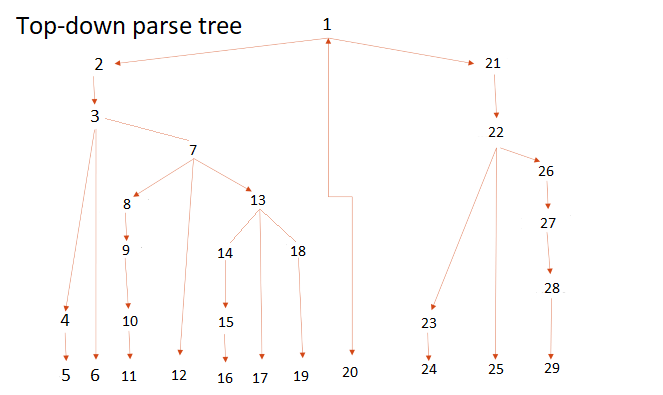

In [4]:
base64_data ="iVBORw0KGgoAAAANSUhEUgAAApcAAAGLCAYAAACSkLnsAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsQAAA7EAZUrDhsAAAAhdEVYdENyZWF0aW9uIFRpbWUAMjAyMToxMToxMCAxODo0NzowONOpBJUAAGBBSURBVHhe7d0JfFxXeTf+586mffO+JLaTaBziGMIWAlIgkIQEyRQMBBdCIVDKiBao1NL0LcWUlvr9tyW0lfr2/ReJNaytS8EsltghECkJISGL4ySeceIk3h3L2pfZ7nueM2ekkTSSZkaznHvv75vPxHPujKRZ7/3dsxqmQAAAAAAAeeBS/wIAAAAArBjCJQAAAADkDcIlAAAAAOQNwiUAAAAA5A3CJQAAAADkDcIlAAAAAOQNwiUAAAAA5A3CJQAAAADkDcIlAAAAAOQNwiUAAAAA5A3CJQAAAADkDcIlAAAAAOQNwiUAAAAA5A3CJQAAAADkDcIlAAAAAOQNwmXG+qjNMMgwmqkrpDYBAAAAwBwrDpddzRy4srm0iZgGAAAAAHaEmkuAJYS6mhMnRW04JXKO0MxJM952AIDsrThctvebZJpzL8HOpsSNgd4Ft5lmN7UkbgUA0EtfmwiVfuoYUGUAAMgaai4BAFioi5pbe6ipM0hmb0BtBACAbGkQLkPU19VGzXP6bjZTc1sX9aUdOJMcWKP6boZEuVk1XfJFXG9L/4OZEb+vqy3l94nHktnvy+J5yNoRvj19/9OZptjmLvFbF+prU79/ps0u3Wui7iN/T1uWg5BW8BqH0r0OhiiL35X2R+b+rZB4bZqTPzfn+YvfK96Xmdvk7aLcle4VZOpxzLt/pp+N5HvgT1Zh9bTO/p45g7oyffwsl8e0sucBWWhsp37TpP72RrUBAAByYhZAsLPJ5F9NgV61ZTG9ZqBJ3I/vy5emJrNJXGbK4hLoDar7JomfkbcFzM7egNmUvC//bPK6uDR1zv+5DAQ75/6O1McSSP6tJnPhr872eSSfA29Xm1L0BpI/FxD3nC9odqq/NfuzKa9J8rUXl4WPQd19WTm+xvNev4WvwyKvnbxt7mNPXJLPf/b14t8ZEO8FX5r4dWjqFK/IfOL+M+9H8v4pjz3tz8wV5Oc9//mq59PUJB7XzC/I5PGzXB7Typ8H5Ei8//waZ/6dAQCApBKGy9mQRHMO1iwo9u3JA/X8QJISNOTPds752Zm/nTbILCX18aQetMVjmRMa5v/e3J5HMkAuDMFzn9+Cl3AmwM0LLik/s+DxJ8NqxmEkx9eYHxuHv7kvgpDyGi14Qov/rWAwcSXzkxU292/NfSSzt2V68rH8317+8ef2mPL7PCBLCJcAADkrXbhUO+/FQ+Dcg+uslIN52rCU44F35vGkhrZZiwaqHJ/HzO+b/xzU70vW+C14Dsm/t9hrIrYveBgzgXSxxzhfAV7j5ONe8PtSw1n6137xIJ7GMu/j4o8jvezC5TJ/M5vHlOfnAVlSr++ibzsAACyqZH0u+w70JK4E9lL6Lk6NtGuPiETs0JF5fddYE3Xe2S7uNd/szw3sP5jm59ILHTmUuBLYnXY0e2P7XhIhYoFcn0fjrj3iGQgD++lgyoNMPI4m2nNn4u/Nfw7Jv9e0wy//nUu8Jre3LHxNGrfTTnU1O3l8jf071PM9TEG5YT7xt4LpZxLw70j+rTsW6bc5a7n3cfnHkavFH38uj6l0zwMAAGBlShQuQ5Q8dqYPSQmN21UkyvIAOvNzM/qoiwd/pLkkx4MEDycGbiz1eBZawfNo3EWJfDZAh2c2hujgfn4cO2l7o59kppoTPvsokS1F+NyVNskWzcLXeK5QqE8ORGlrU5c79otnmpuZYD/QQ61+Y4nBXrPvIx06MPu3Uy/icag70JGMUvHK5fKYdHweAAAAmdB7KqJk7UyuUsLc4YEBGkhzOaxuL6i0z2O29q/nQHLEc1A8TvGPrK1K3p4SPkNHRJQQmvZQibPlrHnBPzla2u9vpdaOHurpSV5yjZashbrNIHUGEq/XQE+HDJk8Cn5uyJwN+xxEZ/926kW87/IOHODllQLL5THp+DwAAAAyo3e4DB7OubZLatpBifpEDiepE7nPXrrTtjnm2SLPY6ZpvOeAnMaG+g4QV0wma0GTtYPJ8Bk6mKj9a9qzK01TdYnMvMaCCJb+1p7EY+zspWDqax3sXNmJgnjG7d394ncFqbczkPhdsiZTTZckNVKyQrWJ5ypM/fsLLsWazD+Xx6Tj8wAAAMhMicLl7MFzYLZNeIGZfmepASYDM/0gd24Xfyk7Sz2ehVb4PGb6QiaaNhP3S2nybtmdaA5W4TPRVFr6JnGW7jWe6Q8qAlF/e5q+n3nRSC3t3dRv9qo+sD00U/GbIrv3sThyeUw6Pg/b4knUk3OJipMk1tOanFs0/ZyzAACwUMlqLlt2q+ExyVq7BZL9D0VYSVtTN0Add/Sl2eEn+yVylss8ki73eEJd+2St4nwrex4tlPjxAdp/MLW/JW9jyds5fKrnVdQm8Wxe45Sm3KJIvjbi1UnpdLj8+5GjtIPKMpPLYyrY84DFqUnU09YQ96cb2AYAAOmUrlk8WSsnIltr8/wBGrwaS3J93wDtXWzFjJ5W8i9YxaVVhcAlfi6d1MfTlhqo+Hc2z67UMt8Kn0cyRAwcviOlv+WsxEhpET7vSDSZ51IbuyIZv8Zza3Hnvgxd1OzvkM3l2QvJwVi8Is3837lPBdydqZ0OW26nzkRfgzTvBxOPn1e8WXRln7lyHVQ2Ry6PKc/PAwAAoGjEWXneZTTPJUu7oktKOe28jMl5BXnFkuTck7PzQiYvOc1PNzO34MLf2RToVHM7pnlMOT2PpNR5EtPM5Tjvd6d/XrOvSfq/s9zt8+X4Gqc+VnFfuaJM8mdmfnb+vI3LPbaUeULFhR/DnNc23QuS9v1IWdmGLxl/QOa9P/J5pD7WDF/bXB5TXp8HAABAcZQ2XLJgYhWbOQdMcaBuEj+b/lg992Ae7O2cs/Ti3KX5ciAO6Km/j1fd6ZS/MBlyFgkRWT+PWbPLPab73b0p4WqRCbWXDTgZBqAZK3iNg+JnZQBL3j/5GiR/Z7bhUkj32oq/sXAloFTiZzrVEpEzPyd+x8z7mQX5nFJ+T1NnynPI4PHPyOUx5fF5AAAAFIHB/xMHLAvpozaDm2V50ur+RSYuh5XBawwAAAC50XsqIgAAAACwFIRLAAAAAMgbhEsAgFRmnOLTkxQbGaTo0PMUnxoX2yzWewgAoIQQLgHAUcxYTITHKYqNj1D45NM0/sgADf/qu3ThR9+gwR98mQZ7v0Yj/b008fgDdLrnkzT2wC/p/Pe+QIN9X6WRe/po6unHxc+OkhmNqN8IAACpLDigBwBgCbxLE5fY2BCFzzxHkXMnKT4xRmY8ShSPkeHxkau6jtyVNeSuXUWehrXkrqknw+VWvyCBw+bpz3+Ktn/hHnG/BrnNDE+L3/ksRc4cp9jECMVGh8Xv85Cnfg2VbdlOvvVbxF7VSFwAABwK4RIALIebraPPn6LI8ydlDSTXRprRsLiFl2t0EblcMjD61l9M3jUbyfCVJ34wQ/GpCQp+4Fr5+9fc8ie04f1/o25JLz45TlPPPEHhk8dUsDTJcIvQWbuafJsvJe/aTYk7AgA4AMIlAGjFjEUpNnSeIhfOyJpBMzJN8fCk+Dciax45SLrKK8i3YSv5Nm0jd1Vd4gfzWFt44YdfpxNdH5XXuYbT/4V7ZO1kVrj2VATfydAjFD5+lFwVlWR4y8RjryJP3WryrttMnoZ16s4AAPaBcAkAxaMCV2x0SF7ik2OylpBr/mSIjIZlzaN3/RYqu+iyRKBzucgQF/E/9UsKi/tjBj/QJJvTk9a89YO04QN/q0orIJ6/KQIyDxaaPPKwbGJ3VVSRu6JaNtV7RdiUzfS1q9QPAABYD8IlAOQNBzMZGMUlNjYsg2Rc/CsDZHiKzGiUvKs3kG/DFllzx83V3HzMF136KU4++Ts6963/K6+HTz5Fvk2Xkks8zs1/9q9keLxye75x4OT+nNEL52jqqUMi2J4gV1WtrJXlgO0Rr5mnpoFcldXqJwAA9IVwCQAZ4eZqDkAcEuPjoxSVU/WcE9dHEtsjYXJX14rwuFH2c+Rw5CqrIKNMBMh5g2Ws4vyBHlq9O6BKxccj0uMToxR5/hRNHz9K0fOnZcDkwMn9OD3itXZXVGXdpxQAoJAQLgEg0VwbixHFoxSbmpA1aDxghgMkN1ebIjjyKGtP/WrZZMuDZeRo6+p6EWzK1C+xn1KHy8VwDTEH+8jZE3LQUXx8WLwPFbJJvWzTJeThQUzi/TLc1gz1AGBtCJcADsI1YdELZ2V/wsj504ngGIuKG4hc5ZWyptFVVSMHnPBgE3dVrTbN1aWga7hcDNdyhk89Q+GzzyX6sYr3W45aX7Weyrb4Za0yAEChIVwC2EU8TjERLrjpNDJ4VvZzlNPzcHO2+ppz0PCuXk/etReRR/wr+zrCoqwWLhcTHR6k6acfE6HzhKzNNLw+VRO9hnxc05ntSHgAgCUgXAJYgfiaylVluJ/j8POyn2N8alLO98gBkgeE8H14XkXvhi1yfkeerkd8xR1d87hSdgmXaZlxeRIiBxA9f0qGTe6/yTXYnlXr5AkId38AAMgWwiWABpIDN6I8PQ9P1cPhcXxUhMeJxEhicTs3WfMKMHJux+o6Ipc7MVAG4bFgbB0u0xGBk0f082j1qWOPU/T8GTkgy13TIPvXcq039+t0VWDUOgAsDuESoNDEAXtmip6JMYqOXKDY8HnZhC37PCb7xfEUPRu3yf6OPEhGNl1adJS1XTguXC6C++VyN4vImedo+tkjFB16fmbUuqdBBM5V62QtJ0/ZBACAcAmwQhwOE6vITMvQyANl+F8uJ5ck5JpGOXVM/Vp5UHaLC6/WAnpDuFwaT0vFk+FHTj9D4dPPyhMmnhCeaze96y+Wg8JcZZXE668DgHMgXAIsRXw9ZH9GceEax8R61qcSfR1FoORBNDzHoLtuFXmq68ld25CYqqeqRny7irOiDBQOwmVu5MAy/q6cOyFnJ+ATLe7WwaPVfZsvkaFTp4nzASC/EC4BBG6u5vkCOThyf0e5hnUkLAMiN1G7vGUyQPLqMlz7aOe5HWEWwmV+RYfPU/jEUYqcP5P4fonvGX+XvGs2idB5qewSAgDWh3AJtsdN09HBc3LS6djY0MxqMsTN2WZcHOBM2VSdWJLwIsfP7QizEC6Lg0/spp5+XNZycncRF/c39pXLGk7fxq2JAWwAYBkIl2BtPLejCIzc70teeNAMz+8om61FeIyFyXB7ySsOUDw9j6x1TDbHIUDCMhAuS0R2R4nLAUQ8VRJ3SeGptXiUOvdX5knhubbTVVGlfgAAdIJwCRozKT45IUdZy6l5RGiM8UhrcZ3DY1z2eTTlQBkePMBN1tyvi3iSaEwODnmAcKkXub59NELhU8do6unDsjuLrOGsXy3neJWj1utWY9Q6QIkhXELJyLkdw1NkcmjkuR15wAyPshYHDLld3O7hgTKrN8oAyYNkEk1mZUQuDJaBwkO4tAbu6sKtFnLpyxNH5dKXBg8gWiP2HdxPum4Nuaqq5UTxAFB4CJclFaKuZj91DKgiC/SS2d2iChamJmOWAVLs9KNDPEXPSYqNDstR1nww4J2/XAmEpyupqpXNXa5KESA9XvVLAEoL4dLa5MIEPIjozHNy5DoPIuJaTW7p8G3YKufmlHPK6jafbKiLmv0dNHNoWOS40NdmUGtPgHrNblrqqMGH+VgsRh5MCQVFgnBZQnLHQCk7jb42Mlp7rBEw+WMjLtw0HRPBMXzmWdkZn3feHCi5ZlH2j6oWobGqTu7E5RyP6CMFFoJwaU88CTwPIuIViKIjg4lR69w3e8PFVL7tCnGiWyP2YdwnO4d+2bxvXFF/7j5qMw7Q7mRgVEGTOoPU394o75G4TyuJo4WwfLgEKDaES81keia6HK4ZHPrZf1NDyx+oLTkQH43Y6AUKnz1B0cEz4ncmmqq5o70hwiPXMPIqMtzHybfuIhke0VwNdoJw6SyRs8dp+rkgxcaGyYxx4Ez03+ZZJMou9i97chyfGqdT///Haf37/lqOdM+X+RURsnyok4J7D5O/lRAuQTsIl5oJdTWTv2PninYWE48/QCf/7S9kp/cd33lq0bNoHiATHTwrp+jhfo5mLCKXKSTuNC8u/HM8Ibhv0yXkW7tZBkmMsAYnQbgEPsmePvFUYgCR2GfyakM8cFA2r4v9onfDlsRAQiEiTsSffN/Vch32iz/WTdUvfrXcvlILWrmSZGsXwiXoB+FSMyupueT+Ref+69/o+W9/NtE0LVz6me+Kd9mVWNd6ckJsD8s5Hrlmk/s48sTFPI+c7OvIK8qg5hFgBsIlpBWPy5W7uJZz6uihxApEFZUUPnmMzn7tjsR9xP507Z6P0Lp3fTRxYp4r1Sy+s9ekBb2lEC5BUwiXOknbtyYz3Ifomb95F00GH1ZbErZ8/PNU/bLXJpqw3V6ER4AsIFxCNs7t/z905kv/W5U4X7qp9to30kW3/3uOAxXVoM+di/TDR7gETSFpaEPsRG7j0YEB2ptlsGSe+jW0dd83adOffoYqLn/JzPKEXEvJA2t4Ch8ESwCAwpl84kE572b5thfQmls+RJf9+0/ooo925TwDRl+bCJbUSUHdB3gCzIOaS00kmsObqDPYTzlky7nEW8od04d++W3ZJ6j++lvUDQCQDdRcQjZG7v4BVfivkvvdlZ7MZ9RFCjWXoClUZWmAB/EkZiDKQ7BkhiHncVv7++0IlgAARcJN4LzvLUqwBNAYwmWJJUaHD1BTZ3BhZ20AAHCWUBftkxNY9lCrYZAxc2mmrpC8hwyfchvXSszcb/Z2gFJDs3gpqUnTOVhmO4AHAAoPzeIAANlDzWXJhKgrcXpKAx3+lLNTdWnrk7cBAAAAWAnCZck0Unu/SVxxnPaCNnIAAACwIIRLAAAAAMgbhEsAAAAAyBuESwAAAADIG4RLAAAAC5kMPaKuAegJ4RIAAMBCJg7/Vl0D0BPCZQmMP3y3ugYAAJAdw+1W1wD0hHBZAtHh8+oaAABAdgwXwiXoDeGyFAzxsptYGAkAAHKAmkvQHMJlCRgcLgEAAHJiqH8B9ISUUwou7BgAACA3htenrgHoCeGyFGTNJZrFAQAgey4RLs1YTJUA9INwWQKGgZpLAADIjeErIzMaUSUA/SBclgKP9EPFJQAA5MBVVkFmZFqVAPSDcFkKhiGyJdIlAABkz/CWkRmLqhKAfhAuS0D2l5meUiUAAIDMJWouw6oEoB+EyxIwfOUUnxpXJQAAgMwZ5ZUIl6A1hMsScIkdQ2x8VJUAAAAylxgtjgE9oC+EyxLgOcrM6UlVAgAAyJzh8VJ8YkyVAPSDcFkC3Bk7HkafSwAAyIHbQ/GpCVUA0A/CZQm4yisojmZxAADIgcHhEhUUoDGEyxJwYUAPAADkiJvFTdRcgsYQLktAjhafRLgEAIDsGW43xdFvHzSGcFkCsjN2FNNIAABA9gy3OIZMIVyCvhAuS8Qw8NIDAEAOXC4yo1j+EfSFhFMqhqGuAAAAZMdwedQ1AP0gXJYKai4BACBXHoRL0BcSTqmg5hIAAHJkuNzqGoB+EC6LyTTJjEbIDE8TiX95xHhsYlRsj6s7AAAAZMCFwzfoC5/OIooMnqHQh2+kI4Fr6fQXPkVH3nc1hf74dSJgYhkvAADIHGouQWcIl0XkXbWeKvxXUeTMcxQbH6Ho8CDVXH0Duatq1T0AAACWx9MRcWsYgI4QLovJMGjD+z5OrrLyRNFXTmv3fEReBwAAyJQhjiNmBNMRgZ4QLovMs2o9rbnlw/J6zcuvJ+/azfI6AABAplzllRSfxvrioCeEyxJY89YPypApay0xahwAALKUCJdYpQf0hHBZAq7Katr6d1+liu1XqS0AAACZc5VVkBlGzSXoCeGyRCoaX0SYSB0AAHLBlRRoFgddId0AAABYDDeLo+YSdIVwCQAAYDGGt4ziGC0OmkK4BAAAsBjD5Uqs9gagIYRLAAAAqzHc6HMJ2kK4LKoQdTUbZBiplzbqU7cCAABkgmsuyYypEoBeEC6LqK/NT/v3BMk0TXXppQD1UCsCJgAAZAPN4qAxhMsiauk2qb+9UZVYC93e2ST+PURHQoktAAAAi4mNj9DEEw/S+EO/pvHDv6ELP/oGnf/u5xE0QSsIlwAAABYRn5qgYx+7hY594lYa/P6X6ETnn9PIr79Phten7gFQegiXpdTXRv6OAWrqvJPmVGgCAACk4V29gda953+pUsKqN76XsJQw6AThsqjmDehp7RHBMjivqRwAAGBxq1reTb6N2+R134atVPvqN8nrALpAuCyqRmrvTw7mSQzo2dnhF0GzmbrQ5xIAADLAq/NsDPydrK1c1foeMtxudQuAHhAuS6qFuuWI8QHquAPjxQEAIDPVV99INdfcRPU3vUNtAdAHwmXJ+WmHHDB+hBarvBz66X55AQAAYFxbueVjPeSpW622AOgD4bLkgnR4QPyzczst1vOy/sY98pIMmQibAABg+MrUNQC9GCZ3/oMi6KM2o5Wo16TuFrVJDvDxU8dAE3UG+7MeMT4/YHIABYD8OX+gh1bvDqgSAABkAuGymPra5AjxOZo6KdjfvmitZTYQNgHyC+ESACB7CJc2lho2ETQBsodwCQCQPYRLh0CtJkD2EC4BALKHcOlQCJsAy0O4BADIHsIlSAibAAshXAIAZA/hEtJC2ARAuAQAyAXmuYS0OEymXjhsJi8AAFAkoS5qNgwykpe2eau5LXc7QAkgXJaQGYuSGY2okt4WC5oImwAAhdJHbf7DtNc0iRsZzWAnNfW0UnNXcj235W4HKA00i5dI+MxzRCpY+jZfKv+1qvkBkwMogB2gWRx009dmUCv1kjm7Gsccy90OUAyouSyRiUfvIbuk+tRaTdRsAgAAOBtqLktBvOQXfvxNqtz5SjJE0eo1l8tJDZio1QQrQc0laIX7V/o7aOecZYRTLHc7QJEgXJZA9MI5mjp6iLwbtzoiXKaaX5OJsAk6Q7gEfYSoq9lPHTsXa/Je7naA4kG4LIHJJ39H7oa1ZEbCjguX8yFsgs4QLkEXsi/loU4K9rdTo9qWarnbAYoJ4bIERu/7MdVcfSNNnzrm+HA5H8Im6AThEnQgg2NPgHrNbkpXJ7nc7QDFhnBZAiN3/4Bqm3fR9MmnES6XgbAJpYRwCaWGYAlWhNHiJcDN4WRwrITlcJhMvXDYTF4AAKyG63OmpqYoGo3KciQSoenp6cQ8leISi8UoHA7L+5ihTtrXw/fqodbUidKNZpJTWYa6lr4doERQc1kCQz/7FtXfcAtNn3gKNZcrgFpNKDTUXAIAZA/hssjM8DSN3PNDqrvuzQiXeYawCfmGcAkAkD2EyyKbfvaIbBYvv2wnwmWBIWzCSiFcAgBkD30uiyx8+hnybdqmSlBIyX6ayQv6agIAABQewmWRxUaHyFVRrUpQTMmQCQAAAIWDcFlkZiymrgEAAADYD8JlEZnxGBlenyoBAAAA2A/CZTFFI+SurFEFAAAAAPtBuCyi6PAgeerXqBKUTKiLmudMODx7acbMwwAAACuCcFlE4RNPkXfdZlWCkmlsp361GsbMJdhJTeK/Pbsa1Z0AAAAgFwiXRRQ5f5rcdatVCXTSd0cHDQT2UjuyJQBYBB9TUsl5lOMYNAqlh3BZRGZkmgyXW5VAG2p93sDuFrUBAEBv8akJOveNf1alBFdVLQ3/4ts0/Mvv0MTjvyUzlli/HKDYEC6LJR5XV0A3oYP7aaCpk25HtgQAixh/ZIC867eoUoJ39Qaqv+HtVHfdbnn9wo++ScO//j5NPfUYajShqBAuiyQ+PYHBPFrqozs6Biiwt53QIg4AVsBBkVd789QtckwxDPKuu4hWtb6baptayVVeSRf6vkYjd/+Apo+HUKMJBYdwWSTxyXHyrNmoSqCLUNc+6qEAoUUcAKwifOJpqtzxCnHNTGxYguF2k2/TJbRq121U88qbZSsaB02u0YycPS7KqNGE/EO4LJLI4FlxlonBPHpJ1Fo2dd5OyJYAYBWTTzxA5ZdcoUqZMzxeKtuynVa98b1U+8qbKHrhHA2qGs3o0PNcJaruCbAyCJdFEjn7HHka1qoSaKHvAPVg+iEAsJDY2LBs9jbcHrUlN4a3jCouf4ms0ax++fU0fewJuvDj/6SR/oMUnxhT9wLIDcJlkcTGR8RZI5Z+1EeIuuQQcUw/BADWMRl6JNG8nUfcJ7PqxddSw823yqA59uAvaehn36LR3/wUQRNygnBZJPGxEXUN9NBI7f0mmd1oEAcAizBNWcPorq6bKeebq6yCaq99I9XfcAtVvfBVNHLvD2nop/tp/JF+ETRH1b0AloZwWQTx6Uly1zaoEgAAQPamnnmSKne+UpUKz1VRRfXX3yKnNyq/5EoauScRNCef/J2cZxNgMQiXRRAfH5Gj9QAAAHI19fRjVH7pDlUqIsMgd029DJl88a6/iIbvOkAXfvxNOYcmV6DMN/bAL8TjPaxK4DQIl0XAo/B86y9WJdDNYO9XafzRezElBwBoi6ezMyPh0q/yJoKmp36t7J/Z8PrfJ1dljQyaQz/5T5p+LigfIzfXP/+t/6Cn/+oWmjr2hPpBcBKEyyKIDp2TX0DQC/cfGrn7ILnKysm7ah0N/vDrcoLhTOaOAwAoponH7qPa5l2qpBSgz2VWDBf5NmyhhpveSXU3vF2eoA/9/Ft0/ntfoIknH6DYyCAd++s9FD75tPoBcAqEyyKIDQ/KTtKgiXicRu79EY09eBfVXHOj3EH7Nl9Kq1reLWuZB/u+TrHRIXVnAIDSC589Tu6qWlXSD9eolm19gazR5DmduaaVRS+cpac/dguFzzwny+AMCJdFIPujGIYqQSlFxA5usPcrVH7JDjkikud6M5MTB4v3qGrnK2nVG26VwXP41z9I25cIAKCYwieeovKtl6uS5sTJ+vkffFkVRMioqJaVK+e+/hksO+kgCJeFFo+TGY2oApQKj2wc/tX3aPrEUTlp8Jw+sLF5fS0NF9Vd92aqedlrafiX36HxRwbEDhMrVwBAafA+qPLKa1RJb2Zkmhpu/H3atu8/6fKv/o6u2P84+bt/TZv/vGvFE7+DdSBcFlh0+Dz5NmxVJSg+k6aefpyGfvbfVHP1DVT90tfOqUWOT47JUZDpuCqrZROPb+NWev7A59AxHQCKjk+MeV9kFYavnBrecCtVi5Nz75qNcslJtNw5D8JlgXF/k7KL/aoExcTB/kLf12QzDddW8pxt88XGRxcNl0netZtpze4AmeEpOfVG5PmT6hYAgMLiycurrmpWJQBrQLgsMB4Y4q5bpUpQDGYsRmO/+xWNP3Q31d+4Z8l54WLjw+SuzeD9EWfeFdtfLCcU5nndhn7xbfTHBICC4n1Z5NxJOfUPgJUgXBZYbGKEDC/WFC+WyNnjNPj9L1DZpktlv0kesLOUONdcVi9dc5mKm3hqXvF6qr3mJhr+5QEae+CXsl8tAEC+Rc4+J09qF2NaYNq0uNg/RiIRMkOd1CRO0o3kpa1P3SNFqIuaU+/T3EU8ORxYD8JlgXF4QSfmwuNBU6P3/oimjj1Oq9/8AbmCRCZ4rsvlmsXTSfTHfCeVXXQZXfjJf9LU0UPqFgCA/Bj73a+p/NIrVSkNC0zJ63K5yOv9KX3Q/zh9whRxmC9BETR7Wqm5KyU6crD0d9DOXnUfvvS3U6O6GawF4bLA4pFpdQ0KZTL4iFxlh0dTcq2iOOVVtyxPdpb3latS9rzrL5aDfuLhKRo8eKdswgIAWCnZH7yq1iaVEy3UbXaL/yuN7bQ3QDRwOKg2EPXd0UEDgV7qnrkTWBnCZQFxcHGXLxxEAvnBA3aGfv4/4lqcVr/pD3OqgRTnxuraylRe8XJa1fpuEXQfppH+g7LGGgAgV5NPPEDVL32NKtldHx3oIQrsRrK0C4TLAoo8f4rKrDLxrZXE4zT+0K9p9N4fU91r3kQV/sX7JC2L+0tmUdO5JMNFtU0tVP2y19Hwr78nJ2LHHKcAkDWxX+J1ut01DWqDzYS6aF9qmAwdoUPURHSgeba/pbjMaTYHS0G4LCCesqbsYvQYyafI2RNyDXDvxq2yz6OcQ20lCjAYx1VeSQ1veJccpT74/S8m+mOaWK8cADIzfTxElS98pSotxYr7lRB13ZauCXyADu24c7a/ZW+ABjpuI+RLa0K4LCC5tioG8+QF1wAO33WApo4dlhP0+tZvUbesjBmftzpPHvH0Iat3B2TNKC85yTXZAADL4e415duuUCV76WvzUwd1UjBN58qd21MqY1p2k4iXlNItEywE4bKAePUXXsx/UVybla8mWRubOvooDf3if6jqxa+WA3aWfE2zVuDXX7y/PNpzVet7aPrY43ISdl4eDQAgHT5u8BrcdpxlpK/NoNaeAPXOHwXeuJ12in8OHUE1pV0gXBbSck2hvF41ajYXFZ8al2EsNjFODa9/B3nqVqtb8kS8P4arSOFehMzql19Pdde9hYZ++R0avf9n8gACAJBq/NB9VNu8S5WWY53KiZlgmTpqfEYLcSPPwP6DM/Nahrr2UQ8FCGN8rAnhslC4L99y4RLSE6/b+CMDNDLQJ1fEqcqo71EuuOa4uF8BV1m5DMoVl+2kCz/6Bk0++Tt1CwAAUfT8KTkF0bLkybFFDuFqAA+JuNgqTrRnB+00z/SpbOkOUid1kF/d5u/YuUgQBStAuCwQHszj3ZCffoFOwq8b11Z6Vq2XwXLFA3aWwtm/yOEyiZ8fN5W7qmpo8PtfovDpZ9UtAOBU0888SWVbbDjDSGM79YswPDNYZ+bST+0z7eON1N6fehuCpZUhXBZI+MxzVHYRRopnygxPyel7pp46LGv2eOWbQhO7r5K3KvFnZNWu2yh86phcrzw2NqRuAQCn4QUheM5cAKtDuCyQ2Mhg/vsI2pE4Q51+LkQXfvJfVC0H7NwoPpXF+VjyaH53ZY0qlZB4vtUveQ3VNrXS6G9+RiP3/JDMSFjdCABOYEbFd55Pdo1Mz3jFybFVmsXBcfDJLBAZDjLeSTgTD9jhJRN5fe9Vu95T9AmD4xNj5KqoVqXS4/6Y9de/TdZcDPZ9lSaeeFB8kPI/DycA6IdPLHnQX8bQpR80hnBZIGascPMnWp5p0sRjv5E1dPU37qGKy18iNhY/iMfGhzPrOF9knvo1tPpN7yeXr0yEzK/JLhYAYGPxOEWHzjm2tYsrY7Camb0gXBaCGS/sQBQLi54/TYM/+DK5axuo/nVvk6vZlEpsdIhc1XWqpJ/k/Jjh40flyPLY2LC6BQDshPtc8/fdqXhAIx8bwD4QLguA52XkJk6YxWemo/f9hCYe/y2teuNtVHaxX91SOrHRC5ZYu7f6Za+l+hveTiP9B2n0Nz9Bf0wAmxl7pJ8qt3MLTpZKNNtFvnFlTHxqQpXADhAuC4DPQn0YKT5j+tkjcvlD7ktYe+0btdkhxqenZNOzFfDOt+HmW6lyxyto8IdfkyG9EOuiA0BxxcZHyF1VJ47G2e0XebYLng/SDnj/FpsaVyWwA4TLAoicfoZ86y9WJefiZtzhu75L0ZELsg8hN4XrxIp9fNzVdbT69/6QvKs30vnvfYHCJ55StwCAFU0+/gBVXdWsSs7E4dKcnlQlsAOEywKITY6T4fWpkgOZ8cSAnf6DVHPN66lq5zVi74GR8/nkXbeZVr/5/RS5cA79MQGsKh6n6eMhx09bZ3g8FJ9CuLQThMtCcPCa0dGh52nwh18nd90q2YxbygE7y4pbfES/4ZLBnacvGnvwLhr6+bfm1MbyPJ4c8AFAT9PHj1LVi5pUKUtm8ZevLRTD7SFzekqVwA4QLvOMD+5aB6pCETu60Xt/TOMP300Nr3+nJVYnMm3SZ9HwllHda95ENVffSEM/+S+5LjvjuTJPdP45Rc6dlGUA0MvkkQepbOsKlnu0SYOQHNAzjT6XdoJwmWdmeJrc9WtUyRl4PVxumq244mVUd91u2cShPRGGDZutbuGuqaeGlj8gz+oN9Px3eujs1z4jm8uPf+YjmHcVQDM8kIdrHrnWzvE4XE5itLidIFzmWWTwDHkb1qmSvcUnx2j4V9+Tz5mbwK3Ub8iMx2zbL7Zs86UUPh6S7w8bf3SALvR+RV4HAD1MPvkg1b6qRZWczXC5xQmwc7uT2RHCZZ7xNETetZtUyabicRFY7hHB8vtU88qb5LrYlhuwI3Zk3JxsR1NPPSanK5phmnT6S/swshxAF+I7OX38KXJVrnD5WZv0uZSwTrqt4N3MMx7QotN61SsidoATj92nCgmx4UE5YIdrKRtufie5fNacLJ77W7rKKlTJXnybL6XLv/QbuuzffkSX/OP/0JZPfJE2Bj6FZSQBNDH17JNUKZe9XQHu2mOjWTi49hLsA+Eyz8xo2Hq1eIuYePx+euZv3yNHNHKTBY88Hj90rwyVZVu2q3tZE/dBdJXbM1xyaPauu4gq/FfJ+fNqm1qp4Q3vouqXXqfuAQClNHX0EFVsv0qVQELNpa3g3cwjDmB2OfviJQZPffYTMwNC5IAdcaZd29xqiw7oZmRahDAHjuoHgJKKT08mBtjZqUk7D+w2wNLp8G7mEQ+g8K7drErWduGn+2ky9Ii8PnnkIdn87V1jn76k8YlRZ04ZBQAlNf67X1HtNTep0gqYpr1q+ww0i9sJwmUexcZHbTGYJzp4hs584e8TOy9mxunUZ/dS9MLZRNkGeIJxw6Z9LpfT12aQYbRRnyrPCHVRs8G3qUtzF4XUTQCQB2Kfyv3ydVsKVweoubQXwxTUdVihicP3k2/TJeTJcJ7L6eeCZPjKtVuHfPDgnTQmzq49DWvFZR1512wUj3ELlV1yBXlqV6l7Wdv4I/1UtlU8nzp7PJ/M9FGb0Uo98nqAes1ump0IJURdzbcR3dlP7XL++8R9D3UGqT+xwZHOfvXTVHH5S1Upz8Sut/ySHXIpT3CG8MmnZbis3HG12pI77ro0ck8f1b3mzWqLtQ397FtUf8MtqgRWh3CZRzznY+21uzLud6lruHSC0Xt/RFUvuY5cZdYc7Z4LrrFsPdRJwb2Hyd9K88LlQvL+1Etmt3Pn4pNz75mFWckpPj1F4w/eRbWv/j21Bexu8PtfolVvfK848q580KfdwuXwL75Nda97qyqB1aEeOo94xQVMp2ANsclxRwVL1tJtktnfThnVQ4a6aF8PUWC3syd55sFrhsdXoItX/RVwgvjEWGL1trzNJsJTEdnneMOLWmAlMftAuMwjPpPUHzd3pvSrS9f3LkdcCX7kyBFV0hxWg1gotc+lv4N29prk4EpLgLwaf+w+qnrhq1QpT+wzzWVixTTsl20D4TJPePRxpn0tS4f71bVST6BXBkG+9AZ6qDVPAzc4lGzfbo35L7HUWBqN7dSvPhem2UvUKkJmW75OPQCci5ebDZ88ZoFjROlwbT72y/aBcJknPB8kr4yityAdHpjb1NmyO0A0cFjc4ixofllOC3X3is9Gz4G81WwDOBUHy8orVz6Ix84MXxmZ0YgqgdUhXOZJ9MI58mk/6tNPO5pEXtiXrKkMUVeiY92SAztsKY4zZAAojolD98qZAfKKh+IaNlr+0eOVNbxgDwiXeRIdPm+BSbkbqb0/SJ3UQX7Zt85P+/cEnTca2MQECQtwf8s53SMcfOIBkEfcqsXHhvyvbCb2YzYIlxNPPEAj9/yQxh/up6Gf/hed/+7naeyBX6hbwaoQLvMkNjZEhrdMlTQWOkj7B8S/gU7qbCIa6PCT07rVcdOLq6JalZwjMXm6uLTyTJc91CpPMJqpixNlYzvt3Zk86UiceHTsdPY0RAD5wOGp+uobVAnmm3zyQXr2U++lM3f+A53+/KfoVPcnxD4aLUtWh3CZJ/HxUXVNY1w7pUYBm93t1N4v/u0NUE+rChgO4dRwKacimhmwk7wkJ01PczuCJcDKiO8RT5zurqpVG2C+hpvfNWfZ5LIt26nm6utVCawK4TIP5Ai3vDd5FEDwMA1QgOZMXdiyW2wZoMMOGtHDU0a5q2pUCQCgMKafPZKX1XjSEbmVyLD+IZy7DGz4w72qZNCat7SJjZgv2uoQLvOA19wuu8gCS+T5d1AT9dCBlGbwUNc+saWJdvjVBgcwo2GxQ6tSJQCAwpgMPUrll16pSvkm02XiqsXVXvtGqmh8EXlXb6C663arrWBlCJd5ED1/hsoveYEqaYznMZTN4Ml+dQb5O4g6g7NNo04Qj4hwiZrLBeLTk+L/GOwEkA/xqXHZqoVV25bHI8U3tH2KVr/5/RYYGAuZQLjMg9joBet8IVq65/arS+lz5xRxXvrRV6FKkHSh76t0/sDnVAkAVoJHP9ddu0uVCsRGK/RUXXkNrbnlT1QJrA7hMg9iE2NkuLFOsFXEpybI8PlUCdj5Az1UfulOqr/pnfI6AKyMnJ6usoAtJKZJhstGh3BDJGUb9CGFBLyTeWCGp8QrufKXMh6Pq2tQSObUOBneclUCDpOrdwcSzXexmLyOgAmQOx7IU7b5MlUCcB6EyzzgASL5wM3UxcADkJyM+xa6vKi5ZMlgKbndcpomhoAJkLuJx35TsFHiAFaAcLlCvPqCu2aVKq2MWxzci2H0vp+qa84Un5wgA+FybrBk3CRlztaeI2ACZC8+PUWuyupEMy+AQyFcrlDkzLNUtvVyVbIIl7N3emYsgh1/Gtx/S87ZmiIZMBEyATIz/tCvqOqqa1WpkHj5R4xEBz0hXK5QZPAs+TZuUyWLcHiwSjb9OtmCWkvmcotwGVOFWXw/1GICLI+/P5GzJ8hTv0ZtAR08//zz6hoUC8LlCvFgHquN2OP5LZ3MjC8MUE6SNlgK8nM8r+YyFQImwNJ4qceKHS9XJdDFmjUI+8WGcLlC8fC09WoCnT7dQ3TxAGV3iwVLZvCAniXCJUPABFjcxGP3UvklO1SpCNC7BzSFcLlSlqwFc/IeyXRszeVSwVJyeTLqMoCACbBQbHRIzmtZtBV5ijTP5cTEhLqWJ6EuajZmV4kz2uasRzz3tpRLc1dI3QmsAOFyBWQtjxWX9hJfVKeKT0+Tu6pOlZxj2WDJxMci0+mwEDAB5po88hBVv+Q6VbKPysp8rj7XR23+w7RXrg4nLsFOauppnQ2OvERx8rbU+4j/9uxy2FJyFodwuQLh089Q2UUWnCjXweHSjEyTq6palZwho2ApGG4PURaDnRAwARQRgqafO0Lumnq1AdJroW6zW/xfEWFyr9g1DRwOqg0L9d3RQQOBvY5bptjqEC5XIHL6OfJtukSVrMPweNKOCnYCnkA9X/OSWkGmwVISJx1myjyXmUDABCCaevZJqnphkyoVk80rCkJdtE/sXgK7Z+IoWATC5QrERgbJXVWrStbhKquU62s7kRkJk7vaeu9ZUXAXjxwGOyFggtNNBR+hsm0vUKUi4R4sVh+cuUx4DB3cTwNNnXQ7sqXlIFyuwHIja3XlqqgS4XJclZyFp45yVzuj6SqrWkuBm8VzXcoUAROcKjY+Imv9ZbcSyEKIum7jJu9e6k4bHvvojo4BCuxtJ7SIWw/CZa7icSKL7kxcZRWyediJ5LrivjJVsq9sgyUzDNeKRtIjYIITTRy+n2qbWlUJMtXX5qcO6qRg+mRJoa591EMBQou4NSFc5ogPwhzSrMgQ4Ypr8JyIw6Xh8aqSPeUSLCW5/GN2fS7nSwZMhExwisjZ47I1qPhMcUJozT6XfW0GtfYEqLd/sVrJRK1lU+fts4N/wFIQLnMUG71AnjprDgyRzeKTTm0Wn7ZsjXMmcg6WAk+iTrzu+grx30ctJjjB9LNHqPzSK1WpuEzuc+myXricCZapo8bn6ztAPZh+yNIQLnMUPvUMedduViVrSQzocWizOC/XadNwuZJgKXGzeB5nEUDABLvjuS0rX/AyVYJlqQE8JKJjK/dTnbk00+wc6SHqkqN8MP2QlSFc5ihy7gR5Vm9UJWvh5nxz2qGjxW0aLlccLAVeWSTfg9QQMMGu+ERVzrBg0abpTE1O5rEiIt0k6fLSnxIkG6m9X2xbpC8mWAPCZY54Kh/ZjGhBTh7Qw1MR2e1gkI9gKfH8pzmOFl8KAibY0dhvf07VL3utKpWCnIsocbWAKiqsObYASgvhMhd8psWjxa2KB25Y+fGvgFMnj8+MOFCJz3YhIGCCnfCAzujQefLUrVZbSsTq81yCbeGTmQNuDvFYfJkvezfkLCFuzblJF5O3WkuBa+LNHCZRzxQCJtgF97mv8L9IlWDFuLLDoRUedoVwmQMeae1ZvUGVwErMyMpHQ+sin8GS8TyXtIJ5LjOBgAl2MP7gXVRx2QtVCVYqfPoZOY4B7APhMgfRC2fJ07BOlSzKoVWX3HncDvIdLCXZXaLw3QYQMMHKeEUed/0a+X0pKbEvs+o8l/MZvnKKiOMq2AfCZQ4iZ54jzyqLh0sHkks/lmSy4/wqSLCcUZyDFQImWNXkEw9Q9VXNqlRiFpznMh1XWTnFhs+rEtgBwmUOoqND5BJnWlbDNa5DP91PgwfvpNH7fkLnvvmvdParnyYzMq3uYW88wt9da82J75MKGyyLCwETrIYHBE4/F7L8fkQ3hq+CoiODqgR2gHCZA1OEFCviKYjOfPn/o5P//r9o6JffoTNf+SeaePy3tl8OMYknjndbeCBWUYJlkZvZkgETIROsIHw8RFW61FraiMtXRvFJZ869bFcIl1niWr7SrCO7cq7KGlr/vo+rkiCCxNp3/pn41xkfg/jUmGVrHIpWY1mCVjZ+XqjFBCuYePJ3VLblclUqMe4fbZd9N5/U2qOFHxSEyyxxZ27vhq2qZD111+2m8m1XyOvll1xJVVe+Ql53AqvXXBaDUcI9PAIm6Cw2PkyG16vN4hk8V7Gc4cEmnNKC5hQIl1mKjQ6Tb+0mVbIe/gJv/ODfyzPFNbs/ID4B1lxlKBfx6SlylVeqknUUrdaSlbj2AAETdDXx2P1Ue83NqgT5Znh86hrYAcJllqLnT5Oruk6VrKnqqmtpVct7ZC2mk/DShlY70y9qsJRK3zaFgAk6ipw9Tq7KalWCfDM8HnUN7ADhMkuRC2fIXVmjSta16cP/QIavTJWcwYxGxCfeOh/54gdLfSBggk6mjj1BFdtfrEqa4BVtLLQ/W46rrJLMSFiVwOoQLrNkTk/JJmXLc8ggnlRyx2WRnXHJgqVGn22nBmvQz9TRR7Vb7tE0Rbi0w7FIcVfVyKWVwR4QLrMhvsw4s7Iurrm0SrN46YKVfQ5WAPkQn55MrFzlwBPyYpI1lwiXtoFvSxZ4MI93/UWqBFYjm8VtdKZfEEV6eS5cuKCuAeht7IFfUG1TqypBofBYBh50CfaAcJkFXkHAt3GbKllRH7WJcMXr0cpLcxeF1C2OwM1IsLQihe/6ekwJBRYg9hmxkQvkrqpVGzRimraqTeUlIM3pSVUCq0O4zEJ06Hnyrt6oSlbDwbKVDnUGxT7JFJcgdVIH+dv61O32x0u3gR745GYxfW188tMmPrHzzTs5SnsfgPyZPn6UyrZqMmn6fPGYyJb2OYQb3jI5lyjYA8JlFuJjQ9YdYd13gHooQHvbG9WGRmrfGyDqOZD1Afr+++9X1yyG+03BMkrZbSARHlvTDhIPUVdzK/UEetXJkUm9gR5qdVrtOxTV+CP3UMXlL1UlKCQZLscQLu0C4TILvDqPrVYR8O+gJjpER7I8Ol999dXqmrWYsai6VjqL18olJWvnmqmrBKlJ/OmS6WsT4bGpk4K96QYzBenwAFFgd4sqE7XwoKeBw+IWgPyLT4zJFb3sVDuoM5fPJ8c1gD3gW5OF+JSFF9aXQbKH9qUmluBhEsdrR+BR/tynp3SWqpWbFeraJwJWk3ivSqV06bKl2ySzv52Sdetz+WmHeFF69iVrKkPUtU+8mIHdNBs3AfJn/NF7qOqqZlXSDy//WNKzwTzjFXpiEyOqBFaHcJkhno7C5StlOFmhxnbq7w3QQIdf7I9Un7V9h0oYYoorNjFK7trVqlR8S9fKKaEuuq2DqHPvHrUBZjVSe7/qJyw/v37avydIZjeiJeQf988OnzpGnrrS7TOWJee5tNEhnIMyD1ICW0C4zFD0/Bkq2/YCVbKolu6Z/mrysncnDdBO2p6+qshW4pNjIlw2qFLxLV0rl9B3ByfLO6ndrzaUgs41IaGDtJ+r2gOd1CnOivhEyUHj0aCIwsdDVPXia1UJisXlddaqcXaGcJmhyPlTVHbRZapkD328vJ5DmhXj46N610KEumhfT+qAK5hDvD7N/g7a2StCenc7tfeLf3sD1NNamr6pYG8TTzxAZReX8izPodxYX9wuEC4zFJ8cJ8PKzeLz9bVRa08Tdd7ujGbFGNdcVus6t2KIumR7+O0aBH1Nay5l/+AApYzn4RE9YssAHcaIHsij2OgFMsrKydA96MRN2b3JTgy3W10Dq0O4zBA3qxouK3/w580R2HqIOoP95JSKMh756aqqUSXN9N1BHdRJd+rwZuh6sFID0g6kNIPLwU9i6w5UMEEeTQYfppqX36BK+pJLUtpsJLurrILMaOln9YCVQ7jMkFxT3KJnidy/kqiFulP7W5oLg2XifjYlnpuu757snjCQHKgiLv4OGhD/dfjFdQd1KkxM08QnPjykvoda5euhmr3VgLSeVnUfcREvk6NOkKAIxH5i+tkguavr1AYoJu4XjxHj9oBwmQkOYxZe3YUPxJnI9H5WJM/yNX1+crCPDPzqEuwknoyoMyiuF3s0dAlfowWvg7ykhMf5A9LSnCABrMTUscep6oWvVCUoNldVrWwlBOtDuMyAXPZxzQZVsjg+KEcjquAgcgL10gWnJWvlYFnhM8+pawCFM3X0EJVdskOV9MaLQtitj6K7ksPluCqBlSFcZoDnOyu3yA5nOTxf5/ihe1XJOWTNs861cqm4CbhEtXK61l5PPHafugZQGNwvm+eNtHbfemtzV9Uk3gewPITLDESHz5OnYa0qWZzYeZoiYDqOqXG3Bl5pQxc8KbMIvtrRNPSCfYw/OkA1r3y9KkEp8PLKXAEC1odwmYFEM7I9Dm68Tq4Tm8W5plBXI/doNGhH04+5YaeVSEBL0cGz5K7CQJ6ScnsQLm0Ce+wMWHmk+AIcLvn5OI3GA+HjkxqtWa/r5xw1l1BA08ePUtkWi81pJQcp2qsJn+cWNac02h9CzhAuM2GjAxv3J4qHp1XJQTSuudSJrCHUslkcuyoonPGHfk2VV16jStYgW2NsdtLF4TKOcGkL2GMvwwxPkctXoPVOxc6h6AMo+O/JkdNOg3CZGU0PVvJ7gvcQ8o+nvnHrvDSsk4jvuc5dmCBzCJfLkM0lFxVo2K4ZL81aqjZb1WE5ZjRMhsenSrAkl9i5axjiEjWqqgCQR2MP3U1VL3qVKkGpYbS+PSBcLiN86hnybtyqSjbhsHCp9dKP2tG05tJhn1koDp4rMnr+NHnq1qgtFmLDeS4ZDzoF68O7uAxuMnH5ylXJHpx2ZhgdGyZPTYMqwZK4+VnDGkLD66N4eEqVAPKD5zCueMFLVQm0UOyuYlAQCJfLsOW0PQ4bHBEX4ZLXrIXlJWoN9EuXrrIKdPSHvBt/uJ/KL71SlUAHfCLJNcpgbQiXS+APuKu8UpXsQzalcH9Ph4iNDZEbNZcZ4ppLDcNlRSXFJ0ZVCWDlYnzSWVOPPn6a4KU3xx+6m6aePULnv91NZ7/+zzTSf1DdClaDcLkErrXkhfTtxlVRpdfcigUWGx8ldzUmR86Ipk1SLm85JleGvJp4/LdU/dLXqpL1yNo9GwVjDpJPf+wWOveNf6HTX/x7ES4/Q56GdepWsBqEyyVEL5wj76r1qmQfXIvHS1o6Bk82DJlx6RkujXKuucSaw5AfptgnhE8+be2TTpvNnrDm7R8m38ZtqkRUvu0KqnzBy1QJrAbhcgmRM8+RZ81GVbIP3qE6qYnR1Gntbu1xuNSwWdxXRvFpDOiB/Jh+5ghVvfCVqgQ64Ba1jR/8e3ElEUvqX/+OmetgPXjnlhDhKSpqV6mSffD6udzfyDEQLjMmJ/XXsEbEVV6FPpeQN1NHH6WybVeoklXxF1XPloZc1bz8Bqp5xetF0KymhptEuATLQrhcgsl9vGw4LQJ3Yo+NXlAlB3DQ4KUVkzMJ6JcuDVlziT6XsHIxcZLCq8BYfSAP97m03TyXLhdt+uA+qr/+beS24XgHJ0G4XAT3ybFrc6qcMzASViX7w3JiWdB1nkuP157TgkHRTTx6D9Vdu0uVQDfe9RfTRhEwwdoQLhdhTk2Sd+0mVbIfx8xTa8ZtuYpFwej8wXDMhxYKKTJ4Rja7gr74ZBKsDeFyEbHxYfKusW+4dAozbopwiR1VpmSfSx2rLoXEYwPI3dTTh6n8kh2qBACFgnC5iOjgWfLUr1YlsCxZc+lRBViWCHD69iJAuISVmQw+QpWX22S5x1gME8CDthAuFxE+e5zctTYOl6ZDDtTccd+DcJkxTQf0SMiWsAI8lZVsbrVNDbj4nuI7AZpCuFxEfHLM3qHEKdmSV7FA/53M6XzgRbM4rMDY/T+jmqtvUCUAKCSEy0WYYZtP2OyQyWl5VRd3ZY0qwbK40lLbdnGES8gNz/4RHTonp2EDgMJDuEwjPjVB7mp774RkXx0HTNHDA7MQLjNnuDXeJaDmEnIUPvEUVVz+ElWyh8Ta4ujyA3pCuEwjNjZEvk2XqJJNOaTmMjY+Qq4qhMvMIcCB/Yw/eg+VX7ZTlQCg0BAu04gOniPv2s2qZFM6D9zIo/j4KOa0ywbXDmpao23wZ9YBte2QX7HRIXLXrsLIal2FuqhZ7Hd4qjF5aetTNyT1UVvq7Uab2AK6Q7hMIzYySK5KewcSnljcCSvXoFk8Ozxtk64r4WDUP+Ri4vHfUvVVzapkI2L/LbKWxYng6D9Me8Vz4eORGeykpp5Wau4KqdtD1NXcSj2B3sTt4tIb6KHW5i5xC+gM4TKNKIfLsgpVsieXr4LikxOqZF9meFr/LgC6HSDEDlxLDuknDPnDA3nCJ46Su6ZBbbEPMxZLfCcsrYW6zW7xf6WxnfYGiAYOB9WGIB0eIArsnrkHteyWdxC3gM4QLtMwpyfVNfty19TJ0ZN2h3XFs8NNh2ZM0zW8HdJPGPJn+tkjVP3S16oSWI+fdjQR9exL1lSGqGtfD6fN2UAKWsLeeh4+G9T24JpHrvIqik+MqpKNxcXZPWROBDgzGlUFvRj82HCyAFmYPPIQ+S66TJVAe6EuSmTHZHRspPb+IHVSB/llf0s/7d8TJLMb0VJ3CJfzxEbOk2+z/XdGrqpaig0PqpJ9cbMYZIFrB3V9zQxuAkS4hMzwQB7D47Pv8q98omX9TpcpQtR1WwcNBHppTnYMHaT9A+LfQCd1NhENdPhpwZgf0A7C5TzRoeep7KJGVbIvtwiXURGkbS8eV1cgE7J2kOfP0xA/NoBMTTz5INW+8iZVsh8+cbbTd6KvzU8d1EnB1GTJI8n9HbSz1ySzu53a+8W/vQHqaW2mmTE/oCXsreeJDp+X01bYneH1JQa72Bh3cTC8ZaoEGTE4XGpac+l242QBMmOaFD55jFyYKcIS+toMau0JUG9/O82p2gkepgEKUMp4Hh7RI7YM0MyYH9ASwuU88bEREUgcsha13WuCYhFyVVSqAmREhks9ay5d4oQobvdlWSEvpp4+TJVXvFyVQGczwTJ11HiSfwc1UQ8dSGkGD3XtE1uaaIdfbQAtIVzOE5sQ4dIpk+3aqr/OQlwDZ/cppfJNzn+qa7O4t4zik+OqBLC4qaceo4rGF6qSnem9Dz9/fmHXq3A4TMeOHaOJiQnZ7P03Pby1h1rlgJ3kRTV7N7ZTv2wGn73N30HUGeyn9pQqzkgkQs8++ywdP36copoOSHQahMt5dD2wFoJc8cTG+L1EuMyO7HOp6STq/F46YoYDWJH4lAgt3CojgoidyWOV5hUhq1evVtdm+Xw+2rZtG1VWVsrweL+pJlCfc0kJjy3di9+meL1e2rJlC1100UXkwWILWkC4TMEHLnd1vSo5gM1raGW4LK9SJciMOCCLHbiOuJ9w3AFz0MLKjD3wS6q5+gZVAoBSQLhMETl3ksq3Xq5K9mf30bfxiTFyVSBcZoWbxaNhVdCLgZpLWE48TrHRC7ZckQfAShAuU0TOnybfpktUyQHcXiLTvqNv49MTZPgwWjw7GtdcenwUn0LNJSxu+tQxKtt2hSrZHH9P7d3yDxaGcJmCm9wcM5hHcHm9sg+LXcXHR9AsniVZm61pv2NXeQXFxHsKsJjxh++mystfoko2J+e5dM7xCqwF4TKFydOc2H16nlS8coWdw+XUBLlQc5kdcbDSdUAP11zK7yhAGnzi4alfKz4oqM6zg/GH+9U1sCKEyxS6HlQLRS6LZuNm8djEGBllmOcyKzxaXNNJ1OU0SQ77jkLmJh7/LVXtvEaVwOoi506oa2BFCJeKPKDauBYvHcPjJYrb9znzCkQcSCBzPD2V1uuxO6llATLGn9nIqWccsbpakp27NIH1YU+t8FmSd8MWVXIGHuwSmxxTJfvRddSz1jTuc8nsPjcr5CZ84mmqvPIVquQQCJegMeyplcjpZ6h82wtUyRnclTUUGxlUJRvSeOfL/cOGf/kdeZl44oGZ67GxYXWP0uAVMEydu0qg5hLSmHjit1TmsP237SE8Wxr21Ep0dIjc1XWqZG+jv/kJnfrsXjpz5z/S8X9pp6N/ejOd+Od2dat96Nw/j9fJPvv1z9Bz//THNPiDL8t/uewqL3EfUR7QE9G4XyNqLkFJ9g3mEzKXrxwjpwE0gj21kggizhhlWHaxnwZ7v0IjA700+cSDNBl6lOpuuEXdah869x00xMFw3bv/lyolrHnbnyT6wZYS1wzq/Lqh5hKUp//iTXThx9+ksQfvoppX3Ki2AoAOHL2nDp9+hsZ+9yuKnD1O5vSk3gMZ8si3cRuteUubKomwuekSqrrSXqMs+WRB93XFa191M5Vt2S6v+zZfSvU37pHXS0kO6NG4zyWmmYGk6MggnfjXP6Pj//wROtX9NzR19BCfUapbncDezcZoFLc2Z1cDxGJ0bO876Mn3vYJOfe6TFGq7jk7+n7/U++CaJ2v2/Cl51MjKhpvfKddtthMZLjVf+tHwltG6Wz8qr6956wdLX2vJNJ7nUkLNJSieutXyX54Vgmswz37jX0S2dFK4BNCXo/fUPDqca/F4PVpeh3r6xFGqvPKaxPyPNueuqqH1f/RJ2c+04eZb1Vb7MCPT4rnVq5K+aq/dRTUvv54aXv8OtaW0eECP3rU//PhQpwEiXDasS1wRn9lVLe+mi//qs47YdwNYgaPDJe+I6l+zW5WI6l/7Vqp/3VtVyf74ua59R4ct54azQs0l48/glk98UZ+aY5e+k6izxMT/CJcgTpBr6uUgnnXv/HPa9KF/tF3ry7Ls/jXA99zSHN/GxDVHfObLNZibPvxP8rpTcDPsmrf9sSrZSzxsjZpLxoN79KLvd8Cw+Xr4kDnv2s206SOfpnXvvt2h3SXwPQB9OT5cll3cSGUXNdJFH+0iV2W12gpWxwO0Sj6tj1VpfH5luL3izUW/OiBa+/YPU8Mb3qVKAKATx4dLHlSx5eOfl30twT7iUxPOaybLF41r7+VyngiXIPAKYwCgJ8eHS1a29XJ1DewiHp7SY/S1BRk6V126vSJbojkQAK3ioDOES7Cl+OQ4ai5tCDWXAElIl6AvhEsKUVezIadgMdr61DawOnMaNZc5c+ncLI7R4gDOgO+5lTk+XIa6bqOOgSZqalIbwBZkszjmvMuR3uHSKStpAQBYlcPDZR/d0TFAgd47qfQL7xVPXxvX1LaJZz9fSi2uvKS7jzU4YZWlwtE4XHp9ciYAAMdDDT5ozNHhsq+tlXqaOun2FrXB9vqoTYTG1h5VnKevzU8d1ElBsdPiuQR7Az3U2twlIqcFaRwuFwv3ie1zL81dJXj1xd/VFXd1iE9OqBKAcyFags6cGy5DXbSvp4k672ynRrXJ7pJhOtgbUFtSpHk9Wm7vpKaB/XTQgulSz5rLpcO9FOiVwT556W8vwadT48HiPOF8bGJUlcC2xP6oOeUka0F/+Pm3W/UkGBaB6Gx1Dg2XIeq6rYMGAnupFMfuUmnpFoGlf5EwHTxMA7STtqfe2LhdbBmgw0FVthAdw+WS4V4j4lCtrunH8HjIDE+pEtiTOAnzH6a9yZOsoDjJ7WlNqcXn/fd+2hNMnoT1UmCgg24rRS0/FIQZjWJApsU5M1z23UEdAwHq7XZMe/iyQkcOqWup/LSjiejQEWvttDlYGh79piFaMtzrxNC5z2UZxVFzaXMt1G12i/8rje20V5yPDcyc5TZSe39/SsVAC+2ec7tDiGANoCsHhktxVtzaQ02dt8/uvMBWeBoid3WtKllMT2vpm/o0PmjJPpeouYRUsksPUWA39uh2wTNCYLYPa3NeuOw7QNzlbaDDP3sQN/zUMSA2qgO7E6e7bNy+U11LFaTD4nXZOaetXH/x6Uly1zSoknXIms1kU6AZpE7qIH8pAqZL392Cy1dGsbERVQJHSBceU/tc+jtoZ69JaIiyET7BNRzaa88mnPfutXSnHMBTDuQ8z6UaTOHInZR/BzXRIZrTAh46IrY00Q6/KluEDJe11guXczVSu2wLLMGAKnHA1pXByz9GplUJ7C/ZP7537n65sZ36Z/bfvUStImRiEQwAbeDUABIad9GepgHquGN2B913hzUHPfGAD3d1vSpZ3bxBVkWh8XBxlwtzmDrIzPRoS57xt1A3D5LrObBgei97s3Gfy2gEA3osDuHSQWbmUZRz4fSIk30uN1NikCV3ku+lQEqfv9ZDy+3U9SRrLitrVMki+trm1bwk+gZTYHfx+wZrXHPJDJdbXQM74/1Va0+Aeq0wCK4UbJwt5VPTfD8ES0O4lDhYmWTavD18bp++5GXuqMvu1NssulPnmksdO4MvGe5bbqfOQymDeYxWOtQZLMlnUvtdOsKl7c0Ey9RR40nc33JOX+QQdSU6ZWKQJoAmEC7BduKRMJFbvwCydLhXJzgpt5VkAnWmeY2BofGAI8gDNYBn9gQseVEnYjw10c4O8s9s91PHzl7bVw44ipxODs3iVoa9NNgOT0VkaBguLUMcsLWGcGlvcwbrpF5mW1kWnKg5MljauF0cLA97abAdHk2MfnkroXu4xHsLYOdwyScMXCsN1oVw6XA88pYnrLUT2SyOAJI7zffpBua/A7A3nhHCjWZxK8Ne2uHCx49S7MLzqmQTMXuF5eLTPF26sdsCANCZ4/fSXHMXGxtWJQfyeCg2OaYK9oB5EFfICjWXZlyVwCmiQ+e4vVSVwM6vBe/DDXFsAutyfLiMT03Q1FOHVcl55FrN4jWwFSs182sYknRvdja8ZeLgg3DpNBOH7hN5Cu/7DDvnbPHc0OfS2hwfLvlAasYiquQ8Lo9PhMtxVbIHK9VcDt/1XXVNI7JmUN8jl5yixETXB6eR7zu6vABYguPDpVxOjgeAOJXHI6fusY14nM8YVEF/sUkNg73uzeJen8iWCBlOI993mw0+hPS4wsfw+FQJrAjhUtZcOrePHn+B7VRzyf1H3bWrVEl/Ojb98DROOjc/yhoshAzHwfs+l4l5LkFjaBbnmsuoc2suZZ/L6UlVsj7uP+qpaVAlC9BxQnB+TDo3i6Pm0pH4RBjvu0Pw/gd9Li0NNZf8AY46uOZSHKjjE/YZLR6fGCV3/RpVsgAtd6B679T5hAjNow7k9iS6vYDtyZMIjBa3NIRLl4viUecO6JFNoDbqFsA1l+6aelXSn44js+Xa3VoP6PGhedSBXLLGGtOMAViB48OlPLg7OFxKNmp+kOGyuk6VLEDH154fk+ajxU0HtzY4FfpczqPxd3TFzLiWJ96QObx74kDq9LnTZE2VTZjiRMFS64rr+NrLnbrO4dJD8bCNZjiAzPDMFk6vCHAI2e0FS/haGsKl4PgzJBt9ieXBx0Jh2TDEa69ZDYQc5KZzzaWbp8+yzyA0yIzhttfgQwA7Q7hkNqq5y4WdwrUMlxZq5jd8ZRSPTKuSJvjzoHmfS7stWQrLkzNb2G01MUgvGpWDTcG6EC6Zjfoc5sRuzeIWCsuu8gr9auE073NJbjeZYc0CORQc11jH7bTgw0rZuc8lWB7CJXN8uLRR3xYeTWqh99NVXqVdbUyiD67ONZdcg2WvJUtheQafVOhWyw8FkZgg3uHHZYtDuBSc3ufSVgN6LDaalJvFtVt+VNZcqusakn0uUXPpPDipcI5YVA7cA+tCuGSouVRXbCBuraYil69cv5HPuve5tNnE/5AZ2Sw+hQE9AFaAcMmcXnPJ8wbaZOUL07RWzaWrvFK/A6buzeLi8cV1q+2FgsMsAfPYuM+lGTdt1aLmRHj3BDkvooM7R8tReRZe+SJ85jmaeOw+mjr2OMWGzlN0ZNAyfbNcZZXaHTC5m4jOUxElalatezIUPvUMTR55iCZDj9L0qafl9amnH3f0PigTsuYS3SGcIR6V7zdYF8KlIKeDcfBOS9YIWHjli/j4CD31l2+h0IduoNNf/t/05K0vomN//fuWWCrOKK/Qb+4+3UeLC5aaKH8ePgk62tFCT9/+Zjrz5X+Q1we//8XE6w6Lw+sDYBkIl4KrrIJMB6/4wf3+rLycXtm2F1CF/yqRMuOJi8tFG9o+ZYkzXxnsdQvBspuI5rVoFm4yq7n6eirfdkUiwIsLd41Ye+ufq1thKWgqdQbZTctOYwEcCN9UgecadPLKD3JUnoVrLrkWa/Wb/kiViOpf+xaquOyFqqQ5ro3RrL+r4eKaS1XQSGxsmEbv+SEN/fxbNPH4A3T+wOfo3Dc7KXLupLqHNfAk8OvefbsqEdVdt5u8azaqEiwJ4XKWnbtRiH0iTiSsDe+ewP3eihkuuaaKawrNmAh0qdeLLHLuBE098yRNnzxG44/eQ6P3/4wmgw+rW62l7tW/R576NeSurqcN7/9kIrRZhSb9B3lKJK7B588ifx/4otM0SVzDfvqL++j4HR+moZ/tp1PdnxD//jd5Vq1T97COmmtuovLLdspWk3W3flRtheVYuTtEXoh9hfye8oWPHeq6XYImz5wh9z2RafFv4roZxeA9KzJMrXvuF8f0s0HxRY1Q+SU71JbCOvOVT9Pwr74rvzRyjk23hxpu3ENr39Gu7lEcfKB+/r//XZUEEcgu/qtuqnvNm9QGaznzlX8id1UtrXnbH6st+uO+riN3H9TiNT/1Hx+noZ//jzxoJZpsY7TuXbfTmrd/SN2j9Ebv+wk983fvmTmYbvrQP9KqN75XXreakf6DNPqbn9DmP+tUW2A5F370DWq4+VZVcp7p40fp2F+/XbY08SwT3OrmrmmgS/+1V3avsDo+cRy+60Ci4HLJ4+P6932cVu/+QGIbWIajw+X4w3fLL2vk+ZMUHXqePLWrybdxCzW84Q/UPQpj+pknKfjHr505QHLNaeN//Fz87W2yXCz8nIN/1ESx8RFZ9m3YQv6euy27pmv0wlm5o+WplSwjHqfhu78vwuWb1YbSmX4uSCHxuUzWortrG2j75/rFv6tkWQvi9Xrq9jfTxOH7ZU21/wv3kLuyRt1oMWY8sd9psF7NazHxxOnDd31P/sstLOVbX0DxyTF5UuHbdIm6l3M888l3y5OSpLVv/wit/8OPq5K1TR8PUehPrp9pMfGu3Uz+z90ta/jBWhzdLM4f4JP/92N07j+76MIPv07n9v+bOPurUrcWTtnWy6n+dW9TJaL6699W9GDJ+OC87t1/qUokzg4Dlg2WjA/SVgmWvAZ6bOQCRQbPUHTwrDzJmXr6sAxPpVJ2sZ8abnqnKonPw++9X69gyVwu2siDtcT7vGrXbdYNlsxwIVhmgPfJQ7/4Hzr12b2ytvfsN/6Zhu46IILHJnUPZ+F9dnKwomypucU6LTXLKdt8GdU2taqS2Ae9pQ3B0qIcHS6rXnodVb3oVapE5Nt8KdW+ujjNk2v3fET2H3JVVBe9OTwVNzH5NmwVB7m1VH/jHrUVCi188hg9+d6X05H3vYJOfe6TFGp7DR3/9IfILHH/yzVvF59LX5kMlavf9Idqq14qtr+YGt7wLhkuwRk2fuBv58z+sPbtHxInwmWq5CwVjTup+uWvk9c5fGl3ArgShkHr3vUX8r32rr+YVuM7blmODpcc7jb80Sdndlqrbn6XuF6cDuNce1l73ZvlyGbvuovU1uLjfjobPvBJarjpVnkWDMVRdnGjOEPfJWswubaS+16uan3PnANoKfg2bqVVb/gDanj972t80DJo4wf3odbPQXjwU7Jfsru6jupSWn6cx6D17/kr+flf/Xt6ngCuhNw3Nu+itbeIEwhxogvWhAE94ukf/5d2Gr3vx3T5nb+VNYnFEj75NBki3HlXrVdbSkMO4IjF8EUussj507LPa3xqgjx1q+nyrzyoxXvAzfQkTrL4MQHoInL2OAU/eJ08CeNKAUcTx62xh/up+sXXqg32Ej51TPa3tFT/eZjD/beCuu5MhkGVl79U1mJWvyzR1FAsPPjEXcQwuxieT6zUNWZO5K6sllNvTBy6l1a/+Y9mmrpKzVVRZYuRp2AvsmXFcNGqm94pay8dTRy3eACmXblr6uUxGawLNZdJ/DJYaW5EsIX45LhctvKST38HE2kDLIf7JMsVpABAZwiXACUWPvWM7OsIAABgBzgFBCgxBEsAcKxQFzUbBhnJS1ufuiGpj9pSb2/uopC6BfSFcAkAAHpZNnAkJYNHM3XZNXEs81r0taXcpi7NlnkxxPvnP0x7TZO4EdUMdlJTT2vK4+f3t5UOdQYTt5tB6qQO8i/6eQBdIFwCAIBGlgscs0Jd+6inqYmaVNl+MnwtAr0qfCUu/e2N6gbdtVC32S3+rzS2094A0cDhYKLcd4B6KEB7Z55PI7XzHXoOiFcGdIZwCQAAGlkYOP7ifSJwPPQ7GhoamrmMPPSP9O6OOHXutfPiD8uELyfy7xAnE4foiF1rqm0C4RIAoBCWbdoNUVdzyu1GG2pjFlHO0x36qqm+vn7m0v8fHyNX51ep3Z+4D9iA+M7s6yEK7FZxWgbJHtqXWlMbPEwD6iroC+ESACDvlm/O7GvzUwd1UlDdpzfQQ60YrLDQ/MDB5LbU5lKHSPdaMPHZmjlJsexnSJxs3dZBA4Fe6k4+vcZ26u8N0ECHf/b57Ttk424Q9uHccNnXNvthnXMpQu3B/BoNcbFOB2wAWN4yzZkyJDRR553tlIxHLbeLADqwnw5iV5AiTeBQ26jz9tnX1xHSvRbic9M929dyZsCLBQPmzMlW6pNjLd0pz09c9u6kAdpJ2x12XmE1Dq+5FDv3YMqHVl5SDggFEOpqJsPfQTt75/5d63TA1kNihGSaE4H5wR2jCkFHsmlv3gGycbvYMkBO7k43X9rA0XeH3Hanw/aZi4avOdSAF4udpPD+vLUnQL39sydbi+k7IKtuHXZiYT1oFi8mEXxu6xigps7gnDPPYlo0lCnL3V56PDUF74hUcY7MR5mCNSz+eUx8DmZOInSvqZnXnBk6ckj+O5efdjQRHcJIBWmxwCHDxUAH+ZPvvThZHxD/dfjFdZueTGYTvhKsU7M389wyqdjpaxP3baLO2xEtdYdwWUShg/vFLrBU/YSWCmVsudv10NfWSj1N4uy9V5ydL4CRlfaxzEmEpea+S9+cCYtbKnDMbQZWJ5HJVigbvsBLhi/u3jXncy++G/ylsUrNnjrpIuqh1uTJgrwk5y1N7AdmtrceEu9zP6GhT38Il0UTooP7B4iadlApBjcuHcqWv10X8sCS8dm7fvhAsWjN8Pwm/QLXxqV9LPMfQ8qlmDXAS34eLTb3XbrmzMbtO9W1VEE6LHYRO53emWzZwOEgy70WLbdT56GUwTzJky6rhGwesJN6ojBzSQZIrjBItx105/BwqZpS5n9hC0kcUw7OmX5EXIrQpLdcKLN6aEtL7ZgXjKwsiWVqhjnUze+LW7D3Y4nHkm5nr2qG9uwq3qcj68+jpnPfzdQ6zX8u6R5v6IjY0kQ7nD61zrKBYx55f5uGjmVfC3Fi1T/3NvTfBx04N1zOH4EmLr2BRNgsTOtaolaCevYT3Zn6d3spwP2HLDt9hK70aopctub4juI91mxrqROPba8+B2+LzH23ZHNm4y7a0yT2N3fM7my0e50BAHLkqHB55swZdS29lm4R9MS/PQcKkS4TnfVpwcGjhW7vFDdgCpK8ymxkZfEsXRPXR4kBkMV5rFnVCmpV+6twbY4IxlrPfbds0y7XOIn9Tcr8hK2H9Pm8AgCshKPC5Zo1a2hyclJepqam1FaiSCSitl9Mja8UGx45RMF4PHFjvh06ghrKAlu0KVJXqjmUDjSnhBA95j6Vg9CaOkm7wZm6z32XUdPuvP5kVvm8AgAsw1Hh0u12U0VFhbyUl5errURer1dtf45C94oNL9pJfle+X5pG2rWHaygP0/yxy0HZXo5JYfNhyaZIrQ3QoR13zgYNWTN3W4kHMPTRHR0DFNirf+jB3HcAAPpwaJ/LkFzTd27fSt7WKkeh9haoaapx1x7ZV6w19Q/LebuImhy32kRuEiOcxUWORkk2OaqmxmWbIvU2Z5Rwy27xSSzthNqhrn3y+6BTi3hamPsOAEAvplP1Bkx++nMuTZ1mUN1cMMFOs2ne3w30qtsKqDcw928mLk1mp3rCy90OeSI/dwFz7lveawbE690058VObCvoZyPtY0lK95iKZ+nPY+KxLdwOAAA6MPh/YgcNAMXAkx630oJme9mczwM6VL87XibU37GzsM37izwWSd6GCYsBACB7CJcARZDoC6oKM3hVkWR4424ZfuqYmU+ncP1GM34sO3ttueIJAAAUFsIlAAAAAOSNQwf0AAAAAEAhIFwCAAAAQN4gXAIAAABA3iBcAgAAAEDeIFwCAAAAQN4gXAIAAABA3iBcAgAAAEDeIFwCAAAAQN4gXAIAAABA3iBcAgAAAEDeIFwCAAAAQJ4Q/T8DxejxM+PfIgAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_data))

**Figure 4:** Top-down parse tree. Look at the numerical value and notice how it descends breaking the parse tree down, piece by piece.

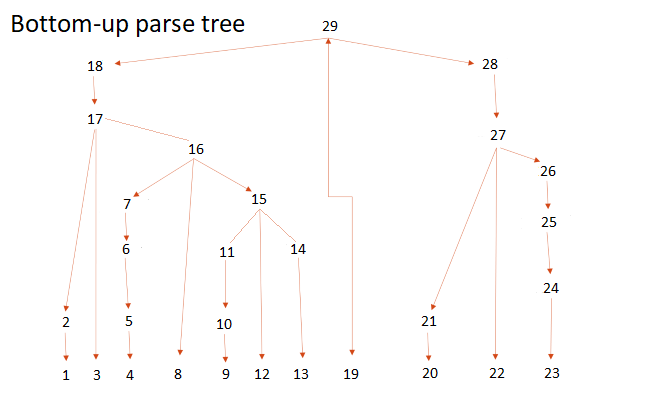

In [5]:
base64_data ="iVBORw0KGgoAAAANSUhEUgAAApcAAAGLCAYAAACSkLnsAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsQAAA7EAZUrDhsAAAAhdEVYdENyZWF0aW9uIFRpbWUAMjAyMToxMToxMCAxODo0NzowONOpBJUAAF1/SURBVHhe7d0JfFxXeTf+586qffG+JF4SySGOIWwhIKUEkpAghYKBkLIUAgUkWqBSS9MN96Wlfv9tCW2lvn3/RWIpYa9LwSyWgLAFIiUhJJBEcRLPJLET745l7dKs9z3PmTPSSBpJM6NZzr33983nxnNmRtKs9/7uWQ1TIAAAAACAPHCpfwEAAAAAVg3hEgAAAADyBuESAAAAAPIG4RIAAAAA8gbhEgAAAADyBuESAAAAAPIG4RIAAAAA8gbhEgAAAADyBuESAAAAAPIG4RIAAAAA8gbhEgAAAADyBuESAAAAAPIG4RIAAAAA8gbhEgAAAADyJutw2d9ukGGk35qb26m7P6juCQAAAABOs4qayyZqaprb2OBgL3W2NlJzd34DZrC7ORFg2/vVNYtlch+A1cBnDAAAYGU5h8umrjtpYGBgdjPNAPW1JW4b7LyN8pwvAQAAAMAC8tjnsoFaevookS8H6XBAXgAAAAAAB8nzgJ5G2p1oIaehI0tVXQapv7udmpvn+moaRjM1t3fTwu6ayWbIxs7BxBW9rfN+hmtHM7nPfJn//YR+apf3aReXhGA3taf8LPczTf25YL/43fN+b7/4i7lI/t10z4EtdfvCxyvKzao5lzdxuT2rfrGr+H3BdK/14tdszvy/Ne+1bO5OeR3F720Xr23yNnm7KHcv1VytHseC+2f6OmT+Gcv08bNcHtPqngcAAEBRmFnqayOTf6ypK6CuSdVntonbiJrMtDfz7U2Jn5dbU5PZJLbZstja+uZ+MNDXJm8XeXX2dlmWW5vJd83kPnOy+/sJyefUZnZ1zd13/s/x8w2YXbO/m39v8rLY2vrU78pGBq9l2ttTHi+/NsnHwM81eVls6d+/dHL8fYGuebcvfq3TPa/0r3ViE+/lvPuITfy+trY2ucnXu6nLXPysxP1T3pfE/VMee9qfmS/zz1gmj5/l8phW/zwAAACKIY/hMjB7W/oDXUr4WhT6+GeTB+PFoSOQPFAvE9JWvk+ufz8lzKjfP3tzYMFtYkt9XTiUJK5fKiAuJ/m7l/rZpW5f8JjEe5H6XGdfp4wfU46/j8Mlh7/5L7SQ8j4seq+W/lsBEd7lvxl8FubM/1vzH8ncbZkG7ZX/9sqPP7fHlN/nAUtYeEK06H1e/P7iFQcAWCzncMlhYq72JhkwxLbo4KesGLTmH0BTZRIoVrxPzn8/5YCS5nfPhav0gTv3A3/y7y71eJe6PeXxpj34ZfuY8v37hOR7sej3pfyteTV9c5avOV9g9j1P/7uWfhzpZRcuV/ib2TymPD8PSIffu5TXVwXNuc9Z4r2dK6vP/TL7JAAAp1pFn8tBGhyc22b1ttJt7Qv7lxH1H+xNXGjbRx0NiYvzNdDNt4rdORs6sujnV2v1f7+Jum5vUZfnNOzak7jQ1EV3LvrFDZS8ebDoI5zE472zQzyCheae5+CBQ1m8znn8fY27xW8TBg9T+ldF/K1ADy1+tflHk3/rjiX6bc4JHhlKXGjbm/Z3rfw4crX048/lMZXueThJC/WYKe9ZQwftE2ly9nvbf5B6qY32zX7HG6iD79B7MNEXGQAAZq1iKqIA13qmbAEK9LXJg9xgbyc1LhiAkTw+Nu1uTFxIYzao5f0gWbq/nwxD8/VTNw9ASbMtOSYlj2afZ56s9PuCwX45EKW9XW13HBCnJrlp6NiXmJFgsJdaG41lBmIRBQ6rvzJ0cO5vp27icag70JLjz/Isl8ek4/MAQYZ6vOYAAAvldSqihpYeGhABUxrspDuyDUrJGphSKeLfP5xS65u6HVa3F0W+Q/yC35ccLd3Y2Eqtnb3U25vcco2WjGuYAtTVlnin+ESGQ6axaAT63AkFB9G5v526iddc3mEP7Upbm51vuTwmHZ+HAwS7aX8vVxaruky5b+il/alTMwQO53ySBABgZ3meikho2avmuqRlpiNaQql31kX7+xyQUmt957aetO2eBdK0m5aux81B6u8TwbKxtVe+nk1dfRRIfZ6BrlWG+Abq6FET93classTNZlquiRprkvC4lr2hVv6Juz8y+Ux6fg87C5I3bd10mBb39z3saFDnjgPdjbOTQO1f6i0J8MAAJrKf7hMmetyTmZ9D2f7luU79JT87+tltv/pnl3ilVm9dL8veR0HooGOlrz8ncUaqKWjhwbM5OT9vXQwTW158fu7riyXx6Tj87Cj/vZG6qQuCiw802vpmR/m9+0RJ0+oLQYAWCj/4TJ4iA6o6r89KXvdlr2qPnPJDvBBOqR+sOnWm9OHkUwG+ixxn7z8/aJKhvT0qx0Fu/eLKLWcQeq8I90E7v2UzILL9T9dLJvfl9KUWxQtlHx7U2vLV37Pc7SKAWe5PKaCPQ9YpL/doNbeNuobSDd4bT55ArXUICsAAAfLb7gM9ieak/hyUxfNG1w921zeS63NCwdh8IorjZRYACV1RGZCJgNtVrzPKv5+aczVtva2pvYn5FVamudWi1lOb+uigVX97a0qlObwPDP+ffNriue/1N3U3Kg+I1kLyoFQvCLNwt/J/eNY6gkNtdxOXTKgp3vPGb+W7cus7DNfXgZ85fKY8vw8IL3ZYJlJ94L+dnHf9DNIAAA4npmlpea5bErOEaluSzsNYdpVW1LKK87pmNgS82ouM7/jUvfJ6e8nf+8Sj22FOQYzmaNzSQseb+I5qcttXWp+yaVeB17FJeX+KT/LW+YPJ8ffl/rYxX3lijLJn5n92YXzNq7wWifnFlS/lx/DvPcv3ZNK+56LLfW6jF+MlT5jKz1+JZfHlNfnAYssfH1nt+R7Of+9X/E9BgBwsFWEyzSbONi1dS0xiXpSILEazvwduSiLA+PyPyd27qlBQoS5RYfSjO6T7d9fITAUMlwy+ZxSglwTL8PIfykZtBY+rvmPN9DXNe81Wbwk5kpW8fsWPvbZ1zn5O7MNl0K6948/d8s+KfEzXWqJyNmfE79j9rXMwrKfsQwe/6xcHlMenwcAAECBGPw/cZAC2+indoObqnki74ElJozPRr5/HwAAANhZAUaLAwAAAIBTIVwCAAAAQN4gXAIAAABA3iBcAgAAAEDeYEAPAEAqM07xcIjM0LS4GCdXWTm5/BVib2moOwAAwHIQLgHAUcxYjMxoRGxhio2ep8jzpyg6co7i05NkRsJir+giV3kluStraPTug1TT3CrvY/j85KlbR75NO8i74SIROMvI8HjVbwUAgCSESwCwF96liS02MULhM89R5NxJik9NkBmPEsVjIhD6yFVVS+6KanLXrCFP/XpyV9eJTOlWvyDhwg+/Rqc/90na9fl7xf3q5XVmOCR+57MUOXOcYlNjFBsfFb/PI0Onf9su8m3clqjhRC0nADgYwiUAWE48NE3R509R5PmTFJscU7WRYXGLIXKdi8jlkoHRt/Fi8q7bTIavLPGDGYrPTFHgg9fI37/ulj+iTe//X+qW9LjWc+bYExQ+eVQFS5MMtwidNWvJt/US8q7fkrgjAIADIFwCgFbMWJRiI+cpcuGMrBk0IyGKh6fFvxFZ88hBkvtB+jZtJ9+WHeSurE38YB5rCy/84Kt0ovtj8jLXcDZ+/l5ZO5kVrj0VwXc6+AiFjz9FrvIKMrx+8dgryVO7lrwbtpKnfoO6MwCAfSBcAkDxqMAVGx+RW3x6QtYSJvo7ihAZDcuaR+/GbeS/6NJEoHO5yBAb94UshnhohgIfbJLN6Unr3vIh2vTBv1WlVRDP3xQBOTY2TNNHHpZN7LJ/Z3mVbKr3irApm+lr1qgfAACwHoRLAMgbDmYyMIotNjEqg2Rc/CsDZHiGzGiUvGs3kW/TNllzx83V3HzMmy79FKef/A2d++b/lZfDJ58m35ZLyCUe59Y/+deCDeDhwMn9OaMXztHM00Mi2J4gV2WNrJXlgO0Rr5mnup5cFVXqJwAA9IVwCQAZ4eZqDkAcEuOT4xQdG06MsuY+j3x9JEzuqhoRHjfLfo4cjlz+cjJ4VPWCwTJWcf5gL63d26ZKxcej2uNT43K0euj4UxQ9f1oGTA6c3I/TI15rd3ll1n1KAQAKCeESABLNtbEYUTxKsZkpWYPGA2Y4QHJzNU/Rw6OsPXVrZZMtD5aRo62r6uQUPXZV6nC5FK4h5mAfOXtCDjqKT46K96FcNqn7t+wkDw9iEu+X4bZmqAcAa0O4BHAQrgmLXjgr+xNGzp9OBMdYVNxA5CqrkDWNrspqOeCEB5vwXI+6NFeXgq7hcilcyxk+dYzCZ59L9GMV77cctb5mI/m3NcpaZQCAQkO4BLCLeJxiIlxw02lk+Kzs5yin5+HmbPU156DhXbuRvOsvIo/4V/Z1hCVZLVwuJTo6TKFnHhOh84SszTS8PlUTvY58XNOZ7Uh4AIBlIFwCWIH4mnJTKI8yjo4+L/s5xmem5XyPHCB5QAjfh+dV9G7aJud35Ol6xFfc0TWPq2WXcJmWGZcnIXIAEa9AJMIm99/kGmzPmg3yBIS7PwAAZAvhEkADyYEbUZ6eh6fq4fA4OS7C41RiJLG4nZuseQUYObdjVS2Ry50YKIPwWDC2DpfpiMDJI/p5tPrM0ccpev6MHJDlrq6X/Wu51pv7dbrKMWodAJaGcAlQaOKAPTtFz9QERccuyDWtuQlb9nlM9ovjKXo275D9HXmQjGy6tOgoa7twXLhcAvfL5W4WkTPPUejZIxQdeX521LqnXgTONRtkLSdP2QQAgHAJsEocDhOryIRkaOSBMvwvl5NLEnJNo5w6pm69PCi7xcartYDeEC6Xx9NS8WT4kdPHKHz6WXnCxBPCc+2md+PFclCYy19BvP46ADgHwiXAcsTXQ/ZnFBvXOCbWsz6V6OsoAiUPouE5Bt21a8hTVUfumvrEVD2V1eLbVZwVZaBwEC5zIweW8Xfl3Ak5OwGfaHG3Dh6t7tu6U4ZOnSbOB4D8QrgEELi5mucL5ODI/R3lGtaRsAyI3ETt8vplgOTVZbj20c5zO8IchMv8io6ep/CJpyhy/kzi+yW+Z/xd8q7bIkLnJbJLCABYH8Il2B43TUeHz8lJp2MTI7OryRA3Z5txcYAzZVN1YknCixw/tyPMQbgsDj6xm3nmcVnLyd1FXNzf2Fcmazh9m7cnBrABgGUgXIK18dyOIjByvy+58aAZnt9RNluL8BgLk+H2klccoHh6HlnrmGyOQ4CEFSBclojsjhKXA4h4qiTuksJTa/Eode6vzJPCc22nq7xS/QAA6AThEjRmUnx6So6yllPziNAY45HW4jKHx7js82jKgTI8eICbrLlfF/Ek0ZgcHPIA4VIvcn37aITCp47SzDOHZXcWWcNZt1bO8SpHrdeuxah1gBJDuISSkXM7hmfI5NDIczvygBkeZS0OGPJ6cbuHB8qs3SwDJA+SSTSZ+YlcGCwDhYdwaQ3c1YVbLeTSlyeekktfGjyAaJ3Yd3A/6dp15KqskhPFA0DhIVxCYajJmGWAFDv96AhP0XOSYuOjcpQ1Hwx45y9XAuHpSiprZHOXq0IESI9X/RKA0kK4tDa5MAEPIjrznBy5zoOIuFaTWzp8m7bLuTnlnLI2n0+WD/OxWIw8mBIKigThEnLDHxuxcdN0TATH8JlnZWd83nlzoOSaRdk/qkqExspauROXczyijxRYCMKlPfEk8DyIiFcgio4NJ0atc9/sTRdT2Y7LxYlutdiHcZ/sHPpl874xl/7cwW5qbuykQVWktj4ye1pUgfVTu9FKvaok7kB9Zg+l3gNAFwiXmuoX22p2GlwzOPKT/6b6lt9X1+RAfDRi4xcofPYERYfPiN+ZaKrmjvaGCI9cw8iryHAfJ9+Gi2R4RHM12AnCpbNEzh6n0HMBik2MkhnjwJnov82zSPgvblzx5Dg+M0mn/v+P08b3/bUc6Z45Do4HaW8yLKqgSV0BGuho4Cuou7mROvfMBc7+doNah7ooMNBBfA8AnSBcFoncEfSmO9PM/9no1OMP0sl/+zPZ6X33t59e8iyaB8hEh8/KKXq4n6MZi8hlCok7zYuNf44nBPdt2Um+9VtlkMQIa3AShEvgk+zQiacTA4jEPpNXG+KBg7J5XewXvZu2JQYSChFxIv7k+66S67Bf/Fc9VPXi35HX50IeMygZJhPHCXFwoNnKzP52SlyF2kvQD8JlwaWGx4XBMb9no9y/6Nx//Rs9/63PJJqmhUs+/R3xLrsS61pPT4nrw3KOR67Z5D6OPHExzyMn+zryijKoeQSYhXAJacXjcuUuruWceWoosQJReQWFTx6ls1+5I3EfsT9df+tHacO7PpY4Mc/S/HCpjhWUPDYsPnYA6AThssBmw+K+w9S46Cwzf2ej3Ifo2P96F00HHlbXJGz7+Oeo6mWvSTRhu70IjwBZQLiEbJw78H/ozH/+b1XifOmmmmveQBfd/u/ZDVRUzeJ7Uo8NyUCpOmU2zTaZA+gHSaPAWnpMMpeshWyk3U1Evfu7xW6DiZ3H/l6itr1ZN3N46tbR9v1fpy1//Gkqv+wls8sTci0lD6zhKXwQLAEACmf6iYfkvJtlO15A6275MF3673fRRR/rznIGDHEcuK2TBtv6UoKlEDxEBzhYtnVRlzhuDHY2Ujt3zgfQEGoui2XJGskCnI2Kt5Q7po/8/FuyT1DddbeoGwAgG6i5hGyM3fN9Km+8Uu53cz2ZT9s1Kl1NpjymDFFXYIBQgQm6QVVWqRXibNQw5Dxu63+vA8ESAKBIuAmc972rCpY88HNha1fgMA1SG+1NrZlo2SuuGaTDAVUG0AjCZSmlnI2aPR3UMSD+7Wuj3tZm6k60kwMAgAPMBst0/e0bd1MT9dLBlIqHYPd+cU0T7W5UVwBoBOGylHA2CgAAwW7i7vYk4mKrYZAxu6mKhoYOGpAVD3O3JabBRJM46AnhspRwNgoAABweTZN4CMT8LSU8tvQsfRuAZhAuC4ybOuSZZiuflibPSnE2CgAAAPaE0eIAAEvAaHEAgOyh5hIAAAAA8gbhEgAAAADyBuESAADAQqaDj6hLAHpCuAQAALCQqcO/VpcA9IRwWQKTD9+jLgEAAGTHcLvVJQA9IVyWQHT0vLoEAACQHcOFcAl6Q7gsBUO87JgBCgAAcoGaS9AcwmUJGBwuAQAAcmKofwH0hJRTCi7sGAAAIDeG16cuAegJ4bIUZM0lmsUBACB7LhEuzVhMlQD0g3BZAryGOAAAQC4Mn5/MaESVAPSDcFkKPNIPFZcAAJADl7+czEhIlQD0g3BZCoYhsiXSJQAAZM/w+smMRVUJQD8IlyUg+8uEZlQJAAAgc4may7AqAegH4bIEDF8ZxWcmVQkAACBzRlkFwiVoDeGyBFxixxCbHFclAACAzCVGi2NAD+gL4bIEeI4yMzStSgAAAJkzPF6KT02oEoB+EC5LgDtjx8PocwkAADlweyg+M6UKAPpBuCwBV1k5xdEsDgAAOTA4XKKCAjSGcFkCLgzoAQCAHHGzuImaS9AYwmUJyNHi0wiXAACQPcPtpjj67YPGEC5LQHbGjmIaCQAAyJ7hFseQGYRL0BfCZYkYBl56AADIgctFZhTLP4K+kHBKxTDUBQAAgOwYLo+6BKAfhMtSQc0lAADkyoNwCfpCwikV1FwCAECODJdbXQLQD8JlMZkmmdEImeEQkfiXR4zHpsbF9XF1BwAAgAy4cPgGfeHTWUSR4TMU/MgNdKTtGjr9+U/SkfddRcE/fK0ImFjGCwAAMoeaS9AZwmUReddspPLGKyly5jmKTY5RdHSYqq+6ntyVNeoeAAAAK+PpiLg1DEBHCJfFZBi06X0fJ5e/LFH0ldH6Wz8qLwMAAGTKEMcRM4LpiEBPCJdF5lmzkdbd8hF5ufrl15F3/VZ5GQAAIFOusgqKh7C+OOgJ4bIE1r3lQzJkylpLjBoHAIAsJcIlVukBPSFcloCrooq2/92XqXzXleoaAACAzLn85WSGUXMJekK4LJHyhhcRJlIHAIBccCUFmsVBV0g3AAAAFsPN4qi5BF0hXAIAAFiM4fVTHKPFQVMIlwAAABZjuFyJ1d4ANIRwCQAAYDWGG30uQVsIlwAAABbDNZdkxlQJQC8IlwAAAFaDZnHQGMIlAACARcQmx2jqiYdo8re/pMnDv6ILP/wanf/O5xA0QSuGKajLAACQ4vzBXlq7t02VAEovcv40BT7QRPGZKXUNUeUVV9POOw6KIzpWfAM9oOaySPrbDfG9b6d+VZaC3dQsdgZGmq25O6juBAAAkOBdu4k2vOcvVClhzRvei2AJWkG4LLh+ahdf+tZeVUzV0EEDpklceTy7BbqoSfx3680N6k4AAABz1rS8m3ybd8jLvk3bqeZ33igvA+gC4bLA+ttbqbepiwJ9mTWt9d/RSYNt+6gD2RIAANLg1Xk2t/2drK1c0/oeMtxudQuAHhAuC6ylxyRzoIMyyorBbtrfS9S2t0VdAQAAsFjVVTdQ9dU3Ut2Nb1fXAOgD4VIjwUMHaLCpi25fkC1HfnxAbgAAAIxrK7f9VS95ateqawD0gdHixdLfTkYrUZ/ZQ+nrJblvprwD9SxRcbkwYNbdcKu6BACFgNHiAADZQ7gslhXCZbC7mRo79ywTPhdD2AQoLIRLAIDsIVwWy7LhMlFrOdQVoIFVjORB2ATIL4RLAIDsoc+lDvoPUm8eph/iMJm6JftqLgydAAAAAIWCmssC48nTF89x2URdgQE13VCQupsbqXNPH5lLdbbMA9RqAmQPNZcAANlDuHQohE2AlSFcAgBkD+ESJIRNgMUQLgEAsodwCWkhbAIgXAIA5ALhEjKSGjYRNMEpEC4BALKHcFlCZiwq/meS4fGqa6wBtZrgFAiXAADZQ7gskfCZ54iiEXnZt/US+a9VIWyCXSFcAgBkD/NclsjUo/eSXVI9h8nUjcNm6gYAAKsU7KZmwyAjubX3qxuEhbelbM3dQXUngOJBuCwF00w0idvUcmETAACy1U/tjYdpHx87eAt0UVNv61xwbOiggeRtqffJw+IcALlAs3gJRC+co5mnhsi7eTsZomz1ZvFsLAyYHD4BdIVmcdCVXKCDll58Y6XbAQoJ4bIEpp/8Dbnr15MZCTsuXC6EsAk6Q7gEXS0bHrmZvLGT9vSZhGwJpYBwWQLj9/+Iqq+6gUKnjjo+XC6EsAk6QbgELa0QHoPdzdR44FYKDHQQGsWhFBAuS2Dsnu9TTfPNFDr5DMLlChA2oZQQLkE/QepubqTOPUs1efdTu9FKhFpLKCEM6CkBbg4ng2MlrITDZOrGYTO5AQBYDdfnzMzMUDSaGNQZiUQoFArNDsRZSX+7CJbURYElkmOwez/1UhvtRbCEEkLNZQmM/OSbVHf9LRQ68TRqLlcBtZpQaKi5BJ3Ifpa9bdRn9lD67JiotRzqCtBABxrEoXQQLovMDIdo7N4fUO21b0K4zDOETcg3hEvQxcrBUuhvJ6N1iLoCA4RsCaWEcFlkoWePyGbxskv3IFwWGMImrBbCJWhBDeAZVMU5TSlBcqW+mADFg3BZZOO/uosqX/gqcpVXIVwWWTJsImRCphAuAQCyhwE9RRYbH5HBEoqPQyWCJQAAQGEhXBaZGYupSwAAAAD2g3BZRGY8RobXp0oAAAAA9oNwWUzRCLkrqlUBSo1HXxpGO/Wr8jzcgd7g29XW3E1BdRMAAAAsDeGyiKKjw+SpW6dKUDo8FxxP66GKC6Usrcbj3eSGZdQAAAAygnBZROETT5N3w1ZVglLpb2+l3qYuCvSlHwXcf0cnDbb1Yek0AACAHCBcFlHk/Gly165VJSiVlp7laiL76WAvURvWTgMAzfExJZWcRzmOQaNQegiXRWRGQmS43KoEWgoeoSFqIjrYPNffUmzN3ehxCQD6iM9M0bmv/bMqJbgqa2j0Z9+i0Z9/m6Ye/zWZscT65QDFhnBZLPG4ugD6G6Sh3XfO9bfsa6PBztsI+RIAdDH5yCB5N25TpQTv2k1Ud/3bqPbavfLyhR9+nUZ/+T2aefox1GhCUSFcFkk8NIXBPBayZ1dKo3nLXhLxkg4HVBkAoIQ4KIZPHyNP7RLHFMMg74aLaE3ru6mmqZVcZRV0of8rNHbP9yl0PIgaTSg4hMsiiU9PkmfdZlUCbTXsoj3in6EjqKYEAD2FTzxDFbtfIS6tvHqz4XaTb8tOWnPzbVT9yptkKxoHTa7RjJw9Lsqo0YT8Q7gsksjwWXGWicE8+mshXkp68MCh2Xktg937qZfaCGN8AEAH0088SGU7L1elzBkeL/m37aI1b3gv1bzyRopeOEfDqkYzOvI8V4mqewKsDsJlkUTOPkee+vWqBKWUmDxdbHKiy15qlYN2mmf7VLb0BKiLOqlRDeZp7NxDfWaPiJ0AAKUVmxiVzd6G26OuyY3h9VP5ZS+RNZpVL7+OQkefoAs/+gaNDRyi+NSEuhdAbgyTRyxAwV246xtU/7q3q1JC6MTTZIh/fVsvSVwBAFo5f7CX1nJVNoAmJn77SypveBG5q2rpwg+/RvU3vVPdkh/x0DRNPPAT8e8MuavrqHLPK8lVUaVuBcgMai6LJD4xpi4BAADkwDRlDSMHy2Q531z+cqq55g1Ud/0tVPnCV9HYfT+gkR8foMlHBig+Na7uBbA8hMsi4DNBd029KgEAAGRv5tiTVLHnlapUeK7ySqq77hY5vVHZzito7N5E0Jx+8jdynk2ApSBcFkF8ckyO1gMAAMjVzDOPUdklu1WpiAxDNpFzyOTNu/EiGr37IF340dflHJpcgbLQxIM/E4/3sCqB0yBcFgGPwvNtvFiVQDfDfV+myUfvw5QcAKAtns7OjIRLv8qbCJqeuvWyr2f9636PXBXVMmiO3PUNCj0XkI+Rm+uf/+Z/0DN/eQvNHH1C/SA4CcJlEURHzskvIOiF+w+N3XOIXP4y8q7ZQMM/+KqcYDiTueMAAIpp6rH7qab5ZlVSSj0e13CRb9M2qr/xHVR7/dvkCfrIT79J57/7eZp68kGKjQ3T0b++lcInn1E/AE6BcFkEsdFh2UkaNBGP09h9P6SJh+6m6qtvkDtoHrG/puXdspZ5uP+rFBsfUXcGACi98Nnj5K6sUSX9cI2qf/sLZI0mz+nMNa0seuEsPfNXt1D4zHOyDM6AcFkEsj+KwZMOQalFxA5uuO9LVLZztxwRyXO9mcmJg8V7xNNurHn9O2XwHP3l99P2JQIAKKbwiaepbPtlqqQ5cbJ+/vtfVAURMsqrZOXKua9+GstOOgjCZaHF42RGI6oApcIjG0d/8V0KnXhKTho8rw9sbEFfS8NFtde+iapf9hoa/fm3afKRQbHDxMoVAFAavA+quOJqVdKbGQlR/Q2/Rzv2f4Mu+/Jv6PIDj1Njzy9p6592r3rid7AOhMsCi46eJ9+m7aoExWfSzDOP08hP/puqr7qeql76mnm1yPHpCTkKMh2eOJibeHybt9PzBz+LjukAUHR8YmylScwNXxnVv/6dVCVOzr3rNsslJ9Fy5zwIlwXG/U38FzeqEhQTB/sL/V+RzTRcW8lzti0UmxxfMlwmeddvpXV728gMz8ipNyLPn1S3AAAUFk9eXnllsyoBWAPCZYHxwBB37RpVgmIwYzGa+M0vaPK391DdDbcuOy9cbHKU3DUZvD/izLt814vlhMI8r9vIz76F/pgAUFC8L4ucOymn/gGwEoTLAotNjZHh9akSFFrk7HEa/t7nyb/lEtlvkgfsLCfONZdVy9dcpuImnupXvI5qrr6RRn9+kCYe/LnsVwsAkG+Rs8/Jk9qlmBaYNi0u9o+RSMq4g2A3NYuTdSO5tferG1IsvE9zN/EkcWAdCJcFxuEFnZgLjwdNjd/3Q5o5+jitfdMH5QoSmeC5LldqFk8n0R/zHeS/6FK6cNc3aOapIXULAEB+TPzml1R2yRWqlIYFpuR1uVzk9f5YlfqpvfEw7TNFLOYt0EVNva3U3J0SHTlYNnbSnj51H94GOqhB3QzWgHBZYPFISF2CQpkOPCJX2eHRlFyrKE511S0rk53lfWWqlD3vxovloJ94eIaGD90pm7AAAFZL9gevrLFJ5UTL7L89Zs9siRo6aF8b0eDhgLpCxM87OmmwrY96Zu8EVoRwWUAcXNxliweRQH7wgJ2Rn/6PuBSntW/8g5xqIMU5sbq0OhWXv5zWtL5bBN2HaWzgkKyxBgDI1fQTD1LVS1+tSk7RTwd7idr2IllaHcJlAUWeP0V+q0x8ayXxOE3+9pc0ft+PqPbVb6TyxqX7JK2I+0tmUdO5LMNFNU0tVPWy19LoL78rJ2LHHKcAkDWxX+J1ut3V9eoKmwp20/7UMBk8QkPURHSwea6/pdjmNZuDJSBcFhBPWeO/GD1F8ily9oRcA9y7ebvs8yjnUFuNAgzGcZVVUP3r3yVHqQ9/7wuJ/pgm1isHgMyEjgep4oWvVKXlWHm/EqTu29I1gQ/S0O475/pb9rXRYOdthHxpLQiXBSTXVsVgnrzgGsDRuw/SzNHDcoJe38Zt6pbVMeMLVufJI54+ZO3eNlkzyktOck02AMBKuHtN2Y7LVcme+tsbqZO6KJCmc+WeXSmVMi17ScRLSumWCRaAcFlAvPoLL+a/JK7NyleTrI3NPPUojfzsf6jyxb8jB+ws+5pmrcCvv3h/ebTnmtb3UOjo43ISdl4eDQAgHT5u8Brcdp5lpL/doNbeNupbOAq8YRftEf8MHUE1pdUhXBbSSk2hvF41ajaXFJ+ZlGEsNjVJ9a97O3lq16pb8kS8P4arSOFehMyql19Htde+mUZ+/m0af+An8gACAJBqcuh+qmm+WZVWYr3KidlgmTpqfFYLcWPP4IFDs/NaBrv3Uy+1Ecb4WAvCZaFwX76VwiWkJ163yUcGaWywX66IU5lR36NccM1xcb8CLn+ZDMrll+6hCz/8Gk0/+Rt1CwAAUfT8KTkF0YrkybFFDuHB7tl/eQAPibjYKk645wbtNM/2qWzpCVAXdVKjuq2xc88SQRR0hnBZIDyYx7spP/0CnYRfN66t9KzZKIPlqgfsLIezf5HDZRI/P24qd1VW0/D3/pPCp59VtwCAU4WOPUn+bTacYaShY/bfARGKZwfrzG4D1DHbPt5AHQOptyFYWhHCZYGEzzxH/oswUjxTZnhGTt8z8/RhWbPHK98UmthtlbxViT8ja26+jcKnjsr1ymMTI+oWAHAaXhCC58wFsDqEywKJjQ3nv4+gHYkz09BzQbpw139RlRywc4P4VBbnY8mj+d0V1apUQuL5Vr3k1VTT1Erjv/oJjd37AzIjYXUjADiBGRXfeT7ZNTI94xUnx1ZpFgfHwSezQGQ4yHgn4Uw8YIeXTOT1vdfc/J6iTxgcn5ogV3mVKpUe98esu+6tsuZiuP/LNPXEQ+KDlP95OAFAP3xiyYP+MoYu/aAxhMsCMWOFmz/R8kyTph77layhq7vhViq/7CXiyuIH8djkaGYd54vMU7eO1r7x/eTy+UXI/IrsYgEANhaPU3TknGNbu7gyBquZ2QvCZSGY8cIORLGw6PnTNPz9L5K7pp7qXvtWuZpNqcTGR8hVVatK+knOjxk+/pQcWR6bGFW3AICdcJ9r/r47FQ9o5GMD2AfCZQHwvIzcxAlz+Mx0/P67aOrxX9OaN9xG/osb1S2lExu/YIm1e6te9hqqu/5tNDZwiMZ/dRf6YwLYzMQjA1Sxi1twslSi2S7yjStj4jNTqgR2gHBZAHwW6sNI8VmhZ4/I5Q+5L2HNNW/QZocYD83Ipmcr4J1v/U3vpIrdr6DhH3xFhvRCrIsOAMUVmxwjd2WtOBpnt1/k2S54Hkg74P1bbGZSlcAOEC4LIHL6GPk2XqxKzsXNuKN3f4eiYxdkH0JuCteJFfv4uKtqae3v/gF5126m89/9PIVPPK1uAQArmn78Qaq8slmVnInDpRmaViWwA4TLAohNT5Lh9amSA5nxxICdgUNUffXrqHLP1WLvgZHz+eTdsJXWvun9FLlwDv0xAawqHqfQ8aDjp60zPB6KzyBc2gnCZSE4eM3o6MjzNPyDr5K7do1sxi3lgJ0VxS0+ot9wyeDO0xdNPHQ3jfz0m/NqY3keTw74AKCn0PGnqPJFTaqUJbP4y9cWiuH2kBmaUSWwA4TLPOODu9aBqlDEjm78vh/R5MP3UP3r3mGJ1YlMm/RZNLx+qn31G6n6qhto5K7/kuuyM54r80TXn1Lk3ElZBgC9TB95iPzbV7Hco00ahOSAnhD6XNoJwmWemeEQuevWqZIz8Hq43DRbfvnLqPbavbKJQ3siDBs2W93CXV1H9S2/T561m+j5b/fS2a98WjaXH//0RzHvKoBmeCAP1zxyrZ3jcbicxmhxO0G4zLPI8Bny1m9QJXuLT0/Q6C++K58zN4Fbqd+QGY/Ztl+sf+slFD4elO8Pm3x0kC70fUleBgA9TD/5ENW8qkWVnM1wucUJsHO7k9kRwmWe8TRE3vVbVMmm4nERWO4VwfJ7VP3KG+W62JYbsCN2ZNycbEczTz8mpyuaZZp0+j/3Y2Q5gC7EdzJ0/GlyVaxy+Vmb9LmUsE66reDdzDMe0KLTetWrInaAU4/drwoJsdFhOWCHaynrb3oHuXzWnCye+1u6/OWqZC++rZfQZf/5K7r0335IO//xf2jb33yBNrd9EstIAmhi5tknqUIue7sK3LXHRrNwcO0l2AfCZZ6Z0bD1avGWMPX4A3Tsb98jRzRykwWPPJ4cuk+GSv+2Xepe1sR9EF1l9gyXHJq9Gy6i8sYr5fx5NU2tVP/6d1HVS69V9wCAUpp5aojKd12pSiCh5tJW8G7mEQcwu5x98RKDpz7zN7MDQuSAHXGmXdPcaosO6GYkJEKYA0f1A0BJxUPTiQF2dmrSzgO7DbB0OrybecQDKLzrt6qStV348QGaDj4iL08f+a1s/vaus09f0vjUuDOnjFL62w0yjHbqV+WkxPXzt+buoLoVAFZr8je/oJqrb1SlVTBNe9X2GWgWtxOEyzyKTY7bYjBPdPgMnfn83yd2XsyM06nP7KPohbOJsg3wBOOGTftcLq+f2kVgbO1VxXTa+sRbb85uAx1YJx8gL8T3ifvl67YUrg5Qc2kvhjh4qAQBqzV1+AHybdlJngznuQw9FyDDV6bdOuTDh+6kCXF27alfL7YN5F23WTzGbeTfeTl5ataoe1nb5CMD5N8unk+tPZ5PprhmsnWoiwL7DlNjK1Gf2UOpk6HI20mEyx5MkcLOfvlTVH7ZS1Upz8Sut2znbrmUJzhD+OQzMlxW7L5KXZM77ro0dm8/1b76Teoaaxv5yTep7vpbVAmsDuEyj3jOx5prbs6436Wu4dIJxu/7IVW+5Fpy+a052n3V+tvJQLhckZx7zyzMSk7x0AxNPnQ31fzO76prwO6Gv/eftOYN7xVH3tUP+rRbuBz92beo9rVvUSWwOtRD5xGvuIDpFKwhNj3p3GC5kt7WuT6Xzd3k5B6XPHjN8PgKtHnVXwEniE9NJFZvy0OwTOCpiOxzvOFFLbCSmH0gXOYRn0lqLdhNzcnQsGDLx6ANrgQ/cuSIKmkOq0Gk1dIz19fSNAPURZ3U6PCACZAPk4/dT5UvfJUq5Yl9prlMrJiG/bJtIFzmCY8+zrSvZck0dNDAbHBQW6CLmsR/t968+kEbHFJ37bLG/JdYaiwTDdSxr41o8AAdQroEyBkvNxs+eVT/Y0QJcW0+9sv2gXCZJzwfJK+MYjX9d3TSYNs+ctqAYDS/ZGMP7cKAcYCccbCsuGL1g3jszPD5yYxGVAmsDuEyT6IXzpHPaqM+g920v5eoba8DB2/EcYa8CA/yaU+d+bKf2nnOora98wb9AEB2pobukzMD5BUPxTVstPyjxytreMEeEC7zJDp63nKTcgcPHaDBpi663WnJwXTuBAmzk6TLiS57qVX2uW0m2eW25XbqGkoZzGO00lBXACPHAVaBW7X42JD/lc3EfswG4XLqiQdp7N4f0OTDAzTy4/+i89/5HE08+DN1K1gVwmWexCZGyPD6VckK+umOzkFq29dBTmvx5KYXV3mVKjnL/AE7yW1AdYtooI6B+bdhAnWA1eHwVHXV9aoEC00/+RA9+8n30pk7/4FOf+6TdKrnb8Q+Gi1LVodwmSfxyXF1yRqC3fupl9rIiS3iTg6XAFBE4gSNJ053V9aoK2Ch+pveNW/ZZP+2XVR91XWqBFaFcJkHcoRb3ps8CilRa9nUdbsj+9LxlFHuympVAgAojNCzR/KyGk86IrcSGdY/hHOXgU1/sE+VDFr35nZxJeaLtjqEyzzgNbf9F1mo+bD/IPXmafohKzKjYbFDq1QlAIDCmA4+SmWXXKFK+SbTZeKixdVc8wYqb3gRedduotpr96prwcoQLvMgev4Mle18gSrpLkjdcoi486YfSopHRLhEzeUi8dC0+L9zBzsB5FN8ZlK2amHVtpXxSPFN7Z+ktW96v+UGxkJ6CJd5EBu/YKEvhBq04eARwHFe+tFXrkqQdKH/y3T+4GdVCQBWg0c/115zsyoViI1W6Km84mpad8sfqRJYHcJlHsSmJshwY51gq4jPTJHh86kSsPMHe6nskj1Ud+M75GUAWB05PV1FAVtITJMMl40O4Tytkg36kEIC3sk8MMMz4pVc/UsZj8fVJSgkc2aSDG+ZKgGHybV72xLNd7GYvIyACZA7Hsjj33qpKgE4D8JlHvAAkXzgeQWLgQcgORn3LXR5UXPJksFScrvlNE0MARMgd1OP/apgo8QBrADhcpV49QV39RpVWh23OLgXw/j9P1aXnCk+PUUGwuX8YMm4Scqcqz1HwATIXjw0Q66KqkQzL4BDIVyuUuTMs+TffpkqWYTL2Ts9MxbBjj8N7r8l52xNkQyYCJkAmZn87S+o8sprVKmQePlHjEQHPSFcrlJk+Cz5Nu9QJYtweLBKNv062aJaS+Zyi3AZU4U5fD/UYgKsjL8/kbMnyFO3Tl0DOnj++efVJSgWhMtV4sE8VhuxZzg9XMYXBygnSRssBfk5XlBzmQoBE2B5vNRj+e6XqxLoYt06hP1iQ7hcpXg4ZL2aQKdP9xBdOkDZ3VLBkhk8oGeZcMkQMAGWNvXYfVS2c7cqFYFV6wmC3dQsjptc0SG39n51Q0J/e8ptamvuDqpbwQoQLlfLkrVgTq65NB1bc7lcsJRcnoy6DCBgAiwWGx+R81oWbUWeIs1zOTU1pS7lSz+1Nx6mfeLx8wwpZqCLmnpbF4fHtr7E7WobcOqSchaFcLkKspbHikt7ibNAp4qHQuSurFUl51gxWDLxsch0OiwETID5po/8lqpecq0q2UdFRb5Xn2uhHrNH/F9p6KB9Ytc0eDigrgA7QLhchfDpY+S/yIIT5To4XJqRELkqq1TJGTIKloLh9hBlMdgJARNAESdloeeOkLu6Tl0B4GwIl6sQOf0c+bbsVCXrMDyetKOCnYAnUM/XvKRWkGmwlMRJh5kyz2UmEDABiGaefZIqX9ikSsVkg4qCYDftF7uQtr2zdZkJva2z/S2N5m5Cj0trQbhchdjYMLkra1TJOlz+Crm+thOZkTC5q6z3nhUFd/HIYbATAiY43UzgEfLveIEqFQn3YLH84Mwgdd/WSYNtfdSTki1beub6WppmgLqokxoRMC0F4XIVVhpZqytXeaUIl5Oq5Cw8dZS7yhlNV1nVWgrcLJ7rUqYImOBUsckxWesvu5VAVvrbG0Vs7KJAarJcpIE6ZKfMA3QI6dIyEC5zFY8TWXRn4vKXy+ZhJ5Lrivv8qmRf2QZLZhiuVY2kR8AEJ5o6/ADVNLWqEmSKpxtq7W2jvoEOER8zsYd2YcC4ZSBc5ogPwhzSrMgQ4Ypr8JyIw6Xh8aqSPeUSLCW5/GN2fS4XSgZMhExwisjZ47I1qPhM2R/RimaDZeqo8aT+9gXzXvZTe6vslLn4vqAthMscxcYvkKfWmgNDZLP4tFObxUOWrXHORM7BUuBJ1InXXV8l/vuoxQQnCD17hMouuUKVikvOGuayYLhUA3iIeqk1OWBHbs0kp7psuZ26hlIG8xitNNQVIHPZpnPQDcJljsKnjpF3/VZVspbEgB6HNovzcp02DZerCZYSN4vncRYBBEywO57bsuIFL1MlyEhDBw3MDtZJ3QYoMU96A3UMzL8NE6hbD8JljiLnTpBn7WZVshZuzjdDDh0tbtNwuepgKfDKIvkepIaACXbFJ6pyhgXD3vMGT087syICVgfhMkc8lY9sRrQgJw/o4amI7HYwyEewlHj+0xxHiy8HARPsaOLXP6Wql71GlUpBzkWUuFhA5eXWHFsApYVwmQuuqufR4lbFAzes/PhXwamTx2dGHKjEZ7sQEDDBTnhAZ3TkPHlq16prSsTy81yCXeGTmQNuDvFYfJkvezfkLCNuzblJl5K3WkuBa+LNHCZRzxQCJtgF97kvb3yRKsGqcWWHQys87ArhMgc80tqzdpMqgZWYkdWPhtZFPoMl43kuaRXzXGYCARPsYPKhu6n80heqEqxW+PQxOY4B7APhMgfRC2fJU79BlSzKoVWXPPLQDvIdLCXZXaLw3QYQMMHKeEUed906+X0pKbEvs+o8lwsZvjKKiOMq2AfCZQ4iZ54jzxqLh0sHkks/lmSy4/wqSLCcVZyDFQImWNX0Ew9S1ZXNqlRiVpznMg2Xv4xio+dVCewA4TIH0fERcokzLavhGteRHx+g4UN30vj9d9G5r/8rnf3yp8iMhNQ97I1H+LtrrDnxfVJhg2VxIWCC1fCAwNBzQcvvR3Rj+MopOjasSmAHCJc5MEVIsSKegujMF/8/Ovnvf0EjP/82nfnSP9HU47+2/XKISTxxvNvCA7GKEiyL3MyWDJgImWAF4eNBqtSl1tJGXD4/xaedOfeyXSFcZolr+UqzjuzquSqqaeP7Pq5KgggS69/xJ+JfZ3wM4jMTlq1xKFqNZQla2fh5oRYTrGDqyd+Qf9tlqlRi3D/aLvtuPqm1Rws/KAiXWeLO3N5N21XJemqv3UtlOy6Xl8t2XkGVV7xCXnYCq9dcFoNRwj08AiboLDY5SobXq83iGTxXsZzhwSac0oLmFAiXWYqNj5Jv/RZVsh7+Am/+0N/LM8V1ez8oPgHWXGUoF/HQDLnKKlTJOopWa8lKXHuAgAm6mnrsAaq5+iZVgnwzPD51CewA4TJL0fOnyVVVq0rWVHnlNbSm5T2yFtNJeGlDq53pFzVYSqVvm0LABB1Fzh4nV0WVKkG+GR6PugR2gHCZpciFM+SuqFYl69rykX8gw+dXJWcwoxHxibfOR774wVIfCJigk5mjT1D5rherkiZ4RRsL7c9W4vJXkBkJqxJYHcJllszQjGxStjyHDOJJJXdcFtkZlyxYavTZdmqwBv3MPPWodss9mqYIl3Y4Finuymq5tDLYA8JlNsSXGWdW1sU1l1ZpFi9dsLLPwQogH+Kh6cTKVQ48IS8mWXOJcGkb+LZkgQfzeDdepEoWFeymZnG2y8uGya25m4LqJruTzeI2OtMviCK9PBcuXFCXFutv589mO/Wr8mL91C4/v83U7ZQPL5TMxIM/o5qmVlWCQuGxDDzoEuwB4TILvIKAb/MOVbIgDpaNnbSnz5RrbMttoIMa1M22x81IsLwihe+6unRTQiVCY+sKXS2D3fupt6mJmlQZoGDEPiM2doHclTXqCo2I/bedalN5CUgzNK1KYHUIl1mIjjxP3rWbVcl6+u/opMG2PuppUVc4DC/dBnrgWvOF+ttbRWjsokDfMl0CxAnSbZ1EXftuVVcAFE7o+FPk367JpOkLxWMiW9rnEG54/XIuUbAHhMssxCdGLDzCup948G3b3tUnywceeEBdshjuN6WJlZp+V24aLpTSdRto6Vm5Jp1PkKjrTupoVFcAFNDkI/dS+WUvVSUoJBkuJxAu7QLhMgu8Oo9lVxEIHqEhbkg82CxrjZJbcw6d1q666ip1yVrMWFRdKqWVmn4zaxouFPGn9RXspv29bbSvwzEdOaCE4lMTckUvO9UO6szl88lxDWAP+NZkIT5j9YX1B2lo951z/S372miw8zZHDIrgUf7cp6fUVmr6zahpuKB0TZdB6pbt4beTQ3t1QJFNPnovVV7ZrEr64eUf9T4bzA6v0BObGlMlsDqEywzxdBQuX+nDyWrt2ZVS69Oyl0S8pMMBVbax2NQ4uWvWqlLprNT0m0nTsCP130Gd1EV3otYSioD7Z4dPHSVPben3GUuS81za6BDOQZkHKYEtIFxmKHr+DPl3vECVLKhhF+0R/wwdcebcLfHpCREu61UJlqRpTUg/dxge7KRG8fhkl47GTnFaNEidjeJye/F7poK9hY8HqfLF16gSFIvL66xV4+wM4TJDkfOnyH/RpapkRS3E83IPHjg0O6+lnNKF2igPY3y0F58c17sWApYla3ST3Tl4C3QRT0bUFRCXnTr9ARTM1BMPkv9ijBorOjfWF7cLhMsMxacnybB4s3hLT4C6aK72p7FzD/WZPY7owxbjmsuqdHMrwnylq7lMjJAXmxzN1Eut8nOKidKhuGLjF8jwl5Ghe9CJm/L7YieG260ugdUhXGaIm1UNl9U/+A3UMZBaA+SMYMl45KerslqVYEklPFgtqp2U2wCl7WbZ0EEDS90GsArTgYep+uXXq5K+5JKUNhvJ7vKXkxnVYVYPWC2EywzJNcVtdpboKCKo4N0DgGWJ/UTo2QC5q2rVFVBM3C8eI8btAeEyE1yDgtVdLE2e5WtwcrBS02/Jm4Y1eI0ASmXm6ONU+cJXqhIUm6uyRrYSgvUhXGZALvu4bpMqWRwH5WhEFRxETqBe+uC0UtNvVk3DDhI+85y6BFA4M08NkX/nblXSGy8KYbc+iu4KDpeTqgRWhnCZAZ7vrMwiO5yV8Hydk0P3qZJzyJpn1MqtSNcBAlOP3a8uARQG98vmeSOt37feutyV1Yn3ASwP4TID0dHz5Klfr0oWJ3aepgiYjmNq3K2BV9rQBU/KbGo4kTFODKDAJh8dpOpXvk6VoBR4eWWuAAHrQ7jMQKIZ2R4HN14n14nN4ty8rKuxezWaBFzTj7lhp5VIQEvR4bPkrsRAnpJyexAubQJ77AzYaqQ4h0t+Pk6j8api8WmN1qzX9XOOmksooNDxp8i/zWKTpstBivZqwue5Rc0ZjfaHkDOEy0zY6MDG/Yni4ZAqOYjGNZc6kTWEWjaLY1cFhTP5219SxRVXq5I1yNYYm510cbiMI1zaAvbYKzDDM+TyFWi9U7FzKPoACv57cuS00yBcZkbTg5X8nuA9hPzjqW/cWBpWD+J7rnMXJsgcwuUKZHPJRQWaB8aMl2YtVZut6rASMxomw+NTJViWS+zcNQxxiRpVVQDIo4nf3kOVL3qVKkGpYbS+PSBcriB86hh5N29XJZtwWLjE0o/Z0LTm0mGfWSgOnisyev40eWrXqWssxIbzXDIedArWh3dxBdxk4vKVqZI9OO3MMDoxSp7qelWCZXHzs4Y1hIbXR/HwjCoB5AfPYVz+gpeqEmih2F3FoCAQLldgy2l7HDY4Ii7CJa9ZCytL1Broly5d/nJ09Ie8m3x4gMouuUKVQAd8Isk1ymBtCJfL4A+4q6xClexDNqVwf0+HiE2MkBs1lxnimksNw2V5BcWnxlUJYPVifNJZXYc+fprgpTcnf3sPzTx7hM5/q4fOfvWfaWzgkLoVrAbhchlca8kL6duNq7xSr7kVCyw2OU7uKkyOnBFNm6Rc3jJMrgx5NfX4r6nqpa9RJeuRtXs2CsYcJJ/5q1vo3Nf+hU5/4e9FuPw0eeo3qFvBahAulxG9cI68azaqkn1wLR4vaekYPNkwZMalZ7g0yrjmEmsOQ36YYp8QPvmMtU86bTZ7wrq3fYR8m3eoElHZjsup4gUvUyWwGoTLZUTOPEeedZtVyT54h+qkJkZTp7W7tcfhUsNmcZ+f4iEM6IH8CB07QpUvfKUqgQ64RW3zh/5eXEjEkrrXvX32MlgP3rllRHiKipo1qmQfvH4u9zdyDITLjMlJ/TWsEXGVVaLPJeTNzFOPkn/H5apkVfxF1bOlIVfVL7+eql/xOhE0q6j+RhEuwbIQLpdhch8vG06LwJ3YY+MXVMkBHDR4adXkTAL6pUtD1lyizyWsXkycpPAqMFYfyMN9Lm03z6XLRVs+tJ/qrnsruW043sFJEC6XwH1y7NqcKucMjIRVyf6wnFgWdJ3n0uO157RgUHRTj95LtdfcrEqgG+/Gi2mzCJhgbQiXSzBnpsm7fosq2Y9j5qk147ZcxaJgdP5gOOZDC4UUGT4jm11BX3wyCdaGcLmE2OQoedfZN1w6hRk3RbjEjipTss+ljlWXQuKxAeRu5pnDVLZztyoBQKEgXC4hOnyWPHVrVQksS9ZcelQBViQCnL69CBAuYXWmA49QxWU2We4xFsME8KAthMslhM8eJ3eNjcOl6ZADNXfc9yBcZkzTAT0SsiWsAk9lJZtbbVMDLr6n+E6AphAulxCfnrB3KHFKtuRVLNB/J3M6H3jRLA6rMPHAT6j6qutVCQAKCeFyCWbY5hM2O2RyWl7VxV1RrUqwIq601LZdHOEScsOzf0RHzslp2ACg8BAu04jPTJG7yt47IdlXxwFT9PDALITLzBlujXcJqLmEHIVPPE3ll71ElewhsbY4uvyAnhAu04hNjJBvy05VsimH1FzGJsfIVYlwmTkEOLCfyUfvpbJL96gSABQawmUa0eFz5F2/VZVsSueBG3kUnxzHnHbZ4NpBTWu0Df7MOqC2HfIrNj5C7po1GFmto2A3NYt9Dk8zJrf2fnXDQv3ULu/TTN1BdRVoDeEyjdjYMLkq7B1IeGJxJ6xcg2bx7PC0TbquhINR/5CLqcd/TVVXNquSjYj9N58LWpcIjI2HaZ94HnwsMgNd1NTbSs1p0mOwez/1NjVRkyqD/hAu04hyuPSXq5I9uXzlFJ+eUiX7MsMh/bsA6HaA0PWkwyH9hCF/eCBP+MRT5K6uV9fYhxmLJb4TltVCPWaP+L/S0EH72ogGDwfUFUqwm27rJOrad6u6AqwA4TINMzStLtmXu7pWjp60O6wrnh1uOjRjmq7h7ZB+wpA/oWePUNVLX6NKYEX9d3CyvJM6GtUVYAnYWy/AZ4PaHlzzyFVWSfGpcVWysbg4u4fMiQBnRqOqoBeDHxtOFiAL00d+S76LLlUl0Fqwm/b3ErXtna3LVNe10b6OBnUFWAXC5QKxsfPk22r/nZGrsoZio8OqZF/cLAZZ4NpBXV8zg5sAES4hMzyQx/D47Lv8K59oWbvTZYogdd/WSYNtfdQzmy0T11HX7XNN52AZCJcLREeeJ/9F9j9LcotwGRVB2vbicXUBMiFrB3n+PA3xYwPI1NSTD1HNK29UJfvhE2e7fCf62xupk7ooMJcsuT1cXncnai0tCXvrBaKj5+W0FXZneH2JwS42xl0cDK9flSAjBodLTWsu3W6cLEBmTJPCJ4+SCzNFaK+/3aDW3jbqG+ig1BjZf7CXaLCTGpPTFDV20qD4r7NxuSmLQBcIlwvEJ8ZEIHHIWtR2rwmKRchVXqEKkBEZLvWsuXSJE6K43ZdlhbyYeeYwVVz+clUCXc0Gy9RR40pLj5qiKLnxVEXiv66AuJxawwlaQrhcIDYlwqVTJtu1TX+d9LgGzu5TSuWbnP9U12Zxr5/i05OqBLC0macfo/KGF6qSnem9Dz9/fnHXq3A4TEePHqWpR++QA3iIeqk1WTspN0yUbgcIlwvoemAtBLniiY3xe4lwmR3Z51LTSdT5vXTEDAewKvGZqUSrjO1PnsWxSvOKkLVr16pLc3w+H+3YsYMqXng7DaTWTM5uA5S2m2VDh7j/EreBdhAuU/CBy11Vp0oOYPMaWhkuyypVCTIjDshiB68j7iccd8ActLA6Ew/+nKqvul6VAKAUEC5TRM6dpLLtl6mS/dl99G18aoJc5QiXWeFm8WhYFfRioOYSVhKPU2z8gi1X5AGwEoTLFJHzp8m3ZacqOYDbS2Tad/RtPDRFhg+jxbOjcc2lx0fxGdRcwtJCp46Sf8flqmRz/D21d8s/WBjCZQpucnPMYB7B5fXKPi52FZ8cQ7N4lmRttqb9jl1l5RQT7ynAUiYfvocqLnuJKtmcnOfSOccrsBaEyxQmT3Ni9+l5UvHKFXYOlzNT5ELNZXbEwUrXAT1ccym/owBp8ImHp269+KCgOs8OJh8eUJfAihAuU+h6UC0UuSyajZvFY1MTZPgxz2VWeLS4ppOoy2mSHPYdhcxNPf5rqtxztSqB1UXOnVCXwIoQLhV5QLVxLV46hsdLFLfvc+YViDiQQOZ4eiqt12N3UssCZIw/s5FTxxyxulqSnbs0gfVhT63wWZJ30zZVcgYe7BKbnlAl+9F11LPWNO5zyew+NyvkJnziGaq44hWq5BAIl6Ax7KmVyOljVLbjBarkDO6KaoqNDauSDWm88+X+YaM//7bcpp54cPZybGJU3aM0eIUMU+euEqi5hDSmnvg1+R22/7Y9hGdLw55aiY6PkLuqVpXsbfxXd9Gpz+yjM3f+Ix3/lw566o9vohP/3KFutQ+d++fxOtlnv/ppeu6f/pCGv/9F+S+XXWUl7iPKA3oiGvdrRM0lKMm+wXxC5vKVYeQ0gEawp1YSQcQZowz9FzfScN+XaGywj6afeIimg49S7fW3qFvtQ+e+g4Y4GG5491+oUsK6t/5Roh9sKXHNoM6vG2ouQXnmz95IF370dZp46G6qfsUN6loA0IGj99Th08do4je/oMjZ42SGpvUeyJBHvs07aN2b21VJhM0tO6nyCnuNsuSTBd3XFa951U3k37ZLXvZtvYTqbrhVXi4lOaBH4z6XmGYGkqJjw3TiX/+Ejv/zR+lUz/+imaeG+IxS3eoE9m42RqO4tTm7GiAWo6P73k5Pvu8VdOqzn6Bg+7V08v/8ud4H1zxZd+sfk0eNrKy/6R1y3WY7keFS86UfDa+fNrzzY/Lyurd8qPS1lkzjeS4l1FyC4qldK//lWSG4BvPs1/5FZEsnhUsAfTl6T82jw7kWj9ej5XWoQyeeooorrk7M/2hz7spq2viBT8h+pvU3vVNdax9mJCSeW50q6avmmpup+uXXUf3r3q6uKS0e0KN37Q8/PtRpgAiX9RsSF8Rndk3Lu+niv/yMI/bdAFbg6HDJO6K6V+9VJaK617yF6l77FlWyP36u69/eacu54axQc8n4M7jtb76gT82xS99J1Fli4n+ESxAnyNV1chDPhnf8KW358D/arvVlRXb/GuB7bmmOb2PimiM+8+UazC0f+Sd52Sm4GXbdW/9QlewlHrZGzSXjwT160fc7YNh8PXzInHf9Vtry0U/Rhnff7tDuEvgegL4cHy79FzeQ/6IGuuhj3eSqqFLXgtXxAK2ST+tjVRqfXxlur3hz0a8OiNa/7SNU//p3qRIA6MTx4ZIHVWz7+OdkX0uwj/jMlPOayfJF49p7uZwnwiUIvMIYAOjJ8eGS+bdfpi6BXcTDM3qMvrYgQ+eqS7dXZEs0BwKgVRx0hnAJthSfnkTNpQ2h5hIgCekS9IVwCbZkhlBzmTOXzs3iGC0O4Az4nlsZwiXYkmwWx5x3OdI7XDplJS0AAKtCuHSo/nZDTpidujV3B9Wt1ueEVZYKR+Nw6fXJmQDA5oLd1Jy6f2rvVzfMl9iPtVP6W20ONfigMWeHywx3YLbV1ifnDExuAx0N6gYbQLjMnfgu6Iq7OsSnp1QJ7Kmf2hsP077kvinQRU29rQtOfsV9xOe0tVcVHQjREnTm4HCZyQ4MrAo1l6ug8WBxnnA+NjWuSmBPLdRj9oj/Kw0dtK+NaPBwQF3BNZat1NvURYE+cQPYEKKz1Tk4XK68AwPr0jFcLt2EF6Tu5pQa9BI384lHoC7px/B4yAzPqBI4VUuPSeZAB9morQVSmNEoBmRaHPpcOllv61ygae4WEcceOFgaHp2mIVq+Ca+/vZE6qYsCqha9r62XWkv5fojHqite9CCOmktnCXbTfvHdads7WxUATOwrAHSFcJnksB2YPPNPdgkwAyLadFKjTQImT0PkrqpRpdJbtglPfu6aqOvOuVqYltu7qGnwAB0q1Zuh8UFL9rlEzaWDBKn7tk4abOujHmRLx+AZITDbh7UhXEpO34E1UIfsE1DCQJNH8dA0uavrVan0lm3CCxymQdpDu1JvbNglrhmkkvXQcOm7W3D5/BSbGFMlsLvZWn0kS2fhE1wD8cTK8O4J2IElLQg5FiXDZY0+4XI5wSND6lKqRtrdRDR0pERJX+dmcV7+MRJSJbAz7qPc2ttGfehbCWA5jg+XjtyB9bcvmHapn9q5Q2Db3rkBThbGAz7cVXWqBNnTeLi4y4WZABxgdr+cOugSFrBxn8toBAN6LM7R4dKxO7CW26lrKGUwj9FKQ10BMm1ScytrLiuqVUlvDbv2qEupAnR4kGhPqaqRNa65ZIbLrS6BLan+70S91Dq7j+KtmZIzxSVmXhCbHCWXvN/c7Y5g42wpn5p4T8G6nBsuM9iB2VcDdQykDuix1wTqXHNpmc7gjbupiYZoXgt48Ii4pol2N6pykWm/S0e4tLeGDhpI2TfNbQOU3E3NH5C4+HYAKC3nhssMdmBgTfFImMhtkQDScDPd2jRInXfMdVPov4MHl+0r3edQ8xoDQ+MBRwCQB3I6OTSLWxn20mA7PBWRoVG4XL4Jj2uR+6gtZc7R1qESDy7TPFzqPJodoHhs3C4Oloe9NNgOjybWqV/eyk14vFpUym0lH1yme7hEsziAncMl7wf5RBusC+ESbEc2iyOA5E7zfbqB+e8A7I1nhHCjWdzKsJd2uNCxJyl6/owq2UQspi5AbjRPl27stgAAdOb4vTTPmRebGFUlB/J4KDY9oQr2gHkQV8kKNZdmXJXAKaIj57i9VJXAzq8F78MNcWwC63J8uIzPTNHM04dVyXnkWs3iNbCVuIVqLjUMSbo3Oxtevzj4IFw6zdTQ/SJP4X2fZeecLZ4b+lxam+PDJR9IzVhElZzH5fGJcDmpSvZgpZrL0bu/oy5pRNYM6nvkklOUmOj64DTyfUeXFwBLcHy4lMvJ8QAQp/J45NQ9thGP8xmDKugvNq1hsNe9WdzrE9kSIcNp5PtupVYJyBlX+BgenyqBFSFcyppL5/bR4y+wnWouuf+ou2aNKulPx6YfnsZJ5+ZHWYOFkOE4eN/nMzHPJWgMzeJccxl1bs2l7HMZmlYl6+P+o57qelWyAB0nBOfHpHOzOGouHYlPhPG+OwTvf9Dn0tJQc8kf4KiDay7FgTo+ZZ/R4vGpcXLXrVMlC9ByB6r3Tp1PiNA86kBuT6LbC9iePInAaHFLQ7h0uSgede6AHtkEaqNuAVxz6a6uUyX96TgyW67drfWAHh+aRx3IJWusMc0YgBU4PlzKg7uDw6Vko+YHGS6ralXJAnR87fkxaT5a3HRwa4NToc/lAhp/R1fNjGt54g2Zw7snDqROnztN1lTZhClOFHRaV3xFOr72cqeuc7j0UDxsoxkOIDM8s4XTKwIcQnZ7wRK+loZwKTj+DMlGX2J58LFQWDYM8dprVgMhB7npXHPp5umz7DMIDTJjuO01+BDAzhAumY1q7nJhp3Atw6WFmvkNn5/ikZAqaYI/D5r3ubTbkqWwMjmzhd1WE4P0olE52BSsC+GS2ajPYU7s1ixuobDsKivXrxZO8z6X5HaTGdYskEPBcY113E4LPqyWnftcguUhXDLHh0sb9W3h0aQWej9dZZXa1cYk+uDqXHPJNVj2WrIUVmbwSYVutfxQEIkJ4h1+XLY4hEvB6X0ubTWgx2KjSblZXLvlR2XNpbqsIdnnEjWXzoOTCueIReXAPbAuhEuGmkt1wQbi1moqcvnK9Bv5rHufS5tN/A+Zkc3iMxjQA2AFCJfM6TWXPG+gTVa+ME1r1Vy6yir0O2Dq3iwuHl9ct9peKDjMErCAjftcmnHTVi1qToR3T5DzIjq4c7QclWfhlS/CZ56jqcfup5mjj1Ns5DxFx4Yt0zfL5a/Q7oDJ3UR0noooUbNq3ZOh8KljNH3ktzQdfJRCp56Rl2eeedzR+6BMyJpLdIdwhnhUvt9gXQiXgpwOxsE7LVkjYOGVL+KTY/T0n7+Zgh++nk5/8X/Tk+98ER3969+zxFJxRlm5fnP36T5aXLDURPkL8EnQU50t9Mztb6IzX/wHeXn4e19IvO6wNLw+AJaBcCm4/OVkOnjFD+73Z+Xl9Pw7XkDljVeKlBlPbC4XbWr/pCXOfGWw1y0Ey24imteiWbjJrPqq66hsx+WJAC827hqx/p1/qm6F5aCp1BlkNy07jQVwIHxTBZ5r0MkrP8hReRauueRarLVv/IAqEdW95s1UfukLVUlzXBujWX9Xw8U1l6qgkdjEKI3f+wMa+ek3aerxB+n8wc/Sua93UeTcSXUPa+BJ4De8+3ZVIqq9di95121WJVgWwuUcO3ejEPtEnEhYG949gfu9FTNcck0V1xSaMRHoUi8XWeTcCZo59iSFTh6lyUfvpfEHfkLTgYfVrdZS+zu/S566deSuqqNN7/9EIrRZhSb9B3lKJK7B588ifx9402maJK5hP/2F/XT8jo/QyE8O0KmevxH//jd51mxQ97CO6qtvpLJL98hWkw3v/Ji6FlZi5e4QeSH2FfJ7yhsfO9RluwRNnjlD7nsiIfFv4rIZxeA9KzJMrXvuF0fo2YD4okaobOdudU1hnfnSp2j0F9+RXxo5x6bbQ/U33Err396h7lEcfKB+/r//XZUEEcgu/sseqn31G9UV1nLmS/9E7soaWvfWP1TX6I/7uo7dc0iL1/zUf3ycRn76P/KglWiyjdGGd91O6972YXWP0hu//y469nfvmT2YbvnwP9KaN7xXXraasYFDNP6ru2jrn3Spa2AlF374Naq/6Z2q5Dyh40/R0b9+m2xp4lkmuNXNXV1Pl/xrn+xeYXV84jh698FEweWSx8eN7/s4rd37wcR1YBmODpeTD98jv6yR509SdOR58tSsJd/mbVT/+t9X9yiM0LEnKfCHr5k9QHLNacN//FT87R2yXCz8nAMfaKLY5Jgs+zZto8beeyy7pmv0wlm5o+WplSwjHqfRe74nwuWb1BWlE3ouQEHxuUzWortr6mnXZwfEv2tkWQvi9Xr69jfR1OEHZE114+fvJXdFtbrRYsx4Yr9Tb72a12LiidNH7/6u/JdbWMq2v4Di0xPypMK3Zae6l3Mc+8S75UlJ0vq3fZQ2/sHHVcnaQseDFPyj62ZbTLzrt1LjZ++RNfxgLY5uFucP8Mn/+1d07hvddOEHX6VzB/5NnP1VqlsLx7/9Mqp77VtViajuurcWPVgyPjhvePefqxKJs8M2ywZLxgdpqwRLXgM9NnaBIsNnKDp8Vp7kzDxzWIanUvFf3Ej1N75DlcTn4Xffr1ewZC4XbebBWuJ9XnPzbdYNlsxwIVhmgPfJIz/7Hzr1mX2ytvfs1/6ZRu4+KILHFnUPZ+F9dnKwomypucU6LTUr8W+9lGqaWlVJ7IPe3I5gaVGODpeVL72WKl/0KlUi8m29hGp+pzjNk+tv/ajsP+Qqryp6c3gqbmLybdouDnLrqe6GW9W1UGjhk0fpyfe+nI687xV06rOfoGD7q+n4pz5MZon7X657m/hc+vwyVK594x+oa/VSvuvFVP/6d8lwCc6w+YN/O2/2h/Vv+7A4EfarkrOUN+yhqpe/Vl7m8KXdCeBqGAZteNefyffau/FiWovvuGU5OlxyuNv0gU/M7rTW3PQucbk4Hca59rLm2jfJkc3eDRepa4uP++ls+uAnqP7Gd8qzYCgO/8UN4gz9ZlmDybWV3PdyTet75h1AS8G3eTutef3vU/3rfk/jg5ZBmz+0H7V+DsKDn5L9kt1VtVSb0vLjPAZtfM9fys//2t/V8wRwNeS+sflmWn+LOIEQJ7pgTRjQI57+8X/poPH7f0SX3flrWZNYLOGTz5Ahwp13zUZ1TWnIARyxGL7IRRY5f1r2eY3PTJGndi1d9qWHtHgPuJmexEkWPyYAXUTOHqfAh66VJ2FcKeBo4rg18fAAVb34GnWFvYRPHZX9LS3Vfx7mcf+toC47k2FQxWUvlbWYVS9LNDUUCw8+cRcxzC6F5xMrdY2ZE7krquTUG1ND99HaN31gtqmr1FzllbYYeQr2IltWDBetufEdsvbS0cRxiwdg2pW7uk4ek8G6UHOZxC+DleZGBFuIT0/KZSt3furbmEgbYCXcJ1muIAUAOkO4BCix8Kljsq8jAACAHSBcAgAAAEDeoH0BAAAAAPIG4RIAAAAA8gbhEgAAAADyBuESAAAAAPIG4RIAAPQT7KZmwyAjubX3qxuSgtTdnHK70U4L72EbK70WK75WGsv2uTV3i3cedIdwCRbWT+2pOx3LHVwWPP4S7TT725d47TQ4YGX82DQ/4Cz5PDT5DOhHvC6Nh2mfaRJPaGIGuqipt5Wau+denf72RuqkLgqo+/S19VKrLV+/lV6LlV8rfa302MUJxG0H6NaAut3so7bBTrrNEs/N4cQb5nh9bWQStZl9qlwUgS6zSbz8/BbIranLFDvJEukz2+TjaDK7SvcgshQwu5rEY26be9fk+1jS1zEbide8afYFX/x8Ci/5vvO28PPPt6Vcpz6vc4+30JZ7bPxapX5WF76WOlnpNS71Z8A65Pc7+drIz+OC/VW662xq3muRxkq368zOz81JHF5zmag1aO1VxaLR62ws2L2fepvEblmVrSFAhwfF4XpviyoTtewVh+rBw+IWC+g/SL3URvs6GtQVDdSxTzz+3oPiU1kc/e2t4n3vooDYWy/WQj1mj/i/0tBB/PAGDxfn1V3+sYnXamCAZl868SgTb71+7/yyz0ODz4BlBQ7TIO2hXbOfAaFhl7hmkDT8GEC+BLtpvzhep+73QU+ODpfLH8AKSaODo/iy3tZJ1LXvVnWFVTTSbpGGe/cnm8FEYE/sdeYCkdU07hYBf4iOFOkco6VHnNgMdIhPo36yemwaH3Cyfo2L/BmwjAXvcfDIkPx3vsQ+YcjuL95Kn3crB7B0j11cN9sFprGT9vSZ1GPBp+Y0jg6X2hxcS7gz6L+Dk+Wd1NGorrAMDugB6qJOapQ7nkY6cGuATKvsdWSI6KX9qbXVsjZGU7odsOxwwLHaZ6BkuKWnkwbb+hAqVnwtrPxaLfHYGzpoINkn0+wjahXfeSsNWHIoDOgpFR0OjjIwpDbLWUzwEB3gI3FbF3U1EQ12NpJl9jm8w+xrk495djDH/iFNuyZoeMCywwHHUp+B0pkduJPy4WvYtUddSpXoKrNnXlu5vaR7LVKtdLvOMnvsLdTDLY3oOqI9hMtSKfnBMREYqOt2azYjczhXodzs6aCOAfGv2On0tjaTZQYStvSo919t+7jH2IJ+ZBrQ/4Bl4QOORT4DpcKj7FvFCXDfwhamdN0HgkfENU2023KtMJlZ8rVQVrpdZ1Z+7JAewqUWSnBw7L9DBoY7rVprKZsP22heK23LXnGNdTv09x+U7c5ahX3s9Ivr8xp+Bkpl9rOXOrAsqeFmurVpkDrvmNtjchefwbZ9KX3Z7WPZ10JY6XadLfvYuRJh3vRSQev3rXcKcbYMfW1ppgkpsiI/BpFl1fQoaTYrTPOgpsZJfaiBribx+C06FYl8/0v02Jf47CU+Ixp+L/i9nzfllAWm8Mnk+13Kz4Bu1Pd78f4p9fVJneZJbJaZhixLK70WGb1WmsrgsS86VmEaIktAuGSZ7PjzSceDo/ySW+zAJt+31B2PlR7/ggNjCR57+hMM9ThKfMBa9rGlu13TA87yz6P0nwEAgEIw+H9ix+ZIiep4VZjVRF2B1GmCCmPR327rK+1IZ9mHkefeLPxzBwAAAPtydLgEAAAAgPzCgB4AAAAAyBuESwAAAADIG4RLAAAAAMgbhEsAAAAAyBuESwAAAADIG4RLAAAAAMgbhEsAAAAAyBuESwAAAADIG4RLAAAAAMgbhEsAAAAAyBuESwAAAADIG4RLAAAAAMgbhEsAAAAAyBuESwAAAADIE6L/B/6RpN2LYy3RAAAAAElFTkSuQmCC"
display.Image(b64decode(base64_data))

**Figure 5:** Notice how the bottom-up parse tree tries to compile all pieces from the bottom before it makes its way to the next tier. It is always building every piece to the root.

**Example 3:** Recursion and Bottom-up. 

The Rod Cutting Problem is basic. There is n length of a rod. The seller is wanting to maximize 
profit. For each length of n there can be a price of i that can represent each length. The seller 
wants to know what the optimal price is. Should they cut the rod into pieces or sell the rod as it 
is. 


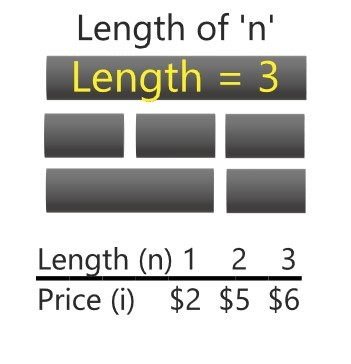

In [9]:
base64_data = "/9j/4AAQSkZJRgABAQEAYABgAAD/4TjmRXhpZgAATU0AKgAAAAgABgALAAIAAAAmAAAIYgESAAMAAAABAAEAAAExAAIAAAAmAAAIiAEyAAIAAAAUAAAIrodpAAQAAAABAAAIwuocAAcAAAgMAAAAVgAAEUYc6gAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFdpbmRvd3MgUGhvdG8gRWRpdG9yIDEwLjAuMTAwMTEuMTYzODQAV2luZG93cyBQaG90byBFZGl0b3IgMTAuMC4xMDAxMS4xNjM4NAAyMDIxOjEwOjIzIDA3OjI1OjA0AAAGkAMAAgAAABQAABEckAQAAgAAABQAABEwkpEAAgAAAAMyNAAAkpIAAgAAAAMyNAAAoAEAAwAAAAEAAQAA6hwABwAACAwAAAkQAAAAABzqAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMjAyMToxMDoxMCAwNDowOTozNQAyMDIxOjEwOjEwIDA0OjA5OjM1AAAAAAYBAwADAAAAAQAGAAABGgAFAAAAAQAAEZQBGwAFAAAAAQAAEZwBKAADAAAAAQACAAACAQAEAAAAAQAAEaQCAgAEAAAAAQAAJzoAAAAAAAAAYAAAAAEAAABgAAAAAf/Y/9sAQwAIBgYHBgUIBwcHCQkICgwUDQwLCwwZEhMPFB0aHx4dGhwcICQuJyAiLCMcHCg3KSwwMTQ0NB8nOT04MjwuMzQy/9sAQwEJCQkMCwwYDQ0YMiEcITIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIy/8AAEQgBAAD3AwEhAAIRAQMRAf/EAB8AAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKC//EALUQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+v/EAB8BAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKC//EALURAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/aAAwDAQACEQMRAD8A9/ooAKKACigAooAKKACigAooAKKACigApM0ALRQAUUAFFABRQAUUAFFABRQAUUAFFADJCVjZh1AJrm/h7rV74h8E2Gqag6vdTGTeyqFBxIyjgewFAHRXFxDawma4mjijXq8jBQPxNMtb61vovNs7mG4jBxuicMM/UUARS6tp0EJllv7WOMOULtKoAYdRnPX2q1FNHPEssMiSRuMq6NkEexoAq/2tp32v7J9vtftOceT5q7/yzmqms+IrLSdBudVE0EyRRu8aiYASso+6D60AYuq+Jf7R+Gd9q1jcpDdnTvPKwzBmgYrnGR0IrU0PWbX+wtJW91CAXk9pE5WWYB3JUc4Jyc0Ab1MlljgiaSV1jjUZZmOAB7mgCvaapYX7Mtne21wV+8IpVbH5GuL8bay8viPRPDtvrX9nQXbStezwTKkiBFyF3fwZoA7XTbdbXTbaBLmW5SOMKs8sm95B6lu596xNG1i9u/F3iWwuWX7JYG3+z/KBgOhLZPfkUAa8us6ZBHHJLqNokcv+rZplAb6HPNZXjjV7zRvB15qWmsv2mMxeWSu4YaVFPHfgmgDoIyWjUnqQDT6ACigAooAKKACigAooAKKAGTf6iT/dNcV8Iv8AkmWlfWb/ANGvQBg+M7qXUviRb6XcaNc6xYWNkLkWMLAB5GbG9geCAOMe9T+HLPUIPH0F3p/ha50LS57doryIlRG7DJRtqnAPagCLwB4W0jVxr15qlnHesNVuIo0nG9Ixnnap4BOeT7CoNNvrjwz4S8d2unyOsWl3ki2YJJMIYDgZ9M5+uaAN7SPAHhx/B9uZtPilup7UTSXjczeYV3bg/UHJ7Vzej6ZZ33wHma7t453torqSFnGSjgt8w96ANT+x9O074K3V1ZWcME91oyvPJGuDIdmcn15J/Oli8DaDN8MfPmsY5b59N883jjMofy8ghuoA4AHTAxQB1vgi8n1DwRo11cyNJNJapvdjksQMZJ9eK57xbAuveP8AQfDl6zHS2gku5YNxAmdfug46gdcUAVPHGhab4Ws9N17QrKHT762vYo82yhPNRjhkYDrn3pvirw9o9z8UfDKzadbut8ty10GT/WlY+C3rigD0m3gitbeO3gjWOGNQiIowFA4AFR34/wCJfdcf8sm/kaAPNvh34M0PVfh7ZXGp2Md7PcxuDJMNxjXcwCof4B347k1ufCyaaXwLbwzyNL9mnlt0Zjk7VcgD8Bx+FAHa0UAFFABRQAUUAFFABRQAUUANddyMvqMV59ovgjxb4f0mHTNO8X28drDuKI2mKxGSWPJbPUmgDV1Xwjf3txpurWusC28QWUHkvdiAGO4U9VdM9M5I9M/Sr2i6d4ii1BrzW9ZguF8sxpa2tv5cakkHeSSSTxj8TQA7wt4dbw5bX8JuRcfar2W6BCbdu8/d6nOPWqlt4StrZPEw1C5Waz1iVppVK7PKUrgjOe3XPFAGDPoms6D4bms7rxdAnh+CE4mMGLjy/wDnmHzj2BAJ9Kt+AdDFz8KLbTbsPGl5DLkY+ZVdmwefYg0AWLTwlrA8IX3hu/1e2mtmtRa2ksdsVZFwRlxu5PQcHtW/FpBj8KrovnZIs/svm7f9jbuxn8cZoAXw3pB0Hw5Y6U0wmNrEIzIF27sd8dqpeJfC/wDbk1nfWl6+n6rYsWtrtED4B6qynhlPpQBmjwnrOr6jZ3HifV7e6trKQSxWdpbmNHkHRnJJJx6dK1NT8OtqHizRdbFyEGmrMDDsz5m9dvXPGPoaAN+o7iLz7aWLON6Fc46ZGKAMnwpoR8NeGLPR2uBcG3Vl80Jt3ZYnpk46+tM8J+H28M6M2ntci4zPJNvCbfvtnGMnpQBu0UAFFABRQAUUAFFABRQBVfUrGN2R7y3VlOCDIARTf7V0/wD5/rb/AL+rQAf2rp//AD/W3/f1aP7V07/n+tv+/q/40AH9rad/z/W3/f1f8aP7V07/AJ/rb/v6tAB/aun/APP9bf8Af1aiuL3Sbu1ltri7tZIZkMciNKMMpGCOvpQBysPgfwFDOsvlwSBG3LHJeMyKf90tj8664appqqFW9tgAMACVeP1oAX+1dO/5/rb/AL+r/jR/aunf8/1t/wB/VoAP7V0//n+tv+/q0f2tp3/P9bf9/V/xoAP7W07/AJ/rb/v6v+NH9q6d/wA/1t/39WgA/tXT/wDn+tv+/q0f2tp3/P8AW3/f1f8AGgBP7V07/n+tv+/q/wCNH9raf/z/AFt/39X/ABpAL/a2n/8AP9bf9/V/xo/tbT/+f62/7+r/AI0wAarp5IAvrck9P3q1coAKKACigAooAKKAPBdcm3a9fnP/AC8P/wChGqHm+9AGto9hFqNtqEkkkim2gMi7SOTg9ePasnzfeualWlOtUpv7NvxRTWiYeb70eb710kh5vvR5vvQAeb7mjzf9qgCa1jkvLuK2iI8yVwi7jxk0t7E1lezWzuGeJipK9CRWPto+19l1tcdtLml4lt4LG/gjt4witbo5A7k55rG833rLA1JVMPCct2VNWkw833NHm+9dZAeb70eb70AAk5GWwO9bsJ8NvMLcyahljtE52gZ9celcOMliUk6FtN7/AJFw5ftFDV7JtK1KS0aTftwVbpkHpVHzfeujD1VWpRqW3VxSVnYltpf9Lh5/jX+dfQg6VsSFFABRQAUUAFFAHznrc+Ne1AZ/5eZP/QjVDz/egDqfCUu6w172s2/ka5b7R71wYb/eq3/bv5Fy+FHV6fax6d4ei1VrE313csVhjKFkjUfxEd6fJGda0G9uZdMWzvbJRIGjjMayJzkEH05/SvNniW6jr+02la3lez0NeXS1hLI6fB4IGoXVqk0yXJVARguewJ647/hTrK6t/EulahDJYW0F1awmaKSBNmcdQf0/OlN1/fr879yWi8rq4Ll0jbdFLQbe0j0u81u/j86K2ISOE9Hc+vtyKtaPrdnrGr21pf6ZaIGkHlNCmMN2BHcHpWuJVas6tWE2uTb5K7uKNo2T6i2N7HYeOZrSO0t2SS8CKWTPl/N/D6f/AFqq+KtYWTUryz+xWsZjmP75E/eNj1NFKjOeMhNzfwpg5Whaxr+KdTttLvLKQW0NxdvbJ/r13KiDOMD1Jz+VZmt/Zb/w5aa3bWyW8hlME8cXC55Of0/WscFGrTjRq82jdrdLO45tNtHMef71p6a+jPC51K4u45Q3yiFQRj8e+c17mIdVQbo2cjGNr6lz/ilf+f3Uv+/a1i3E0IuZBbO7QhjsLjDEds1jhZYpyft0kvIcuX7JF5/vXU6No2l3XkzPrULyYDfZQAjM393LH146UswxFSjSvThzX/DzCnFN6szPEl5eS67cNfQG3myB5Wc7V7c9+O9ZPn1thIxjQgoaqyFO/M7k1pPm8g/66L/OvpQdK6CRaKACigAooAKKAPmHX5wviLUlz0upP/QjWd9pHrQB2fgPzLy116GFS8j2ZVFHckEAVlt4S8RIrM2lyhVGSd6/414312jh8XVjUdr8tvuNuRyirHQaffanqXgu1j0G5YXti7LPbxth2UnggHrWXez+L4tLuJ9QnuobULscTvt3542gdT1rnoRwkakqdWPv8z79XdMp81rrYc8w/wCFXRv/ANP+P0NL4Cm33Or89NOkP6itZ/7rW/xP80SrcyHeHWGt+FNR0S3kQXwkFxFGxx5gGMgfl+tO8L+H9Qt/EFpcalC1nDHKNpm4Mj9lUdzms6uJhh416Mvid2vO6Q4xcuVlSa9itviSXlcJGmojcxOABu6mm+MNP1C01u/vZrWRLWSclJv4WB5HNdNOpGniKXN9qFl66EtXi7dyf4gTBNZshnrYRH9WpBMP+FXs+f8AmJY/8crOl/utD/Ev1G/ikcp9pHrWppmtadZwOl3pMV65bcHeZk2j04r1MRTnUhy05cr7mcXZl3/hJtD/AOhZt/8AwJesO5voprqSSKIQxsxKxhshR6ZrHC4etSk3UqOQ5ST2QtmHvr2G0hK+ZM4jTccDJOBWyvhTxC10IP7MmVs43nG0e+7pVYjGUaD5ajtoEYOWxY8canbz6tbwQzpcPa2yQyzL0dxnPP41zH2ketLL4uOGgn2CesmT2VyDfW4z/wAtV/nX1QOldhAUUAFFABRQAUhoA+e/EHw/8UXPiLUp7bSpZIZbmR0cOuCCxIPWs7/hXHi7/oDS/wDfa/40gJIfAHjW3JMOmXUZPUpKoz+RqU+CfHhGDZ3xB7faB/8AFVnKjTk7uKv6DUmRQ/D/AMaW0gkg0y5ikHRo5VUj8Qafc+BPHN4wa60+8nI6GWYNj82pulBy53FX7hd7Ef8Awr3xn5Pk/wBl3Hl5zs81cZ9cZoj+HvjOEsYtLuELDDbZFGR6dafLG1rBdlmy+GfifyJbhovsU8LKYxI+Nw5yQy5wRgdfWug8N+DNdttVTV9WmkvJLVS0MEcplZmwRyTwPzryMdXU5SoRp3m9E7d/M1gtL30OavfAPjG9vri6k0abfNI0h+dOpOfWiXwL45ngSCWwvJIk+6jzgqv0G6vVVKNkmtjLmZHJ8PfGczBpdKuHYDALSKcD060f8K98ZeT5X9lXHl53bPMXGfXGetUoRSskF2M/4Vx4u/6A03/fa/40f8K48Xf9Aab/AL7X/GqEH/CuPF3/AEBpv++1/wAaP+Fb+Lv+gNL/AN9r/jQAf8K48XZz/Y03/fa/41cbwd8QXg8l7fUGixjYbnIx6Y3VE6UJ2cknbyGm1sU/+FceLv8AoDTf99r/AI0f8K48Xf8AQGl/77X/ABqxE1p8O/Fkd5A76PKFWRSTvXgZ+tfR46UwFooAKKACigAo+tAEX2iD/ntH/wB9Cj7RB/z2j/76FAC/aIP+e0f/AH0KT7RB/wA9o/8AvoUAH2iD/ntH/wB9Cj7RB/z2j/76FACi4hJwJoyT/tCn0AM82P8A56J+Yo82L/non5ikAvmx/wDPRP8AvoUebH/z0T/voUwDzY/+eif99CjzY/8Anon/AH0KADzY/wDnon/fQp/SgBNy/wB4fnRuX+8PzoANy/3h+dG5f7w/OgA3L/eH50bl/vD86ADcp7j86WgAooAKKACigAqpqjmPSbyQdVgdvyU0AeB+cf7x/Ojzj/eP50AHnH+8fzpPOP8AeP50AHnH+8fzo84/3j+dAFnTp2Gp2p3H/XJ39xXvxOBn0oA+eTcMTneefejz2/vn86ADz2/vn86PPb++fzoAPPb++fzo89v75/OgCa1nb7ZB85/1i9/evbPEzFPDGpMDgi3bn8KAPDvtEn/PRvzo+0Sf89G/OgA+0Sf89G/Oj7RJ/wA9G/OgA+0Sf89G/Oj7RJ/z0b86ANnwlPI3ivThvPMvr7GvbaACigAooAKKACs/Xm2+HdTb0tJT/wCOGgD52+0UfaKAD7RR9ooAPtFH2igCzp0+dTtB/wBNk/mK+jZTiBz6KaAPmn7R70faPegA+0e9H2j3oAPtHvR9o96AJrSfN7AM9ZF/nXvPi07fCWqH0t2oA8A+0e9Hn+9AB5/vR5/vQAef70ef70Ab3gybPjHSx6zf0Ne90AFFABRQAUUAFZviH/kWtV/685v/AEA0AfMn2ketH2ketAB9pHrR9pHrQAfaR60faR60AXNJnDazZLnrOn/oQr6elGYHHqp/lQB8q/aPej7R70AH2j3o+0D1oAPtA9aPtA9aALFjcZ1C2Gesq/zFfRHjI7fBmrH0tm/lQB84faPej7R70AH2j3o+0e9AB9o96PtHvQB0PgSfd430lc9Zv6GvougAooAKKACigAqnq0LXOj3sCAl5beRFA7kqRQB81f8ACFeKP+gFqH/fhqP+EL8Uf9ALUP8Avw1Aw/4QvxR/0AtQ/wC/DUf8IX4o/wCgFqH/AH4agA/4QvxR/wBALUP+/DUf8IX4o/6AWof9+GoAu6P4O8Sxa3YyS6LfrGlxGzM0DAABhk19J9Rg96BHy63g3xOGI/sLUTg9rd/8KP8AhDvE/wD0AdS/8Bn/AMKBh/wh3if/AKAOpf8AgM/+FH/CG+J/+gDqX/gM/wDhQAn/AAhvif8A6AOpf+Az/wCFH/CG+J/+gDqX/gM/+FICzYeEPEqajau+h6iqrKpYm2bAGR7V9AeMIJbnwdq0EEbySvauERBkscdAKYHzj/wjHiH/AKAmo/8AgM/+FH/CMeIf+gLqP/gM/wDhQAf8Ix4h/wCgLqP/AIDP/hR/wjHiH/oC6j/4DP8A4UAH/CMeIf8AoC6j/wCAz/4Uf8Ix4h/6Auo/+Az/AOFAHQ+BtA1u18baVPcaVewwpNlpJIGVVGD1JFfRFAgooAKKACigAooAyZfE2iwyvFJqMKuhKsCTwRTP+Eq0L/oJwfmaAD/hKtC/6CcH5mj/AISrQv8AoJwfmaAD/hKtC/6CcH5mj/hKtC/6CcH5mgA/4SrQv+gnB+Zpf+Er0L/oJwfmaAD/AISvQv8AoJwfmaP+Er0L/oJwfmaAD/hK9C/6CcH5mj/hK9C/6CcH5mgA/wCEr0L/AKCcH5mj/hK9C/6CcH5mgB8HiTRrmdIIdQheWQ7VUZyTWozBVLMQABkk9qAM7/hINH/6Cln/AN/l/wAaX/hINH/6Cln/AN/l/wAaAD/hINH/AOgpZ/8Af5f8aP8AhINH/wCgpZ/9/l/xoAP+Eg0f/oKWf/f5f8aP+Eg0f/oKWf8A3+X/ABoAVNd0mR1RNStGZjgKJlJJ/OtCgAooAKKACigAooA+f9Umzq94fWd//QjVTzRQAeaKPNFAB5oo80UAHmijzRQAeaKPNFAB5oo80UAHmijzRQBq+GpP+Kn0znrcoP1Fe26gcabdH0hc/oaAPn3zfejzfegA8z3o8z3oAPM96PM96AL2jyf8Tux5/wCXhP8A0IV77QAUUAFFABRQAUUAfNupzn+1rzn/AJbv/wChGqvnn1oAPPPrR559aADzz60eefWgA88+tHnn1oAPPPrR559aADzz60eefWgA88+tHnn1oA1/Ck27xZpIz1uo/wD0IV71qpxpF6fSB/8A0E0AfN3n+9H2j3oAPtHvR9o96AD7R70faPegC/ok+de08etzH/6EK+jaACigAooAKKACigD5a1e4C61fqT0uJB/48ap/aR60DD7SPWj7UPWgA+1D1o+1D1oAPtQ9aPtQ9aAD7UPWj7UPWgA+1D1o+1D1oAPtQ9aPtQ9aANzwbcBvGejr63cf86+idX/5At9/17yf+gmgR8t/aR60faR60DD7SPWj7SPWgA+0j1o+0j1oA0dAuAfEWmjPW6j/APQhX0/QIKKACigAooAKKAPBtW+FPia61m9uIIrcxSzu6EzAcFiRVP8A4VD4r/5423/f9aBh/wAKh8V/88bb/v8ArR/wqHxX/wA8bb/v+KQB/wAKh8V/88bb/v8Aij/hUPiv/njbf9/xQAf8Kh8V/wDPG2/7/ij/AIVD4r/5423/AH/FAB/wqHxX/wA8bb/v+KP+FQ+K/wDnjbf9/wAUAH/CofFf/PG2/wC/4o/4VD4r/wCeNt/3/FAB/wAKh8V/88bb/v8Aij/hUPiv/njbf9/xQBreGPhj4k0rxPpt/dRW4gt51kciYE4B9K9nv4mn066hQZaSJkUe5BFMR88/8Kt8X/8AQMH/AH/j/wDiqP8AhVvjD/oGD/v/AB//ABVAw/4Vb4w/6Bg/7/x//FUf8Kt8Yf8AQMH/AH/j/wDiqAD/AIVb4w/6Bg/7/wAf/wAVR/wq3xh/0DB/3/j/APiqAL2i/DXxXaa5YXM+nBYoriN3PnxnADAnvX0BQIKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAqrPqNnbXttZzXCJc3RYQRk8vtGTj6CgC1RmgAooAKTI6Z5oAo6XrFlrEdxJZSmRbed7eQlSuHU4Yc/wA6v0AV7u+tbBYmup1iEsixR7v4nboo9zVigCtPqFpbXdtazzpHPclhCjHBcgZIHvirNAFPUNUsdKhWW+uooEdxGm9sbmJwAB3NXKACigChqus6dodp9q1O8itYS20NI2Mn0HqabpGu6Xr1s1xpd9DdRqdrGNuVPoR1H40AaNFADJJEhieWV1SNAWZmOAoHUk1i6d4z8Oavf/YbDV7ae5Odsaty2PTPX8KAN2igAooAKKACigArivE3/JR/Bv8AvXX/AKKoA2PFviAeGtCe+EayTNIkMKO+1S7HA3HsB1J9q5208W39lr+lWV/q2j6pDqTmEmwOGt5MZGRubcp6Z4oAdY6z4s16XXE02TTbZNOvpbaJ5omfzduMKcMNvB5bnr04pY/HF7e+D9GvLKyi/tfVZ/skcMhPlo6swdj32jYT+VAD7nWPFGieI9D07UJtOu7XUZzG08MLRshCkldpYj0wc+vFUvD8fiD/AIWV4iD3tiUQ2v2keS3zJsO0J83ynHUnOTQBT8KnxKbLxC2jyWMEUOq3TL9ojaRp33ZK8EbR055+ldz4U1tvEXhew1V41jkuI8uinIDAkHHtkUAZrodS+JSrI2YNKsBKidvNlZhu+oVCPxqlaat4r1251yLTn061j0++lt4pZomfzdoBC4DDbjPLc5yMDg0AVdQ1O48S/CZtdeMW+oWiNdIU/wCWcsDkEr9drD6Gu6sLn7Zp9tdAY86JZMemQDQBxHxE0LTk09tY8jffveWiCV2LbF81BhQeF98da7+gAooArXcVnlLu7SH/AEYFlllx+7z1OT06VyfhZBqfjHWfEdnEY9MuIo7eFyu37SyE7pAPTnAPfmgDtaKAGuqujI6hlYYZSMgivONa1ODV/E/h/T7jSrrSI7S+WeO8vIfLEhQHEUbDI+Y+pHToc0Aek0UAFFABRQAUUAFch4r0vWJ/Eeg6vpVnDd/2eZjJFJOIs712jnBoAh1vStd8XeH5rW9061067gmiuLTdceekjqScNhRgdu/WrGjWt++owm58I6ZpscfzSXCyRuxODjywq5HOOTjigC14U0a70ga59rVB9s1Sa6i2tn5GCgZ9Dwa5y28H63aeE9FFsbddY0m+lukjkf5JVd3JTI6ZVhzQBHq0+taj438HrqFjBYYuZZFthOJZDtjJZmIGAOwxnr2rei03VtM8eahqNvZx3VhqqwCWTzgjW5jBUkqfvAg9qAJvCWi3mj2GqxXaoGudRuLiPa2co7ZWpPA2kXeg+DrDTb5VW5gVg4Rtw5Ynr+NAFS4d9K+JUE8q4tNVshbCTsJo2LKp9yrNj6Vd8MaTdaW+uG6VQLzVJrqLa2cowUDPoeDQBzV1YXmi/C99AmCf2lfyzWsMavncZpXP6IxJ9MGu+s7cWljBbKciGNYwfoMUAY3jHSbrWtBFpZqrS/aoJfmbA2pIrH9Aa6CgAooA5Hxnp2sald6WlnYQ3+mxO0t1ay3AiErDHlg8HKg5OOh4rT0e81ye58rUdEgsLdU+V4rwS88YG0KMcfyoA26KAILw3K2crWaRyXIUmNJWKqzdgSOgrj9Rs/EXixLaw1DR4dKs4rmOeaU3azO4Q5xGFHGSOpx9KAO3ooAKKACigAooAK8s8R2Xxfk8Q3r6BqmmxaUX/wBGSVYywXA65QnrnvQBl/2d8d/+gzpP/fEX/wAbo/s747/9BnSf++Iv/jdADm0/465+TWNJxgfwRf8AxuqOo+GvjZq0KRXer6cVjcOpikWJg3TO5EB7nvQBWsPBfxi0y/kvrbUdNN3InlmaaUTPtznaC6kgZ7CtiXT/AI5mZzFrGlCPcdoKRdO3/LOgBn9n/Hf/AKDOk/8AfEX/AMbpyaf8dd679Y0nbnnCRdP+/dAEFxonxvu1RbjUtFlVHWRQ8UJ2sDkEfu+CD3qX+zvjt/0GNJ/74i/+N0ARnRPjbLcxXE+paM8sIbypDFCWQkY4Pl8VJ/Z/x2/6DOk/98Rf/G6AD+zvjv8A9BjSf++Iv/jdH9nfHf8A6DOk/wDfEX/xugA/s747/wDQZ0n/AL4i/wDjdH9n/Hf/AKDOk/8AfEX/AMboAVdP+OuG3axpPTj5Iuv/AH7pP7O+O/8A0GdJ/wC+Iv8A43QAf2d8d/8AoM6T/wB8Rf8AxunDT/jptbdrGlbsfL8kX/xugBv9n/Hf/oM6T/3xF/8AG6P7O+O//QZ0n/viL/43QB1vgS2+IcF9dnxnfWdxbGMeQLdUBD55ztUdq7qgAooAKKACigArkfFeta1Za7omk6MbNJdRMoZ7pGZV2Lu7H60AJo3iPWIvEr+HvEVvaLdNbG6gubNm8t0BwQQ3IIran1ezuLaWOx1SyW6aBpImMqsAB/GRnlQetAEtjcmHRLe41C+tpWEStLcoQkTn+8OcAGpLLVLDUo3ksb23uUQ4ZoZQ4X64NADbXWNNvpnhs9QtbiVPvJFKrFfqAausQqFmOABkmgDkbfWdV1jQX1S3u7PTYZ7tRaNcpndAG25PP3n5I9sfWtGDWLqLxdPo18sXlzQfabGVARuUYDo3+0CQeOxoA3qKACvNH8R+JNf8S276G1lb2sct1BHHcs584x7AxcL06/L6c+tAHaawNekSCLRms4WbJmnuQzhAOyqMZJ9z2rP8M6zql1quraLrKW5vNP8AKYT2wISVJASDgngjBzQB09cH8RPEWoWVpcaRpOyO6bT5ryW4eQqYok4+THO8k8emM0Ab1nc6zZeHbu51hrOS4gjeRHtgwVlC5G4N0Oc5rM8PT+M9St9N1G8udHFjcxRzvFHFIJAjKGwDnGeaAOxrI8Ta4nhzQLnVHiMvlbVRAcbmZgqgnsMkZNAGF4Rl8US6jftqc9hLai6dZEj8zdG+xSAhJxt56VPc6vresa1d6d4eezt4LBhHdXdzGZN0hAOxFBHQHkn1oA6TTxeLYwrfvC92FxK0IIQn1APIqzQAUUAFFABRQAV5944jvpfG/hKPTbiK3uy1z5csse9V/d85GRnjNAGrp/hi6tLu81rWNS/tHU3tmgR1iEccMfJIVR6nqTXN+EtHsIPhDLfraxG8lsbktcFAX/jGN3XGAOKAIYVivR8O9L1EK2mTWZkaGT7ksqxjYGHQ4z0NbPxHgj0fwVeyaZBBafaZYYrp4lEeYy2DuKjpzjPoTQBXHhLWpNU0O8isPD2mpp84fzLKWTe0RBDJ/qxnIPc11/igyDwjrJh5lFjOU+vltigDj/E/ln4X6D5X+r8zT9mPTKYrW8T4/wCE48HFP9b59x/3z5RzQB2FFAAeleYeKNKOg6/Brvhu6jtpnhurueKQ77eUoFLcfwluhI9BQB003iyZ9J0Y2NgZdU1eFZYLaRsLGNoZmkPZVyOnJyKu+HdAbR/td1dXJutTvnEl3cY2hiBhVUdlA4AoA3K4n4k6JpuqeGb+7myt/YWkksMkUm11Uggg+qtggg9eaAH+Fr681qy1rQNbaO4eyb7K91ANgmR0z+DAHBx3rP1jT5fBl3oUujapqBinvYrNrC4uWmjeNv7obJUgDtQB6HVLVbOx1DTprLUo4pLS4AjdJTgMSRgfXOMd84xQB55oFxe+E/FC6PHcm80q+1CS2jjmOZ4WWNW3bv4lxgHPTAp3hfw7Bq134ojv769jki1aYrFBctD5eQCJPlIyT2Jz92gDpfh9qN5qfhOGa+ma4kjmlhW4brMiOVDH346+1dTQAUUAFFABRQAVSudJsbzUbPUJ4N91ZljBJuI2bhg8A4OR60AXGRXRkYZVhgj2qhbaJp1nov8AY8FvssPLaPyd7H5WzkZJz3PegCG58M6PeaNBpNxZK9lbhRDGWbMe3gFWzuBHqDmksvDGk2FldWkdu8sN0Ns4uJXmMgxjBLknHJoArad4K0HSruK5tbWUSQf6kSXMkixcY+VWYheM9BW86LJGyOAysCCD3BoA5bR/C3laI+g6tGt3YWlyHsX8wgmMHcgbByCp49CAPpV2HS7qfxdLq96IxDbw/Z7GNTk4bBdz6E4AA9B70Ab1FABXJ3Pw88P3Gt2+omxiCoZGlgIYpK7YIbGdowQT05z7UAaereFNF1yeCfULQySQIUiZJpIyqnGR8jD0FGk+FtH0O6e50+3ljldPLYvcyyDbkHozEdhzQBs1z3inwhpviixlS5jVLvyWihuhndHn2BG4Z7HigC5beHdJtdFk0iGyijspUKSxoCu/IwST1yfXOarab4N0TSr1b23tpHuUGI5Li4kmMY9F3scfhQBvVV1HTbPVrKSzv7dLi2kxvjcZBwcj8jzQBjaB4M0jw/eXV1a26GeWQskj5Zo0IA2AsSccHnjrU2qeDtD1i9a8vLNjcOoSR4p5IvNUdA+xhuH1oA2La2hs7aO2tokihiUKkaDAUDoAKloAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooA/9n/4THoaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49J++7vycgaWQ9J1c1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCc/Pg0KPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyI+PHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj48cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0idXVpZDpmYWY1YmRkNS1iYTNkLTExZGEtYWQzMS1kMzNkNzUxODJmMWIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyI+PHhtcDpDcmVhdG9yVG9vbD5XaW5kb3dzIFBob3RvIEVkaXRvciAxMC4wLjEwMDExLjE2Mzg0PC94bXA6Q3JlYXRvclRvb2w+PHhtcDpDcmVhdGVEYXRlPjIwMjEtMTAtMTBUMDQ6MDk6MzUuMjM4PC94bXA6Q3JlYXRlRGF0ZT48L3JkZjpEZXNjcmlwdGlvbj48L3JkZjpSREY+PC94OnhtcG1ldGE+DQogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICA8P3hwYWNrZXQgZW5kPSd3Jz8+/9sAQwADAgIDAgIDAwMDBAMDBAUIBQUEBAUKBwcGCAwKDAwLCgsLDQ4SEA0OEQ4LCxAWEBETFBUVFQwPFxgWFBgSFBUU/9sAQwEDBAQFBAUJBQUJFA0LDRQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU/8AAEQgBbAFfAwEiAAIRAQMRAf/EAB8AAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKC//EALUQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+v/EAB8BAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKC//EALURAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/aAAwDAQACEQMRAD8A/VOiiigAooooAKKKKACiiigAoorP1rWLHw7o99q2p3Udjp1jA9zc3UzbY4okUs7sewABJ+lAGhRWH4R8Y6H4+8P22ueHNUtda0i4LCG9s5BJE+1irYI9GUj8K3KACiiigAooooAKKKKACiiigAoorzL4NfH7wx8dm8SDw5HfodAvjp959uhWPMgzymGbI+U88UAem0UUUAFFFFABRRXPeOfG+i/DfwpqXiXxHqEel6Lp0fm3N1ICQoyAAAASSSQAACSSAKAOhorwL4E/tieE/wBobxbdaH4b0DxNZxxWsl5HqmqWMcVpOsciIyo6yMS2ZFIGOgOcYwffaACiuc8O/EDw54s1bW9M0bWrPU9Q0WcW2pW1tKHe0kJYBJAPunKP1/umujoAKKKxPF3i7RfAeg3Wu+ItTttG0e12effXkgSKPc6ouWPTLMo+pFAG3RVTT9QttWsba9s5kubS5iWaGaM5WRGAKsD3BBBq3QAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXmX7T3/Jt/xT/7FfU//SWSvTa8y/ae/wCTb/in/wBivqf/AKSyUAea/wDBOX/k0PwZ/wBdb7/0smr6Xr5o/wCCcv8AyaH4M/6633/pZNXpv7SHjy8+GPwJ8ceJtPO3UNP0yV7Zv7krDYjfgzA/hQByvxW/bQ+Efwb8QS6F4h8T51mHiex0+3kungPHEhQFVbBztJzjtXa/CP45eCPjpocuq+Cteg1mCBglxCFaKe3Y9BJE4DLnBwSMHBwTivz6/ZC/aU+C3wP8Arc694d17VvH2pyyz6rrS6UlyX3SErHHK0mdm3aT0yxJOeK1fhX8XvC3iL/goH4a8QfDHStS0Hw74msJLHXLO5shbJLceXM24IrFQCY7ds9Swc4yxyAfc2uftC/D7wz8QLvwVq/iSHTfEFpYHU54bqKSOGO2C7jI05XywMdi2a840X/goN8DNc8UQ6HD4vMEk0nlR3l1ZTQ2pbOBmVlAUf7TYX3rwb4pfDPSPiv/AMFNdO0PxBD9r0ZdFivLmzP3LkRQsyxv6qX2kjuBivb/ANub4R+F/EP7MPiuX+xbG3u9BtBfadcW8CxtbNGwJVSoGFKF1K9PmzjIBAB9MKwYAg5B6Gvnvx/+3h8F/hx4kuNC1LxU11qNtIYrhdNtJblIXHVWdV2kg8EAkg8djjy7UfjBrXhP/gmNp3ieC7kXW20G30qC6ViHXdOtqHDddyx5OeuRmvSP2K/gN4W+G/wJ8JalDpFnN4g13TYNSv8AU5IlknlM6CQR7yMhFVgoUccE9STQB1+j/tZfCrxDq3hTTdL8Xwahd+KCy6UlvbTv5zKcMjkJ+6ccZWTaRkcc187f8FGP2otN8N+D7zwF4U8YahovxAtNStXvrfT1uLeRbV4Gkx56qFIO+EkK+ecdjXN/G74T+Hvhz/wUK+DmoeHdOt9Ih16ZLm6tLRBHF9oR3VpAo4XcpTIAGSpPVia7P/gqf4f0uH4A2erJptnHqkviC1SS+WBBO6+ROMF8biMKvGew9KAPdfgb+1B8N/jhcf2J4Q8SPrGsWNilzcwtY3MJVAVRm3SRqp+ZgOCTzXy1+xT8YPCHwX8P/GrXfGWt2+i2H/CVtHGZctJM/wC8OyONQWdsc4UHjmvuLwV4T0TQ9Ls7rTNF0/Trma1jWSa0tUidxtBwWUAkZ9a+F/8Agnp8JPD3ir4lfFjxdrVhDqt7pWuSWunxXSCSK3Z5JGklVTkbyFQBsZAB9aAPqf4QftefCr45a8dD8KeJfO1sI0iafeWstvLKijJZN6gPgZOASQASRjmvaa+Dv+Cg3hHS/AfxC+DXxH0Syi03X4fEMdtcXFmoia5UOkib8cEjbIMkchyDkYFfeNABXz/8RP26vgx8Mtcn0bVPFq3up27bJ4NKtpLoRMDgqzoCgYEHK7sj0qT9uH4jaj8L/wBmbxhq2j3D2uqTRxWMFxG21ovOlWN2U9mCM+COQcGqf7G/7PvhT4X/AAS8KXsOkWN1r+sadDqOoapLCsk8rzIJNgcjIRQwUKOOM9SSQDv/AIP/ALQngD472c9x4L8R2+rSW4DXFmytDcwg92icBtueNwBUnoa+SP8AgqB8dfCl98P5/hjY6yzeMLPV7O41DTRbTKFtzA8gPmFfLbmSE4DE89ODi7+1t4Zsf2f/ANpb4NfE/wAHWUOkXmsao2l6zb2seyK7QtGpJRRjc0csoJ9VjOMjNan/AAVS8P6XB8BdO1aLTbOPVZvEVrHLfLAgnkX7NcDaz43EYVeCf4R6UAe9fs9/H74YfFjTF8P/AA71db1dBsYEktEsJ7ZbeLGxAPMjUEfLj5fSvZa5zwj4T0Pw7p8E2laNp+mSzQRiR7O1jhZxgHBKgZ/GujoA+Wv2T/AXiPwj8dP2itS1rRL3TNP1rxBFc6bdXUJSO7iEl2S8bHhhh16f3hXp19+1B8MdL1zxdpV/4rt7C/8ACiB9XW6gmiW3BICgOU2yElgAqFiSeBXq9fnp8JPhbofxI/4KK/F248Q2cep2Whn7bDY3Ch4XuD5SI7oeG2hnIBHUg9qAPor4d/t0/Bv4neLrfw1o/ikpql04itBf2kttHcyHACI7qBuJOApwSeBk1P8AtyeEda8dfst+NdD8PaZdazrF19i8ixs4zJLJtvrd22qOuFVj9Aa8j/4Kc/DXRJvgRb+LbXTrez17Q9TtvJv7WMRyiGQ+WYywxkbvLI9CgxjmvrX4e6xP4g8BeGtUum33V9pltcytjGXeJWY47ck0AVfhbY3Ol/DHwhZXkEltd22kWcM0Mi7XjdYEDKR2IIIrq6KKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8y/ae/5Nv8Ain/2K+p/+kslem1HJGsiFHUMrDBVhkEelAH5u/si/t5fDP4JfAXw94O8RprZ1ewkumlNnZLJFiS4kkXDGQZ+Vx265r6P8P8Axt8CftzfDj4ieCPCj6laytpRt5bjU7URLE8yuIXAVyW2um4jjp719Ff2PYf8+Nt/35X/AAqW3sre13GCCKEt18tAufyoA+B/2Y/2tNI/Zp8Hj4RfGq11LwjrvhuaaK2vJLKSeGe3Z2dDmMMxwWYKyqVKbCD1r6H+DX7XvhP4/fES98O+C9P1a/0ywsHu7jX7i2aC2Dh41SFQw3FmDufm2/6s4B6j2bWPDuleIYVh1XTLPU4VyVjvLdJlGeuAwNWLHT7XSrVLWytYbO3T7sVvGERfoAMCgD4xk/5SpRf9iv8A+0TXu/7YX/Jr/wATP+wJP/KvXDbxNMsxjUzKMCQqNwHpn8adJGsiFHUMrDBVhkEelAHxx4B+FFz8b/8Agmvo3g6wZE1O90fzbIyEKpniumljUk9AzRhSewY1zv7N/wC3Z4O+Gvwy03wD8WG1DwZ4s8JwrpTwXGnTyedHEoWLiNCUYJtBDAA7c5+bFfZvjLxBF4D8D69rqWEl7Fo+n3F/9hs1HmTeVG0hjQf3m24Hua+Zbj/goB+zj4ksYtV1e6kOp26/u7LUtAklu4z12qwRkBz/ALeM0AeEeJvihq/xr/bl+Cvik6Fe6H4YnmEWgxagmy4urZHkL3TR9VV2J2+qoD719Df8FJvBOqeNP2YtQfS7Sa9l0fUINUmjgXcwhRZEkfHXCiTccdApPQE1wXwNbXf2rv2sLf43Noj6H4A8K2UmlaH9sUrLekrKofHTP792JHC/IvJBNfdFAHhH7OX7VvgL47wWOieG7+4n1200iO8v7OW0kiFtt2RspdhtY7nH3SRjvXj3/BNX/XfGr/saW/8AalfYun+H9L0m5uLiw020sri4IM0tvAkbykdNxAyfxq5Dbw2+7yoki3HLbFAyfU4oA+Mf+CnH/Iu/Cj/sa4v/AEA19q1BcWsN0gWaJJlByFkUMM+vNT0AeWftNfCJ/jp8D/FPgyCVYL++gWSzlc4VbiJ1liDHBwpZApOOjGvm/wCAf7cPhn4S+BdM+HfxlttW8D+L/C9qumu13YTTR3UUQ2RMpjVmyVUDJG1sbgxDcfcdZmr+G9J8QLGNU0uy1IRnKC8t0l2n23A4oA+Gb7xNN+3t+0T4Gn8LabfQfCvwDeHULrXLyIxLf3IeNhGinnny0AB+YKzlgOBXWf8ABVr/AJNt0j/sZbX/ANJ7mvsa1tYbK3SC3hjghQYWOJQqj6AdKW4tormPZNEkqZztkUMP1oAh0n/kF2f/AFxT/wBBFXKaqhVAAwBwBTqACvib9mn/AJP+/aC/64x/+hxV9s1CtvEkzSrGiyNwzhRuP1NAHzB/wUs/5NN8Q/8AX7Y/+lCV7v8ACH/kk/gr/sCWX/ohK6maGO4jMcqLIh6q4BB/CljjWNAiKFVRgKowAPSgCSiiigAooooAKKKKACiiigAooooAKKKKACiiigAprMEUsxAA6k06vPP2grxrH4L+LpVOG+xMmf8AeIX+tAHc/wBpWnP+lwf9/B/jR/aVpz/pcH/fwf41+U/9qT/893/76NH9qT/893/76NAH6rjUbRs4uYTjr+8H+NH9o2jZxdQnHX94P8a/Kj+1J/8Anu//AH0a6+LwHr03w/fxit3b/wBlIdpj81vO/wBZ5fTbjr79K48RiqGF5PbTUeZqKv1b2RcYuV7dD9KP7Us/+fuD/v4v+NH9qWf/AD9wf9/F/wAa/Kj+1J/+e7/99Gj+1J/+e7/99Guwg/Vf+1LP/n7g/wC/i/40v9pWnX7XBj/roP8AGvyn/tSf/nu//fRo/tSf/nu//fRoA/Vj+0rTnN1CMHB/eD/Gj+0rTnN1CMHB/eD/ABr8p/7Un/57v/30aP7Un/57N/30aAP1Y/tK05zdQjBwf3g/xrDuPDvhK61T+05tM0WbUev2yS3hab/vsjPYd+1fmH/ak/8Az2b/AL6NH9qT/wDPZv8Avo0Afqv/AGtZf8/cH/f1f8aP7Wsv+fuD/v6v+NflR/ak/wDz2b/vo0f2pP8A89m/76NAH6r/ANqWfP8ApUHH/TRf8aX+0bT/AJ+oemf9YP8AGvyn/tSf/ns3/fRp7X12IRKXlETEqH52kjqM+vNTzLYD9VP7RtOf9Kh6f89B/jR/aNp/z9Q9P+eg/wAa/Mr4d6YfGXjPTNGuLuaCG7dlaSI/MuEZuM/Sj4h6W3gzxlqeiwXk1xFaOqrJIcMcorc4+tef9fo/XfqF/wB5y81vK9r3NfZvk9p0vY/TX+1rL/n7g/7+r/jR/a1l/wA/cH/f1f8AGvyo/tSf/ns3/fRo/tSf/ns3/fRr0jI/Vf8Atay/5+4P+/q/40v9o2n/AD9Q9M/6wf41+U/9qT/89m/76NH9qT/89m/76NAH6sf2jaf8/UPTP+sH+NH9o2n/AD9Q9M/6wf41+U/9qT/89m/76NH9qT/89m/76NAH6r/2pZ8f6VBz/wBNF/xo/tay/wCfuD/v6v8AjX5Uf2pP/wA9m/76NH9qT/8APZv++jQB+qv9qWXa7gB/66L/AI0f2rZ/8/UH/f1f8a/MnwV4a134gaudO0giSdYzK7Sy7FRAQNxP1I6ZPNejx/s5+JbiGX7N4g0m4uYuHhjnkO0+hO3g/UV8/jc9y3LqvscVWUZdu3r2OiFCpUV4q6PvD+1LPH/H3Bj/AK6L/jR/aln1+1QY/wCui/41+XvibTNa8IatLpurRy2l3HztZshlPRlI4IPqKy/7Un/57N/30a9qjVhXpxq0pKUXqmndNGLjyuzP1X/tSz6/a4Mf9dF/xo/tSz/5+4Mf9dF/xr8qP7Un/wCezf8AfRo/tSf/AJ7N/wB9GtiT9XopknjDxuroejKcg1JXiP7H05uPgrZszb2+2XAJzn+KvbqACiiigAooooAKKKKACiiigAryn9qSb7P8BPF75x+4iH5zRivVq8f/AGupPL/Z18ZN6Qwf+lEVAH5u/wBoD1o/tAetc1/aHvR/aHvQB0v9oD1r6N064z+yBdy/9NG/9KxXyb/aHvX0/pdxn9ii9kz/AMtG/wDSwV8Bxdtgf+v8Duwv2/Rngv8AaA9aP7QHrXNf2h716r+zT4TtvH3xStLe+TzrKwha/lhYZEmwqFU+251JHcAjvX12Y42nluEqYyrtBNv5dPmctODqTUF1NXwn8EPGvjDTo7+z0sQWcq7o5ryVYvMHYgHnB9cYrF8c/D/xH8OZYl1zT2toZjtiuEYPE5xnAYd+vBweK7n46WnxO8eeNb1LTw/rS6FZStFZRQROI2CnHm4HBLYyD6EV2Pww8N+MfGfwp8W+D/G2n38OyBX0u61JHLq+GKgE8kI6IQM9GI6YFfm3+s+Mw9Knj61Sk4Nq8E/eSbSve+rV9VY9D6vBtwinfv0Z4R4N8L6x4/1V9N0O2F5eJEZ2jMqR/ICATliB1YV0Hhf4N+MfF1xdx2Ol7Y7Sd7eWeeRUiEiMVZQ2fmwQR8ua1f2NbkzfFa9Un/mEzf8Ao2Kua+O3xV1PXPiFqlla3k1jpWlXclva2tu5jRWRyGkwD95mBOevNe5XzXM8Rm1XLcGoxioqXNJN2v5Le5jGnSjSVSd9XsO8efDfxL8N/JfW7HyreY7Y7qJxJEzYzt3DoeDwcdDXIfb88A5NfQnwt8RXfxc/Z68aaRrl1JqF1piO8NxM2+XATzYtzHJJDowye3HauA/ZO8KW/jD4lNdXqedbaRB9rVD0M24LHn6ZZvqorPC8RVsPhMZLMYr2mHdtLpSvaz+dxyw6lOKpPSXfp3LPh/8AZ+8d+ILFbtNLWyicbkF7KI2Yf7vUfiBWcnwb8ayeJpNBGjMNSSA3QVpo1R4gwUsrltp5YcA556VhfGL4yav468bahKmoTw6XbXDR2VvFKVRUViFfA6scZz15r2n9kP4pap4mv9R8N6tcSaibS1+1WlzcMXlij3orx7jyVyUIHbB9scOOzLiHLsulmdRU2t3Gzur+d9bX1LhToTmqav69zxvwt4I1/wAZ65eaRpNmLnUbNWeaEzIm0KwVuWIBwxA4NfRfxo+F/iPxV4Q8H2Oi6ck1xp8JW5jE0cYRjHGOpYA8qelfJmveJtQ0PxprsunX9zYTNeTo0lrM0bFfMJwSpHGQPyr6E/aY8Vatovw/+HdxZapeWc1zbEyyQXDo0h8qI5Yg88k9fWuXO55lVzXLpUJxXNzWum7Pl1vZ6rsVR9mqU7p9L/ecf8I9LvvDPx40XR9Ti+z39vO6SxB1faTCx6qSDwRWx8SPh/4i8ffGbxPDoenSXSQzRiSdiEiQmJDgueM+3WuA/Z/1q51b46eGp7u5luriWeQvNM5d2/cv1JOT0rqv2rPiRe/8J9eeGLGd7LTrMRyXMcDFBcTuiuXfB+bClAM9MVtinj1xLCGH5faOhZyadl72rtu9RR9n9Xbltf8AQxvG3wh8XeALBr/VdOH9nqVVru3lWRFJOADg5HJAyRjmuD/tAete/fsp+ONQ8dW/iXwfrd7Jqdm1n5sIu2MrIpPluoLfw/MvHY/U18w3E8lpcSwSkeZExRsdMg4NfSZLmWMrYnEZfj0vaUrO6uk1JaOzvZqxz1qcIxjUp7Pv5HQf2gPWj+0B61zf24+tdr8M/ibpngS4v5NT8K6d4pW5VFRNQVSISpOSu5G659ugr6XF1atGjKpRhzyWyTSvr3ehzxSk7SdkZ39oD1o/tAetem/8NKeFP+iR+G/++Iv/AIzR/wANKeFP+iR+G/8AviL/AOM182s1zW+uXv8A8Dh/mdHsqX8/4HmX9oD1o/tAetc9camJriSRVEasxYIOignpTPtx9a+ujtqch1tp4iubCO5S2upYEuYzDMsblfMQkEq2OoyBx7Umna9c6VeQ3VlcSW1zCwaOSFtrKR0wRWL4Z1LTI/EGnNrazS6QJ1+1pAf3hiz823kc496+lfBPiD4EQXkL6NLHpevMdtpca/BPNFFKfusylxHwcHJZfqK+RzzMqeWxf+yzqcy1cY3XbV72OujTdT7aXq/yJP2sr2P7L4NluFWLVpLeVp0UDIXEZwfYNux+NfPH9oD1rs/2hvC/jHw74sGp+Kb1NXj1Af6NqVuoWFlUDEYUfcIGOO/XJOTXlH24+tHCdGFDJ6NOnNTWruttW21r2vYMVJyqttWOk/tAetH9oD1rm/tx9aPtx9a+vOQ/S79iuQTfA20cd764/wDQhXvFfPv7DMnm/AGxbr/p1z/6HX0FQAUUUUAFFFFABRRRQAUUUUAFeL/tjNt/Zq8btnGIID/5MRV7RXi37ZSGT9mPx/tGStir9P7s0Z/pQB+Tv9oj+9R/aI/vVyP25/71H25/71BVjrv7RH96vrHSLjP7CN/Ln/lo3/patfEH25/71e//AAp/bDvPhj8PbXwmfCljrNrA8jmS6uGG/e5fBXaRwT+lfE8UYPF4yjh5YOHPKnUjJq6V0vNnXhpQi5KbtdNHl39oj+9XvP7F/iu2034yfY55Ap1PT5rWLJwDIGSQD8o2H41F/wAN2R/9Ey0H/vv/AO114n8Rfi9deOPiEfFljYQ+GrpfJaGHT2IELxgAOpAHORnpWVf+0c8w1bAYvC+xjKLSfOpa9NEVH2dGUZxlzNPtY9s+Lnxk+J3gH4ja9otx4j1GyjhupGtUbbhrdnJiZTtGQVxz7Edq5i1/aE+KOprctbeJNVuVgjM05hjDCOMdWbC/KvI5PHNbtr+25Hruh2th4++Hej+Nbi3GFvJnWI9PvbGicBj3K7R147VzPjz9rCbXvCd74Y8KeDdF8EaJfJsu47JFklmX03BEAz67c+9eRgcDXhGnhq+VwurJzvGzS6pfFruaznHWUaj9NbnoP7EN79q+MGoZOSdImY/9/Ya8g+J1+F+JXixc9NXux/5Ges34H/G66+Cfi+41630yLVpJbN7PyZpTGoDOjbsgH+5jHvXIeKPFUvibxLq2sPEtu+oXc12YVYkIZHLbQe+M4r6PC4CvTzuvjHH93KMUndbrfQ5pTi6UYdU2fYX7It153wx+KbZzttR/6ImrN/YY8TWsPj3XdKlkVZ76xDwhv4zG+So98MTj0U+leIfCL9oe9+EvhfxTo0GkQ6kuvReU80szIYfkdMgAHP38/hXnfh/xdqnhXWrPV9JvJLHUrOQSwXER+ZGH14IxkEHggkHivExHD+Ixksypz0jW5eV36xS37K6N41ow9m10vf7zufGmj6h4K8UalouqxNBfWczRurA/Nzww9QRgg9wa+kv2FfDN9NrOveJpIWTTha/YIpWGBI5dXbb67Qgz/vVwN9+2xpfirT7c+MPhVofiTV7dNsd5LIuzqOArxOyjOTgNivUv2Vvi/rnxS8UeJtc1G3t9H8M6BpnkWul6bD5drB5jh2IHdgIf/HjjGa8XiHGZvUyOdDFYdU3onLmTT1S91b66bm1CFKNZOEr/AC/M+WPG2oBfGevjPTULgf8AkRq+iv2tNQRvhb8KJY23xTWZdZB0I8iAj8818da34gk1jWr+/I2m6uJJyvpuYtj9a918B/tff2P4CsvCPjHwXp/jjS7BQlobuQIyKoxGpDRuDtGVBABxjrjn6fNcFjOfA4zC0+eVHeN0m042dm9NDmpShacJO3N/mM/ZjvhL8dvCS56zyf8AomSnftQ3oh+PHixM9JYf/REdcLpfxuOi/GiLx9YeH7OyjhmMsOjW7bII18oxhQQvAxzwOtYPxQ+JVx8TvHmreJ57SOwl1B0Y28bl1TbGqcEjn7ufxrrpYPEzzyOYzhywdLleqdpc17adu5DlFUfZp63v8rH0r+wrdCf4na2uc40dz/5HhrwDxJqAXxFqg3f8vUv/AKGas/Av47XnwP8AFF7rNtpcOrPdWbWZhmlMYUF0fdkA/wBzH415/qOty6lqF1dsAjTytKVUnALEnH61tg8DXo5zisZOPuTUEndatXvpuKc4ypQgt1c6b+0R/eru/hZ4q8A6PcaifHWg32uwyKn2VbKZozEwLbs4kTOQV9eleLfbn/vUfbn/AL1fQYrDrFUZUZScU+qbT36NbGEXyu59V/8ACxv2e/8AoQNe/wDA1/8A5Io/4WN+z3/0IGvf+Br/APyRXyp9uf8AvUfbn/vV84uHKKf+8Vf/AAZI6Pbv+Vfcjs7rUoWuJTDlIS5KK3ULngH8Ki/tEf3q5H7c/wDeo+3P/er6yPuqxzHarJO9m90sMjWsbBHmCEorHkAnoCcH8qhXUNzAA5J4AArpvgf+0VefBtdWtJNBsfEej6r5f2uyvCVLbN2NrYYAfMcgq3avRov2w/B+hyG98PfBfQdL1fkx3RkjIibsQFgU/kVr5fGZhmdGtOnSwbnH7MlOKT06pu+h0Rp0pJNzt8mehfHCa48P/sn+BNM18CHWzNB5dvIv7xEWOTHB5BVGRT7nHtXyh/aI/vUnxM+MHiT4teIm1jxDeCeZV8uGCJdkNumc7UXsPc5J7k1yX25/71Xw9ltXK8G4V2uecnJpbJt3svQWIqKpO8dlp9x139oj+9R/aI/vVyP25/71H25/71fUHPY/W39gWXzv2ddPb/p/uv8A0OvoyvmT/gnbI8v7M+mMw/5iN3j3HmV9N0EhRRRQAUUUUAFFFFABRRRQAVyPxW8Bp8UPhx4i8JvdmxXV7OS1+07N/lFhw23Izg44yK66igD4A/4dUr/0UYf+Cf8A+30f8OqV/wCijD/wT/8A2+vv+ilYD4A/4dUj/oow/wDBOf8A4/R/w6pH/RRh/wCCc/8Ax+vv+iiwHwB/w6pH/RRh/wCCc/8Ax+j/AIdUj/oow/8ABOf/AI/X3/RRYD4A/wCHVI/6KMP/AATn/wCP0f8ADqkf9FGH/gnP/wAfr7/oosB8Af8ADqkf9FGH/gnP/wAfo/4dUj/oow/8E5/+P19/0UWA+AP+HVa/9FGH/gnP/wAfrofAH/BNPTPB/iaHUtW8SW3inT1ilil0u60wxpLvQqDu81tpUkMCBkEDGOtfbnNHrXNiKKxFKVGTaUlbR2evZlRk4tNHxde/8E7vAbax50ek62tsZMC3h1KMwYOOct+8wOf4s8Hrxn0HVP2WbqT4YyeCPCOqW3gDSJtyztDbm8uJkbIcMxdcE8ZbLEjjIxX0fRXzFPhnD+0hPE1Z1lF3SnK6TW2ml2vM6XiZWaikr9kfAf8Aw6pH/RRh/wCCc/8Ax+j/AIdUj/oow/8ABOf/AI/X3/RX2FjkPgD/AIdUj/oow/8ABOf/AI/R/wAOqR/0UYf+Cc//AB+vv+iiwHwB/wAOqR/0UYf+Cc//AB+j/h1SP+ijD/wTn/4/X3/RRYD4A/4dUj/oow/8E5/+P0f8OqR/0UYf+Cc//H6+/wCiiwHwB/w6pH/RRh/4Jz/8fo/4dUj/AKKMP/BOf/j9ff8ARRYD4A/4dUj/AKKMP/BOf/j9H/Dqkf8ARRh/4Jz/APH6+/6KLAfAH/Dqkf8ARRh/4Jz/APH6P+HVI/6KMP8AwTn/AOP19/0UWA+AP+HVI/6KMP8AwTn/AOP0f8OqR/0UYf8AgnP/AMfr7/oosB8Af8OqR/0UYf8AgnP/AMfo/wCHVI/6KMP/AATn/wCP19/0UWA8w/Z1+DP/AAoX4ZWnhD+1f7Z+z3E0/wBq8jyc+Y27G3c3T616fRRTAKKKKACiiigAooooAKKKKACvn79rz4h654B8P+Hn0PUZtNnurqQSSQtgsqoOPzavoGvkr9v268jTvBS5+9Ldn8hD/jQB4n/w0b8Qv+hqvv8Avsf4Uf8ADRvxC/6Gq+/77H+FeTfbhR9uFAHrP/DRvxC/6Gq+/wC+x/hR/wANG/EL/oar7/vsf4V5N9uFH24UAes/8NGfEP8A6Gq//wC+x/hR/wANGfEP/oar/wD77H+FeTfbhR9uFAHrP/DRnxD/AOhqv/8Avsf4Uf8ADRnxD/6Gq/8A++x/hXk324UfbhQB6z/w0Z8Q/wDoar//AL7H+FfSP7HvxK8QfEBfFia9qk2pmzNqYGmOSu/zt2P++Fr4V+3Cvrf9gO4Mt141A6bLT9DL/jQB9h1+dU37TXxDaaQp4muQhYlRtTpn/dr9D7l/Lt5X7qpP6V+Rf2z3oA9h/wCGmviL/wBDPc/98p/8TR/w018Rf+hnuf8AvlP/AImvHvtnvR9s96APYf8Ahpv4i/8AQz3P/fKf/E0f8NN/EX/oZ7n/AL5T/wCJrx77Z70fbPegD2H/AIab+Iv/AEM9z/3yn/xNH/DTfxF/6Ge5/wC+U/8Aia8e+2e9H2z3oA9h/wCGm/iL/wBDPc/98p/8TR/w038Rf+hnuf8AvlP/AImvHvtnvR9s96APePCP7R3j++8WaJbXHiO4lt5r6CORGVMMpkUEH5fQ1+gVfk/4Ivf+K00DHX+0Lf8A9GLX6wUAfEXxg/aN8d+F/id4j0nTdbNvY2d20UMQt4m2qMcZKk1x/wDw1Z8SP+hhb/wFh/8AiK5L4/Xg/wCF1eMx0xqcw/I1wH2wetAHtn/DVnxI/wChhb/wFh/+Io/4as+JH/Qwt/4Cw/8AxFeJ/bB60fbB60Ae2f8ADVnxI/6GFv8AwFh/+Io/4as+JH/Qwt/4Cw//ABFeJ/bB60fbB60Ae2f8NWfEj/oYW/8AAWH/AOIo/wCGrPiR/wBDC3/gLD/8RXif2wetH2wetAHtn/DVnxI/6GFv/AWH/wCIo/4as+JH/Qwt/wCAsP8A8RXif2wetH2wetAH6yeGb6TVPDek3kzAzXFpFM7AYyzICTj6mtWsXwWQfB+hEdPsEGP+/a1tUAFFFFABRRRQAUUUUAFFFFABXxn/AMFF7o29v4BXoGe/P5C3/wAa+zK+Iv8AgpfL5Nr8O2zgb9QH6W9AHx7/AGh70f2h71zn28etH28etAHR/wBoe9H9oe9c59vHrR9vHrQB0f8AaHvR/aHvXOfbx60fbx60AdH/AGh70f2h71zn28etH28etAHR/wBoe9fZX/BO2bzrrxoeuEth+r18Jfbx619v/wDBNebzpPG5zni2H/odAH2zqhK6bdMOCInP/jpr8a/t/vX7J6opbTLsDqYXA/75NfiR/aHvQB0n2/3o+3+9c3/aHvR/aHvQB0n2/wB6Pt/vXN/2h70f2h70AdJ9v96Pt/vXN/2h70f2h70AdJ9v96Pt/vXN/wBoe9H9oe9AHofw/vd/jvw4ueuo24/8iLX6/wBfjD8Nb7f8RPC6566pbD/yKtfs9QB+U37RF95fxy8cLnpqs4/8erzv+0Peum/aTvPL+Pnj1c9NXn/9Crzb7f70AdH/AGh70f2h71zn2/3o+3+9AHR/2h70f2h71zn2/wB6Pt/vQB0f9oe9H9oe9c59v96Pt/vQB0f9oe9H9oe9c59v96Pt/vQB+0fgZ/M8E+H267tPtz/5DWt2sHwH/wAiP4d6f8g636dP9Utb1ABRRRQAUUUUAFFFFABRRRQAV8J/8FSpDbaL8O5h2uL5PzWE/wBK+7K+X/26PgD4p+PXhbwvbeFLa3ur3Tb2WSRZ51ixG8YGQWODyooA/K/+1D6mj+1D6mvon/h3b8ZP+gRp/wD4Mof/AIqj/h3b8ZP+gRp//gyh/wDiqCz52/tQ+po/tQ+pr6J/4d2/GT/oEaf/AODKH/4qj/h3b8ZP+gRp/wD4Mof/AIqgD52/tQ+po/tQ+pr6J/4d2/GT/oEaf/4Mof8A4qj/AId2/GT/AKBGn/8Agyh/+KoA+dv7UPqaP7UPqa+if+Hdvxk/6BGn/wDgyh/+Ko/4d2/GT/oEaf8A+DKH/wCKoA+dv7UPqa+/v+CW9wbq08fuT917QfmJP8K8K/4d2/GT/oEaf/4Mof8A4qvrv9hH9nvxf8BNN8YReLbS3tZdTltWt1guEmyI1lDZ2k4++tBLPqa6j8y1mTn5kI469K/Bb+1mr976/JW8/wCCevxlW6m8nQLV4d7BG/tK3GVzwcb/AEoBHz1/azUf2s1e/wD/AA73+NP/AELlr/4M7b/45R/w73+NP/QuWv8A4M7b/wCOUDPAP7Waj+1mr3//AId7/Gn/AKFy1/8ABnbf/HKP+He/xq/6Fy1/8Gdt/wDHKAPAP7Waj+1mr6A/4d6/Gr/oXLX/AMGdt/8AHKP+Hevxq/6Fy1/8Gdt/8cqQPn/+1mo/tZq+gP8Ah3r8av8AoXLX/wAGdt/8co/4d6/Gn/oXLX/waW3/AMcpAeU/CfUmm+KXg+PON+sWa/nMgr9xa/LD4c/sH/F/w78QvDGq33h+1isrHVLW5nddRt2KxpKrMcB8ngHiv1PqxM/GT9qTUGt/2ifiFGe2sz/+hZryz+1jX1h+0V+xz8V/G3xv8Za9onhZrzSdQ1B7i3uFu7dA6kDnDSAjnPUV51/wwj8bP+hOk/8AA62/+OUDPFP7WNH9rGva/wDhhH42f9CdJ/4HW3/xyj/hhH42f9CdJ/4HW3/xygZ4p/axo/tY17X/AMMI/Gz/AKE6T/wOtv8A45R/wwj8bP8AoTpP/A62/wDjlAHin9rGj+1jXtf/AAwj8bP+hOk/8Drb/wCOUf8ADCPxs/6E6T/wOtv/AI5QB4p/axo/tY17X/wwj8bP+hOk/wDA62/+OUf8MI/Gz/oTpP8AwOtv/jlAH6x/D9g3gPw2y8qdNtiP+/S10FYvg3T5dK8IaHZTpsntbGCGRf7rLGoI/MVtUEBRRRQAUUUUAFFFFABRRRQAUUV5h+0rq02i/BPxPd28rwTLHCiyRkhhunjXgj/eoA9Por8sP+E413/oMX3/AIEP/jR/wnGu/wDQYvv/AAIf/GgD9T6K/LD/AITjXf8AoMX3/gQ/+NH/AAnGu/8AQYvv/Ah/8aAP1Por8sP+E413/oMX3/gQ/wDjR/wnGu/9Bi+/8CH/AMaAP1Por8sP+E413/oMX3/gQ/8AjR/wnGu/9Bi+/wDAh/8AGgD9T6K/LD/hONd/6DF9/wCBD/40f8Jxrv8A0GL7/wACH/xoA/U+ivyw/wCE413/AKDF9/4EP/jR/wAJxrv/AEGL7/wIf/GgD9T6K/LD/hONd/6DF9/4EP8A40f8Jxrv/QYvv/Ah/wDGgD9T6K/LD/hONd/6DF9/4EP/AI0f8Jxrv/QYvv8AwIf/ABoA/U+ivyw/4TjXf+gxff8AgQ/+NH/Cca7/ANBi+/8AAh/8aAP1Por8sP8AhONd/wCgxff+BD/40f8ACca7/wBBi+/8CH/xoA/U+ivgj9lnxZquofG7Qba51G6uIZUuQ0cszMpxbyEZBPqK+96ACivib9q74ieIvDvxcnstL1zUNPtUs4G8m1unjXcQSTgEc147/wALg8Z/9DVrH/gfL/8AFUAfp3RX5if8Lg8Z/wDQ1ax/4Hy//FUf8Lg8Z/8AQ1ax/wCB0v8A8VQB+ndFfmJ/wuDxp/0NWsf+B0v/AMVR/wALg8af9DVrH/gdL/8AFUAfp3RX5if8Lg8af9DVrH/gdL/8VR/wuDxp/wBDVrH/AIHS/wDxVAH6d0V+Yn/C4PGn/Q1ax/4HS/8AxVH/AAuDxp/0NWsf+B0v/wAVQB+ndFee/AXVLrWfhB4Xvr65lvLya2LSTTOXdzvYZJPJr0KgAooooAKKKKACiiigAooooAK8Y/a9m8j4AeIjnGZLUf8AkzHXs9eF/tqSeV+zt4hb/ptaf+lEdAH56/bvej7d71zX2/8A2qPt/wDtUAdL9u96Pt3vXNfb/wDao+3/AO1QB0v273o+3e9c19v/ANqj7f8A7VAHS/bvej7d71zX2/8A2qPt/wDtUAdL9u96Pt3vXNfb/wDao+3/AO1QB0v273o+3e9c19v/ANqj7f8A7VAHS/bvej7d71zX2/8A2qPt/wDtUAdL9u96Pt3vXNfb/wDao+3/AO1QB0v273o+3e9c19v/ANqj7f8A7VAHS/bvej7d71zX2/8A2qPt/wDtUAfQ/wCyLd+Z+0F4YUHqt1n/AMBZa/RyvzK/YwuvO/aM8Lrn+C7/APSWWv01oA/PX9s66Efx0v1z0s7bP/fFeGfbPevWP237ryf2gNUXP/Lna/8AosV4F9v96AOl+2e9H2z3rmvt/vR9v96AOl+2e9H2z3rmvt/vR9v96AOl+2e9H2z3rmvt/vR9v96AOl+2e9H2z3rmvt/vR9v96AP1T/Znk8z4E+EG9bRv/Rj16fXlP7LMnm/s/wDgtsYzZt/6MevVqACiiigAooooAKKKKACiiigArwP9uaTyf2a/Er+k1n/6Ux175Xz9+3kD/wAMq+NJFGTGbJv/ACdgH9aAPy5/tD3o/tD3rkf7Sej+0noLOu/tD3o/tD3rkf7Sej+0noA67+0Pej+0PeuR/tJ6P7SelcDrv7Q96P7Q965H+0no/tJ6Lgdd/aHvR/aHvXI/2k9H9pPRcDrv7Q96P7Q965H+0no/tJ6Lgdd/aHvR/aHvXI/2k9H9pPRcDrv7Q96P7Q965H+0no/tJ6Lgdd/aHvR/aHvXI/2k9H9pPRcDrv7Q96P7Q965H+0no/tJ6LgfVH7Dd3537S3hdc5/dXh/8lZa/U2vyT/YBumuP2pPC6nPEF6f/JWSv1spkH5gft4Xnk/tF6suf+XK1/8ARQr56/tAete0/wDBQ+8e3/aW1FegOnWhH/fFfNH9pP60FHXf2gPWj+0B61yP9pP60f2k/rQM67+0B60f2gPWuR/tJ/Wj+0n9aAOu/tAetH9oD1rkf7Sf1o/tJ/WgDrv7QHrR/aA9a5H+0n9aP7Sf1oA/Zb9k1t/7OvgZhnmyJ5/66PXrleN/setu/Zo8AN/esCf/ACI9eyUEBRRRQAUUUUAFFFFABRRRQAV558fPhnL8ZPhD4i8HQ3UVlPqcUax3EykojJKkgJA5xlBXodFAH5uf8OtPFn/Q46J/37m/+Jo/4daeLP8AocdE/wC/c3/xNfpHRSsO5+bn/DrTxZ/0OOif9+5v/iaP+HWniz/ocdE/79zf/E1+kdFFgufm5/w608Wf9Djon/fub/4mj/h1p4s/6HHRP+/c3/xNfpHRRYLn5uf8OtPFn/Q46J/37m/+Jo/4daeLP+hx0T/v3N/8TX6R0UWC5+bn/DrTxZ/0OOif9+5v/iaP+HWniz/ocdE/79zf/E1+kdFFgufm5/w608Wf9Djon/fub/4mj/h1p4s/6HHRP+/c3/xNfpHRRYLn5uf8OtPFn/Q46J/37m/+Jo/4daeLP+hx0T/v3N/8TX6R0UWC5+bn/DrTxZ/0OOif9+5v/iaP+HWniz/ocdE/79zf/E1+kdFFgufm5/w608Wf9Djon/fub/4mj/h1p4s/6HHRP+/c3/xNfpHRRYLn5uf8OtPFn/Q46J/37m/+Jo/4daeLP+hx0T/v3N/8TX6R0UWC58V/s1/sI+IPgd8XdK8X3/iTTdQtrOKeNre1SQO3mRMgxuAHBbP4V9qUUUxHxD+1l+xR40+Onxcm8U6Bf6LbWMllBb+XfXEiSbkBB4WNhjkd68a/4di/E/8A6C3hr/wLm/8AjNfqHRQO5+Xn/DsX4n/9Bbw1/wCBc3/xmj/h2L8T/wDoLeGv/Aub/wCM1+odFAXPy8/4di/E/wD6C3hr/wAC5v8A4zR/w7F+J/8A0FvDX/gXN/8AGa/UOigLn5ef8Oxfif8A9Bbw1/4Fzf8Axmj/AIdi/E//AKC3hr/wLm/+M1+odFAXPy8/4di/E/8A6C3hr/wLm/8AjNH/AA7F+J//AEFvDX/gXN/8Zr9Q6KAueefALwFqPwv+DvhbwrqskE2oaXa+RM9qxaMnex+UkAkYI7CvQ6KKBBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFc78RGK/D/xMwJVhpd0QR1H7pq8F/4Jx3U15+yd4Ylnlknla6vsvIxZj/pMnc0AfTlFVby8t9PtZrm6njtreFC8k0zhERQMlmJ4AA7mvE7H9t74Han4pHh+3+IemtqLS+SryRTpas2ccXLRiEjPQ78HsaAPdqK5P4g/E3wx8KfDy674r1aLRtJadLcXUyO6+Y+Sq/KCecHnpXA+LP2x/g14I8WP4a1rx5p9prMcnkyRLHNKkMmcFZJEQohB6hmGMc4oA9qoqnYahbapYW97aXMN1ZXESzQ3EMgeOSNhlXVhwVIIII4INeLah+278D9L8T/2BcfEXTRqHmeUWjjme2Vve4VDEB6kvgUAe60V55a/H34f32j+K9VtvE9ncad4VkMWs3MIdktGBIIJC/N908rkcV84/Az9u7w54g+KHxJsfGPjiwj0T+2I7bwkq2rIs1sXlGQypkk/uuXPftzQB9bf8JjoP/CUf8I1/bmm/wDCReR9q/sf7XH9r8nOPM8nO/ZnjdjFbdfGXiDxJpnhH/go5fazrV/b6VpVn4A8y4vLuQRxRL545ZjwOcD3JAr3H4b/ALVnwo+LniD+w/CfjOz1TVzu2WZimgkk2jLbBKi78AE/LngGgD1yiivDf2uvilq/w5+FsVl4Y58Y+KdQh8PaNg8xzzkgyj/dUMQezbc0Ae5UV5Joq+Cf2S/hDoen63rn2DSLV0tH1S+DyPdXcmWZ3Khjudgx9BwOwrO8U/tl/BjwX4qbw5q/j7T4NWSUwyxwxyzxwyA4KSSxoyIQQQdzDGOcUAe2UV45+0h8Nv8Ahc3wfnl8O6jJb+I9OVdb8N6vpsm51uo18yLYyn5lkGF7j5g2CVFaf7N/xfHx1+C/hrxi0ccF7ewGO9giztjuY2McoAPIBZSwB/hYcnrQB6hUckiwxs7sERRlmY4AHqakr8+f25fD/wAabr4R+NPEvizxfY6N4Stb9bfTvC2gxsDdW73Kxxvdyk5Y7CGKAlcnoOlAH6CKwZQQcg8g06sbwb/yKGh/9eMH/ota2aACiiigAqKa4jt03yyLEn95yAKlr588VfsZ+Efil4y1vxF8Sb7VvGjXk5Nhpk1/Na2emQDhI4khdct3LE8k9OpIB9B0V8d/sy2eofBv9qj4h/BnTtXv9X8CWmjwa3psOo3JnfTGZoh9nQnopEzHHpGp6kk/YlABRRRQAUxmWNSzEKPUnFPryP4tfsy+Dvjh4ktNR8Zvq+rafa2oto9DTU5rew3b2YzFImVjIdwXO7GFHHFAHrEciyKGVgysMgqcgj1qSvh34d+B2/Zr/bi0T4eeANSvn8CeIfD82pajoN3dNcR2Dr522RM/dy8cYBJJPmOCcbcfcVABRRRQAUUUUAFFFFABRRRQAUUUUAc58Rv+Se+Kf+wXdf8Aolq8B/4Jtf8AJpPhf/r6vv8A0qkr6H8Y6bPrXhLW9PtgrXN3YzwRBjgFmjZRk9uSK+M/gZ4J/al+Anw307wZovhHwLfafZSTSJPf6hIZWMkjOclHUcFsDigDpv8AgpV4n1Kw+FXhPw1p63k0PibxDb2N7a2L7JrqABmMCnoC77Ov930zXJfEbxFrPjb4Jap8OLP9lrxJpenSWDW2n7BBtspgv7qYYAO5WCsTnLYIJ5NeofEb4I+P/wBp34AXWhfEKPR/CPjuz1Qaho8+jSyS2sTxpiNnJZm+YPKpwflyrAHGDW0vxd+1dDpltolx8PvCE2qoghfxRNrP+iuRkea1uv7zJABwMDJ+6OgAPEP2jtP8UaZ/wTZ8D6b4ws7rTvEVnf2tnPb3n+tjWOSeOLd/2zWM/jX1V42+Afgy3/Zx1zwTBoVjHpcOiziJmgVnWcQki4LYyZd4Dl85J61zP7WnwT8bfGz9nXSPCdhLY6j4sjurG4vriSQW8ErxoRM68cAsSQMdDXu/irTZ9U8Iavp9vtNzc2M1vGCcAu0ZUc/U0Afn/Y/EjWfCv/BJ+zu7O9mjv7lptHS5DnekD6hIjKD/ANcgyD0BHpX2P8Jfgj4P8E/B3SvB1voVhc6VJYRpepNbq4vXaMeZJLkHcWJJ59cDgCvKPhn+yjqF5+xOPg340eHT9VlW5P2i1cTrbzG7eeCQHjcAdmQMZG4ZGc1Q+HcP7VPgvwtZeAZPDvg/UP7OgWytPGt3qbGIQqNqM8CjzJHVcYJVc4G7JySAc/8A8E/fBuk+GfFn7QvhW0t0m0XTfFTafDbzjzF8mOS4RVbOd2AoHPpVr9jfwrot58dP2k459HsJ47TxUq26yWqMIR5lzwgI+UcDp6Uz/gnD4duNJm+Ndy2oyazat4sksk1SZQr3kkO8vKwHALearcH+KtnRfhb8XvgX8fviDrvgrw/o/jDwj47v4b+eS81AWk2my7nLkqeXAMrnC53AJjacigDmvGXgHRfiB/wUw06216xj1Gy0/wAJR6itpMN0UkqSME3qeGCswYA8ZVT2q9+3p4X0vwz4q+CPjjTrG2tdds/GVjZm4hj8t5YiwkCOy4yoMWMHoGOMZOfT1+DPiT/htZviZstv+EX/AOEW/snzPOHnfaPN3Y2Y6Y70n7X3wb8S/GbSfh/b+GobeaTRfFFrq12LicRYgjVw23PVvmHFAH0FXy3+0hKLv9rL9mjT7kbLI3usXIZiMNNHbxlB16g4/wC+hX1JXy3+3Np994X0/wCHnxa0+2kvX+H2vR3l9bxLlmsJiqXBHPX5Yx6AMSeAaAMj/gp9H5/7NtpHuKb/ABDZLuHUZWXmvUfij8DvBkP7NviHwZDoNmukWOh3ItVaIF4pUhZln3kZMu9Q5c8s2Sc5NYH7YXwu1n9oz4H6Tpvgh7PUZJ9Ts9UhmkuAkMluEc71foQQ6keua9r8caTca94K1/S7QKbq90+4tog5wu942VcnsMkUAeLf8E/9SutW/ZE+HlxeTtcSrDdwKzdRHHezxxr9FRFUewrnv2BY/sOg/F/S4cPp9j8Q9VitZV+6yARDA9uAf+BVv/AzTLr9k39jyxj8dG3trrwvaX91eLDMHRt11PLGisOrMJEUD+82Ks/sP+A9R8FfAPT7vWkeLW/E15ceIr2J1KmOS4YFRg8j92sZPuTQB9AV8vf8FJv+TSfE/wD192P/AKUx19Q14f8AtlfCnxB8avgDrfhLwzHby6xdz2skS3MoiTEcyO2WPThTQB6v4N/5FDQ/+vGD/wBFrWzWZ4dsZdN8P6ZZzbfOt7WKJ9pyNyoAcfiK06ACiiigArxH41ftEN4H12DwR4J0aTxp8TdQi8y30a3JEVlGcAXF2/SOIEg4yCfbOa9ur4j8FfDv9pD4U/EH4i6/ofhHwZrk/irWZr9tQ1bUH+0CDcRDCNrDCKuML2/CgD239nP4B3nwtm8Q+KvFmqr4h+I3iuVLjWdRjXEMW0fJbwA8iNM4zxnC8DAA9vrwf4W+Iv2hNS8a2UPj3wn4P0rwuyyG5utJvZZLhWCNsCqzkcvtB46Zr3igAooooAK82+NHwx1/4oaPY2egePtY8AT28jPJd6OoZp1ZcbWyRwOoIOa9Jrwf4n+Ifj74V8c3tx4J8J+HfG/hC4iiNvaXGoCyvbaQKBIC7EIyk5YdTz1HSgDxT4Z6brX7H/7RWieF/Fj2njqP4kPJDb+O5FlXVmnj2/ubjzJJAUBaNQFI+8rcldtfcdfLnhL4N/Ez4ufGLwx8Rfi/FpHh+y8LLJJonhPSJzc7LhwAZp5fulhtUjaT91emDu+o6ACiiigAooooAKKKKACiiigAooooA+Wv23P247f9jL/hDPtHg6XxZ/wkn23b5eoi08j7P5Gc5ifdu8/2xt754+Xf+H4+nf8ARHbr/wAKJf8A5Gr9Ldf8IaF4rMH9t6Jp2sC33eT/AGhaRz+Xuxu27wcZ2jOOuB6Vlf8ACofAf/Qk+Hf/AAUwf/EUAfnP/wAPx9O/6I7df+FEv/yNR/w/H07/AKI7df8AhRL/API1fox/wqHwH/0JPh3/AMFMH/xFH/CofAf/AEJPh3/wUwf/ABFAH532v/BbnT7qC7kHwhul+zxCUj/hIV+bLomP+Pb/AG8/hVf/AIfj6d/0R26/8KJf/kav0T/4Vb4BW4+zjwh4bErJuMP9mW+4rkc429M4/HFS/wDCofAf/Qk+Hf8AwUwf/EUAfmL8QP8AgtE3izwXq+j6P8PNQ8MapeW7RW2sW2vLJJaSdpAv2dd2PTIz614vqv8AwVO+MGueH30e68S3EcE0RhnubPTrWC5kQrg4kC/I2P4lAI6g1+0X/CofAf8A0JPh3/wUwf8AxFH/AAqHwH/0JPh3/wAFMH/xFAH5c/AP/gql4P8Ag74Js/Bnhr4OXcNpawz3c1zN4hRpbqZYmkeWQi25ZtgHsAoHAArrv+H4+nf9Eduv/CiX/wCRq/RhfhH4GRsr4M8PqcEZXS4BwRgj7npR/wAKh8B/9CT4d/8ABTB/8RQB+c//AA/H07/ojt1/4US//I1H/D8fTv8Aojt1/wCFEv8A8jV+jH/CofAf/Qk+Hf8AwUwf/EVDH8Kfh/LJJHH4O8NPJGcOo0u3JQnkAjbxQB+edp/wW+0+8uoIF+D90pldUDHxEvGTj/n2qhqn/BbHQ9a02706/wDgtNd2N3C9vcW83iBGSWN1KsjA23IIJBHvX6RL8IvAisGXwV4dBByCNKg/+IpP+FQ+A/8AoSfDv/gpg/8AiKAPzA+G/wDwV+8K/CbwZY+F/Dvwb1KHRbEv9mguPFRnaJWcuUDvbltoLHAJOBx0xXT/APD8fTv+iO3X/hRL/wDI1fox/wAKh8B/9CT4d/8ABTB/8RR/wqHwH/0JPh3/AMFMH/xFAH5cfEr/AIK3+C/i1p+n6f4n+Ct/f6dZXsd+tmPFJSGaSM5QSqtuBIoPO1siu31D/gtxp2m39zZ/8KguW+zytFuHiFQDtJGcfZvav0Q/4VD4D/6Enw7/AOCmD/4ilb4R+BXYs3gvw8zMcljpUBJP/fFAH5zf8Px9O/6I7df+FEv/AMjUf8Px9O/6I7df+FEv/wAjV97eA/Dfws+JHhe18Q+H/Cnh+90m6eaOKZtFijLGKV4n+VowRh42HTnGa6L/AIVD4D/6Enw7/wCCmD/4igD85/8Ah+Pp3/RHbr/wol/+RqP+H4+nf9Eduv8Awol/+Rq/Rj/hUPgP/oSfDv8A4KYP/iKP+FQ+A/8AoSfDv/gpg/8AiKAPzn/4fj6d/wBEduv/AAol/wDkaj/h+Pp3/RHbr/wol/8Akav0Y/4VD4D/AOhJ8O/+CmD/AOIo/wCFQ+A/+hJ8O/8Agpg/+IoA/Of/AIfj6d/0R26/8KJf/karEn/BbrT0sILr/hUN0Vllki2/8JCvG0Ic/wDHt/t/pX3f4Z8N/CrxhqGv2OleFPD9zc6DfHTdQVtEiTypxGkm0FowG+WRTlcjmuh/4VH4GwF/4Qvw9tByF/sqDGT1/g9h+VAH5z/8Px9O/wCiO3X/AIUS/wDyNR/w/H07/ojt1/4US/8AyNX6Mf8ACofAf/Qk+Hf/AAUwf/EUf8Kh8B/9CT4d/wDBTB/8RQB+c/8Aw/H07/ojt1/4US//ACNVuP8A4LaWEulXF9/wqG5CwzxQGP8A4SFed6yNnP2bt5f61+hv/CofAf8A0JPh3/wUwf8AxFL/AMKj8DbSo8GeHwhIJX+yoMEjOD9z3P50AfnN/wAPx9O/6I7df+FEv/yNR/w/H07/AKI7df8AhRL/API1fe0Hh34VXHjq78Hp4U8PnxBbWEeqS239ixYFvJI0aPv8vacsjDGc8dK6L/hUPgP/AKEnw7/4KYP/AIigD85/+H4+nf8ARHbr/wAKJf8A5Gr1v9lf/gqHaftOfGbSvh/B8Op/Dsl/DcTDUJNYW4CeVE0mNggXOduOvGa+vf8AhUPgP/oSfDv/AIKYP/iKt6P8O/Cvh++S80rwzo+mXqAhbizsIopFBGCAyqCMigDpKKKKACiiigAooooAKKKKACiiigDnfiFI8PgLxJJG7JImmXLKynBBETYIPrXwf+yf+yzb/Hb4B6R4x1T4k/EDStevJrmMtp2tkQr5czovyMhPRRn5h+Ffd/xG/wCSe+Kf+wXdf+iWr4F/Y38bftA6b+z7oemfDz4d+H9X8P8An3X2fW9W1RU+czuX3QiRWwrEjgc496APY/2QfiH490r4ufEj4LePNfk8Xz+E1iudP1y4U/aJIH2kCRsksSskbDcxYEuNzADHs1/+0/8ACnTPDo1668e6PDpTXUlitx5+d86BS8aqBuYqHQnA43DNcn+zL+z3rnwv1Txb428c6zb+IPiL4unWbUbiyQrbWsa/dgizgkDjJwOFUAfLlvBP+CdXwT8I+L/BPjTxN4m0Wx8R3TeIbrTre31S3W5htolSN32RuCoZzJ8xAyQi+lAH0e3gv4Y6l+09pvi7+23l+JK6F/oul/bTsNk25fPEWPRmHXHOcZ5r0Tx58SvCvwx0kan4r8Qaf4fsiSqS386x+YwGSqA8u2Oygmvm24gjtf8AgpdpMMSrHFH4A2IgGAqieQACsb4S+GdM/aM/a++MHiPxnaR65a+BbqHQtD0m+UTW1tzKskvlsMFi0JYE93J7LgA+kfhj8evh/wDGSW7i8GeKrDXp7VRJPbwMyyopOAxRwG254zjHI9ar/ED9oz4afCnVotL8WeMtM0bUpF3C0mlLSqvYsqglQexbGaf4w0Lw98K/Dfi7x1ofhrSrHXNP0O6ma4tbRInnSKMyrG5QAsNyDrnHOOpr4X/ZY+I+naD8P59d1j4DeNviZ4m8SXVxean4qh0Bb+C83SsNkUjZ+QbcFRgbw2egwAfor4X8VaP420S01jQdTtdY0u6XfDeWUyyxOPZgeoPBHUEYNbVfF/7Cum+IfD/xP+LNvF4E8SeAvh7qk8OqaRpevadJarbzHKypGD8vI2jCk/LHH0xivs5uATjPtQB8yeC9Uvfj/wDtQ+JNVa/mi8DfDOY6TYWlrMyR3+qOoM8s2DhxFjaFORna3rnp/hz8L/hUnxI+L0/h3VptT8Sa7KIvFFmuoM5szIHwigYMe4+YRySDkKQAAOQ/4Jxsl5+zemqZzdapreoXtyO4kaXbg8ddqr+dZf7JP/J1X7UX/YW0/wD9uqAN/wDZL8Xa54d8TeO/gr4qv7nVtU8E3CSaXql45ae+0ybLQs5PVkBUE5x84X+GvpqvlbXYf7J/4KQeG57YDOq+ApoboL1AS5kYM3HQlEH/AAGvqmgAooooAK+U/wBpTxh4i8YftCfDn4JaV4kvvBmk+IbOfU9T1bS38u8mjjWUi3hk/gJELZI/vA84wfqyvHP2hf2adC/aA0/TJbi+vPDvinRpDNo/iPS3KXNk5IPYjcuVU4yCCMqV5yAeJfsM/s+w6T4P8IfELT/GXiiGUzanDe6DNf8AmabdotzdQITFgYYbUfOTll6DOa9u+NPwGu/jhrWmWuq+MNY0bwVawMbnRdEn+zPf3BbgyygZ8tVH3R1Jzxjn5Y/ZE/aI8U/B3Sfh94I8d6NBL4J8UX95Z+HvFVq5Di5+2ypJFcJk/emJwflwHB+YA7ftD4tfGLwx8FPCr674ovTbwM4htrWFDJcXkx+7FDGOWc/kOpIHNAHyd4u8C3f7Gvx0+ETeAPEOtTeEvGOsroeqeGdUvWuYBveNBLED0KiVmznIKDkqxFfdVfLfw7+GPjH45fFbRvi98TtN/wCEc0/REf8A4RTwc7FprXfjNzdHjEpAU7OxC5xt5+pKACvmv9tf4qeIvAvhzwT4Z8Map/wjmo+NNfg0STX8AnToHYCSRc9G+YfN1ADEYOCPpSvPfjd8EfC/7QPgS58KeKraSSykcTQ3NuQs9rMAQssbEEBgCRyCCGIIINAHyt+z9+yrbv8AEH4h3un/ABD8aafq/hnxhHAl4uqFhqEaQW8rrdpgebv3upORwQOcEH1H/goZr2oaD+zHq40u9n0++utQsbWOa1dkkyZ1YhSvIyF7dsivnT4c/Fbx1+xr4r8ff21bzfEH4YQeKxpus+IpCf7UguTbw7JWBc7lMZRfm4ZkxuQsA32l8cfgvof7Svw9sdCv9Zv7DS2u4NUhvdHlRZH2q2wqzKwwd+c47CgDy6H/AIJ++EreaOUfEL4lOUYNtfxCpBwc4P7rpX1JXw18bPh/8T/2RfCrfErwZ8WvE3jLR9ImhOq+HvGl0b5J4XkWPKNxt+Z1yFCnBLBvlwfs7wn4ig8XeF9H121Ro7XU7OG9iWT7wSRA6g++GFAGvXjf7XHxa1T4I/ADxT4s0WNX1a3SKC1kdQywySypEJCDwdu/IB4JAB617JXPeOfBWjfEbwjqvhnxDYJqWi6lCYbi1kyAy5BBBHIYEBgw5BAI5FAHwv4I/ZeHjH453VnqnxR8aXWu3HgvT9f/AOEn03VvKmNxNcTDEZAP7gBRtTtkkEZ4+wfix8RIPgL8E9X8UarM2ptoenqA0zbGvLjCxxgnnBeQrnr949a+IptF8c/sS/HTxDJ4KW4+JPhLR/DFteX9hqrlbyw0lrqciOF1PPlMrsWCYAckphSw9H/by+JFj8Tv2JtJ8X+HDJNo2r6lY3G2VcEJmTKSAHGVkUKRkjIoA3vAv7IMvxq8PW3jX4z+JfEOseKdahW8XTbLUZLSz0iORQyQxRr0ZQRu7Z7E5Y/T3gPwfb/D/wAH6X4dtb2+1G206LyIrrUpvOuHUEkb3wNxAOM47V86at+xr4h8XeH/AO2tT+L3jK0+JEkX2hL7TtSMGmWlwV4iitkAxCpwvDBiBnPOK7D9in4yaz8bPgbZar4kKy+ItMvJtI1C4VQonli2kSYHGSrpnHG7djHSgD32iiigAooooAKKKKACiiigAooooAw/Gmn3GseD9dsLVPMubqxngiUkDc7RsqjJ4HJHWvIv2KPhj4j+D/7POheFvFdgum61a3F08tus0cwCvO7qdyMynII717zRQAV85/sP/CPxT8F/hf4g0bxbpy6bqF14ju9QhiS4jmDQPHCqtlGIGSjcHnjpX0ZRQB873nwn8Uy/tyWXxETTlbwjH4SOlPffaI8i48522eXu39COduOetch4y+D/AMS/gr8ftc+Kfwk0e18Y6R4oiUeIfCNzfJZyNMvSaGV/lz9485IMkg2ncNv1vRQB4x8NPEnxK+Kja3afEP4bWngXwvcWL2qWcmrpf3dy74V9xjAVU2Fh0zmvEfhZ4c+PH7Itnf8AgbQ/AFv8WfAiXks2iX1vrMNhc2qSMXMcqyDnnLHC4DO3zkEAfatFAHm/wZ1j4la/pOo6h8R9B0nwvczTj7BpGm3ZupIIQvPnyj5Wctn7nGMcA5r0iiigD5O/Yrkf4a+MPi18GtRxFe6BrsmsabvIDXGnXQUoyqOoXCFjk4MwXtXTfs+fCXxR4D+Pvx28Sa3py2ui+KNQs7jSbhbiOQzon2jeSqsWTHmL94DrxXpfib4L+H/FHxO8M+P3a8sPFGgxyW8N3YyCMXED53QTgqfMj5bA4wWJBBwR2Gsad/bGlXll9quLL7TC0P2m1YLNFuBG5CQQGGeDjg0AfM/woj/4W1+2l8SPH0BMmh+EtLh8HWM45Seff51wVP8AsOXXg/xg96+qK4/4XfDHQfg94K0/wt4btnttMs9xBlffLK7Hc8kjfxOxJJP8hxXYUAFFFFABXi/xi1T42+H/ABZY6h8ONF8P+K/DbWYivNH1O6NrdLcB3PmRynC7SpQYYn7vQZzXtFFAH56/sx/BPx38dfC/ws1PxadL0X4d+D9WvtUsLG1kaW+1C8F9Kx8052pGkoZRg5Kg8HcGHpX7QHgP4vXX7UHhvx54Y8BWPj3w/wCH9J8nTrW/1SC1jt7x3YyTBXcHeBswcdl5ytfV2h6Hp3hzTY9O0nT7XStPiLGO0soFhiQsxZiEUADLMxPHJJPetKgD5fX4t/tPmRd3wH0UJnnHim2zj/vuvqCiigAry743SfFWxsdI1H4WRaLqV3bzv/aGj64xjS7hYDHlyDBV1I4ywHzHOcAV6jRQB+cnhn4afF79pjUvih4N1ew0XwP4V1DxfHeeKXFz9ru0mjhtmFtblTtYYSN9x4yRzwQfsj4tah4++H3hPQf+FXeEbHxc9nMltdaPd3q2r/Y1iYKYpXYKGVgn3t2RngnkegaXoOm6LcX9xp+m2ljPfz/aLyS2gWNrmXaF8yQqBvbaqjccnAA7Vp0AfGnxC0X46/tbaXD4L17wJbfCPwJcXMMusXdxq8d/eXUcbh/KiWMDHzKp5Xqo+bGQfr7SdLtdD0qy02xiFvZWcKW8ES9EjRQqqPoABV2igAriPi7H46k8D3bfDibS4vFkUsUtumtBvssyK4MkT7QSNyBlBGOSPmXqO3ooA/PTWo/2gfip8d/FvhtvDfhzwX4g1jwZbaXqd29/9qhg09rmcG4hCkne5eVNpyRtzxkGvpfWf2WdF1L9lj/hS8d7ItpFpyW0OpSJlhco4mE5XPQyjcVB+6Sua9ij0PTotbl1hdPtV1eWBbWS/WBRcPCrFljMmNxQMzEKTgFie9aVAHx/onjD9qrQfB9v4Ff4Z6TqXiG3iFjH48k1+L7G0YGxbl4D+8ZwACehJ58sZxXtn7NfwTtv2f8A4R6R4RS6F/fRl7rUL4AgXF1Id0jDPOBwozztUZ5zXqlFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH//2Q=="
display.Image(b64decode(base64_data))

**Figure 6:** Rod Cutting Example

Example: Let’s say the seller has a rod with the length of 3. The price for length 1 is 2 dollars, length 2 is 5 dollars, and length 3 is 6 dollars.

If the seller wanted to cut the rod into 3 lengths of 1 then each rod would equal 2 dollars each making 
the profit 6 dollars. This would be equal to the price of the rod if it was not cut at all. If the seller were to cut 
the rod at a length of 1 and a length of 2, the seller can sell the rod at the price of 7 dollars instead of 
6 dollars. 

The rod at the length of 3 is very easy to compute, but as the bigger the rod gets in length the 
more complicated it becomes to solve. Therefore, it is imperative that in a dynamic program 
problem like the Rod Cutting Problem is optimized because if not it can drastically slow down 
the time complexity.

Below is an example of a recursive function. 

In [61]:
import time
start_time = time.time()

In [62]:
import sys #This is used to call max = -inf

In [63]:
#Recursive function
def RodCutting(length, price):
    
    if length == 0:
        return 0

    maxValue = -sys.maxsize

    for i in range(1, length + 1):

        cost = price[i - 1] + RodCutting(length - i, price)

        if cost > maxValue:
            maxValue = cost

    return maxValue

Time complexity is $ O (n^n) $

In [75]:
start_time = time.time() #This calls for a new function of time that will only check this code.

print('Maximum profit for rod is: ', RodCutting(3, [2, 5, 6]))

print("--- %s seconds ---" % (time.time() - start_time)) #Will print out the time in a tenth of a second.

Maximum profit for rod is:  7
--- 0.0004994869232177734 seconds ---


In [74]:
start_time = time.time() #This calls for a new function of time that will only check this code.

print('Maximum profit for rod is: ', RodCutting(10, [2, 4, 5, 6, 7, 8, 9, 10, 12, 15]))
 
print("--- %s seconds ---" % (time.time() - start_time)) #Will print out the time in a tenth of a second.

Maximum profit for rod is:  20
--- 0.0005002021789550781 seconds ---


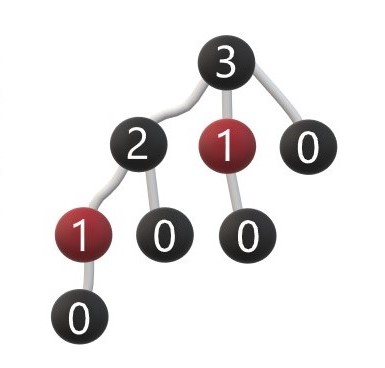

In [3]:
base64_data = "/9j/4AAQSkZJRgABAQEAYABgAAD/4SzcRXhpZgAATU0AKgAAAAgABgALAAIAAAAmAAAIYgESAAMAAAABAAEAAAExAAIAAAAmAAAIiAEyAAIAAAAUAAAIrodpAAQAAAABAAAIwuocAAcAAAgMAAAAVgAAEUYc6gAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFdpbmRvd3MgUGhvdG8gRWRpdG9yIDEwLjAuMTAwMTEuMTYzODQAV2luZG93cyBQaG90byBFZGl0b3IgMTAuMC4xMDAxMS4xNjM4NAAyMDIxOjEwOjIzIDA3OjI3OjE1AAAGkAMAAgAAABQAABEckAQAAgAAABQAABEwkpEAAgAAAAMyNAAAkpIAAgAAAAMyNAAAoAEAAwAAAAEAAQAA6hwABwAACAwAAAkQAAAAABzqAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMjAyMToxMDoxMCAwNDowOTozNQAyMDIxOjEwOjEwIDA0OjA5OjM1AAAAAAYBAwADAAAAAQAGAAABGgAFAAAAAQAAEZQBGwAFAAAAAQAAEZwBKAADAAAAAQACAAACAQAEAAAAAQAAEaQCAgAEAAAAAQAAGzAAAAAAAAAAYAAAAAEAAABgAAAAAf/Y/9sAQwAIBgYHBgUIBwcHCQkICgwUDQwLCwwZEhMPFB0aHx4dGhwcICQuJyAiLCMcHCg3KSwwMTQ0NB8nOT04MjwuMzQy/9sAQwEJCQkMCwwYDQ0YMiEcITIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIy/8AAEQgA9QEAAwEhAAIRAQMRAf/EAB8AAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKC//EALUQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+v/EAB8BAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKC//EALURAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/aAAwDAQACEQMRAD8A9/ooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKTNAFefULK1YLcXcELHoJJAv8zUsU8U6b4ZEkT+8jAj9KAJKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigCG5uYrS2kuJ5FjhjUs7t0AFeG+L/AIn6jqc0ltpcr2lkDgMpw7+5Pb6CgDmrfwd4t1m3F7Bpd1NFIN4kdgu4HnI3EE1krea34Z1NohLd2F5ERuTJRh6ZHehAez/Dz4m/2/Ouk6uETUCP3UygBZsdiOzfoa9MoAKKACigAooAKKACigAooAKKACigAooAKKACigAooAKKAPMvjHrUlno9ppsTbftbl5D6quOPzP6V4ZLNwaXUaNG1bxZq0lu9gNWuNgWOFoQ5VQOAARwAMYrovixqUN1qmk2zSxTalaWSx30kfP73upPscn2zTEcLb3MltcRzwuUljYOjA8gg5Br6z8Oap/bXh3T9SIAa4gV2A7NjkfnmgDUooAKKACigAooAKKACigAooAKKACigAooAKKACigAooA8Y+OsTpLpFzz5ZSSPPvkGvF3lzSGb2jeP/ABNoFrFaafqRjtY87YWiR15OT1HqTW78Q7axudB8N+I4bKGyvNThY3MMK7UYrj5gvbOT+YpiPP1fJAr6e+HF15Hg7S7SY4IhBGe2ecfrQB21FABRQAUUAFFABRQAUUAFFABRQAUUAFFABRQAUUAFFAHKfEHQYPEfheaxdlScHzIHI+64/oRkfjXyxfW1zpl48FxGY5Y2wVb1pDOzb4labdBZ9R8E6PdX6/8ALwuUDH1ZcHd+JrmvEfirUvFN+lzftGoiTy4YIV2xxKOyjtTEb3w68EXXi3Wo2kjZNNgcNcTEcH/YHuf0617ZfafJ4du1aIE6fIcJ/wBMz/dP9KAOm0vUVuY1R2y2OD6//XrUoAKKACigAooAKKACigAooAKKACigAooAKKACigApGYIpZjgAZNAHG69qMtxMttbqXmlbYiCpL74d6Dq+kQ2epWwkmQZNzGdsm49efT2OaEDPM9d+CltZXiraau/lOCQssOWX8QRn8hWx4W+Cmivbpeand3F3ljiJB5a8HHJ5J6diKAPWrDT7TTbOO0sbeO3t4xhY41wBT7m3iurd4JkDxuMMpoA4qaGfw/qAgkZmt5DmGTPb0PuK63Tr9buMAkeYBz7+9AF6igAooAKKACigAooAKKACigAooAKKACigAooAY7ogyzAVzuu67DbwMFccelIYnhzR5llOqX67bhxiKM9Y1Pr7n9K6amI5zxL/AMfNuf8AYb+Yq94dP/Enj9mb/wBCNCA1aKAKuoWEOpWj2065Ruh7qexHvXHW8l1o+o/Yrk/OvMcgHDj1FAHZWd0t1AHH3h94elWaACigAooAKKACigAooAKKACigAooAoanrWm6PGJNRvYbZT08xsE/QdTXPn4n+EVk2HVh9fJkx/wCg0Aalp4r0XUYWksdQguNoyQjcj6jqKy77xYTOLezjeaZuiRqWJ/AUAVhb+J9Ubb9nFpGerzMM/kOa19M8KWtnLHcXUj3d0pyGfhVPsv8AjmgDoKM0Acp4n1KyjuYUku4FZVbKmQZHSrvha+tbjTNkNzFIyuxKo4JFSpI0dKaXNY3s0tUZhWXrekx6pZbRhLhDuikx0Pp9DQBz2j6jLbylJVKyRnZIh611f9oWYKhrqBSwyoMgBNAFkEMMggj2paACigAooAKKACigAooAKKACuP8AHvjJfC2mqkG17+4B8pT0Qd2I/lQB4VGuq+LteWAT+feXDEl5pMAAAkkk9AACePStUfDx75Zo9I8RaTqV9EpZrSCU7mx12k8GgZxkU9xZXGUd4Zo2wcEggivefhR4ps9XsJNPeCKHUoF3Oyjmdc/e9cjIz+FMR6SOlLSAjnnjt4ZJZWCRopZmPQAV454q8e3mpyyW1jI1vZjj5Thn9yf6VlVk0rI9DL6CqT5pbI5KzstQ1i9FtZQSXE7c4UdPcnsPc1TMtxZ3TAO8U0TFTtbBBHuK50mtT3W4SvDsek+CPiNK91Fpety7w5CxXLdQewb6+v516tnIrrg7o+cxdFUqllsxazta1mz0LS5b+9fbFGOAOrHso9zVHKfPfibxrf65qM06EWsb8COI4yB/ePc1zn2bUp7V7yO1upLdPvzLGxRfq3SkMs6L4s1rQLhZdPv5Y8HmNjuRvYqeK998B+PLbxdZtHIqwalCoMsIPDD+8vtn8qYjsqKACigAooAKKACigAooAK+bfiPqzah411Ak/LbyeQg9NnB/XJ/Gkxo4qS5dCSjspIIJBxkHqK6v4Y2VzN4vg1UnybDTd091cOdqIu0jBPv6fWmBzWs30eoa/qV7CMRXF1LKg9Azkj+da3gXVX0rxrpVwhIU3CxuB3VztP6GmI+qxRSA4T4o6q1joMNpGSGupMMf9leT+uK8Weeuaq7yPcy9KNK/c73wH4ru7rxBpejQw29tZqhWQRRgNMQh+Zj655rgNUkxrF9/18Sf+hGk3eKNqMFTrS1voVfNwQQeR0r6R8GanJrHhHTr2Vi0rR7Xb1ZSVJ/StaZxZik0mb9eH/GLXGn16HSkdvKtIwzrngu3P8sfma1PKOF8M6b/AG/4p03Sz9yeYeZ/uD5m/wDHQa6XxZ8Rda0rxjPZaPOtpp2mymCO0jRQjBeGyMc5IP07c0hsz/ibZ2UetWGr2MRhh1izS8MZxhWPXGPw/HNYXhXXJdA8S2OoxuVEcoEgH8SHhh+RpiPrEdKWgAooAKKACigAooAKKACvmD4nWMmleO9SRs7J5PtCE9w/zfoSR+FA0Z3gnw2PFniRLKWRo7SKNp7l1+8I1xnHuSQPxq74j13VNSthpGl6Tc6doUJ/dWsULZkx/FIcZZj15/8Ar0AcfKkkEhjlRo3HVXGCPwroPAenyat420m2QEj7Qsj+yqdx/QUCPrIdKWgDzD4ywSf2Xp12oPlxytGx9CwyP/QTXi5nz3rnqL3j2cFL90kdX8Mm3eP9PGe0n/oDVzerSf8AE5vv+viT/wBCNK3um6l++foiiZa+kfhrbPa+AdMWQEM6tJz6MxI/QitKaOLHSTikdZXzh8XYZbTx9ePICEnSOSMnuNoH8wa0Z5iM/wCF95HB8SNIeVgFZpIwT6tGyj9SB+NY/jSJ4fHOuI4O430zcjnBckfoaEB0/wATQbXSvB1jKCtxBpSmRT1XIXg/iDXB2Ucl3ew28QzJK4RR6knApgfZUSeXEiZztUDPrT6ACigAooAKKACigAooAK4L4neBk8WaQLi12JqVqpMbHA8xe6E/y9/rQB89WWp+IPBeqTmzllsLvaYpMxgnGQcfMD6CtP8A4Wr43/6D03/fqP8A+JoAw7m61XxNrLXFw0l5f3LKpIT5nOAAMAegHavoT4W/D5vCto+o6ko/tS4Xbs6+SnXGfU8ZoA9HooAyvEGjQeINEudNuOEmXAYfwt2P4GvmLxDoWoeHNTksr6Io6n5Wx8rj+8D6VnUXU7sHUt7pFoPiG68O6zDqdokLzwhgqzAleQQc4IPf1qjcXj3V1NcOAHlcuQvTJOeKz6Ha/i5jqvAngy88V6sm5GTT4mBuJiOMf3R7n9K+l4IY7eCOGJAkcahVUdABwBWsFZHm4qfNKxJXnXxY8FS+JtHjvrBC+o2YOEHWVDyR9R1H41ZzHzfHPcafexzRlo7iCQOhxyrA5B/MV6DcfEPwvq93BrGteE2n1qMLveG4KRSso4LL+HTngY5oA43xH4kvvFWuz6pekCSUgKi52xqOij2/+vXo3we8DT3+pxeIb+ArZWx3W4cf62QdCPZf5/Q0AfQAooAKKACigAooAKKACigArH1u/WCEoGx3akxo5zTfCuneJYZrzWbKO4hk+SBXBBAHVgevX+VNPwc8GGTf9glA/uidsUxFCy0LTPD91IthZRQmKY/MBliAeOTzXpYORmgBaKAErO1fQtN120NtqVpHcR9tw5U+oPUUWGm07o841z4MaPHbzXVleXUWwbjG+HGO+DwelV/DXwx0H+0UW9M90ChIVm2rn3xz0z3qORXOh4mTjY9Zs7K2sLWO2tII4IYxhY41wBVirOZu4UhoA47xR8MvD3imR7ieBra8brcW+AWP+0Oh/n71wUn7Po8z93r42f7Vtz/6FQB0Xh/4J+H9KlWe/ll1KVTkK42R/wDfI5P4mvSookhjWOJFRFGFVRgAewoAfRQAUUAFFABRQAUUAFFAFK/v47SJiWG7FcjFFP4mvzGpZbKNv30vr/sj3/lSA7iKNIoljjUKiDaoHQAU+mBxWsJs1S6XsSG/MCuvtX8y0hf+9Gp/SjoBNRQAUUAR3EYmt5Ij0dCv5iuM0qbyb21c9nCn8eKOodDt6KACigAooAKKACigAooAKKACigAooASql/eLaQnn5yOBQwOQit7rxJqEkQkaK0iI82QdT/sj3/lXZ2dnBYWyW9tGscSDAUUAWKKAOS19Nurt/txA/wAx/St7RpPM0i2J7Jt/Lj+lC2Av0UAFFABXDXqfZ9SukX+GUsPx5FAHbROJIUkU5VlDA/Wn0AFFABRQAUUAFFABRQAUUAFFACZrlfEvjiy0Am3QC5vB1jBwF+p/pUylyq5th6LrT5EedXvxJ1+eQtHcJAvZY4xx+eaonx7rMjf6TKlwuMYZQD+lc6qts9x5dRULI9L8CeJdK1PTksbf9zdxjdJE55c92B7j+VdlXSndXPCrU3Sm4sWkYhVJJAA5JNMyPI/G3xEsU1AR6UouZIlKPK33M57eveuIHxO8TQII7e+EUakkKsS4H5ikM2tF+NOs2soXVIIb2HPJUeW4/EcfpXsfh/xHp3iXTxeadOHTo6Hh4z6MO1MRr0UANd1RSzMFUDJJ6AV4/wCLviDp8GrTf2Wv2olQGc8JuHHHqOlAznF+L/iOBI0i+yLGgChTFnj65zXS6D8bUlmSHW7BY0bgz2+ePcqf6GgR6xY3ttqNnFd2k6TQSjcjocgirFABRQAUUAFFABRQAUUAFBoAwvFutf2F4fnu1OJj+7i/3j/hyfwrwG5unmleWVyzsSWYnkmuetq7Hs5ZG0XM7Xwx4X0GfUbSHUdSS8u54zItpb8qg25+dvX29a87lcCZwOAGIFS0kkddCvOc5KSstLElpfz6feRXdrKY5omDIw7GvpHw9q8eu6DaalHx5yZYf3WHDD8wa1pPoefmMFpI1a83+LPiWTTNLh0q1k2TXgJlIPIjHb8T/I1qeWjwwB7ieOGJS8srBEUdSScAV2+r2XgvwdNDourWF5qeoFFa7uIp9ggLDOEHcjjr+fakNnOeM/DcfhvU7c2czXGl3sK3FnO5BLIRyDjuM/kRT/A3iibwx4kt7kO32WVhHcxg8MhPX6jqKoR9RoQyAg5BGQfWlpAeU/FzxVJbLHoVpKVMi+ZclTzjsv8AU/hXjkUMl7eQ2sC7pp5FjRfVicD9cUhnbarpXgPwxdroWrPqV3f4X7Td2zKqwEjIAU9evPXj34rl/GHhqTwtrps/M861lQTW0/GJIz0PHfOf8mmhHUfCbxdLpOvx6PcSn7DfNtUN/BKfukemeh+o9K+g6ACigAooAKKACigAooAKKAPOPi/I0eh2OPum4OfrtOK8XefPeueovePbwL/dJHV/C593jy1H/TKX/wBANcfO/wDpEn++f51PRG6l++l6L9SIy1778JGdvA0e7p9ok2/Tj+ua0p7nHj37h3lfP3xllkXxoA2dotU2fTJ/rmtjykcr4JKzePNDR+n2yM/iDkfqBUfxDlkk+IOuGQYYXTKB7DgfoBQDNzxjlvht4JmkGJBFMg91DDH6AVwSv8wpiPsDQTIfD2mmbPmG1i359dgzWhSA+avibcOfH2qByfldQPptGKqfDcJcfEbRkkwVErOAfVUZh+oFIZk+NpWl8da8XGCL+ZfwDkD9BXS/ELLeFfBE753tpgQg+gCY/nTEcXpUzpq1m8f31mQrj13CvsUdKACigAooAKKACigAooAKKAOZ8daA3iLwvcWkK5uY/wB7AM9XHb8RkfjXzNM0kMrRyKVZThlYYINZVFrc9LBVLRcTq/hlqVrZeN7ae8uYbeFYpAZJnCKCVPc1yU84M8hBBG48g+9RbQ6k37RvyQ+yt7jUb2G0tY2lmmcIiL1JNfU3hfRU8P8Ahyy0xeTDH859XPLH8ya0po4cZO9kbFeTfGzwzNfaZb65aRb3tAY7jHXyycg/QHP51ocJ4Tp+pzaXqlrfw/622mWVM9Mqc816Z4h8MWPjvWB4k0TXdLgtLxVa7ju59klu4GGyv4D0/LmgDnfiL4h0/ULrTdH0aTzdM0i3FvFKP+WrcbmHtwP1rP8AA/hufxT4ltrGNT5IYPO4HCRjqf6D60AfWaKERVUYVRgD2p1AHgnxu8PS2msxa7CjG3ukCSsBkLIowM/UY/I15noGtvofiCw1NAWNtOshUH7yg8j8RkUhnoniDwMvirxFJr+h6vpraTfsJ5ZJbgI0BI+cMOvXJ/Hmud+JHiDT9U1ez07SH8zTNJtls4JN2RJt6sD3HAGe+M96Yhfhh4bl8Q+MLTKN9ltHFxO+OAFOQv4nA+mfSvqSgAooAKKACigAooAKKACigBMCvP8Axt8MLLxLI99YutnqDA7jj5JT/tY6H3H5Gk1dGlKo4SueT3/wr8W2TnGmmdezQSK2fwzn9Krad8PNfv7mKI26QeYwUNM4A/TJ/Ss+V3O94mFrntngv4dad4SH2l2+16iRgzsuAmeoUdvr1rtq0Ssjz5zc5XCmSRpLGyOoZGBDKRkEUyDxnxj8EBdTyXnhuWOLectZynAH+439D+favOLn4W+MbaXy20S4fnrFhx+YJoA3ND+Cfia/nT+0Ei0+3JyzSOHbHsqn+ZFe6eFPCWmeEdN+yafES7YM07/flPqT6e1AHQUUAUtV0uz1nTprC/gWa2mXa6N/P2NeBeKvgnrNhPJNof8Ap9p1CZCyr7EdD+H5UAcI/hDxHHL5TaJqIbP3TbP/AIV1Phz4P+JtYlje7tzp1qT8z3PD49k65+uKAPoDwt4W07wnpK2NhH1O6WVh80rep/wrcoAKKACigAooAKKACigAooAKKAEPSuIsf+QpZD/pqKOoHb0tABRQAUUAFFABRQAUUAFFABRQAUUAFFABRQAUUAFFABRQAUUARXDbLeV/7qk/pXG2AzrlinfeT+SmjqB29FABRQAUUAFFABRQAUUAFFABRQAUUAFFABRQAUUAFFABRQBT1PUrXSdPmvbyURwRLlmP8h6mvEPE/wAVNX1GZo9MkawtQSB5Z+dh6lu34UAcDcavfzzebNeTvIf42kJP51raH461rRL+K5S5NysfHlXHzKR3Geo/ChAe/wDg7xlp/i/TfPtv3dzHgT27HlD6+49DXSUAFFABRQAUUAFFABRQAUUAFFABRQAUUAFFABRQAUUAFFAHivxj16STVoNGR8Q26CWQDu7dM/QfzrzrRdObXdfsdLR9huZghbGdq9z+AzSGdZqvijwrouutokHhawu9MtpBBPcyqTO5HDsG9jn6+1cx430KDw54nltLSXzLKZFubY9/LfkD8ORnvimId4H8RP4c8V2d55jJbs4iuAD1jY85HfHX6ivqgcigAooAKKACigAooAKKACigAooAKKACigAooAKKACigAooA+cPi4JIPiBfF84kSJk9xsA/mDVH4WSK3xM0jd6y4+vlPikM5XWS/9u6h5n3/ALTJu+u412XxV2pe+HST++OiweZ+bf8A16YjhrYPPdRRRgs7sFUDuT0r7KgUpBGjdVUA/lQBJRQAUUAFFABRQAUUAFFABRQAUUAFFABRQAUUAFFABRQB5Z8ZPBs2s6dHrWnxF7q0UrMi9Xj65A9Qc/gfavB9F1m40DXrPU4VDSWsokCNwG9QfqMikM9BvrX4ca1qr+Im8RS2kEz+dcaWbZjIX4LKD2yc9MjngiuO8aeJ/wDhKvE1xqEcPk24VYreL+7GvA/E9fxpiOw+D/g2fV9dj1q5jZbCxcOrEcSyjoB9DyfoK+i6ACigAooAKKACigAooAKKACigAooAKKACigAooAKKACigBCMjFec+K/g7ofiGd7uzc6bdPy3loGjY+pXjH4GgDgJPgHrwlxHqOnsmeCWcfptrpvDvwIsbSWOfW783ZU5NvACqH2LdSPpigD1m0s7ewtY7W0hjhgiG1I41wFFT0AFFABRQAUUAFFABRQAUUAFFABRQAUUAFFABRQAUUAFFABRQAUUAFFABRQAUUAFFABRQAUUAFFABRQAUUAFFABRQAUUAFFABRQAUUAFFABRQAUUAFFABRQAUUAFFABRQAUUAFFABRQAUUAFFAH//2f/hMehodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0n77u/JyBpZD0nVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkJz8+DQo8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIj48cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPjxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSJ1dWlkOmZhZjViZGQ1LWJhM2QtMTFkYS1hZDMxLWQzM2Q3NTE4MmYxYiIgeG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIj48eG1wOkNyZWF0b3JUb29sPldpbmRvd3MgUGhvdG8gRWRpdG9yIDEwLjAuMTAwMTEuMTYzODQ8L3htcDpDcmVhdG9yVG9vbD48eG1wOkNyZWF0ZURhdGU+MjAyMS0xMC0xMFQwNDowOTozNS4yMzg8L3htcDpDcmVhdGVEYXRlPjwvcmRmOkRlc2NyaXB0aW9uPjwvcmRmOlJERj48L3g6eG1wbWV0YT4NCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIDw/eHBhY2tldCBlbmQ9J3cnPz7/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAFwAYEDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigApje/Skkr5r/a7/amj+CekjRdCkSbxbexb1ZhlbOM9HZTwWPZT9TngEA9S+KXx68FfBu1EniXV0guWGY7GD95cyfRB0+pIHvXyl40/wCCn1razPH4Z8IiSNfu3GqXJG7r/wAs0HH/AH2a+GPFnivUvFWq3WoanezXt7cOzyz3DlmY9ckt+Xtmu1+Ff7J/xO+NlhHqXh7QTHo0jFU1PUJxbwPglTtLHdIAVIyqkcVPMOx7/b/8FSvFkU/+k+E9Ekg7LG00bfiS5xXrfw3/AOCmHgTxRcQ2fifSb3wrLIQpuY3+0wL6lioDr+CtXyJ4+/YB+MvgjRp9VGjWmu28KNLNHo90Jpo1wTny2Cl+nRFYnPbkj5tWVlYg5BU4IyQR2x/OrEf0B+GfEWl+LNIt9W0bULbVNNuV3RXVnMJY2HoCOOORjtg55rVr8Sf2e/2mvFX7P3iVLvSblrzSJnX7bpFw5EFyvA6D7rAZww5HfIJB/Yn4WfErRPi54H0vxToFz5+n30e7a334ZBw8bjsynIPbuMgg0WFc62iiikMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBKWkXpS0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBj+LvElr4P8ADOq65fHFpp1rJdy46lUUsQPc4wPfFfin8UPiDqHxF8aat4g1SXzLu/naZvRQfuqPZVwv4V+pX7cmsy6L+zP4seFirz/ZoMj0a4j3foDX473l91y3v/n/AD3qJFxJLu8CqTuxkZ65/SukvP2hvH0XgnSfCNp4o1DTPDulo8cNjp0xt1bfI8jGQoR5h3O2Nx6V5/d3hYYz1r2P9mn4VfCr4nR67J8SviKPA0lrLAtjF5kUf2hW3lzmQHGML0pob2PZ/wDgnR8evHWo/HS18H6jr2p65oGpWc/mQ30z3AtmijZ0dGYkxjjbgYBLjjuPG/22rLSNH/ao8f22iQrBZ/a4pXRBhfPeCN5iPrKzn8TX3B8M/gb4V+EHhHWNc/Ztl0H4k+NXgMD6nrXiGOaS2jYDCIsMYjyzKTh/LzjliPlr8v8Ax9/wkkfjjW/+EwW8XxQbuQ6j/aCkXHnE5bfnvz9BxjiqMyusx/z1r7W/4Jm/Ga48O/E668BXc+dJ8QQvLbwk/Kl1Gm4Eem6MOD64T+7Xw2s9el/s3+IZPDvx18A6ikhiMGt2hdl/uGVVcfipI/GqA/dyM5HGPwp9RwurqGUgqwyCOmKkqQCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooASlpKWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPGP2xvCs3jD9mvxxZWys1xDZi9QL/0xdZW/wDHUavxFvLwq5HTHQHsO1f0M3lvFeW8sE8KzwSoY5InAKupGCpB4II9a/DX9rf4HXXwK+LGq6QsbSaLNI1xplznIkgJ4UnruXlTnqVz3FSykeQy3BbvVN29/wAKptdEDBOT/u5z+dfd2mfGz9kj4xeEdBj+I/hTUfC3inT7CCyuNRsIZf35jjCb99sf3mcfekj3DoOlAM8F/Y38Xa94V/aS8BNoM10JL7VoLG7t4JCBPbSOElDqPlYBCz4bugPavZP+CqVnplr+0PpUtmqR6jc6BBJfGNR87iaZUdj3bYqDPoq9OldFoP7SH7Lf7MbT6z8KfDGr+MfGJieO11DVBIiW+4Yxvlxs47om4jILAE18WfE74qa78YPHGq+LfEd0LvVtSk8yRlG1EUAKkaLn5UVVCgeg9etEmL9oPpwffp/nivU/2adJbXfjR4QiIPlxahHcyMOyxHzD/wCg15Hb5kkGOnv/AI9vrX6G/sN/sh6rrXw51L4gXTSabq12AmgxTptWVFzvZx2VyAoI6bWNAH3j4F8Yx7Y7Wdx5DY8qQ/wk9jXoi96+R/BXiqa2uJNO1CJ7W7t2MM0Ey4dGHUHvx0/CvoTwT4tW+jjs7mTc+AIpD/EPQ+9VvqGx21FNX8adUgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFACUtNXpTqACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigApKWoridLaF5ZDtRRkmgDJ8T6uNLsWw22RxgH096+Ov2nNB0X4peHzo2qWv2icyf6E8S5mjlYgfJ65OMr7+uDXt3xH8Y7VllZsHHC5xx2H8vyrl/wBn/wADyeMvEj+NNSTdp9lIU01GGRLL0aXHovIB/vc9qmOupb0Vj8vvj5+x78Q/gTP52taNNLpD7THqlmDLbnI4VnH3HyCNrdT0yOT4TNZzRMQynOcHjA/z1+hr+ka6tYb63kguIo7iCVSjxyKGVlPUEHgj2r5x+On7H3wh1rw7e6r/AMIRYWGoK6MJtNLWw+Z1BOxGVD+K1RJ+IYhfptOa0dJ0O91a6htrW3muLiRtkcUaszMx6ABeSfav0juv2PfhjpsX2hdIuJiDnZNeSFeo+np6j619u/Dr4BfDz4UKr+E/CGm6POo2/ao4d9wf+2r5c/iaAPz7/ZH/AOCb+reILyy8UfFG0k0nQoyssOhSHZc3XQgSjAMSE9uHPHA61+nlnZwafZxWlrBHb28KCOOGJQqIoGAoA6DHp6VaT8jTqBHjfxv+EL+JI28SaDHt8Q2qfvIV4+2RgfdI/vj+H15HGcjzXwH40F1GsTsySocFTncrA9CD0I/PrnmvqqT09eK8D+OHwnmtLqfxl4fjJuFzJqVnGP8AWLjmVB/fwMsP4sZ5xgmwWvoereD/ABSusQi3nYC6UZB7OPUV1K18w+AvGi3scDiXEi4YMD39T/X3J+lfQXhXxCmu2p3bVukH7xF6H/aHsarfUW2hu0UUVIwooooAKKKKACiiigAooooAKKKKACiiigBq+1OoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoopDxQAtIeap3Oq21rnfIMjtWJqHjzT7PP7xenrSuB0sjLGpZjhR1rzrx/4wS2hdAwCrnAz1rkvGXxstLONws6jHdjkCvJY9S8RfGrVk03w9bSmF32z6hIpEFuDyWZhxn0XueKWrKLEdnqPxk8XJoOlmRbQNvvr7qtvETgn3Y84FfW+g6PaeH9JtdNsIVtrO1jWGGJR91QMD8ffvWJ8Ofh9pfw38Ow6VpiEnG+4uJB+8nkPV2/XjoOg4FdUvSqQmxa4/4tLu8A6j9Yv/Ri12Fcn8VF3+AdVHtH/wCjUpPYR86a8f8AiWv7D+hr60jbcgPrXyZro3aa4/2cfzr6usJPNs4H/vRq35in9lA/iLFFFFABUclSUUAfMnxj+GcvgDVH8U6FDs0Wd917aoP+PVyc71A6I3Q9gTx1rR8D+MWkaC4gkVJl5G7OOeqn2/x9q+gr23jvLeW2mjWaGZDHJG4yGUjBBHfIOK+VfHfg24+DviqOS2Ej+HL9w1o//PFgcmFj2x1HqAfSnewH1BoesQ61YJcRfL2aM9UI6j/PtWiteHeB/GRs5I7iM74WAWVMfeXPBHv0/l3r2qzuY7yFJonEkbjKsKfmBYoooqQCiiigAooooAKKKKACiiigAooooARaWiigAooooAKKKKACiiigAooooAKKKKACmtTqa3SgBRVLWNXsdCsZL7UbyCws4RuknuZRGij3YkCvPvjx8dND+BPhNtU1RxcX8wZbHT0b57h/p2QZGT6dMnAr8sPjR+0R4v8AjNrEt1rWpSC13EQWMJK20HYbVJ+nzHk96AP0X8Zft1/CXwfM8K6xc65KnDLpdsXGf99iqn6gmuNh/wCCl3wueYJLpniKFSf9Z9ngYD3OJa/MnTdF1nxZfNa6Npd/q90QD5NjbvPJ6dEyf0qDxR4N8TeDSg1/w/qmieYcINSspLfcfbeo96Vxn7E+Cf2wPhV8QAsek+KLeO9fhLPUFa3kYnsu/hj/ALpNa3ir4sW+nxuPNVdo7f8A66/EOG8eNwUZlYdDzkfWvbPg78fTpOs6Vpfji41HUvCKyKs620uJ4Y/VWIPyjqV4yBgEHmna4rn3Frfxl1bxJq39n6DZ3eq3rZ/c2UTSMPqAD+dWrH4S/Fnxi2+e3tdAtpAGD31wN2P9xNzA/Xb+FfRXwx0vwnZ+FbC68GQ2Y0S8iWeG5sxkzqRwzMfmY/7+WHQ4xXXr3oHc8H8G/spaNYTLeeK76bxPeZz5LZitV9tucsPqce1e3aXp1rpNnHaWVtFZ2sQ2pBCgRFHoFHA/CrlFAgpjU+snxJ4gsPC+l3Gp6ncx2djboXlmkOAB/U+1F7alRjKTUYq7NHd17fWuC+LnirR9L8I6jb32qWlpLIilI551jZsOp4yeelfJPxr/AGzNa8R3Fxp3hSSTR9KU7RdDi4l9Tn+AH0Bz6npXzFq/iO+1KeSe6uZZ5XJLPK+5ifUnJP515lTHRT5Yan3OA4WrV4qpiJcqfTqfYOqeP/DU1m8Ka3YmQjH+uUc89OcHrX1n4R8S6X4g0a1l03UbXUEESBpLWZZVztHGQTX45y3zd2I981a0PxhrHhvUEvtK1O50+7jOVnt5WjZR35XnFRDGvqj0sRwjDlvSqa+aP2f4py96+F/gH+3bcC9tdE+ITLJA5CR61GuGjPbzgOGH+0uMdx1NfcNjdQ3kEc1vIs0Mih0dDlWUjIII4Ir0oVI1FeJ8DjMDWwM+Ssv8izRRRWhwBWL4v8MWHjLQbrSNSh862uV2nH3kbPyup7EHBz7d62qjmIHJ4HrnigD5FsYb/wCH/ii68P6mxMlu37uY9JoyflkX2P8APPoa9v8Ahv4qWOQafPIFgkBeFnbGxhyVP6n8K+Wf2vv2qvC7ataaX4VjXVNb0yR45NZUjyFHIMadpOQDu+7wcZzXxb4x+MninxbITqOsXU8XaHzT5a/8B4A/D9KSlbQvlvqftZ/wl2hw3Bhk1rTlmzgxtdIH+mM+vataGZZ1DxuskZ5DKQQfxFfgJNrlwx5nc/Rz+nNdB4L+NHjL4e3y3Xh/xJqOlSK28rb3Dqjn/aXOGHscj2pkvQ/eCivz9/Z2/wCCkq6hdW2hfFGJITIwRPENkgVQT08+IdB/tJ7fLg7q++NNvrfU7OG7tJ4rq0nQSRTwSB45FIyGVhwQR0IPegRaooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKr3l1FZ28txPIIoYVMjuTgKoGSfpgGrFeR/tZeJpPCX7PPjfUIWZJfsQtlKnB/fSJFx+EhoA/Mv9pj41XXxm+Jup6u0rrpkbm20+EtxHbqcL+JyW+rGvFrq4A+Ycjup6f54pLy+LMxJ59v8/wCcVjXl6cHms0aM+sZP25x8Jvh34f8ACXwj0HT9ElhsLdtX1u7tQ8tzemJDMyIT8wD7hufPAUKAAK9O/ZQ/bO1b9oHxsfhZ8U9N0zxDp+vW0yW9x9lVSzxoZGilUHaVKKxDAKQwHXOR+c01wWk9SOOK+zP+Cc/wbuofGcvxl8SOmh+DPDNtcNDqF4SkU8rxPEzKTwURWfkcbtoHJNWiWeDftGfDeD4NfHLxd4OtJHlstNuh9laQ7n8iSNZYlY92CSIpPcj8BwCyYPp/tf3feut/aF+KEXxg+OHjDxfbKyWepXzG1DKA3kIqxxFh2YoiZ9TnPvwsc3y9ashn6Ff8Eyfj1cR6xffC7VbgtaXEbX2kLIxJjkUZliXPYrlx6bG/vV+jS9O34V+En7OHi2fwf8dPAurQswaHWLZXCnG6NpAjr+KsR+Nfu2oxSYkOpjcmn0jUiiOTpn3zXwF+2R8cJvFfi6bwrp07LpGlSGOXyzxLOB8x9wvKj3Br7c+IviT/AIQ/wJr+tgAvp9jNcqD3ZUJA/MCvx+1XWJLy6nmlkMksjFnb+8T1/wA/WvPxdS0eQ+y4bwsalV157R29SW4us5bOc8nH8h6j/wCvXrXwh/Zd8T/F7TU1v7XY6J4Y3OH1K5kDkqhZZCsY9MH75HfmvCJ77av3sflz2q3dfErxHJ4Xh8NjWrxNBhZ2TT1k2QlmbLblHytyT96vKpqMXeSufpGIdepBrDTUX5/ofX/7QXwb+H/w6/Zjj1HwpHBq9xLfwj+35Ck00+WZW2yAY2fLjC4UjJ5yTXxaLgEAZz+nb6fTjtX2T8UJD/w7x8HMennWvfP/AC0k96+H1udoFdNe3MraHm5JVm8PU9rLmak9zWeQdjj/AICPX36/SvuL9gP4+T6g8vw61mdpSkb3GkyucttXmSEnOTwSw47Pn+Gvgv7V8vWuo+E3jiXwH8SvDWvxSGM2F/DK5HePeA4PsVLD8a1oy5WjlzijDE0JKW62P2uX0py1HExaNW9ealFeufkNrDXxkZr42/b2/aMn8F6WngDQLloNS1GHfqNxGSGihbgRqfVxkt/s4H8VfZMhCrljgDkk9q/Ej43fECb4h/FDxL4gndj9tvZZYwxztj3fu0B/2VAX8KTGtzjLy6adi7MWLH3Jyf8AP+cV2HwN+BPiL9oTxsvh/QPLhjjQTXuoXGfJtIc43nHViSAqjk+wyR5xdX3ytye4GBntX6A/st3jfAv9g/xt8TbGFP7b1A3V1BNIMAeW32aBfdVlDsB3LEd6nUs5PVf2MPgRY6ofCM/xxW08cNlFEz25gjlBwUaPOA+ePLMoPbHNfNf7SX7OPiD9mnxpbaLq9xFqdlewGew1S2jKRzqpwwIJO11J5XJADDnmvFry/mvLiW4mlaaWRjI0jH5mbkkn3PJ57mv0X+MmpyfG7/gmh4d8bazHHda7ojQMbtwfNLR3ZsnYH1dSGYH5SeeCARaM2fn4knBYE47Hrn6V95/8E6P2mbqx16L4W+ILlp7C9LNo8zscW82GZoMnqjAcejD/AGq+AI5ty4B4/wA5+vT+dbHhnxFeeGdf07VrC4e2vrG4juYJkbDxujBlYHtggVTJP6CUp9YfgfxJH4y8H6Fr0SeXHqlhb3yx7s7RJGr4z7bq3KkoKKKKACiiigAooooAKKQfTFLQAUUUUAFFFFABRRRQAUUUUAFFFFABXiv7Zuiz6/8AsyePLa2QvLHZpc7R/dilSR//AB1Gr2qqGuaXa65pN7pt7CtxZXkD288TdHjdSrD8QSKAP5872+PmMD1B/wA/4fhWdNdbl9+2cY/X/P4Zrvf2h/hTqfwT+KGueFtRRv8ARZiLeYjAmhPMci+zJtPHQ/L1BrzbTZIrrUrSG5mEEEkyLJK54RSwBbqOgqC2fXn7P/7L3hPw78OofjR8b71tN8EKQ+l6Em4T6q3OwNyGKsQcIuCw+YlUHPD/ALSX7Yuu/HS1h8N6PYx+EPh1Y4Sy8P2YCKyoMIZigC8Y4RQFXoMkbq+zv2mvC3wO/aO0/wAJ6aPj94X8LaR4dgeG20+11KzmjO4RqCczDBVY9oHua8I/4Yp+AAyP+GnvDo/7eLH8P+XiqQmfEZba3qep/wA9vw4+uDTvP7V6d+0p8MfBvwh8Yafpfgnx9Z/EPTbiwW5m1CxeJkhlMkimImN2GQqK3JBw44ryRZDJwuN3bIzTJPUf2fdDm8V/GjwRpUC75LrWLWPHoPNUk/gAT+FfvhGeK/LH/gl38DLjxJ8Qrr4i31u66RoCtDZSSLgS3UiEHHrsjYkn/aSv1Oj6dKAH01qdSGgDzj9oe1mu/gf42SBd0i6VPIF9QqFj+gNfjpdah+8Iz0P+f6V+42qafBq2n3FldRiW2uI2hljboyMMMD+BNfiN8Z/A998K/iLrvhq/DebYXLIsjLgSp1Rx7MuD+NcGLjezPsuH8Qo89J+pizXme9U3m+br/s1l/b/XimtejnnmvN5T7yFbQ+9/ieSn/BOPwWxP3prc/nLKa+GzPt74r7g+LUwX/gm34Ic9fNtP/RklfBRvBt4NdVaN2jwsqrckKn+Jmm11x1qTS/NvtQtreAF5ZpVjRR3JIA/WsGS63YAPJr3v9ib4Xz/FD49aAGhMmmaRKup3rY+ULGd0aH/ek2D6E0U46ovH4pRpy9D9h7FDFaQxlt7KgUt6nHWpxTI+2OlP5r1z8sbu7lHX4pJ9E1COL/WvbyKn+8VOP1r8CdavCt5MG4O45496/oCfG4V+HX7Xfwzn+D/xy8T6K0LRWL3TXVixHDW8nzpg98A7fqrVMho8onvC3HX2/Sv0QuHln/4JF5snLsLcFyOuF1n5/wBAa/NVroNnPPp/+rvX6R/sL31h+0F+yL48+DM98bPVLb7RHAzEMUiuP3kcuO4WcOWA5Axj71IGfm6pzx274Hvj+efxr9H/AIYoYv8AglN4qkv/APj3kW9aDnH/AC+AL/5FBr4IvfhP4003x4/gy48LauvigSmP+yVtZTO+GI3IFXLJwSJB8pAyDivvL9ry4tf2af2I/BXwY+3JN4h1QR/a44yANizG5uH4/gM5VBnhhn0qyT87Vn+Wpbef96ozWV527kfXAPT09un6fWu1+EPgHUfil8QtB8L6ahe81S7S2UgfcBPzOfQKu4k+gNAH7g/s0QzW/wCz38OY5/8AW/2BZE/QwqR+hFel1R0TS7fQ9JstNtF2W1nAltEuc4RFCr+gFXqACiiigAooooAKKKKACimp92nUAFFFFABRRRQAUUUUAFFFFABRRRQAUjdKWkoA+c/2yP2V9H/aN8F+eHh0zxVpcTGx1CQfK6nJMEpHOxj0xkqTkA5YH8aPiJ8MfEPw31+40jXdOuNPvIW+ZJF4YdmUj5WB5wV4+vWv3o+IXiBbe3NrG2ccvjufSvmXxf4Jsvjp4t07wndWMOoQyyGSaaWNXNvCDmSRT1HoOnOB3qUU9j8gGDBuf5U35q/Wzxz/AMEnfAWvXEk3hzxNqmgB+fJuoVvUB9vmjPvyT35riLX/AIJAR/av3/xIVYc8NFo5LYxjp5wA/M1RJ+aMMbykADPfGcD8a+i/2Wf2P/Ff7RPiCP7PDJpvhi3kU32tTR4RRwdkf9+Q+g6EgtxivqzQP2Gvh98N/E15a30dx4lns5Aqm9YJEehB8tSOx6EkV9e/s8xW+m6Rq2mWsMdtb206NHDCoVFDLjAA4/hpIbOz+Gfw60L4U+C9M8L+G7NbLSbCLZGv8Tn+KRz3Zjkk/wD6q6miimIKSlooAif3GRXy1+2x+yr/AMLy8Pp4g8PxIPF+mwmNYidovYeT5Z/2gSSue5x3BH1RxTJOnpSkuZWNqNaVGaqQ3P5+td0i+0HULizvrea1u4JGjlhmQq6MOCCDyDnOR/8AXrKaZlI5PH8X+etftj8cv2TfAfx4R59XsHsNb27Y9Y0/CT9MDzAciQD/AGhn0Yda+KfHX/BLvxzpd1I/hrWNK160zhVmY20vX+4QVHH+2a8+VCUXdH2eHzilNWnoz5CvPiR4q1Dw3B4eu/Eur3OgQlRFpU19K1rGFzjbCWKjGewrBEzcZ6+n6f0r3i9/Yq+Jmm61Ppt3pNtDcwlRJuvYtvKqw6MezCvW/gr/AME59Q8Z6hcDxL4kttLtrXY0kFhGZpZA27gFsAdOvOPQ0vZyl0Np4/D0Vo0fKfgHwJrnxE8SWWh6Dp0+p6lduEjghUkn1JJ4VR1LHgDNfsX+yr+zrY/s7/D0abvjvPEN8Vn1W9jHDyAcImedi5OM9SzHjOK6H4M/s/8Agn4G6S1l4W0pYJpBi41Cc+Zc3GD/ABue3+yMD2r0pa66dPl1Z8tjcdLEuy2BenSnUUVueSNbpXzB+3N+yqP2iPA8WpaJEo8a6NGxs9xCi7izuaBieN2clCehJHG7I+oajk+n40Afzj+INDv/AA5qd1p9/azWl3bSNFNDMhSSNlOCrKeQQQR+H0rT+GnxW8UfB3xjZ+KPCWqy6TrFqCokTBWSM/ejkRvldDjlWBHAPUA1+0n7R37F/gT9oqN729jbQvE4XamtWMY3P2AmQkCUDHqre+OK/Pn4mf8ABL/4seFLqV9CtLPxZYAkrNp9wscoXtmKUqc+y7v8AdzXf/grh8UG02OP/hFvCg1JU2G8aC4Knpk7PN46ZIzjnvXyX8Svit4p+MPi278S+LdXn1fVrjgyyAKqIM4REHyogycKvAye5Nd/J+xj8ZYbjyT8OPEjMOCV02Qp+BAxXpPw7/4JqfGTxhdRG90W38M2ZI3XGr3CoQO58tdz5wT2oEfLdjbSXTqqKzFugxkk+lfrP/wT1/ZDufhPpp8feLrNrbxTqMGyxsJlO+wt25YsD0kf06qvBwSQO0/Zx/YA8CfAmaDWNSYeLvFEWGjvbyECC2IxzFEc8/7RJx1G2vqSNSGOSSPegBy9TT6KKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKQ0ADVl65q6aTalicyEfKp6VJq+sQ6XCWc/P2X/GvDPid8SorGGdjMvGSWJ4/Cp30GjD+J/jZLK3md5dxHJyeT/8AXHb6V6F+z78OZfCuhy65qsZXXdWUO6t1t4OqR+xP3m98D+GvP/g38Lbvx5q1t4t8SQumkRMJtOsZhg3DZyssg/u55APU4PQV9NRZGR27U1oFx4obtS0hpiPn74oQfZ/iJfN/z2jif/x0L/7LWx8DbryfEusWuc+dbpL/AN8OR/7PUPxqtjH4w06cDiW02H6rIf8A4uqXwluPs/xChX/n4tJI/wBFb/2SiOzBnvtFJS0AFFFFABRRRQAlI3qKdSUAeBfGSy+w+PorkDal3aIzH/aUsh/TbVv4SXv2XxsYT928t5FH+8pDD9Aa1/2gLHFpoeoY/wBTO8B/4Gmf/adcR4WvjpvirQ7voFuVjb6N8h/RjRHqVLZH0ivanU1fWnUEhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRSUtABRRRQAUUUUAFFFFABTWpaq32oW1hGZLieKCNerSMFA/EmgaTbsixVDWtWTSrFpWPznhRWSPiR4Vabyh4j0oyf3Rexlvy3etecePPGIvpJpY5VktgSkZjIIKgn0HPeockaeymtXFnN/Ez4nDT4ZmebHXJ5OfyrP+FfwV1D4gX0HiTxhFLb6QGElppcmQ1xg5VpR2T0Xqab8IvArfEzxq+v6mm/QtKl/dIy8XNx1AI/uoMH6kV9QwjuRg/WqSsiGNt1WNRGihFUAKoGAB6e2PSpqKKZIUhz2paSgDyP49W5VtCuQMBWljP8A44R/I1xngm4+x+PtBlHeYxf99Iy/+zCvR/jrbGTwrazKv+pvEz/ulHX+ZFeR2lythq2k3jsESC7hkZmOAArjk0R3Y3sj6kHWlrmpPiN4Ut7gwSeJ9Gjmzt8t9QiVs+mC2a29P1K11S3E9ncw3cB6SwuHU/iKBFqiiigAooooAKKKKAOI+Mmnm++H+olRl7cpOv8AwFxn/wAdLV4SJDJYq6HDLgq3vzivp7XdPGraNf2TDK3MEkJ/4EpH9a+W9LzNYmNvvfdI/IH9TS+0ivss+ptHvl1PS7S8X7txCko+jKD/AFq7XI/Cu+N/4G08sctCGgPttYgf+O4rrfSqZC2FooopDCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooARelLRRQAUUUUAFI1LTWoAQVW1G8g061lurmdLe3hUySSSMFVVHUknoBU7fdz6V8Q/tn/AB2nvNWk8EaVOVsrYhr9oznzZOoT6Lwcd2P+zWVWp7KN2ejgMFPHV1Sganxp/bYmjuJ9L8DBYY1JVtUuF3FveNTwF/2mBJz0HBr5O8U/ELXvFV01zqmqXd9KWPzXEpZh/h9PTFYFxcbskuO+T14z1H5n9a6T4f8Awh8Y/Fa/SDw9o09zEzbXvZBsto/96Tp0wcDnjoeleBOpVrSsfsWFweAyuley829zkZ9Tlyf3jD3zzVvSfHmtaE5aw1K4gB6orsEb2Izjrj0+ter/ALRn7OUXwF8I+Frm41OTUNZ1J5Uu9uBboUCkCMY3cbsZJ5xnArwD7QPWqcZ05andTqYXMKPPTScdvuPuL9mH9sjSNPtLHwh4st4dJj8xxb6tF8sZZ3JImUn5csx+fkeoAUmvty3kE0asjB0IyGByCK/D5pT0BOOvBB/nX3f+wX+0NPrkb/DzXrkzXFtEZdJmlJLPEoy0OTySo+YZ6AEdhXqUKzl7sj82zzJ4Ub16CsuqPtj1pVpi+tOHU13Hw46o5ac1fJn7d37RE/w28MweENCufI1zV4S9zNG3zwW3TA9C5DDPop+tAGL+1h+2doWh2l74R8LpHrWpo6i4vs5t4HVgdq4++3BBPQZ4zzj4G8ZfF7xN4ulc6hq9zPGWJEe8iNeOyjgfXv7Vzl9dNNIzs5bJJ3ev+f8APQVpfDf4a6/8YvG1j4X8M2n2vUrpt2XIWOKNeWkkbB2qB3PsBkkCs7l2sjlrjWbiTJaaT0+8P0rS8M/ErxL4N1BbzQ9bvtKuwRiWzuXibj12n8fwr671L/gnf4W0f7PoOp/GvRdO8c3K5t9LuIo41dxyFCNMHbgrztz1OOor5m+P37Pfir9nDxZaaN4n+yzR3cRnsdRsi7QXCBsEDcoIYcblIyN4xkEGrRDPqr9nz/gpNqtjeWuj/E6Ianp0jBBrdtGqXMGcDMiLgOo9VAfBz8xr9EvD2u6f4m0i01TSr6HUdOu4xLBdW7Bo5FPcGv5945PkB5BA78nt+eP8K+z/APgnv+01deBfGtt8PNcui3hvXJwln5jEi0u2IC4PZJDhcdMlccbqqxJ+pdFRwqQOetSUigpr/dp1c58QvG2m/DnwfqviPVpfKsNPgaV/Vz0VB7sxCj3IoAyfit8XPDPwd8OtrHiO+W3RsrBbrhpbhx/Ci9+3JwB3r8yfiR+1trOqanqP/CNxrodjPPJJHtIkmCsxONxHH4AGuI+N3xo1z4zeMrzXNYuGIY7be1B/dW8XRUQe3r3OT3NeU3kh+bntjBPcVF7s0tZHS6p8XPFepbhP4g1KRGOShu3I/LNJofx08deF7pZtK8Xaxp7qd26G9lUcdyNxBHtivZfgn+wb4x+LnhpPE+qajaeC/DM6edBd38Zkkmi6+YI8rhCMkFnAI5HGKg+LP7AXjXwJ4XvPFnh3WtJ8eeFraB7qS70qQJN5K8vJ5ZJVgACfkdj8rcVaJO5+DP8AwUs8X+Gby3s/HNtF4n0nOHuERYbyMeoIwrYzyGHOPvCv0Q+GPxS8NfF7wzBr/hbU49R0+T5WAyskEmATHIh5VhkcHsQQSCK/BaOTPfPfj169O/P9a9f/AGbv2htc/Z78e2usWEj3OkzMsep6Xvwl3D3HoHX7yOOQTzlSwNMk/bpelLWP4S8Tad4y8OabrmkXIvNM1CBbm3mXgMjAEcdjzgjsRitipAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKRu1LTW60AY/i7Wo/DfhnV9Vmx5VjZy3LZ9EQsf5V+P/ibxHPretX1/dSGS5uZnlkZjyWZiTn8/wBa/V745wyTfBvxusWfM/sW7Ix7Qsf6V+N13qHznnv/APr/AM+9eZjLux93wzyxVST8jSnvvlPP5jIr1e5/bA8bWPw70rwdoM0WgWVjaC1e8tdzXUmP4hIT8n4c+9eETX2QeaoPce+a4INx2Pt6tOliEvaxvbVH3B+3BdPJ8FPgzLIzPI1ouWZsk/6PDz9T9e1fFy3O3A/z0FfY37cjFfgZ8EmP/PkP/SaCvif7R0PTit6yfPqebktRQwnKu8vzNVrnI610Xwv8czfD/wCInh7xDCzB9PvYpnCnG5A43qfYrkH2JrhmvMKeaZDcGSVAuSzNgbeuaKa1RpjZKVOSfY/eu3kWSFHQhkYAgqcg5HWplrM8OQyW/h/TI5s+cltGr565CjNaS17R+OS3sDdRX4x/tPfECX4gfGzxXqkkpkgF7JbwHOR5MZMaY/Bf1r9nW7fWvwP+IE01n4s1mC4/18d3Kknb5g5zSZUTNuLzaDg9B+dfdX7Bcdr8Lv2c/ir8X3tUudTtUuYbYN/FHbwCULnsryuAT/sV+fFxebl68fWv0B+F3mj/AIJX+NnscfaGa8Mu30+0pu/8h0BI/PzXvEN94m1u/wBW1G4a71C/uJLq4mfOZZHYszHPclifxr7+8V6mf2gv+CZsPiTXLb7Z4i8HyxxQXxIMh8meOFmJ6ndA/wAw7suRyBX51CTccjr9f8+9foj+y3bGf/gmx8Y1vTm3M2qyW/OOVs4GH/kUGqIPgOKb5ffqfQ59/wDP+Fqx1CWzu4p4JGimhYMkiHaysDkYb8P1rGSYLx2ycdu9Swz7nqhM/fn4L+Nm+I3wp8J+JpCDPqmmQXM+0YHmlB5gx6bw1drXiX7FdrNZ/su/D2Of/WGwZ/waaRl/QivbaQxGr4f/AOCmXxFm0vQfDPhC2mZEvXe/u0U8uqELGPpkufqBX3Af1r8xf+ColxJD8ZvD+7Plf2DFs/7/AM+aiQ1ufIV1d7eMj8On1Ht0/Wuk+Cfg1fih8ZfB/haVWe11LUoYrlU6+QG3TY/7Zq9efXF6S3Xivcv2BWjuf2vvAKyno18y/UWNwR+oFSjQ9g/4Kg/Fy8/4TDQfhjppNhoWkWUd5cW9udscsrgiNMDjakajb7yEVxn/AATR+K1/4Z+PUXg15Gm0PxTbTRSWrOfLjniiaVJMc87Y2TPcN7VyP/BRa5uJP2vPGcc3EcMVikHXmM2UDf8AoTMK5v8AYna4X9qj4cG2z5n9pYPX7hjcP0/2c1aM0RftVeAbD4U/tE+NvDOl2/2XTLW8Wa2t1OVijmiSZUXI6ASYHU44JJGa8uWb3wM19J/8FLLa3s/2qNVkgGJLjTrOWfAH3xHt7Dn5VWvlv7RnvWlyT9W/+CXfxIl8TfCXXfC1y7PJ4fvVkg3H7sFwGYIPo6Sn/gVfaYr81v8Agku0zeLPH5H+o+w2u/8A3vMfb+ma/SqpYwooopAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUjUtNPWgCpqljDqWnXNpcIJIJ42ikQ/wASsMEfrX4kfGLwXe/C/wCIuu+G75WWWwumjVmXHmR8FHA/uspDD61+4Eihm56V8kftyfspzfGLQ18V+GLUS+KtNiKy2qjLX0AywUDvIpJKj+LJHZRWFeHOtD28qxn1WraWzPy9bUN3U01rsN3qhqFncabdS280bRSxnayyAhg2TnIPf1zzn161Qa5b654z715fLbc/Q44jnjo9z7//AG8LgR/Af4HHOM2Kj/yWgr4ca8A7/wCc13nxg/ae8S/Gnwf4V8Paxp2lWln4djEdpJYpKkjjy0j+fe7A8IOgFeSi4ZuO/etalpSPOwPNh6XJLzf3s1pL3rg163+yr8Mp/i18bvDWjeUZbGO4F3fN2W3jIZwf97AUe7CvI9B0O/8AEWqW2n6fazX17cyLFFb20ZkeRiQAAo6tmv15/Yx/ZhT4AeC3vdXWN/GGrqrXrIQy28Y5WBT+rHueOQoNbUad3c8zMsaqdNxvqz6MTgYqSkWlHU16B8KMk549q/GP9vj4Z3Hwy/aF8ROI3XTdak/ta1k6hllJLj8JN6/Ra/Z814H+2F+zRaftJfDc2UBit/E2l77jSrmX7hYgb4X/ANhwB9GCnnGKQH4iPdfMRk56/wD1q/Qz/gnvqll8Yv2cPir8GJr1bTVZ4ria0eRs4iuYRGHVe4jlQEn/AKaKO9fn9438Faz4B8RX+i63YT6dqVnK0M9vcLh0Yevr256EYI4qT4Z/FbxN8G/G1h4p8Kak+maxZk7ZAAyOh4ZHQ8OpHVT7HggEIphr3hfWvDPii98N6jp09rrtpcNZzWJjPmCUHbtCjk846diPUZ/Qr4oWr/st/wDBOPTvBuozC28WeLnANqy4dPOkE06MO2yECMt2LCuFtf8AgrRqEsNtf6p8JtBvvFVvD5cWrR3rRrHuA3BUeNpApbJ2iXp3z0+TPjl+0F4x/aI8YHxB4uvEmnjQw2tlbKY7e0jPJSNckjJ6k8nHOaok4kXGPcDpjv8A5/8ArV0vw/8ACeo+O/Fmk6BpcDXOo6lcx2kCAZBd2AB9setcvZ2st1IqqrOxIAVRktyeABzzX6n/APBO/wDY8u/AMMfxJ8Z2P2bW7iHZpGn3C4e2iYEGZx1DspwAeQCSeWoA+2PAvhi38E+DdD8PWn/HtpVjDZR+4jRUBPqeOtb1MX6U+gBG96+Cf+Cqnw6uNQ8LeF/GlqjPHp0kmn3W0fdWT5o2OOcblYfUivveuY+JXgPSvif4I1jwtrcJm0zU7doJdv3kz92Rf9pWww91HXpSA/n0muhuOeO/Xjn0/wA9a9H/AGZ/iNa/DH4/eBfEt7OLWws9SjW6uCcCOCQGKVjweAkjEjuARUH7RfwF8R/AD4gX3h/WrdzErGSzvAp8q6gJO2RD74OR2II7GvIXmZT8x6HHf8v89cYqSz7t/wCCp3wyvtD+L2kePEXztF8QWKW6zxhmEdxAACjHn70bIynjO1v7tYH/AATG+GN/40/aFt/FMQA0nwrbyz3Dthg0s0UsMUY46ne7/SMjvVT4I/8ABR7UvBvw/tvAvxF8G2PxL8MW8Qt7f7c6iZIgABHIHjdJlA4G4KQM8kAAWPi1/wAFILrV/h/N4G+Fngmy+GWgTRNbTXFtIrT+WQAREsaIkRIyCTubBJGDVIR5d+2V8S7f4o/tKeN9bsrlbrTVuxZWcinKtFAiwhl9QxQt/wAC968YjYyMFBqhGzO3v05zx+YGP89a9z/ZZ/Zt1z9oj4gW2kWUMlvo0DLJqmqbTstYPx4MjchV7nB4AJpkn6A/8EtfhvN4Z+D+teKrqJo5fEV8Et964LQQBlDD2LvL/wB819risnwn4a03wb4d03QtItls9M06Bba2gToiKAB9T6nuTWvQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFRycgj8KkpGoA+d/2gP2LPA/x1km1F420DxK4ydUskBE5xgGaPo/1BVj/ewMV8OePP+CbPxV8OTSPpFtY+J7ZTlXsrpY3I90lKHPsN39a/Wrmlb261lKmpbno0cfWoK0HofiFqX7IfxU0eeOO98Hahb+ZkR+aoUNj33e9dr8Nv2F/F3i3xLpumaxdWvh9LpypklYTuAFLcIhxn5e7Cv0z+N+d2ifWb/wBkrgfA/wDyVDw//wBdZP8A0TJUQoxudNTNsRJW0Oi+AP7Jfgj4AW4uNLtm1PX3TbLrN8qmY9NwQAYjU+g59Sa9ti/pT+9LW6SjseROcqj5pMWiiimQFMf+lPooA8X/AGgP2V/Av7RWn7PEdi9tq8aFLfWbEBLmPrhSSCHUddrepxgkmvz2+KP/AASr+Ivh25ml8KXWn+LbHOUEcgtbjv8AejkOPwDsea/XGigD8Jrn9hX41Ws/lN8PtYk5xlId6n8VJGPeu+8B/wDBMv4y+KbiI6hpVp4atWPNzqt3GCP+ARF3/MDpX7N0UAfJ/wCzn/wT58C/A+4ttb1U/wDCYeJoSrxT3ce22tWHQxRZPIP8TknjIC19WQsT24/z/n8KkooAKKKKACmsNwxTqKAPPvjJ8E/Cfx08LvoXi3TRe2/LQ3EeFuLVyMb4nwdp+owccgjivzT+Nn/BLnx54UvLi78Eyw+MNJyWVEKwXca84DRscOe2UJJ/uiv1tooA/nv8Rfs8fETwvdNDqng3XtPdTyJ9NmT8QdvNS+G/2cfiT4ruI4dK8E69eux4MOnTFR9W28fmPqK/oLooA/KX4H/8EsfGGvXUF98Qr2DwrpSlWeyt3W4vJB12/L8keQSMkkj+6a/Sj4W/Cjwv8HfCsPh/wppUel6fGSz7eZJn4Bkkfq7HA5PbA4AxXZUUAItLRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABSd6Wk/ioA8p+NjeZPoy/3Ulb89n+FcJ8PV8z4raCv9zz3/wDILj+tdt8YpPO1qxiH/LODJ/FyP6Vx/wAJVN58Vrfbz9ntJpm+mFX+bilHqN7I+ixxS01adTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAIa57xt440L4e6HNrHiHUodM06HrLM2dxx91VwSx9gM1b8V+JLDwf4fv8AXNUm+z6fp8LXE0mMkKoycDuT0AHJJxX5G/tGftCa18cPF9xd3Ez2+jQO0en6eHykMeeD6FyOS34cAABD3PoL4uf8FJtRa4ns/Amkw2VsDtXUNQHmSt6ME+6v45/w+a/EH7Y/xb1yZ5JfHOr2567bOY2y9+gj2/yryG8k3ZOeuSff/Oa7HwB+zv8AEr4tWb3vhTwhf6rZDP8Ape1YYHwSCFklZVYgjsfwpblWNOH9qz4m290s8vi3UL9gP+X6X7Qfp+8zXvP7Ov7d1j4U8Wyz+ONLdoruIWp1HTuGhy4JZo2+8M4JKkYxwD3+R/Hnwz8X/DO+Fr4r8N6noMzHahvrVo0k/wBx/uv0/hz9a5lZO/8AStESz9/vBvi/RvHfh+01vw/qUGraTdLuhurdso3qPYg8EEAgjBArcr8Yv2T/ANqLV/2e/G0RnmmvPCV9Iq6np4O75eB5yDtIvX/aGRx1r9j9E1Sz1zSbPUdPuEu7G8hS4gnjOUkjdQysvsQQaT0EXqKKKQBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUhpaRuhoA+Mv+ClHxKl0HwToHhK1laNtWma6uQp58qLAUH2LNn6xivzXubrbxkdBjB4/D26/rX2B/wAFQLySP4yeHomyIl0KNkH1uJ8/yr4juL7cTzWb3NFsep/s7fDdfjR8b/C3hOYsLC6ufNvWU4P2eJTJKAexKoVB9SK+j/21P2yPEHw18a/8Kv8AhbqEPhnRvD9tHZ3c2nwIJPNUf6mMkHYqKUHy4O7cMjFcf/wS3tUv/wBozV5pME2vhy5lQHsTcWyZH4Ofzr5q/aI1h9a+PnxHvXBUy+Ir8hcchRcOAD9AAPzq0Qz7l/Zx+KFx+3V8HfHHwp+I1/HeeK7OFb7S9W+zqjgLhUm2oAC0UuwMRgss23PU1+eV1azaVqV1Y3K7bi1laGVfR1Yhh0GeR7c544r6h/4Jd6m1j+01JEAdt7oV3bsQOgDxSZPoP3fX3FeHftGaWnh39oH4kWEe1YofEV/5ar0CGd2UfUKRn3pks47zsN1xxnOM1+rn/BMz4oz+Nfgtf+G7ybzbrwzd+VHk5ItptzxqT3w6zD6BfSvyU+0biOa/QH/gktcSt4s8fRA/uTYWzN/veYwX9CapiP0sopBS1JQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFIfalooA/Pv/AIKteA5ZNL8H+M4It0UBl0y6k2/dz+8i/wDa1fmpNdHcex6da/fv4wfDLTPjF8Otb8I6sMWmpQ7BMBloZB80cgHcqwU478jvX4UfGb4T+Ifgz451Hw14gtGt7y0fAYcpKn8MiH+JWHIPuc4IxUspH0T/AMExfFkOi/tPR2MsmG1nR7uxiGeC67LjH/fNu1ePftaeG7nwf+0x8SbC5ga1Mmt3N5EhBAMUzmaNhk9Cki4xXlvg7xtqvgHxZpPiTRbj7Nq2l3Ud3azYJCyIwYbh3HGCDwc1+h/iT4sfst/tqaPpuufEXVLv4e+N7S0S3nYTPG6qDu2LIY3ilTcz4yofDnp0poGcN/wSj8K3WofGzxJ4iMJGmaXokkD3BGFWaaWPYue3yRyn8K+VfjZ4zj8efGLxv4it2DW2p6zd3cJXp5bzMV578Yr60+K37VHwj+APwZ1v4Wfs+tc6jea0rrqHiOVn2oHQJIwdwGaQp8o2qEXO4c18ELMXbjPrzn36j1/x96ZJfWQs30Gfr7V+qf8AwSn+Hc+h/DTxR4tuYfLOtXqWtsxH3o4A2WX/AGS0hH1U1+eX7PvwP1/48fELTfDOiQvmZg91eEEx2kAwWkdu2B0HckDvX7p/DnwLpXwz8F6R4W0SD7Ppel2628K9zjqx9yxYn3NAHRiloooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBDXkX7Q/7M/hD9o7w2un+IYGt9RhUix1a2H7+2J6j0ZD3U8H1BwR69RQB+K/xu/wCCd3xQ+F91PcafpMni3RVJKXuixtI23tuhA3oQOo+6D0J6180X/hHVNLuHt7mznhlQ4aOWMhgffjP51/R8az9S0HTdYIF/p1re44H2mBJP5igD+dTS/B2r6xdR29jp9zdTyHCxQRM7N9AAc19T/Av/AIJv/Ez4l3Vrc67YP4K0F2HmXOqR7bgp1+S3OGOf9raPev2G0/RrHSVZbKytrMHqLeJYwfwAq8PbpQB5j8Cv2f8Awj+z34VXRfDFltlkAa91KYA3N5IONzt6DnC9APfJPpqdKdRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/2Q=="
display.Image(b64decode(base64_data))

**Figure 7:** Recursion tree. Length = 3.

Above is a recursion tree with the length of 3. Each number represents a subproblem and it clearly shows that the recursion function is overlapping the subproblems.

Below is another example of a recursion tree. Again, the subproblems are overlapping, but the number of times it needs to run a subproblem is increasing by $n^2 $.

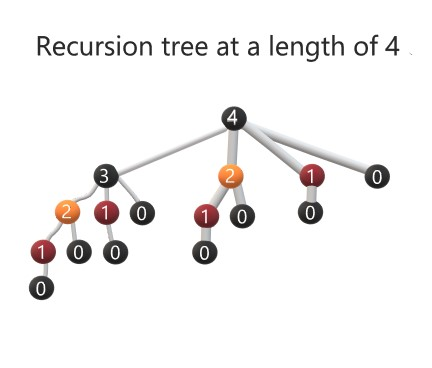

In [22]:
base64_data = "/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAFwAbADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDzD9pH42D9nv4S6n43bRjrwspYIvsIufs+/zJVjzv2PjG7P3ecV43f/tq+OfBemx6746+APiHw74SXY1zrFlqcV/5CMQA7II0+Xkclh1HcitP/gpN/wAmk+J/+vux/wDSmOvL/iX+16Pi18Po/g/4R8BeJLDxf4tsP7Ht38WQw6ZbBGjCyOjNITIdpOAADkjr0IM+3PC/ibTPGfh3Tdd0W8j1DSdRt0urW6jztkjcAqeeRweh5HQ81qV8ufEzxfefsQ/sf+HdOsJrbUfEVrHbaFY3F18tubuQMzSNkj5FCysM4+6M968g8WeLPE/wl8CS/EDTf2odL8b+M9PVLy+8KzX9nPp98pYeZBDCj7lIBOGQZO3gLngA/QKivlT4xftGeK/Fln8JfCHwuEejeLviRYx6r/aF2gnGkWRiWR3wQVZ8FxnBH7tuMlSO5+FvwD8cfDvxVpural8ZvEfjGzCOuo6XrESNBcExsFaLkmLa5VsAnIGM0CPcqK+eP2KPiF4i+Ivgrx3d+JNVm1e5sPGeo6fbST4zFbxrCUjGAOAWb86T4HfEDxF4k/ag+PPh7U9WnvNF0KXS102ykxstRJC7SbeM8kA80AfRFFfB37NyfGr9pLStavrv4rah4Y0DQfEFxbQSWtqktzfyKyt5cj5XEKKUG0Z3F2z0Fa0XiTxX8ev2iviN4M1j4val8LP+Edvls9E8O6O0VtcX8RBIuNz/ADS7lCttGcB16DqDPp342eJPHXhXwSdQ+Hvhi18W6+t1CjabdXAgBgJw7hsjJHHGe5POMHu4Wd4UaRPLkKgsmc7TjkZ718r/ALVniDxx8CP2VNPks/Gl7f8Aiiz1O1tZfEPlLFNcxvM33l5GdhVT64zW/wDtNfFbxnB4+8DfCX4b3kGjeK/FnnXNxrlzAJhp1nECXdEb5Wc7X6g/dx1YEAj6Mor42+KXhP4s/sr+E3+JWl/FnWfiDp+kSRPrnh3xJFG0V3bs6o7QuOYWUsCAPzOCr6/7UXxg8awa58A5Phjq62TeMryRVjugDbzxyxQmJph3VBIWwDnigZ9ZUV8UfF62+KP7KF54R+INx8WNZ8d6Ldazb6b4h0fVLaNYDHNu3SwIvEQBBwq8gleSMg/a9AjlPFHxQ8OeDvF3hXwxqt81vrfiiSeLSrZYXfzzCivLlgCqgBl+8RnPGa6uvhL9qf4W+Kb/APa0+Dgg+JOr2X/CQXmqnS/Lt4ydC8u3hL+Tk/OJMjO70rsv2lPE/wASvgl4c+Cuh+HfFt14i8S3/iJdNuL29iSP+1C5PlpOqg4TLKDt5wuetAz67or5S+IHiHxr+x78FfFfirxF8QLn4keI9WntbXTE1S2S2trS8feGKgNgRYO7bwP3XX5uPKvFniLxX8NfAc3j7Tf2qNK8X+N9PRb+98MS39lJp16o5ltoYVfIOCwBUAtjgISCAD9AqK+TPjt+1Hqcvhn4SaT4Q1nTfBGqfEi0TUn8Qa08fk6NZeSkrtmTCNId+1c9SpAGWUjhpvibqPwB+IXgK80v4+2/xe8Na9rEOja3o99f211cWvncLdxeUzMiKQcjpnaOd2QAfdlFFfOnx+8Na7qHi6S91n49p8J/BAto1tbGzmt7S4mnG7zJHnlKnHKgKCRx2NAj6LrlPAPxQ8OfExvEA8O3rXw0LU5dHvmaF4xHdRBTIg3Absbh8w4PYmvmv9lv4keKvjDo/wAXfh1N8SBrl54duYYNI8eadDG0stvOJCkmAdjMvlHv/ERk4FcZ+w78KvFs3ijx/qi/E7VorDRfHuoW2o6UtrH5WsSps3zSnOUZ8jIXgYFAz7yoor5M+MHhvX7PxNrmqeLv2m4/hykk8j6HoljLb2kVvACfK87eQ85IClhjgkgEjFAj6zrzX9pH4k6p8IPgf4t8Y6NDa3GqaTbLNBFfIzwsxkRcMFZSRhj0Irjf2JfjNrPxu+B8Gq+IbiC+1vTL+fSLq+twAl20QUrNgcZZHUnGATkgAHFT/ty/8mn/ABH/AOvBP/R8dAz1b4f6/ceKvAfhvW7tI47rUtNtryZIQQivJErsFBJIGWOMk/Wt+vk74tfHTU/hH+zz8IdG8O6jp+jeKPF1pp+mWerasyra6dH9ni866kL/AC4QMvXj5s4OMHy/x38UNY/ZtttD8a6L+0VbfFu3jvoYNf8ADN3fWk5nt3OHkt1jctGVPTHTIySAQwI/QGivk/4+eN/iTJ+1d8P/AAJ4E8TLoNprugXMtw9xAs0MBBlJuPLI+eRVX5VJxu254zWDq0/xL/Zf/aA+GVnqHxG1f4heC/HF+2k3dvrcab7W5O0RtGw+6CXBAXAwjgjoQDPs6ivlz4qeMPHPxk/aEuvg/wCBvFMngbSNA02LUvEWu2cIe9Z5SDHbwk8JlGRt3B5PphuF8bSfFz4B/HP4N+FpviXqXi3wX4i1wRGbUYoxeDBQSW8zgfvEIZWVuCDuH1APrDxB8VPDfhfx54Y8G6hfNH4i8SeedNtFhdvNWGMySMXA2qAo7nJ7Zrgvjp8aNc+GfxO+D/h3S7awnsfF+sS6ffvdxu0kcaiMgxFXUBvnP3gw6cV84/tCfCvxbfftrfC22t/ibq1lPr39rT6ZcpaxM2iItuzNFCCfnDD5ct0Brb/ay0PxX4X8T/szaTYa0PEfi+31u4t4NY1aIIss5EIWaVF7LncQOoXHegD7dor4l+NS/Ff9lO88JfECX4san450a71m307XtH1e1jjtysoOXhSMYiUbWxjGDs+8Mg/bVAgor5o+MnxE8a/ED49af8FPh9rg8ItFpR1vxD4kW3Wa4t7cuESGBW4DsWXLdQHBBG0g8F8TLj4mfsZap4Z8X3HxI1b4i/D281OLTdb07xEiPPbLITiaOUcjADYHAyADkHgGezftNfHDW/hXH4O8O+ELCx1Dxt4y1MaZpX9qsy2kGNvmTS7fmIXenA/vZ5xg+g/C6Hxtb+D7eP4g3GjXfiZZJPOm0FZFtWQsSm0SANkLgH3FfHP7Y3w18T3n7Tvwckh+ImqWkfiDWLiPS4ktoyNCZI7cM8PPzlycnd6V9peAPDupeE/B+m6Tq+v3PinUrVGWbV7yNY5bkliQWVeBgEDj0oA6GvBvhL+1lpPxi+PHjX4d6NpRay8NwNINdW7DpdukiRyKsYThQ7MA28525xzVX9pP4ma1qmq2Pwc+Hdxt8feJIS93fx5K6HpvSW6kI5VyPlQdSTng7c+Zfs8/D/R/hX+3F428KaDb/Z9K0rwTY28S/wATYa3LOx7szEsT3LGgD7QooooEFFFFABRRRQAUUUUAfNX/AAUS0i/1z9lXxLaadZXGoXTXVkVgtYmlcgXMZJCqCa6v47fAuD49fAmDQVk+weIbO2hvtE1FWMb2l9HGDG28cqCflYjkBsjkCvaqKAPhb4hW/jP9sD9j+3jn8PXFv8T/AAZrENzf6JqFr5Qv7i3V432qwAZZI5XbA4LKyDtVa3+KX7Oc2lwW4/Z8vJfGbIqyeFYfBg+0pP0aPcUC4DZ564HTPFfeVFAz5N/aG8Aav8M/iL8KPi/4K8KXGq6T4PtJdK1Xw7o8QM8WnSRlVMEIxnyw8nyg8fJ0UMR6J8Nf2uPB3xc8a2PhrwxpviK7uJo5Jbm6udJlt7eyCozYldwMEldoxkEnrXt1FAj4i+EvxNj/AGPfGXxN8E+OfD/iBdL1TxLc67oOrabpkt3BeRXCriIMo/1gCIMdAxYEjHO1+xndeIte/aF+PniTxB4b1Dwy2sS6ZcW9pfxMjrFsm8tSTwXEZj3AH5WJFfYdFAHzH/wT70fUND+EPia31GxudPnbxZqMgiuoWiYqfLwwDAHBwea4T9pL4qfA74gXHiLw78Qfh94kPjHSpbiw0+aHRJVvLhkcrFJa3CfejY7XXedvPII6/a9FAz8/Pip4a+Il1/wTo8J6b4vstTv/ABampWrPbyxvLeLbi4cxCUAFtyxlAc8gAbuc17N+054a17wR8Yvh18btA8P6h4rtvDkVzpmuaTpSeZdtZzKwWaKP+MozuSM/3eg3MPp2igR8U/HX9oeL9qL4f3Xwu+FHh7XtW1vxE0Nte319pktpaaXbiRWkeZ3A5wuMDjk4JOFPS/HLwJc+HviV+ytpGmWt1e6f4f1JrSS4jhZljjjggRWcjIUEJ3r6xooGfMn/AAUM0i/1r4BW0GnWVxfzrr+nyGK1iaRgoc5bCgnA9a+m6KKBHyt+2JNeeDfix8C/iRJpOo6l4a8L6hqKatJpls1xJbrcQxKjlF52jy3yfYdyAc/49eI4fjBqX7Nfirw3Y6hd6PN41hud8tm6PHEj7fMkUjKLlSQWxxg19c0UDPA/23PhHq/xi+A99p3h+1TUNc0u8g1ezsJFBW7aEndEQeu5HfA7nA714TY/FL9nO50dIX/Z9u18a+WFk8KJ4N3XKz4IMe7YF27hjccHHO0HIH3lRQB8c/tbfCKPRdY+FPj/AE74dQ+L/CPhKOXT9Y8IWtmkzJYyoAjRQn5W8k7jgDg7TwoYiLwD4y/Z08c+ONA0fwX8GTqGrXFwjPdr4TFvFpe0582aRlG3aRxtzzjkV9l0UAFfAer6t4M8D/tQ/E7Ufjt4K1PxBcXVxCfCl5caTJqdm1kEbEUKYZA33e3Db8lSDn78ooEfHv7FVnqT/HT476vdeC5vAthqR0Wax0qS0FusUPkTFF2qAofYULqPuszA8ioP2cfiBa/BX4yfE/4b+J9J1my1jxL46u9T0a4Fg7213BcbSjCUDaAFUMST3x1BFfZNFABX5v8AwN8ReCPAz+I7P4rfCbWvFfxwuNWuZGju9CbUZdRLv+78iSQMiKB/ESBtGQWGBX6QUUAfK3/BOnR9W0X4Q+L4da0qTR7+TxhfytavGUVcxwfc4AKZBAIGDjiu7/bW0+61b9lr4hWllbTXl1LYoI4LeMu7nzozgKBk8V7dRQB8UftIfCXWfEvwV+BPi/T/AAo3jNvBMNnPqfheSLe15ZyW8InURkHcwMSjbgkbicHaRUXh3xx+zZ411DSdL8N/AyXVtZv7mG3ksv8AhDlj+xB3VWknkK7FVASSQW+6frX25RQB8w+PNFvW/b6+Fl9DY3Dabb+F76J7pImMMbHzsKWxgHkcE1J+2DpN9qXxA/Z8ks7K4u47XxzaSzvBEziJAy5ZyB8o9zxX01RQM+M/Heval+yz+174m+Ius6BqmrfDrxzptrBcappNs1wdNuoI1QCRRzgiMt2yJOMlCK5b4vfGSX42ftB/s83uieHtVsfCNv4kYW2p6tatbSahN+7Mhiib5vKjQLmQgAlyP4DX0b8XfFXxu8K+MIpvAXgjQ/HHhWS0jD20+pixvYrgO+873OwoV2Y4JzmuU8A/Cf4jfEj4yaH8Tfi3Bpegt4Zt5YvD/hnRrj7QsMkyFJpriUjDNtwAFOOAeMfMAc/+1pfT/Dn9oT4H/E+80vUL/wAK6G+pWep3GnWzTta+fBsR2VQTj5mP/ACOuKi+O2sj4nfEj9l7xToNjqE+jza9NdebJaSI0UREQV5FIygOMjdjivriigD5f/4KJ6Pf65+z/bW2nWVxqFx/b9g/k2sTSPtDNk4UE4FfUFFFAj5D+Mia9+z1+1VD8ZofDupeJvBGu6Iuia5/ZEJnuNPdXVkm8sclMRx85xy467QcX4vfEKD9uOz8P/Dv4f6JrUvh9tWt7/xB4h1PT3tbS2tYjkxoXwXlYtwoH8Ppkj7WooGfLv7U+jahqX7RX7NdxZ2NzdW9prd89xLDCzrCu23+ZyBhRweT6GvqKiigR81eKf2EfC3ib4heIfGUXjrx5oWr67OZ7v8AsfV0t0PogxFu2L2BJxXinw2/ZXfS/wBtfxFp7eLPHx0vRdKstSttam1JvOvpBJCxt5pvLxJHyfkGOB7V+gFFAwqtb33nXU9u0M0UkWDueM7HU5wVfoehyM5HcYIJs0UCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKbJIkMbSSMqIoLMzHAAHUk0AOor4Z+P3/BSCLwtrFzo/wAPNOtdV+zsY5NW1AMYmYHnykUgsP8AaJ59O9cB4g/bn+Onwfm8MX3jTQ9EubDxBZLqVraSQmKVrcnAztbKMevzA9RxQM/SWivIv2c/2mPC/wC0h4Zmv9E8yw1Sz2rf6TcsDLbk5wQRw6HBwwx05APFeu0CCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvAf25vG154G/Zv8R3FjI0NxfPFp/mqcFUkb5/zQMv8AwKvfq4H46/CvTPjV8LNe8H6pP9ki1CH9zdDrbzqQ0UmO4DAZHcZHegZ+W/7L/wAEbv4n3GreN77Q7zxD4X8MnedJsI/Nm1W8ADR2oUchOVZ2PG3jPzZGn+25pvxB1jwP8LfGHjHw/f6ZdNZ3kGoNPAUS1nkvp3igPHB8oDaP7or5+17xR8R/2c/EeueCW1K50G5s7xvtEVuBslbAAlRiuWRlCkHoQQatfFv9pTWPit8PfAvhy8vby4bRbWVL5rgjbczmeR0k68kI4XPH0pIbPRP2EviFe+Df2nPBy2kriDVpzpV1Ep4ljlGAD7Bwj/VBX7TV+Mv7A/w4bVPidbeNNUVodN0Ul7Xdx51yQQpHsmd2fXb71+smieOGmhXzSsw/vdDV25jN+6dtRWfaa5aXYGJNh9G/xq+GDDIORSKFooopAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUjMFGScD3rC1rxppehxs09ymR2zQBvVTvtWtNOQtcTKgHbPNeP618cLjVLo2Hh+zmv7luFS3Qsf0qGx+F/jHxo4n8QaiNFtW5NvEfMmI9Dg4H5n6Uh27nR+KvjhpejBo7dhLL0AHJrlI28f/Eht1paNpNg/S5vSYwR6hcZP4DHvXpnhX4V+HPCBWW0sFnvBz9ruj5kufUE8L/wECuuoA+Ufjt+yv4I8SeHNNTxVYjXdaklYHVsmKdFA4RCp+6CScHIySa8X+H/7D3wqs/iNodvPpN3q1tNcfPbX12xQgKzY+Tae3r2r7G+N0ny6MnqZm/8AQP8AGvPPh/H53xX0AdlMzflDJRHdjlsjpvHX7MmhXGnRzeCra28L6lariK3t02Wsyj+BkHCn0ZR9Qe3l3h3xpqXhfWJNF162k0/UYDtkgm4+hB6EHsRwa+vq4/4jfC7RfiZpgt9SiMV5ED9mv4QBNAfY919VPB9jzR6C9ThbTVjqVuJrGcJPjO1j8rex/wAak0z4oNp92bS832dwv3kf+foR715HqVr4j+DWtx2GuqZLKRsW2pRA+TOPTP8AC3qp5+owa7C5j0n4jaWkVxIYLtRmG7hIEkZ9j3HqDx+ODVqVyHGx7RpXju1vlXcyvnupwfyrobbUbe6x5cqk/wB08Gvj+bQ/iF4JMky2Emu6dEf+PrTf3jBfVox8y8e2OvJxWv4X+PcbOIbiTZIpwyScEH05pXXUqz6H1lRXlPh34tW94qgXA/3WORXc6f4ttLxRkhfdTkUW7Cv3N2io4biO4XMbq49jUlIYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFZupeILHSYy1xcKuO2a808T/Hezs5Db6cpuJ2O1VjG5ifSgZ6vcXUNqheWRY1H941xfib4t6P4fRh5yvIPeuBt/Dvj/wCIbCW4P/CP6e/O+6z5pHsnX88V2vhn4H+HdBkW4vI31u+ByZr75kB9k6fnmkBw7eN/F/xFkaPw9psxticG6l/dxD/gR4P0GTW3o3wDN5Itz4q1eXUZeptbUlIh7Fup/DFevRxrFGqIoRFGAqjAA9BTqAuZ2i+HdM8N2ottMsYLGHusKAFvcnqT7mtGiimIKKKKAPJvjZJnUNJT+7HI35lf8K434Wp5vxVsDjPlwTP/AOOY/rXVfGiTPiCwT+7bZ/Nz/hXO/BpPO+KEhx/q9Plb/wAfjH9aUOo5bI+g6KKKYjP17w/p3ijS59N1WzivrGYYeGUZB9x3BHYjkV8wePvhbrfwbun1TSnm1XwtuyzfemtPZwOq/wC0Pxx3+r6bJGssbI6h0YYZWGQQeoIpDPnjwH8SY7xYZI7jbIOjA/oa9C1Lwd4M+KsWNc0W1l1Aj/j4QGOY8cESKQxx6En8a8++KHwButEuZvEHgWI7cmS50ROh9Wh/+I/LsK57wF8TEutsUrtHKhwytwyMP5GqTvoxNdUbHiL9lTUtJZ7jwd4jbA5Wx1XkfQSKP5r+NcPfa743+GMu3xJot3aQKcfa4x5kB9PnXI/DOa+nPDPjSK+jSK6kG48LN2P+96fWurdFljZHUOjDBVhkEHtStYFK582eFfjta3mzM67vUHBr1TQ/ibb3ir++ST2Y8/nVHxl+zj4J8XM866cdEv25+1aURCc+pTGw+/GfevKNa/Z28d+EmM3h3VrfxFbLyIJj9nn+nJKn67h9KLvqFl0PpKz8RWl2o+fYffkfnWkkiyLuVgw9Qc18bw/FLXvBN4ln4i0290ifst1EyhvdT0I9xXpHhf43Wl4FInAJ7q1PRhZo+gqK4nR/iNbXqrmRJM++DXTWuuWl0BiQIfRv8aLCuaFFIGDDIORS0hhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRXk/7U/xLufhN8CfFHiCxfy9SWFbW0cdUklcRhx7qGLD3WgDiPjt+3P4G+CurXOixQ3HibXrY7Z7WycJFC39x5Tn5h3ChsdDggivF9E/4KuaRJqSx6z4CurWyZuZrLUVmkUf7jRqG/76FfGHw58T+LJfE93D4Q8LQeMfEN3EWWOfRl1aWJQ2WkWJ1dQeQCzKcZ7Zq5+1QmmWGveEc6Tpnh/xpJosb+KNJ0eNYre3vPMfZmNPkjlaLy2dFwAT0BzSWo2fsf8ADH4oeHPjB4PtPE3hbUF1DS7glN2CrxSL96N1PKsPT0IIyCCepkkWNSzsFHqTX5FfsC/tJT/CPx1e+G7uQvofiBPljYkiG7QEo4H+0MofX5PSvvxNT8efEpgdMsXsLB+l5eExpj1Hc/gDTEj1PX/iJpGgxsZbhWYe9eZ6h8X9Y8WXT2PhrTp76ToTCh2r7k9APcmt7w/8AtOhkW68RXs2u3WcmMkxwj8Acn8Tj2r03T9NtNJtUtrK2htLdPuxQoEUfgKQ9DxzTfgvr/iaRbjxVrBtYm5NnZNuf6FzwPwBr0zwz4B0HwfGBpemwwS4wbhhvlb6uef6V0FFMAooooEFFFFABRRRQAVX1DULbS7OW6u5kt7eMZeSQ4AqxXz5+0J42k/t6HQkcpb20ayyKD952GRn6DH5mvJzTHrLcLKu1d7JeZ7GU5bPNMUsPF2W7fZIZ8SPG2neIvEC3Nm0jwRwiEMy43EMxyOenNM+Dutafpnjue4vLuO2W5tTbReZxly6HGeg+73NcNofjae1FtY2OmWN3PJJg+farO85JAC/NnA6DC4qp8R7ix0nxfq1rY7UtYpcKituCHA3KD6Bsj8K/NocSZhFfWFNSjdJx5bb3ej36a9tNz9H/wBVsHOf1aUHF2bUua+zS1W3X567H2bRXlf7Ovjqbxn4KlhupWnutNn+zGRsZaMgFM+pAyv0UdTk16pX6rhcRHFUYV4bSVz8rxeGlg8RPDz3i7BRRRXUcgV5H8XPgPbeM5JNb0J00rxKoyWAxFd47SAdG/2/zzxj1yigD5C8M+NtQ8N6tLo2uW8mn6jbttlt5hg/UeoPYjg17r4X+Ilvb2W+7nX7DGu5pXYDylAyST/dA/KtP4mfCnR/idpyx3qm11GEf6NqMIHmwn0/2lz1U/oea+Gv2jtS8UfCnT/+ER1VvLN784uoWOy5gU/wntk4yDzx71nOp7KLk9TtweFeNxEKMXa/5dT3n4g/t8eEvDF9JaaDpVz4kMZKtc+aLeE/7pKsxH1ArO8D/wDBQ7wlrWpR2niPRLvw7HIwUXkUouokyergKrAfQN9K+RfgLrHgvUPiNoGl+JdCuNeu9S1ezsbaFrkRWiLJKqO8qgbnI3DC5CnvnpXmfjq5hsvHHiG1hjWGCHUbiOONBhUUSsAAOwAFeUsRW0lf5H6WsjytqVDkaklfmvv6a2/A/aZf7J8YaJFKBZ6zpN5GJEYhZoZkIyCOoYEGvLvFX7LPg7XGafShc+Gr08h7CQmIn3jbIx7KVr58/wCCa/xTvNUXxN4Gu5zPbWca6lYqxJMSl9kqj/ZJaMgepY96+5q9WElOKkfmuMwzwdeVFu9j5P1j4J/EnwOxl0uaDxPZrz/o7+VPj1KMf0UmsrS/jVf+H7z7DrVtdaZdrw0F5E0bD8CK+xazde8N6V4oszaavp1rqVsf+Wd1Erge4yOD7ir9Di9Tx7wz8aLW6VdtwFz/AHW4r0XSfH1tequXR891ODXnXif9k7w9eu9x4c1C88N3JORGrGeD/vljuH/fX4V81/tMQ+Pf2f8AwPIby+t5bfU5PsVtqFnMQwJUk/KcMp2g89B60+Z9Rcq6Hu/xc/by+G3wqvpdOSS78R6rCdstvpqqY4m7q0hOMj0XOO9cJ4R/4KhfDrWdTjtdc0TWPD8TttF3hLmJPdwuGA+it9K+Efg14V0fxtrniPVfEnmz+HPC2jXGu39tDJ5cl4IyiR26v/CZJJEBbqBuxzimeKdM8GfED4M3/jrwp4cPg3U9A1eDTtU0uG9nvLeeC5RzBOjyszo4aGRWUnacggj7tJajZ+1XhzxJpfi7RLPWNFv7fVNLvE8yC7tZA8ci+xHvwR1BBBrSr8wv+CX/AMar/S/iRffDu5uGl0fWLaS7tIWJIhuYl3Er6Bow+fUotfp7TEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXjn7Xnw1vfit+z34t0LTEMmqiBby0jBwZJIWEmwe7BWUe7CvY681+MHjr+wtL+wWgae+uGEaQx8s7scKgHqSR+lJjR+J/wAP/B9/4oudWktfGGh+DtY0t41SHXNVGmyz7t+7ypGwuUKDILA/OuM847L9pXx9p2q+D/hn4Yn8S2fjbxh4ds7uLV/EdlK1wkiSzB7e1FwwzN5KhhuGVG/Cng1+gPxM/wCCavgn4taTBqN9qF14e8azKZb3UbFVkglkbkhoTjO3OAyspOMnJPHz58M/+CXmja542l03WvHF5JZW8UkzLZ2KxySBXVcbmdgud2c4PSgDwj9iv4V+Ifid8YLLUdI097y18NgarctjC/IcxoD0Ls2ML3wfQ1+wvwx+Idv4s02KJ5QbgLhWY8tjsfcVL8Ifgz4R+BvhOPw94P0pNNsQ3mSuTvmuH/vyOeWP6AcDArl/iV4HuPDeoz+MNBD7d3m6lZR98cmdPRh1Yd+vXOauI9forlvAfja38XaZG4kU3AXJx/GP7w/rXU0gCiiigAooooAKKKKACiiigAr49/bAsb7wt41tNdCMdM1KBYzKBwsyDBU+mV2kevPpX2FXi/xoudL8WabcabqMEd3pw4CP/e/vqex9CP615OaYKOYYd0HvuvVHuZPmMsrxSxC2tZ+jPnzwz4r0/T/BNlc6P4k0XT/EN95v2y4vrkpPaRhtqxxfKdpYAsWHPIANeWeLPEy6RfSWq6ha6iwAPn2UpkjbIzwcDmut8J/st3fxO1/VIPD+qC006yA33N6hZQxPEYK9TjJ6dver3hn9nLT/AA74gu4tdum1O5sZ2i8lV2RFlJGT3YHGe1fFPIa9Rxpunypdb6ebt57s++XEWGoqdWNXmcultfJX8tl0Pon9jbwzfaT8L5tW1BGik1m6NzCjdfJVQqH8SGP0xXvVcD8Fr4TeEDZgBfsM7xKo7KfmH/oRH4V31foeHoRwtKNGO0Ufl+KxMsXWnXnvJ3Ciiiug5QooooAK+K/+CmPw91HU/BOgeNNOhkni0aSS2v1jBOyKUqUkPooddpPrItfalV9Q0+11exuLG+tobyzuI2imt7hA8ciEYKsp4II7GonFTi4s68LiJYWtGtHofh78E/FVnpvxs+H17f3UVlZ2/iLTpri4uHCRxRrcxlnZjwFABJJ4AFYnxE8QQXXj3xLNbTJPDJqdy8ckTBldTKxBBHBBHev0L8cfsZ/CXwp40uza+G2uIrpRciC6upHjtyScpGoYfLxn5tx5POOKxvAv7Efwu8efEL9/pl1p9nZRfaZLOyunEdydygK+7cVXn+Aqa4Y4dtWPrnn1Ln57Pa3T17lf/gl18NdRgt/E/j+9ieCzvI10ux3AjzgHDyuPYFUXPruHavvuqOh6Hp/hnR7PStKs4dP02ziWG3tbdAqRoBgACr1d0I8sbHyGKxEsTVlVl1CiiirOUK+UP+Ck3w71Lxt+z22qaVA1xc+HbxdQmjjBLG32MkhA/wBncrH0Cse1fV9MmhS4ieKVFkidSrI4yGB4II7igD8Pv2WdctNcvviD4DuLy3sdQ8ZeGp9M0ua7mWGNr5JI5oYWdiAokMbICT95lHOa1vEXhnU/2e/2Z/FXhnxlZro/jDxjrdgYNGndGuorOzWVzcsqk7VaSUIuTzhsDAzX2B8eP+CVHhPx5rFzrPgTW28H3Nw5kk0yeHzrPcTk+Xghox/s/MPTA4rz3wJ/wR9uYtUSXxd49tzYI2TBo9qxkkHpvkwF/wC+WpDOH/4JY/DfUvE/xwuPGXksukeHbOUNcMPlaeZDGkYPrsaRvbHvX60VyXwt+Ffhn4NeDrTwx4T02PTNKt8ttXl5XP3pJG6s5wOT6ADAAFdbTEFFFFABRRRQAUUUUAFFFFABRRRQAUUjMFUknAHJJr5/8a/Fe88Ua0dM0q9XT9N8zyhMZPL8znBd27L/AErx8yzSjllNTqK7eiS3Z6+W5ZWzKo409FHVvoj38OpYqGBYdRnmsLWvHGj6DHI91dqipyx6Dv3PB6dvavm/VbFbPTZ9Tsdch1BbWRFuDD5kbRF2Cow3AbgWIGR3I9aZ4G1HQ9b8bWEXi2JtUglIhgFzKzRJKT8pdOjg9Pm45zXg4XiaFWvGhiKXJzbO6kn03Xnp113Per8M1Y0JV8PU5+XdWcX32flr002PTtS+PcOuTfYPClhd65e7sbbKMsAe25+ij1yQPwrT+H/w11H+3G8T+LvKk1Yf8eljG/mR2mRyxPQydRkcDsTnNemWtrBYwJBbwx28KDCxxKFVR7AdKbe3kGnWc93dSrBbQRtLLK5wqIoyWPsADX2p8XvoievGPhl+7+J+oD/p2uV/8jR/4V8w/GL9rrxl8RvE7aJ4CkvdO013MFtDpyE3d4c8NlRvBI6Kv45rx/xhrnxR+CPijT21PW9T0bXLy0XUEVb4vII3d1xIASMkxnKnPbNcLxcb+6rrufZ0OGK9SC9pVjGb1Uev9fefrLRXyh+yL+1/P8WNQXwd4t8pPEoiZ7O+iUIt6qgllZRwJAAW44IB4BHP1fXZCamuZHy+LwtXBVXRrLVHiHjLw7P8LfEcWuaUrJoV3P8AvI41+WymP8kfJHoCdv8AEBXrXhvX4fEWlx3MTL5mAJUX+Fv8PSvDf2wv2kNG+Cvg9tHeyh1rxBrMDLBYTH93HH0M0mOcA/dAwSQeRivgbw94q/aH+JVndat4Pu/Ej2EbiAyaRcG1SR1BIjTay+a4BJ2ruIBJxV36HJbqfsBRX5O/Bb/goV8SPhj4kTTvHE9x4q0SObyb211BAL62wcOUkOG3rj7smRwR8pOa/Uvwl4q0vxz4Z0zxBol2t9pOpQLc206fxIwyMjqCOhB5BBB5FAjXooooAKKKKACisrxN4o0rwbotzq+tX0Wn6dbruknlPA9AB1JPYDk18w+Kv+ChnhrSb6SHR/DV9q8CnAnnuVtg3uBtc4+uKxnWhT+NnpYTLcXjr/Vqblb5L73ofSHjPXl0vT2iRsTSDn2Wvmfx9rt3q1/b6TpqG41C9lEEES/xMTgfh6n0rAj/AGwPD3xFmkimjn0XUJThIrkho29FVx3+oFes/s3+BX1K6n8d6pFlpt0Olo4+7Hkh5fq33QfTPrTpyU/eTMsVha2Dn7KvFxZ6x8NfAtt8OvCNno9uRJKo8y5uMczTNy7n8eB6AAV5B8UdP/sn4lXjAbY72KO5X8th/VCfxr6Ir5G/a8/aI8E+AfEOnWv2w6p4gs0kjurGywxiB2lA79FOd3HJGeQKtnIj1f4Kah9n17VLEni4hWZfqhwf0f8ASvYq/NTwL/wUE8O6D4xsL7UfDeo29lGWSVrWZJXKMpB+UhRxkHr2r7++GXxV8LfGHwxFr/hPVodV05zscplZIXwCUkQ8qwyOCOhBGQQa0eupC00OtoooqRhRRRQAUUV8v/toftXTfAvTLXw/4cMTeLdRiM3nSKHWzhyVD7TwXJBwDxwSQeKAOw+LTbvGTj+7bxj+Z/rTPgOu7xhrj/3bVF/N/wD61fAHw6+JHxz8VWeoeINP1yyvtL+1C2e88VajawQy3JAIgjkuJELPgr8qtgbhnGRVPT/2xfi78HPitONYgt7G80+X7Lqmgy2wRJVBBKseWB7q6nvkZBIKj1HI/X6iuS+FPxM0f4wfD/R/F2hSM2n6lD5gjf78LglXjcf3lYEHscZGQQa62mIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAwvHU01v4J1+WDPnJYTsm3rkRsePevhvTNcl1q/t7KyRrm7uJBFFCnLOxOABX6AMoZSCMg8EGvgz4xfDTXvgP8Rodb8FzNc2YlEtqu0TS2zsCPLZWB39eDg9Rnnk/E8R5bLGOnVV3GOjtvbufoPCuaQwcatB25paxvs32Zt614qsPBei6joVtdR6hqt5sjv7iPmGBUbd5UZ/iO4Dc3TjA9a8v1Txc3mIsLEylgEVOu7PGPfNc1ffFzxBf29xp50fRUadGhPk6HbJKuePlYR7lb0I5Fey/sq/s8al4s8R2/i3xPG1tpWmTh4bKUYknmUBl3KeiDIPPXp0zXytHKpYqvCNL4Vptsr3/W/qfY1s2hgcPOdbST13+J2t2XZK3b7z7jtPM+yw+d/rti7/8Aexz+teS/tdaldaT+zn41ubPcJRbxIxXqI2njV/w2lq9grH8YeFbHxx4V1fw9qaM+n6nayWk4U4YK6kEg9iM5B9RX67KPNFxPxShUVKtCo1s0/uZ+Jy+Mr3S7xbvTr2exu03BJ7aVo5FyCpwwIIyCQfYmvQf2iNSdrX4VyO5Z5PBNk7MxySTPc81yn7RP7O/jP9nvxRPaarZy3eiSSN9g1mFCYLlOo5/hfHVDyPcYJ4jxx8T9S+IUXha3msY7dtC0aHRYfs+4mZI5JHDtn+I+aRxxwK8f2fKnFn6ssdGq6daDulfX5Hd/AnxFd2Pxu8BTWDN9rGt2aoq9W3TKpX6EEj8a/a+vzk/YA/ZF1+PxVZfEvxnp82lWVjmTSbC7jKTTykECZlPKooOVzyTgjgc/o3XpUIuMdT4POsVHFYhOPRH4+/8ABQDxVeXX7Tfiu3u2YCzFvb26N/DH5CMMexLFv+BVyH7S2uXfhvRfgVp2lXEljaWfgy01q2MD7Sl5cXM8k0wI6MXReeuUr6t/4KUfsl6743uo/id4LsZNTvYbdYNZ022j3TOiDCXCKBlyF+Vh1AVSOAcfFGj/AB08IX3g7wrofxI8BX/iTUvCJeHTL3T9VFkbi0aRpRaXYaGQvGjs+0oVIDFeOp3W54HQ2f2ymisv2kfFjokcL3aWN9PHGoUCeayglmyBxkyO5PuTX6D/APBL3XL7WP2a5obt3eCw1y5trTceFiMcUhUe2+Rz+Jr8xbDSfH/7XHxl1C60zR5NS17W7o3EyWkW2C2QkAZPRI0UKuT2A6mv2s/Z3+DVn8BPhHoXg20kW4ltIzJd3SjHn3DndI/0ycD/AGVFWSek0UUUgCiiigD89P29fixdal8Sh4SSdk03RoY2eEEgPPIgcufXCsoHpz615f8AC1vAviTwT4ztZdEvL/xVZeGb/Un1C7uALe2eNlEYgjXliVdSWc8EEAY5rc/4KQeB9R8H/GJPFIhdtH8QW8ZWdR8qzxIsbxn0O1Ub33exrxj9n/xVYWK/Ew3l7b2hn8FajDD9olVPNlJi2ouT8zHBwBycV40ov2zcj9UweIhHLacaTtZLZ216/icj/aeR1wRX6pfsN/E65+JnwHsPt0nm32iXDaS8h6uiKjRsf+AOq577TX4+vrAY4Q5Jr9cP+Cf/AMNdR+Hf7P1pLq0L21/rt3JqpgkBDRxMqJGCO2VjDf8AAxW2Fi4yODiTEU61FX3voekftJfEqb4SfBPxT4ntSq39tbCK1LdppHWNG99pfd/wGvyT+EPh22+MXxgstP1+7uG01xc6nq1wj5meCCJ55cE/xMEKg+rZr9Xv2rPhvffFj9n/AMYeHdLQy6rNbLcWka9ZJYnWVUHu2zaPdq/IL9mbx1pXgr44WcHiq6/snSNStr3Qr66nGBai5t5IA75xhVd1LHsoY9q9F7n54tjrluPCXxv+G/xDv9L8Fad4L17wlBBq1i2jyXEi3diZxDNFcCWVgXXzY3EihSdpBGDWn+wf8Zr/AOGX7QXh6xinkOj+JLiPSb61DfK5kbbE+PVJGU564LD+I1lab4PvP2bPhj8UrjxZe6VHrPiPTk8O6LZ2GpQXj3cb3EUs1yPKdtsIjiGGYDcXAxwapfsG/DHUfip+0f4VaCCR9M0O6TV76fadkaQsHUE/7ThFH19qsk/biiiikAUUUUAFfj1/wUK1W9tv2ofFcV5uVfLtPs+7p5X2aPGPbOfxzX7C18b/APBQL9jjUPj5pdn4t8HRxv4x0qAwS2TME/tC3BLBVYnAkQlsZ+8GIzwoKY0fBfxuung/Zz+AltAx+xXFrrF5JtY7ZLg37IxIxjcqJGvrj9Yf2rrot4m8A388hk1LUPAuh3N+znMjTG1C7nJJJYosZOeeay9P+JGp/DXwonw3+KXws/4Say0m9lvtMtdWlutNu9PlkAEqh48M0TlFJQgZIznpjS8KfCb4s/ts/Fi41xNEa2hvpUSfURbtBpunwIqokaE5wqIqhUBLHHfk00B9+/8ABLCa+m/Z01M3O42o1+4Fru/u+TBux7bs/jmvseuJ+DPwp0r4J/DXQ/BujbntNNh2tO4AaeUktJI3uzEnHbgdq7agQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRWRq3ijT9Js55WuoZJIh/qVkBYnsMUr2Gk3sO8R+IrXw3pst1cOq7RkKTjNeWfDPSZ/iB4sk8Y36N/Zlq7LpwccTynIaXH91RwPck/w1R0Tw/efGzXbq+1SaSHwtaTbPJj+U3sg6rnsg4BI69Oxr3K3t4rO3jggjWGGNQiRxqAqqBgAAdBR5gZfinT47zw7q6iJPOltJU37Ru+4cc1wnwLud0Oswf3Whl/76Vh/7JXqLoJEZWGVYYNeKfB/UIdF8Q39veXEVsptcFpnCDckgHU/7xprcR7bRTIZkuI1kidZI2GVZDkEexp9AEF5ZW+pWsttd28V1bSjbJDMgdHHoQeCK+fPGXw98L+BfidZ6npnhvR9M/1F4r2ljFEQVfDfdUYzt59c19FV5R8ctPG7Rr0RHkyWzyjGOQGVT+TY/Gl1uUm7NJnq9FZHhG/Gp+GNLucgs9sm7H94ABh+YNa9MkK4DxZ8Afhr471FtQ8QeBPD+rX7Nue6uNPiMrnOfmfGW/Emu/ooAxPCfgfw74D0/wCweG9C07QbMnJg021SBCcYyQoGT7mtuiigAooooAKKKKAOa+Inw58O/Fbwpd+HPFGmxappVzgtFJkMjDo6MOVYdiPUjoSK/OXxt/wT68PWviLVbfSfFWoWtrBcPHEl1bJMwUMQAWBTJ98D6V+n9fNnipt/iLW29bub/wBDNZSjGTV0dlHFVsPF+zlY8n/ZT/YN8DWN7L4m8QXNx4mutOvfLtrS4iVLXKorbnT5t/LDgnHHINfdQAUAAYFeYfs9rt8H6if72pSH/wAhxj+leoVpyqOiMKlapXfNUd2FfKH7Sn/BOvwF8fdaufEVjdTeDvE9yS9xdWcKy29y56vJCSvznuysM8kgnmvq+imZH5paB/wR2dNUVtZ+I8baerZK2WmnzXHplpMKfzr7p+CPwE8Hfs+eExoHhDTjbQuQ9zdztvuLpwMb5HwMn2ACjJwBXolFABRRRQAUUUUAFFFFAFa90yz1JUF3aQXQQ5UTRq+0+oyOKnjjSGNUjRURRgKowAPYU6igAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACorq6israa4nkWKCFDJJIxwFUDJJ9gKlrgP2gGul+CHjprLd9oXRrpht67RGS2P8AgOaUnZNmlOKnOMX1Z8TfG79pTxb8aPFsnh7wi99Fo0kpgs9O08N595jPzPt+Zsjnb0AA7gmvE/if4I8SfCbUNIh1yaK3v9QtPt0cdtciRoV8x49rspwGBjPAJx65yB5hL4pngmMtvcSQSjIDxuVYAgg8j1BI/GvSfj5fH/hE/g8xblvCKHP/AG+XVeBZ1LyluftNCdPB+yoUUlB3T01ej1ufRH7Gn7Wmoab4k0z4f+Krn7VpN/J5Gm3sg/eW87sSqMf4ldjjJyQzDnHT9Aq/CLw3qV5P4m0iLTix1BruJbcL18wuNuPxxX7u16uHk3GzPzviChRpYhToq3NukfOn7ZH7Tj/AHwraWWi+VJ4r1YN9n85dy20Q4aYjuckBQeCQSemD+btp4R8afGax1DxZqnibT9M0mO7Fm2seJtUFrBLdON3kxk5y2DuOBhRySK9U/wCCnl7e2H7QNsLgv9nk0a3a23DjZvkBx/wMNXj3xluyv7LfwGWFz9nnl1+adVPBnF4icj1EYTGfU109T5joO8P/ABM+KP7KPxGu9Nt9UuNJ1KxlU3WnNMJ7O5UhWUlQSjqylSGHODwRX62/s8/G7TP2gfhfpvizTo/s0zk299Z7sm2uVA3pnuOQwPdWXocivyK/aqunSf4SSzlvtknw80drjd94nEoQnvnyxH1r7K/4JJyXsvw+8evJu/s86lbiHPTzPKbzMfh5f6VZB96swVSScAckmvzG/a4/bQ1vx54hu/DPg67bT/DdlcGNLq2/197IpK+YG6qvXaFxkHnOcD9B/jTPd2vwd8czWG77bHoV80Gz728QORj3zX4v/Ae8tdW/aC+HNpfbXtJvEdhHIknRgbhBg/U8fjUMtHYa98K/iv4M0/UdfXWo49T0mBb7U9OsNejbVdOhYjEs0Cv5igFlzgEruBYAZNfQ/wCxX+3lrt34q0zwJ8RtRbVbPUHFtp+t3JzPDMxwkcz/AMaseAxywJGSR08J+COpX2pftseKkv7hgt63iWHUjO5cNF9kuywfJ+YAqvX+6K+bNH1KeHUrNrV3W6SVWiaMkMGBGCMd81aJP6JaKr6c0zafatcjbcGJTIvo2Bn9asUgCiiigAooooAKKKKAPhP9tL9tPVfCevXngXwHefYLqzPl6lq8ePMWTHMMR/h2/wATdc8DGDn5LtfBfxz8RaIPE+nz6zPBdQSajF/xOkS8uYVyXmjt2lE0q9TuVDnrXlfxQ168m8ceIvt5b7edQuDcb/veZ5jbs++c17x8WdZ1Hw7/AMFFNEt9PkkgXSdb0PTrCJGKqtqI7ZFjGOiOjHI7hz61K7lPsaP7Kf7dfiT4UeIrbSfFl7Lrvg68nAuWuPnuLRmwDMj/AHmxgZU5yBxg1+s1tcxXlvFcW8qTQSoJI5I2DK6kZBBHUEV+AvxijttF+MHjrT7JlNna69fQQFAAPLW4dVxjjGAK/aj9lGe9uf2bfhvJqDM1ydEt+X67AmE/8c21bIPV6KKKQwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKZNDHcwyQzRrLFIpR43AKspGCCD1BFPooA/KH9qr9hvxl8NPEeo634L0y58Q+Dp5GmiSxQy3FiCSfLkjGWKr2cZGAM4NfPPijxP4u8eQeG9Eu9JczeHrD+yrWO2tpBKYhK8mJBk5YNI3IAr95K8b+PzBfsh7i2kz+YrldBX0e59DTzmrGCU48zWzPlP8AYb/Yi17SfFFh8QviHYPpi2DCfS9HuBiZ5v4ZpV/gC9Qp+bcATgDn9EKjt1McEanqqgfpUlbxioKyPHxGIqYqftKh80/tu/slj9prwTaz6PPFZeMtGDtYSTHbHco2C0DtjjJAKnoDnPDEj8zI9d8f/s+6PN4B+IvwstfEehw3x1CzsfEtrcILa5IUM9vPE6Eo4RdyhijYHvn9yaRlDDBGR6GrOc/DTw78H/jL+2N8SpNZ/sG5Jv3RZNSktmttNsoVUKiIxG1URAAqLk4Hc1+wv7PvwR0n9n34X6X4P0l/tH2cGW7vGXa11cNjfIR2zgADsAB2r0YccDgUtAhk0MdzDJDNGssUilHjcAqykYIIPUV+PX7X37FXjX4C+N7rxb4JsrzU/Bn2j7baXlgrSTaWwbcElAyVCNjbJ0I25Ibiv2IooGfhZ4k/am1TX49dutN8AaJoHjrxJayWOt+J9OWfz7tJT++KQs5iheXkSMi5bccbcmvd/wBg/wDYY8TeJfG2kePfHmkzaN4Z0yVby0s75Ck1/MpBj/dnkRggMSR82ABnJI/UmLwxo0F6byPSbGO7JybhbZBIT67sZrToEFFFFABRRRQAUUUUAFFFFAH5j/8ABQD9hzxHJ4u1L4kfDzTJdXsNSY3Oq6TZpunt5zy8yIOXRj8xxkhix6Hj54t/2qE0++0bX9W+F9rffFnQrSOxtvFVxfzqpeGPyoJ57MrtlnjUL8xYZKKSOAB+39Zt34Z0e/vFvLrSrG5u1xi4mtkaQY6fMRmgZ+NX7Kv7F/jj9ojxja6zr9je6T4OM/2m+1a9Ro2uxuyyQ55dmyfmHAySTng/s7pem22i6baafZQrbWdpCkEEMYwscaqFVR7AACrIAUAAYFLQIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigApM45PApa+fP26PijefC74B6hLp0zW1/rFwmlRzoSGjV1dpCD2OxGX/gWaAOZ+Nn/AAUI8EfC3VLrSNGsp/Fuq2zmOY28ohtkYdR5hBLEHj5Vxwea+ede/wCCi2nePNVt01zwlLpdmNsbS2d2J2VN2WO0quTj37V8/fBXQdC14eNvFfiaxbV9D8I6O2pvpvmtGt5cNIkUETupBVC75bBBIXA61X8dQ+HviL8Cbb4iaP4Y0/wfrGka6ND1Sy0gzG1vIpoWlt51EsjmN08qRGAJ3bg2R0pLzGz9kvh38SPDnxW8LWviHwvqkOq6XccCSI/MjDqjqeUYZGVPPI7EV01fkx/wTT+Ll/4U+O8PhLz2bRvE0EkUsBPyrPFG0kcgHrhWT/gfsK/WeqEFFFFIAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvnT9vf4V6j8Vf2dtVh0eKS51XRp49Wgtol3POI1ZZEA9dkjsAOSVA719F0UAfhv+zfr1hrWmfEv4dXuoWukah4w0VbbS7jUJlhga9guEnigd2IVPM2MoZiBuKjvV7x5pv/CjP2crvwFr93p7eN/EPiGDU59Lsb6G8NjZ28MiI0rwsyB3eU4UNnaue9foJ8fP+CbPw2+NGtXWu6bPc+C9dunaS4l0+NZLaZzyXaEkYbPXayg88ZOa8s8H/wDBH7wxpuppP4j8e6hq9mrAm2sbFLVmGehdnkx+ApDPF/8Agl78J9S8Y/HAeNHgkXRPDUEjG4YEK9xLG0aRg9yFZmPptHqK/XGua+Hnw58OfCnwrZ+HPC2lQaRpFqPkhhHLMerux5Zj3Y810tMQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH/2Q=="
display.Image(b64decode(base64_data))


**Figure 8:** Recursion Tree with a length = 4.

Below is the bottom-up approach. Like memoization this uses an array to store our recursive and adds for loops to quickly run the function.

In [66]:
#Bottom-Up function
def BotUpRodCutting(length, price):
    
    arr = [0] * (length + 1)
    
    for i in range(1, length + 1):
        for j in range(1, i + 1):
            arr[i] = max(arr[i], price[j - 1] + arr[i - j])
            
    return arr[length]
 
    return maxValue

In [69]:
start_time = time.time() #This calls for a new function of time that will only check this code.

print('Maximum profit for rod is ', BotUpRodCutting(3, [2, 5, 6]))

print("--- %s seconds ---" % (time.time() - start_time)) #Will print out the time in a tenth of a second.

Maximum profit for rod is  7
--- 0.0 seconds ---


Time complexity is $ O (n^2) $

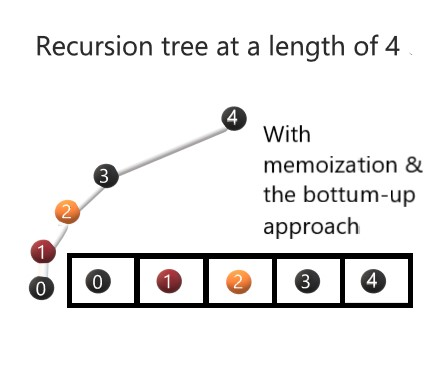

In [5]:
base64_data = "/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAFwAbADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDyf8Aac+Ob/s7/Cu58ZR6KviBobqC2+wtdfZt3mNtzv2PjH0ryXVv2yPiP8PrFNb+IPwA1jw94SVkF1rGm61DqBtlYgb2jWNfl5HJYDOBnmp/+CmDbf2WdROM41Wx4H/XWvOvi9+1hf8Axq8Kp8HPDHw88ReHPE3jG1/s6C58axRaZCIzgStGGc+YdoIAGDkjGTgEGfb/AId8Qaf4s0DTdb0m5W90vUbaO7tbiPO2WJ1DIwzzyCOtaNfLPxv8dXv7F37J/hfRdDuIbvxAq2vhywv7rCwxTtGxe4bdwFUI5AbjO3OQDXi3jTxxe/B/wSfHvh79qm18feNtPMdxe+GbvV7W507UVLgSww26NuThiQV5wvG3ggA/Q+ivlD41/Hrxd451P4V/D74XXkfh3xB8QNMXW59YmQStpunmLzMqCMFiA4z1GzjBYEehfC79n7xT8N/F1nq918YvFni+y8p0vdK191ngmZlwrx94trYOBn0oEe20V87fsP8AjzxB8QPhn4nvfEerXOsXdr4q1Cyhmum3MkKeXsQH0G4/nSfs++PPEHiX9o74/wCh6pq1zfaRod9pyabaTNlLVZIpS4QdgSo/KgD6Kor4M/ZY0/4w/tIeH7nW9Z+K2s6BoOh63Pb2iWKqbjUJFdXcTvkZiVSqBO+W9Obtnr2vfHz9or4k+E/Evxj1z4W3GhamdP0Dwzod2thLewgtsuNzczFwFfaMnDjoMUDPqb43a98QPDfgkXvw18O2HijxELyFGsNRn8lDblsSMDuX5gMdTwCTg42nv1yVBIwe4r5X/aw1zxn8D/2YdDNj4z1C98R2mr2VpNr+0RT3UbSPneBkcrtB9cZrY/aY+JnjW5+JXgX4P/DrU4vD+v8AidJr3UNekiEr6fYxA7jGpGN7bXAPYqAMFsgEfSNFfGnxc8H/ABM/ZP8AB3/CzNE+K/iTx7YaRPbvrvh/xQ6zxXlu8ixuYWxmEgup46DJJONraf7U/wAVvG3/AAl37P6fDPXDph8Y3FwB5w3W8qSR25jklT+NUEjPjvjFAH1xRXxN8XdL+I/7Jmq+DPHw+LHiHxzo19rdvpWvaNrpRoHjm3EyQKMLFjacBRkEryQCD9s0Acd4s+LHhzwX428IeE9UuZY9b8VSXEemQxws6uYUDyFmAwoAZRz1LfXHY18G/tSfCnxDfftcfB9I/iPrlofEV5qjae0KpnQ9kERYW/qHyM59K6/9qDxB8SfgvofwQ8P+FfGN5rPiW/8AEA0yW/1HCDUmcjy1uAvBUFgDjsKBn2HRXyh8SNd8Wfsa/A/xP4m1bx9qHxE8Taxc2tpp7a6FjtbS8feGZFBwkQXc+zgfugM85HkHi7xXqfw68A3XjnRf2s7Hxd8QdPRb6fw7LrFpLpd+FYGS3itg+Qdu4DbyxGAFLZAB+h1FfIv7QH7Ul7N4Y+Euj+GNf0/wDefEezj1OfxJq0sYj0axMKSuQXIXzDv2qT3UgYLAjgl+Ki/AT4jfD+68PftBD4v+Hte1eHRtd0bUtYgv57YTcLdw7CWREIJI6fdGTu4APveiivnH9ofwvdX3ipdS8R/tAT/CfwiLZYrPS9OvIdPmmm5LytO7Bn7AIAfu5yOaBH0dXI/D/wCKXh/4nTeJY9AuJbn/AIR7V5tEvmkhaMLdRBTIq7vvAFgN3Q4OMjmvmn9lX4ieI/jBo/xd+G7/ABJl18+H7iGLRfHViqm6e2uBIVcnozIYupycsRkgCuV/Yo+EPiWbxl8RdVX4m69FZ6F8QNQtb7TFSPydYkjKb5p/RpMjOPQUDPu6iivkP4yaBcWXizXdR8Z/tST+AHeeSTRtC0u7gtEtIAf3YljyHuDjBIIHUjJ60CPryvNf2kPiJqnwn+B/i/xdoqW8mqaTaCe3W7QvEW3qvzAEEjBPcVw37DPxi1v40/AmHUvEd4mp61peo3Gk3GoRqFF15e1kkwABkpIgJHXGe9aX7b3/ACal8SP+wcP/AEalAHp3w38QXPiz4d+FtcvVjW81PSrW9nWFSEEkkKuwUEnAyxxya6Ovkf4sfHbUPg7+zV8H9K0HUtP0TxJ4ssdN0u11jVnVbXTY/s0XnXUhb5cIGXrx82cHGD5N45+KEv7O9jovjjwv+0oPi1Pb38K6/wCF77Wba6W9t3IEjWsSuWiKnGAM4BznCkMDP0Ror5J/aE8afEa4/an+GngrwF4nbQbbxDod080ksYnt4cCRjceUeHdUX5ATjdtzxWH4it/iF+y58fvhf5vxM1/x54P8bap/Yt9YeInErQTuVVHjIG1BucMAoXGwjkHgA+0qK+W/iz4n8cfGj9oWb4PeC/FVx4E0TQtMi1XxFrmnx5vZGkI8q2hY/cyrK24EHluoXa3n/wARLH4rfs+/Gf4M+H4vijrfirwR4i8RwW8h1dla9Vg6CSCWUD97E6sCM9CrdO4B9ZeKPi14b8IePfCfg3UbqVNf8TtONNt44GZXEKb5GZwNqgDHU5JPTrXCfH74ya78MfiB8INF0iKyks/FniAaXqBuomd1i+TmMhhtb5jyQfpXzn+0t8J/EWoftlfCe3h+JGuWcniCXU5tPniVN2iKkALJb+oboc9q2/2uPD/ifwjefs26PYa5J4k8V2/iUwW2sawgzLOxjCSzKvVVLAkDqFoA+3qK+H/j1p/xQ/ZTtfDnxLj+LmveMrH+17a18QaPq8Uf2SWOTIZoYlGIl4ICryCyndxz9wUCCivmb43fEDxp4++PGkfBHwDr58IM2kvrfiDxFDAs1zBbbvLSKENwrMzLluo3qQRgg+f/ABgt/iL+xYND8f2nxK8RfEPwT9viste0TxRKtzKIpCf3kMmAVbOcYxzszuGRQM9r/ae+OGufCaz8IaJ4R06z1Hxn4x1ZNI0v+0iwtLckgNNKE+Yhdy8D1J7YPe/Ciz8c2Pg+KH4h3+k6n4lWaTfc6JG8du0ZPyYVgCCBweO1fHv7aPwz13Uv2iPg5dQ/EDWbSHxFr3k6fBCqBdFZUgUywerMcMc96+z/AId+F9Q8F+DdO0XVPEN94rv7UOJdY1EKJ7jdIzAsF44DBR7KKAOkr5/+Ff7W+nfFr9ozxj8MtI0gNp/h+zluBry3e4XUkcsMUiLFs4UPIwDbznZ05pf2kPidrN7qen/CH4eTqfiB4ljzc3agldE005WW8kPZuqoOpJ452g+V/An4d6P8J/279a8J6DB5GmaZ8OoIY933pG+025eRz3Z2LMT6saBH2nRRRQAUUUUAFFFFABRRRQB8x/8ABRTQdT8Rfs039npOnXWp3f8Aadk/2ezgaaTaJOTtUE4Fdv8AtHfA2P48fBl9Gt5PsPiWxSPUdC1FWMb2t9GuYyHHKhvuk9g2Ryor2WigD4Z+Iul+Nv2tv2SdGu5/DF1D8T/Berw3N/oWq2ZgGoTQKySBUcBXSRH34HG5WQZxyy3+LXwN1DT4bWy/Zp1C58ZSKI28Of8ACFxI8U/Qo8pTAXOfmxnHJUdK+6aKBnyh+0L4D134X/Fr4afGTwX4Xm1vRvC+nyaHq/hzR4V8+LT2VgjW8Qxu8vzH+UYxtT+HcR6D8Mf2sPD3xe8ZWfh/w74a8V/vIpJbnUdQ0h7a1tNqkhJHb+NjgAdOevavbqKBHxD8G/iRN+x9r3xD8BeMvCPii7srzxJc6xoGp6Lpkl5DfQTqu2JWUAbwEXIyeWYHG3noP2KY/FeofGz4+eIvFfhm+8MXGtXmm3UFreQldsZS4KIGxhmVDGGx0Oa+vqKBnzL/AME99D1Lw98DNRtNV0+60y6/4SLUH8i8haJ9pZcHawBwfWvP/wBpD4sfCD4jx+I/DPjv4T+K7/xhp0tzp9g1voT/AGqUqzCGW2uVwTG/yuAeDnlWHX7aooA+A/ih4O+Is3/BPnwPpXiuy1PVPF0Oq2ck1u0TzXUVuJ5DEJQATlYigJPI4B5zXrn7THhfxF4F+NXgD44+HtAvvFttoFrcaTrmjaWge7azkWQrNEv8WxpGJX2XoCxH1BRQB8UfHD48T/tW+BZ/hZ8MfCXiaTUfEEsMF/q+raW9pZ6ZbrKskjSOx+9hANvcMcEnArqvjp4EvNJ+MP7LNjpdhd3umaBfXNrNcwwM6QRrBbojSMBhM7D1x0NfVtFAj5m/4KDaHqOvfA7TYNM0+61GePxHp8zx2kLSsqKzbmIUHAGeT0r6ZoooA+Vf2whfeD/i58DviWdG1TWPDfhe/wBQj1Y6TatcS263EUapIUHO0FWyfYDqQDS/aA1iT4ta1+zV4p8P6Tq0ulv4xhupPPsZI5LeIOql5VxmMfKTlscV9b0UDPBv21fhDq/xj+Bt3YeH7WHUNe0m9g1mysLhQyXbwlt0JB67kdwBxk4GQDXhll8YPgPdaNFG37NuonxiR5cnhmPwRG0yzdCu8oF25/i645Kg8V92UUCPkD9rD4SHS9d+FXxD0r4eQ+MPDHhKOWw1jwdb2Mc5FhKgCtFARg+SdxCgdQv3VBIb4B8bfArx1400LSvCHwInnv5rtVl1CTwbHawaZgFvNllKfKQVGMdyOa+waKACvgO/1Pw18Of2oPilqfxm+HGteLbzUruGTwtqK6M2qWxs1Q7YIVOVV+U6D7wYErjn78ooA+P/ANjbT9a/4aA+Omsan4KufAtnqQ0iSx0yW18lI4RDLsUbQE3hChdV+6zEHmmfs8+OG+Cvxo+KHw98TeHtft7/AMUeOLvWNI1CHTnksri3uSu1vNHygKFG49AWx1BA+w6KACvzo+B/iHwx8NZPE2lfFD4Pa34s+Ndxq88rSTaH/aJ1Auw8nyZ5MrHHyBuyFxhsnoP0XooA+W/+CeWh634f+FHjGDxBo02g6lJ4x1CZ7KWIxhMxwfc4AKZBAYcHHFd5+2Xpd7rX7MPxCstPtJ7+9m08LFb2sTSSOfMQ4VVBJ4B6V7RRQB8WftBfB/X/ABP8C/gV4p0zwv8A8JZd+BoLG61HwrcQB3vrVreETxCNlOW/dAbcE8kgEjFQeHfiV8A/GWoaPpOg/s8XV9rt/cxW8tjJ4LhiFkGYB5JpCpVUQZJIz0/GvtqigZ8x+P8Aw7fn9u74R39rplydItPDmoQyXUUDGCElJQqM4G1T0wCfSn/tiaHqWseN/wBn+Ww0+6vYrPx5Yz3L28LSLBGHXLuQPlUep4r6ZooEfG/xC1TW/wBmT9rvXvibqHh3VfEHw98aaXb2d5e6NbG4l025gREQug/hIjzz18w4JK7TyHxo+L958bPjp+z5c6P4Z1bSfClr4sj8i+1q2NrPqEwaNpDDC3zeVEg5c4yz4A+U5+k/i5rnxu8OeMLe5+H/AIZ8O+L/AAvJZqs1jf3xs72K6DvuZZD8hQoU4OTlT078j4F+EPxJ+I3xg0P4j/F86RpQ8MRSr4e8NaDM00cMsybZp55GHzNt2gAEj5QeMfMDOf8A2vmvvAnxy+CHxPfRdT1jwz4duNQttVbSbYzy2wniVI3KDkr98k/7GOpAMfx81Ob4p+MP2ZvE+haPqzaa3ikXUguLGSOW2iDIN0yYzGPlJ+bHFfW1FAHzF/wUW0LUvEX7NN7Z6Vp91qd3/alk/kWcDSybRJydqgnAr6doooEfI3x1sfEnwI/ad0v43aX4c1HxV4Tv9F/sLxDa6RH5t1aqJA6zKn8Q+WPvj5CCRkVifGTx5L+29ouj/DfwJ4b8Q2+hXWpw3Wv+ItY057K2tbWJgzJGz/flLEYUf3fTJH2pRQB8vftW+HtQ1L43fs4TadplzdWlh4kle4ktYGeO3j/cYZyowi8Hk4HFfUNFFAHzh4y/YV8GeM/iFr3jN/FXjbR9Z1qQSXR0jV0t0OAAFGIidoAGAScV4b4N/ZGg039tbU9KOu+PP7A03w9Bqdvrkuot5tzcLcQ/6PJceXtePBJMY549q/QGigYVWt77zrqe3aGaKSLB3PGdjqc4Kv0PQ5GcjuMEE2aKBBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFNkkSGNpJGVEUFmZjgADqSaAHUV8LfHz/gpCnhnWLvSPh5ptpqi27GN9YvtzROwOCYkUjK+jE8+lcJ4i/bm+Ovwem8MXvjTQ9DubDxBZLqVraPCYpWtycDJRsox6/MD1HHagZ+klFeRfs5/tMeF/2kPDM1/ou+w1SzKrf6TcMDLbk5wwI4dDg4YAdOQK9doEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeA/tzeNrzwN+zf4juLGRobi+eLT/NU4KpI3z/AJoGX/gVe/VwXx0+FmmfGj4Wa94Q1Wb7LFqEOIbrvbzqd0UmO+GAyO4yO9Az8tv2X/gjdfE+41bxvfaHeeIfC/hk7zpNhH5s2q3gAaO1CjkJyrOx428Z+bI0/wBtzTfiDrHgf4W+MPGPh+/0y6azvINQa4gKJazyX08kUB9D5QG0f3QK+ftf8UfEj9nPxFrfgltRudBubS8Y3EVuBslbAAlRiuWRlClT0IINWfi1+0prHxW+H/gbw5e3t5OdFtZY71rgjbczGeR0k6nOEkC546dO9JDZ6L+wl8Qr3wb+054OW0lcQatOdKuolPEscowAfYOEf6oK/aavyU/4Jmfs96v42+Klp8RNQs5IPDHh5neGeVSFubsqVRE9dm7cT2IUd6/WuqJCiq+oX0OmWNzeXDFLe3jaaRgpYhVBJOByeB2rG8A+PtB+KHg/TfFPhjUY9V0LUozLa3kYIWRQxU8EAjBUjBHakB0NFcj8O/iz4T+K8euSeFNYh1ddE1KbSL8xBh5N1FjenIGcZHzDIPYmsjVvjx4WsJPHVtYm/wDEOreC0hfV9K0ezee5QypvjRF4V3K87QeO+KAPRaKyv+Em06Gw0u6vLhdMGpNHHbQ3zCKRpJBlYtpP3/8AZHPBrmfFPxl0Hwj8VvA/w+vo7xtd8YR30unPDErQKLSISy+YxYFTtYYwDk+lAHd0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFIzBRknA96wta8aaXocbNPcplewNAG9VO+1a005C1xMqAds8149rXxwuNUujY6BZzX9y3AS3Qsf0qKx+F3jHxm4n8QaiNFtW5NvCfMmI9Dg4H5n6Uh27nR+Kvjhpejbo7dhLL0AXk1ykZ8f/Eht1raNpNg3/LzfExgj1C/eP4DHvXpnhX4V+HPCBWW0sVnvBz9ruv3kufUE8L/wECuuoA8G8VfsY/Dr4laILfxxpp8Q6t21dXaC4iHZUKn7oyflbcMknFcV4Z/4JkfAzw3qq3smkanrIVty22pagzRD8ECEj6k9K+rqKYFDQ9B07wzpNrpekWNvpum2qCOC1tYxHHGo7BRwKv0UUCEZQylSMgjBBr4f+CvxFj/Zj+Ev7RvhC6Kxv8MtUvr/AEm3PANleobixQZ9ZGZeO9fcNfGH7T37MPi/4i/tJ+GdV8P2izeBfEsNhaeNB5qqvl2N6tzExUnLF1zHxnAFAHO/sb+D7j9lz4w3PgvWbiRIfGXgaw8VTSXD/Kup248u+UZ7kSK59hUHw98XeIPBP7Evxh+Oekzmw8VeMNU1DxNZ3M0Su0Nv5whtUKsCCqxpkZ7NXpX7fHwR8cfErw74W134ZWi3XjLSHvtO2+csX+g31pJbzncSBlSY2A/2a6z42/A7UJv2LtW+FnhCzW91CDw7DpFjb71TzWjVF6sQATtJyfWgDyH9rXRvGPi64/Zs1m08bXGkJqnifR4EtorKF1gvXtbmQ3YLLknB27D8vfFRftDaR430b9qj9lfTNL1qDWvF/wBj8SwHWdRgVFw1tEHmaNMAlI2JCjGSoHevUvj38K/GWt/DH4PXXhnS4tV8Q+BNc0vW5tHknWI3SwW7xSxK5+UN+8JBPHFR+KPAfjj4hftIfs7/ABDuvDX9kWPh+08QLrcDXUcjWLXNsscCkg/OWK87cgUAV/Avjb4i/DP9p/TPhp438WQ+NdH8T6Pc6lpd61jHaz201uVMkZEY2shViQTz+XP0/Xgnjz4X+I9a/bB+Fvji0sRL4b0XRtVtL6781QYpJkQRjaTk5IPQcV73QAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFZupeILHSYy1xcKuO2a808T/AB3s7OQ2+nKbidjtVYxuYn0oGer3F1DaoWlkWNf9o1xfib4uaPoCMPOV5B7/ANK4G28O+P8A4hsJbg/8I/p7877rPmkeydfzxXa+Gfgf4d0F1uLyN9bvhyZr75lB9k6fnmkBw7eNvGHxFkaPw9psxticfapf3cQ/4EeD9Bk1t6N8A/tki3PirV5tSl6m1tSUiHsW6n8MV69HGsUaoihEUYCqMAD0FOoC5naL4e0zw3ai20yxhsoe6woBn3J6k+5rRoopiCiiigAooooAKKKKACiiigAooooAKKKKACiiigAoornrTWtem8b3umT+Hkg8OxWiTQa59uVmnmLYaHyNuVwOd24g9MUAdDRRRQAUUyaZYIy7nCjqa5Xwr8SNN+IXhW+1vwmf7Yjt5ri0SNyYRJPExVk3EHA3DG7FAHW0Vj+EdR1fVvDdhea9o6aBrE0e6502O7F0tu2T8olCqH4wcgDrWxQAUUUUAFFQ3l1FY2s1zO4jhhQyOx6BQMk184/8NtaaLe310+BvEY8AT3n2NPF3lJ9lJ3+Xv2Z37N3G7GKAPpSimRTJNGjowdHUMpB6g9DT6ACiiigAooooAKKKKACiiigAooooAKKK8m/ao+Jlz8JfgV4n1+xcxakIltbSQdUllcIGHuoJYe60AcT8dv25vA3wV1a40WKG48Ta7bnbPa2TqkULf3HlOfm9QobHQ4IxXi+if8FXNJk1JY9Z8BXVrZM3M1lqKzSKP9xo1Df99CvjH4ceKvFkniW9g8IeFbfxj4hvIywjuNFXVpYVDZaRI3V1HUAsVOM9RVv9qpNMsPEHhL/iVaZ4f8ZSaLG3ijSdHiWK3tr3zH25jX5I5Gi8sui4AJ6ZJylqNn7H/DH4oeHPjB4PtPE3hbUF1DS7glN2CrxSL96N1PKsPQ9iCMggnqZJFjUs7BR6k1+Rf7Av7SU/wj8dX3hq7cyaH4gT5UYkiG7QEo4H+0MofX5PSvvtNT8efEpgdMsXsLB+l5eExpj1Hc/gDTYkep6/8RNI0GNjLcKzD3rzPUPi/rPiy6ex8M6dPfSdCYUO1fcnoB9TW94f+AWnQyLdeIr2bXbrOTGSY4R+AOT+Jx7V6bp+m2mk2qW1lbQ2lunCxQoEUfgKQ9DxzTfgvr/iWRbjxVrBtYm5NlZHc/0L9B+ANemeGfAOg+D4wNL06GCXGDcMN8rfVzz/AEroKKYXCiiigQUUUUAFFFFABRRRQAUUUUAFFFFABXwb+zz8K9c/aA0H4u3HiHx74jtYrHxrq9jpEen37xG02SAhic5YAkAL0AXpzX3lXjn7N3wU1H4LaH42sdRvre+fXfFGoa7C1upAjjuGBVGz/EMc0AfKXwr8P+Lvjx+xdc/F/wAS/EDXofFtppd9NpbabdGCGD7F5kSl0XiRneAsxPXf2ro/ij+05rmpfBv9nbTbjUdT0q8+I1mtzrOp6HatNeLDBapJOsKqMhpGdRkdAWPavaPgj+zbq/wv/Y9k+EN7qlpd6s2n6pZi+hVhDuupZ3Q4POAJhn6Gsu4/ZM1Nvgr8KdFsPEMeleP/AIdwRf2ZrcMW+EyCLypUZDyY5F4I60Aed/BbxZJ4f/aN8JaP4En8c6l4L1y1vItbh8VW0/l2c0cPmQTRyScgsVZCM4+YVkfs+/C/Vvj1F8d5fEfjnxJBY6Z8QdbsdKt9P1CSE2hRkO7cDkqAUCp0GG45r6b+GPhz4tQ+JFvvHniLQZ9Oit2jTT9Ds2jEkhK/vHd+eADwPWqX7O3wN1H4M2HxLgv9Qt78+KvGGpeI7c26sPJiudm2Ns9WG05xxzQB8vfCXwb4p+Ov7KOo/EPxZ8QfEH/CUaXb3sOlTabdtbRwC0LojyIvEjM0ZZi3UHFdtq3xz8X+OPgJ+z9pNjqz6R4j+JMttYahrUS/vIYliZriSPsJG2cem416z8E/2edU+F/7NeofDa81S1vNQuV1ELeQowiH2mSR1yDzwHGfpWIv7I9xc/s7/DzwRL4gGneLvBLQXel6/ZRkrFdRbsNtbqjBipB7GgDg/jt8Prj9kXwzpPxO8IeLfEdyNN1WyttW0zVtQe8h1G3nuEhcbW+64Mm4FfSuw8M6nf6v+3h8RdAuNRvG0f8A4QizdLMTsI43a4ZWdVzhWI7jmrlx8Bfib8VNR0C2+LHi7RdQ8MaReRag+l6DZvF/aE8TBovOL9EDANtHUgV0bfA/xFpv7QHjf4maTqunpLrHhiLRbG1uEc+TcRyM4kkI6pyOBzQB8+ePvgDoviv436H8NPAGveK7eTT2j1TxTrA8QXUi2VqDlLcZfHmynt2XJruf2grrwtr3xQg8KJN4+8U6rpmmRk+GvCFy8UVqpJCyzyqQdzcY3N/Dmj4OfAH49/B3TdUitPE/gbUtT1e/k1HU9Vu7O5NxdzOerH0VcKB0AFdPqXwB+JugfFjW/HHgbxhommXHiixtYNetdSsXmUTwoVE1uQeOGPytx0oA4j9mOxv/AI2fA/xp4R8b3WvLB4f8TTWFr9ovmi1CKBPLeOOWaM5YruIznnvXPfsk/CnSPCn7O/jfxXp95q6avHca5aJ5mpTNEqpNIFYIWwG4Hzdc177+zN+z/qXwM0LxfYaxr48Rz67rkusG82lZCZFTdvz33KTxwAQK5/4a/s7eOPh3pfjTwkvinSr7wNrEuoXNjC9o4vbeS6Jba7/dKqzHpyaAPGvD/wATvFVx+yr+zr4T03Xruw1vx/dR6Xd687mS4hh3SNI6u2cuQu0E9M+1dL8dPhlJ+yb4Y0v4keCPFXiSS50/UrSDUtP1jVJLyDUYJZVjcMr52t82QVx0ru7b9kOSX9nHwD4BuPEP2LxT4NaO60zxFYRHEN1G7MHCt1UhipB7E0tx+z/8Svihf6Ja/Fjxno+reGNKuo71tL0KxeD7fNG26Mzsx4UEA7V6kUAefa14Z1L4sft9eLvDVx4q1vS/CkfgmxvLjTdPvHh84tOwGCD8hzjJABIGM11f7Mb3/wAO/wBoD4n/AApGt6nrnh3TLW11bTTq1wbia1EpKvF5jfMwzzzXpOh/BG+0n9qXxL8VW1K3k0/VvDdtoaaeqN5qPFMZDIW6YIOMdad4R+Cd74b/AGi/GnxIk1KCay17S7awjslRhJE0TFizHoQc9qAOl+NfxC0n4X/DLXfEOtQyXVhbwFGtoh88zP8AKqD3JOPxr4juvg38XPAPw10ebxOI9Z+D9rdHVLrwXpch+3WVsz+asbS4xKiEklR+dfcHxg+F+nfGT4eav4T1SWW3tr+PaLiA4eJwcq6+4IBrx2H4M/Hm+0VPDOqfFXRk0ER/ZnvrLSSNQkhxtwSx2BiOpoAh+CPjeH4yftGeI/FnhbUprzwJpug22nRMkjfZ3unIcqq5xuVeCe3Svpyvmj4Pfsu+Lf2e/FUNj4G8Z23/AArae5F3faLqtr5l15hH7wxSrgDceeelfS9ABRRRQAUUUUAFFFFABRRRQAUUUUAFeO/tdfDO++LX7PvizQNKjabV/IW7s4U6yyxMJBGB3LBWUe7CvYqazCNSzHCjkk0AfgR4D8F6l4ivdZMPi7RPBet6RLGgt9e1T+zJpi3mB/LdsLlCgDBmU/OuM847L9pbx9pmq+D/AIY+GJfEVl408Y+HbK7i1nxJYytcJMsswe3tvtDDM3kpuG4ZUb8KTg1+g37VX7O/w6/aE1iOzh0AReNJThNY0nEU7e8/G2RRxkuNwAwGFeTeF/8Agjxpdvfxy6/8RLm6tBgvb6fpyxOfUCRpGA+u00hnzn/wT2+FOofFL9orQL9Ldm0bw5Kuq3twV+RShzEmfVpAvHoGPav2mriPhH8GfCXwN8Jx+HvB+lR6ZYBt8j53TTv/AH5HPLHtz0HAwK7emIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoqG7uorG1muZ38uCFGkkcgnaoGSfyFfP3wb/bQ8GfFv4ieKvCkOoW8FxY6r9g0nZFNuv4xCsjScpheS4wcfdoA+h6K+Q/2ef2qNH0Pw38QLn4oeOIoJbXxrqtjZfbmZ3jtYpFCKFUEhFzjJGPevqPT/ABloWqeF4/Elrq1pPoEkH2ldSWUeR5WMl93QCgDZorznwP8AtEfDf4ka82i+G/F+n6pqgUutrGzK8ijqybgN491zXoVwxWCQg4IUkflQBJRXyD+zb+1hoGh/Cy+vPij47jj1RvEGpwwtfFpJRbx3DKnCKSEUDGSMcV9TaN4v0TxD4bh8QabqtpeaHND9oTUIpQYTHjJbd0AHfPTFAGxRXk+iftXfCTxF4ih0LT/Hel3Gpzy+RDHl0SWT+6kjKEY/QmuU+N37YnhX4L/FTwf4O1G7hU6pNINTmkhmY2UQiZ0cbEIYswAwM4zQB9B0V82fE/8Abi8D/D7x94D0NdRhuLDXy015ePb3GbW3MLPG6qE+YsQBjkjPIFex6V8XfCGt6/pGiWWtwzatq1gdTsrTY6vNbDGZACowORwcH2oA7Ciud/4WF4dHjweDDqkP/CTmy/tEabhvM+z7tvmZxjGeOtcb4i/ak+FnhS61i11TxjZWt1o9wLW+g2yNJDIV3YKhSSNpBJHA9aAPVKK8o139qr4T+G9K0zUr7xvpqWOpQie2miZpQ0ZON52A7RkEZbHSvStH1ix8Q6Vaanpt1FfWF1Gs0FxCwZJEIyCCO1AF2iszxN4j07wf4b1XXtYulsdI0u0lvry6cErDDEheRzjnAVSePSsvXPiZ4a8N+Av+E01HVYrXwx9lS9/tBgxTyXUMr4Azggjt3oA6eiuH8TfGzwR4ObQhrXiG104a5CZ9PaclVnjCbywOMD5Tnms74f8A7Rnw7+KGvTaL4b8TW1/qsSeYbQq8UjL/AHlDgbh7jNAHpNFFFABRRRQAUUUUAFFFFABRSMwVSScAckmvn/xp8V7zxRrR0zSrxdP03zPKExk8vzOcb3bsvt6V4+ZZpRyymp1FdvRJbs9fLcsrZlUcaeijq32Pfw6lioYFh1GeadXyjqlgLXTbjVLDXINQW0dBcmIvG8RdgqMN4G4FiBkdyK7r4N/Fqa41FtE1u8Myuha0nmOWBUElCe+RyM+mO4rw8FxJHEYiOHr0uRy2fMpJ/NeenXXQ9vFcN1KOGniaFTnUPiVnFr5Py16aanuMkiwxs7sFVRkk15X4x8cX3iLVF8O+Go/PvJPvvn5Il7u57AVD4o8X6l421g+HvDa7n/5b3J/1cC/3mP8AId67zwX4JsPBOmm3tQZbmT5ri7k/1kzep9B6DoK+0Pjiv4F8BWfgmyfa32vU7jm5vZB80h9B6KOwrqaKKBBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFACMokUqwDKwwQehr5j/AGV9J0+P4wftCFLS3WWDxePL2xrujBs4OnoOv619O152v7P/AIGj+Jlx4+h0mW28UXLpJcXVvfXEUc7qmxWkhVxG5C8ZZSaAPnn9hT4d+HdS0/41apfaTa319e+O9XtppLmMSZiVxhBnoPmJwPWvn+81DWNP/Yh0/QdKNsmiL8UW0e7jvnZLWPTzfSHZKynIi3+Wrc/dJr9Hvh/8LfDPwutdYt/DWnHTodW1GbVb1TPJL5tzKQZHy7Hbkj7owB2FZWkfAPwFovgXWPBtv4dhk8M6vcT3V7p91LJOk0kzbpGJkYkZbnAIA7YoA+fNc+C/xV8ZeJ/hnfX2n/D7wvaeHNdtL+K90HzkuJbdciS3Qs2CrxluPYV9f3P/AB7y/wC4f5V5Z4O/Zb+G3gPW9O1bSNEu0vdNJNkbvV7y6jtsgg+XHLMyLwSOBXq7KHUqRkEYNAHxr/wTw8J+Erz4ZeO717OwvdTm8V6nHqEk6LI6KJTtQ5+6u05x05Jrxi8vLrTv2SfirbaRJJb/AA/b4lyWkM1s7BY9Ia6hWbyyOkW4uOOMFq+wR+xR8G447pIfCc1oLuWWW5NprN/A07SOXfzCk4LgsSdrZAzwAK9J0/4X+E9L8BjwVa6BYxeFPs5tf7JEQMBjPVSp65yc55oA8Q/a38H+BLL9kHxa0Gn6Va2lno5m0WaBETZcqubYxMP4i+zGDzXJeNobm68ffsnT+IreL+2pw/8AaHnICTOdOO8Nnr82a9e0f9jv4RaFe2Nza+E2cWMwuLW2utUvLm1gkByGSCSZo1wemF47V2XxM+Dfg/4wWFhaeLdHGpxafcC6tHjuJraW3lAIDJJE6OpwSODQB4x+0Rp9in7SH7Pge2t1RtTvkO6NcH/RHwOlVPGKwaP/AMFAvh1JNJDbQ3vhTULe2UkLvdHRio/A17J4v+APgPx54a0TQdd0Nr/T9FdZdO/024jntnUYDLOkglzgkE7snPOai8Y/s7/D7x/ouhaXr3h/7fbaHg6bL9tuI7i24xlZ0kEvI65bnvQB4rFqlne/8FKJbe3uI5prbwHsnRGyY2NyCAfQ45qj+yr4O0bVP2iv2ldRvdOt7y8bXbW18y4QPiM2wJUA9ATjPrgV7p4H/Zv+HPw48XHxR4d8Nrp+vtatZPf/AGu4lkkiZgxD75GDEkD5my3HWuj8J/DLw14H1zxHrGh6YLHUvEVyt3qk4mkf7RKq7VbDMQuF4woAoA+S/wBhn4f+HW+Evxplk0e0mdvGOu6f+9iDhbeJj5cSg9FXe2APWuq/Yul8X3H7FfhGLwfNpK6zbzXEEB10StbrCtzJlT5fzZA6V9C+CPhT4V+HGkazpfhzSV02x1i/uNTvoRPLJ51zOczSZdiRux0BAHYCrXw++Hfh74V+FrXw54W04aVotsztFarLJKFLsWb5nZmOSSeT3oA8h+LWn/ES+/Zd+NVp43k8Oz3tx4T1SKxHh5ZwvNlMCH83nOSuMe9ebfH7xRpLf8E2YJhqFuY7nwrp9vCwkHzy+VGuwep3Aj8K+w72zg1GzntLmJZraeNopY3GVdWGCCPQgmvBv+GFfg7/AGbfaa3h64k026DD7FJfzNDBu6mFC2Iz/u4oA8W+N2n6FqnxM/ZKt/EQgbTXjTKXJxG7/ZU2q2eCCexru/2mrLTLX47fAH/hHLe1i8Uf8JCd4s1Cv9gEZ87ft/5Z9OtP/aK+CZ8afGL4GaYnhq61fwfpZuLa+dIXkhtoRDsTzHH3egwSetetfDX9mvwF8Kdem1vQ9LmfWJI/KF9qF1JdTRx/3EaQkqvsKAPUaKKKACiiigAooooAKKKKAMLx3NNb+Cdflt8+dHYTsm3rkRsePevhvTNbl1q/t7KyRrm7uJBFFCnLOxOABX3/ACRrNGyOqujDaysMgg9QRXxb8SP2evHXwq8bN4p+Hdu2qafDIbi3hiVZp7bIIKeU2TIBnAIBPTuM18TxFlk8a6dVXajo7b27pH6Bwvm1PAxq0JWUpaq+ib7N/wBdSLW/Fdj4L0XUNCtbtL/VbwomoXERBhiVTu8mNv4juA3N04wPWvMb7xlJDcwtbSMLlXBi8v727PGPfNYOs/EzxW0l1o114e0u1vJlMDwjw/bxXCk8fLiMMrehGCK9n/Zl/Zi17VvElh4s8Z2cum6ZZSLPa2Fyu2a4kBypZDyqA888nHTFfLUMrlicRCNHaOm1uVXv/wAH1PsK2a08HhpyrWvLV635na3ZdLK3b7z7B8G+E7LwfokNnaRbHYB55G5eWTHLMe9btFFfr5+HhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUV494o/a9+D/gzxNeaBq/jezttSspxbXYSCeWG1lzjZNMkZjiIPBDsMd6APYaK43xp8YvBnw7TQ5PEXiC10uHW5TDYTyBmimYIXPzqCqjaCdzEDHeub8C/tT/AAr+JXiweGfDvi+2vdcdDLFZy289uZ0HVojKirKODyhbgZoA9WorzDxd+018MvAevazouu+KrfT9W0hYGu7JoJnlHnAtEEVUPmswUnam48dK1/hj8bPBHxk0e81Pwd4gt9atbOQxXQRHilgYDOJIpFV0P1UUAdxRXjvhX9r34Q+N9c8NaPofjS11DU/EaytplrHbzh5hGzq5IKDZgxuPn2528Zo8Z/td/CTwD4hu9E1nxfDFqNmdt2ltaz3KWp9JZIo2SM/7xGKAPYqK5PVfit4Q0XwCfG954isIfCfkrONW84NAyMQFIYdckgADkk4rnfhr+0p8Ofi5rk2jeGPES3mrRQ/aDZXNrNayvFnG9FmRS6+65FAHp1FeafEj9o74efCfVodJ8SeIo7fV5U81dOtIJbu52f3jFCrMF68kY4rxf49/Ha1t/HfwG8QaP4qm07wZqmpXD303mvbQzwJCxPnK2OAQeGHBFAH1nRXl/wAOP2mPhx8WPEt34f8ADXiJLzWraLz3sp7eW3kaP++gkVd6+65FeoUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFVo9StJrjyI7qF5/8AnmsgLflmgdm9izVC++z6fHNePuDYyfnOOBjpnFX68y+ImuXGs6hbeHNKO68um2bhyEX+Jz7AZNAja8A6rP4ju9V1KQZtVkFvAxHXbkuR7cgfga7OqOh6Pb+H9JtdPtV2wW6BF9T6k+5OSfrV6mAUUUUgCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr4D1fxd4v+N/7NvxH+Ii+JfC3w6+HlzFquNHg0OK5u7gI0qN9omlcqJZXHRUzlhzmvvyvELv8AYq+DF94g1PWZvBUJutSkkmuYVvLlbV5XBDSi3EnlLJycOqhgeQQaAPlLx3HouqfAv9idfEzwy6RNdaX9oN4f3bk2i7Q+exbb1455r3P9tS3sF1L4JQaRDbjxefG9g2mLAAJhbruNyRtwfK8v73bGPaqn7SvwMtrib9n/AMI6D4SudV8GaHrS2tzZx28t5Da2K2zRjzmO4hMYG5z+Neu/Dn9ln4YfCnxM3iHw54YW31ry/Jjvby7uLySCP+5CZpH8pf8AZTaKAPEfh3ZeH7j/AIKQfFaTUks5Ncj8P6abATYMgQoPNKA/8Azj1rW8OpbP+3p8QH8NpAulx+CrePXjajj+0DM5h34ON/k/jjFZ/wDwzvp/xP8A2wPizd+NfCN7deG7jTNJOm6qyT2qmZI3D/Z7mMqQwzg7Gzzg19FfDP4MeC/g7oFxo3hDQYNHsrlzJcbGeSW4cjBeSVyXdsd2YmgD5k/4J4+E7bR/2JbfV9C0+BPEeo/2nMbjYN8ky3EyR5brgBVFdn+wovhib9lvR3cWj3jfaTrxusGX7X5j+d5+7ndnP3u2O1e6/DX4Z+G/hB4Ns/CvhLTv7K0GzaRoLXzpJdhkdpH+aRmY5ZmPJ71wHir9jn4P+M/El5rup+DYf7QvjuvPsd3cWsV2c5JmiikVJCT1Lqc0AfLPw5+JV/8ADX9nu4stB07Sb3S/E3xNutG8JS6snmada2slwzRTlcjKKyOVAI5xiuj1TSfEPh39uD4F2vinx/Y+LdclttVZrTT9KisktYvsrf3WZyrMONzfw8V9a+Kvgv4I8beAU8E6x4bsbrwtGiJFpqp5ccIT7nl7MFCOxUgiub8Gfsq/C74f69pGt6H4XW01jSXkktb+S8uJp1MkZjbc7yMZBsJADkgZ4xQB5T+yA9hP8TPjrN4hFsPHQ8WTJL9ox5404In2TGedm3djHFU/2stM0Xxj8a/2dreaK21PTG8RTNsUh4mZIycHHBwy8j2r2r4kfsy/DT4ta5FrXibwvDd6xGnlDULW4mtLhk/uNJC6My8nhiRWlF8B/AlunhFIfD8MKeE5Gl0VIpZFW0YggkAN82QT97PWgDwX9phU0D9q34G6np8Udreta6xA00aAFk+zZCn1Ga+uFOVB9q5TxV8K/C/jbxJomva1pa3uraKJhYXBlkQwiVdknCsAcrxyDXV9OKAFooooAKKKKACiiigAooooAKKKKACorq6hsbWa5uJFhghRpJJGOAqgZJPsAKlrz79oI3S/A/x01nu+0Lo9yw29dojJb/x3NKTsmzSnFTnGD6s+Jvjb+0t4u+M3iyXw/wCE3vo9GkmMFlp2mo3n3eM/M4X5mJ5O3oBjjgmvFvib4K8S/CPUdHj1u4jttQv7T7fGlrdCR4R5rptZlOA4MZ6E49cggeXy+KZ4JvNt7iSCUZAeNyrAEEEZHqCR+NelfH2+/wCKR+DrFvmbwihJP/X5c14FnUvKW5+00JU8H7KhRSUHdPTV6PW59P8A7MH7Zs1zob+DfGV202pxR40vVJny1wv/ADxkJ6uP4WP3hweQN31d8L/C89nbza9qaEarqIyqt1gh6qnsT1P4DtX4veG9Ru7jxPpEOn7jfvdxLAF5PmFxtx+OK/d2vWw8nKNn0PzjP8PRo4nno6KWtv67hRXy/wDtQf8ABQv4dfsm+PtP8I+LtF8UajqV7pkeqxy6Ja20sIieWWIKTJcRnduhfjGMEc9QPIP+H1fwQ/6Fb4gf+C6x/wDkyuo+ZPv+ivgD/h9X8EP+hW+IH/gusf8A5Mo/4fV/BD/oVviB/wCC6x/+TKAPv+ivgD/h9X8EP+hW+IH/AILrH/5Mo/4fV/BD/oVviB/4LrH/AOTKAPv+ivgD/h9X8EP+hW+IH/gusf8A5Mo/4fV/BD/oVviB/wCC6x/+TKAPv+ivgD/h9X8EP+hW+IH/AILrH/5Mo/4fV/BD/oVviB/4LrH/AOTKAPv+ivgD/h9X8EP+hW+IH/gusf8A5Mo/4fV/BD/oVviB/wCC6x/+TKAPv+ivgD/h9X8EP+hW+IH/AILrH/5Mo/4fV/BD/oVviB/4LrH/AOTKAPv+ivgD/h9X8EP+hW+IH/gusf8A5Mo/4fV/BD/oVviB/wCC6x/+TKAPv+ivgD/h9X8EP+hW+IH/AILrH/5Mo/4fV/BD/oVviB/4LrH/AOTKAPv+ivgD/h9X8EP+hW+IH/gusf8A5Mo/4fV/BD/oVviB/wCC6x/+TKAPv+ivgD/h9X8EP+hW+IH/AILrH/5Mo/4fV/BD/oVviB/4LrH/AOTKAPv+ivgD/h9X8EP+hW+IH/gusf8A5Mo/4fV/BD/oVviB/wCC6x/+TKAPv+ivgD/h9X8EP+hW+IH/AILrH/5Mo/4fV/BD/oVviB/4LrH/AOTKAPv+ivgD/h9X8EP+hW+IH/gusf8A5Mo/4fV/BD/oVviB/wCC6x/+TKAPv+ivgD/h9X8EP+hW+IH/AILrH/5Mo/4fV/BD/oVviB/4LrH/AOTKAPv+ivgD/h9X8EP+hW+IH/gusf8A5Mo/4fV/BD/oVviB/wCC6x/+TKAPv+ivgD/h9X8EP+hW+IH/AILrH/5Mo/4fV/BD/oVviB/4LrH/AOTKAPv+ivgD/h9X8EP+hW+IH/gusf8A5Mo/4fV/BD/oVviB/wCC6x/+TKAPv+ivgD/h9X8EP+hW+IH/AILrH/5Mo/4fV/BD/oVviB/4LrH/AOTKAPv+ivgD/h9X8EP+hW+IH/gusf8A5Mo/4fV/BD/oVviB/wCC6x/+TKAPv+ivgD/h9X8EP+hW+IH/AILrH/5Mo/4fV/BD/oVviB/4LrH/AOTKAPv+ivgD/h9X8EP+hW+IH/gusf8A5Mr1/wDZf/4KF/Dr9rLx9qHhHwjovijTtSstMk1WSXW7W2ihMSSxRFQY7iQ7t0ycYxgHnoCAfUFFFFABRRRQAVHcW8d5bywTIJIZVKOjdGUjBH5VJRQB+UP7VH7DPjP4a+JL/WfBWl3XiPwhcytLDHYRtLcWQJJ8t4xliF6BxkEAZwTivHPFfhv4u+N9L8NWV94A14QeH9PGmWkkGi3KloRI8g3kqQTukbkY4xX7eXH+pasDxg23RJP901y+wi5WR9DDOa0KaUldrqfCf7DX7Eeu6V4m0/4h/EKxbTVsSJ9K0e4H75puqzSr/AF6qp5yATgDn9EKgsV2WNuvpGo/QVPXRGKgrI8fEYipip+0qH4rf8Fq/wDk6bwt/wBiZa/+l19X3/8A8OuP2Yv+iZ/+V/VP/kmvgD/gtX/ydN4W/wCxMtf/AEuvq/amqOY+Vf8Ah1x+zF/0TP8A8r+qf/JNH/Drj9mL/omf/lf1T/5Jr6qrzH4tftI/D/4KKsfifXI4b5l3Jp9qpmuCPUqPuj/eIzQB5H/w64/Zi/6Jn/5X9U/+SaP+HXH7MX/RM/8Ayv6p/wDJNTaH/wAFIPg3rGpLaXF3rGjqzbRc39iPK+v7t3IH4V9KaD4g03xTo9rquj39vqem3SeZBd2sgkjkX1DDigD5l/4dcfsxf9Ez/wDK/qn/AMk0f8OuP2Yv+iZ/+V/VP/kmvqqigD81f29f2CvgT8Fv2T/HPjLwb4G/sfxJpv2H7Je/2vfz+X5l/bxP8ks7IcpI45U4zkcgGvlX/gm9+xT4I/bC/wCFif8ACZar4g0z/hHf7O+yf2FcQRb/ALR9q3+Z5sMmceQmMY6tnPGP0q/4Kj/8mJ/E3/uGf+nS0r5V/wCCGP8AzWz/ALgn/t/QB6r/AMOVPgh/0NPxA/8ABjY//IdH/DlT4If9DT8QP/BjY/8AyHX3/RQB8Af8OVPgh/0NPxA/8GNj/wDIdH/DlT4If9DT8QP/AAY2P/yHX1X8Sv2mPAPwsuns9W1Y3Oop9+y09POkT2bkKp9iQa5Hwz+3N8LfEWoJaT3t/obOdqy6nbBY8+7Iz4HucCsvbU0+Xm1PThlmNqU/bRoyce9jwL/hyp8EP+hp+IH/AIMbH/5Do/4cqfBD/oafiB/4MbH/AOQ6++bO8t9RtYbq0njuraZQ8c0Lh0dTyCrDgg+oqatTzD4A/wCHKnwQ/wChp+IH/gxsf/kOvz1/4KF/sv8AhX9k340aL4R8I3+sajpt74fh1WSXW5opZhK9zcxFQY4oxt2wpxjOSeegH9BNfit/wWr/AOTpvC3/AGJlr/6XX1AHuvwR/wCCRPwe+JXwX8A+LtT8SeOINS8QeH9P1W6itL+zWFJZ7aOV1QNaMQoZzgEk4xknrXa/8OVPgh/0NPxA/wDBjY//ACHX1V+yd/yaz8G/+xM0b/0hhr1WgD4A/wCHKnwQ/wChp+IH/gxsf/kOj/hyp8EP+hp+IH/gxsf/AJDr7/rmdS+JXhvSZjFPqkRkBwViDSY/FQRXPWxFHDrmrTUV5tL8zelQq13y0oOT8lc+Jv8Ahyp8EP8AoafiB/4MbH/5Do/4cqfBD/oafiB/4MbH/wCQ6+5dD8ZaL4kYpp2ow3EgGfKyVfHrtODW1V06tOtHnpSUl3TuialKpRlyVItPs9D4A/4cqfBD/oafiB/4MbH/AOQ6P+HKnwQ/6Gn4gf8Agxsf/kOvv+itTI/n2/4J6fsv+Ff2svjRrXhHxdf6xp2m2Xh+bVY5dEmiimMqXNtEFJkikG3bM/GM5A56g/oV/wAOVPgh/wBDT8QP/BjY/wDyHXyr/wAEVP8Ak6bxT/2Jl1/6XWNftTQB8Af8OVPgh/0NPxA/8GNj/wDIdH/DlT4If9DT8QP/AAY2P/yHX3/XG/Er4weD/hDpa3/izXbbSYn/ANVG5LSy/wC5GoLN9QMDvQB8Zf8ADlT4If8AQ0/ED/wY2P8A8h0f8OVPgh/0NPxA/wDBjY//ACHXq8P/AAUm+Dkmo/ZZJtct4t2PtUlgDF9flctj/gNfQ/gb4heG/iZoMes+FtZtNb02Q7fPtXztb+6y9Ubp8rAHnpQB8Q/8OVPgh/0NPxA/8GNj/wDIdH/DlT4If9DT8QP/AAY2P/yHX3/RQB+Ff/BSH9inwR+x7/wrv/hDdV8Qan/wkX9o/a/7duIJdn2f7Ls8vyoY8Z8985z0XGOc/UHwR/4JE/B74lfBfwD4u1PxJ44g1LxB4f0/VbqK0v7NYUlnto5XVA1oxChnOASTjGSetc//AMFzv+aJ/wDcb/8AbCvv/wDZO/5NZ+Df/YmaN/6Qw0AfKv8Aw5U+CH/Q0/ED/wAGNj/8h0f8OVPgh/0NPxA/8GNj/wDIdff9ZXibxVo/gvRbjV9d1K20nTbcZkurqQIi+gyepPYDk0AfCv8Aw5U+CH/Q0/ED/wAGNj/8h0f8OVPgh/0NPxA/8GNj/wDIdes67/wUi+D+i6i1rHJrmporbftVnYr5Z9/ndWx+Feu/CP8AaJ+H/wAcYJD4R8QQ313Cu6bT5lMNzGPUxsASvI+ZcjnGaAPkn/hyp8EP+hp+IH/gxsf/AJDo/wCHKnwQ/wChp+IH/gxsf/kOvv8AooA+AP8Ahyp8EP8AoafiB/4MbH/5Dr5V/wCCKn/J03in/sTLr/0usa/amvxW/wCCKn/J03in/sTLr/0usaAP2pooooAKKKKACkJxyeBS189/t0fFG8+F3wD1CXTZmt7/AFi4TSo50JDRq6u0hB7HYjLn/azQBzfxq/4KCeBPhlq1xo2mWlx4sv7eTy53s5Vjt0I+8BIQdxHTgY68159df8FNvh54g082t74e8QabO427kjhmjHuT5in8lr44+C+g6Fri+NvFnieyOraH4Q0dtSfTfNaJby4eVIoIndSGCF3y2CCQuB1qDx5a+G/iF8CLT4j6N4c0/wAH6zpeujQdV07SjMbW6jlgaWCdBLI5Rl8qRGAJ3bg3GMUo73G9rH7I/Dn4ieHfil4SsvEHhfU4dV0q4G1ZYjyjADKOp5VhkZU88j1FdNX5Nf8ABNL4vX/hX46x+EPPZ9G8TQSRyQM3ypPFG0kcgHrhWT33+wr9Zaok/Fb/AILV/wDJ03hb/sTLX/0uvq/amvxW/wCC1f8AydN4W/7Ey1/9Lr6v2ppDPOf2hPil/wAKb+EHiLxVGqveWsIjtEYZBnkYJHkegLbj7Ka/JLwVot18evidet4h1qeG1W3uta1zWHHmSQ2sMZkmkAJ5OAFA6ZYdq/TX9urwbqHjb9mbxVBpUL3F7YiLUFhjGWdInDSY+ib2/wCA1+X/AOyfqn9reMPHHhiH95rHifwZq+jaXCWC+bdvCJI4wTxl/KKj1LAVPUroO8VeC/Afiz4Xa142+HR8QWTeHb22ttY0vxBNBMfIuN6w3MUkaJ1dNrRkEguCDivWv+Cc/wAf9R8DfF2z8D3V3JL4a8SuYRbO2Vgu9uY5EHYtjYcddwJztFeV+E/D+qfDX9l/4xzeKtNvdAm1650nR9Mt9Rga3kuJ4bvz59qOASEWIgkdC2DzTP2DvBepfED9p3wYLKORrfSboardzKPliih+bLHsGban1cVZJ+3NFFFID5V/4Kj/APJifxN/7hn/AKdLSvlX/ghj/wA1s/7gn/t/X1V/wVH/AOTE/ib/ANwz/wBOlpXyr/wQx/5rZ/3BP/b+gD9VK8Z/aw+LVx8I/hPcXmny+Tq2ozLY2so6xFlLO49wqnHuRXs1fKv/AAUX8LahrHwRtdYsInmGi6gtxcqnO2F1ZC34MU/Amsq1/Zvl3PQy9U3i6aq/Dc+JPCMnhnxFrkreLdevNPttykR2dsbi5vHZsbFJIVDzksxx7E8Vl/GrSdP8E/FrxX4f0xZE0/TdQltYRK+5tqnHJ7mvM9F1oTeINNy/P2mP/wBDFd3+1NqIg/aI+IiE4K61c8H/AHzXiKn7ux+v/XHGuve0cXp03R9W/wDBO343X3/CTXvw41C5a4064gkvdNWRsmCRcGSNfRWUlsdAVJ/iNfftflh/wTZ8J6h4o+PTeIY42/s3QbGZ5psfL5kqGJEz6kM7fRDX6n17FC/Irn5bnXs3jZOn139Qr8Vv+C1f/J03hb/sTLX/ANLr6v2pr8Vv+C1f/J03hb/sTLX/ANLr6ug8I/VT9k7/AJNZ+Df/AGJmjf8ApDDXqteVfsnf8ms/Bv8A7EzRv/SGGvVaAPGPjx8QpdMmi8P2cpiMkfm3LqcEg/dT9Mn6ivKNK1rQbeH/AImVtd30sjYPkTCIRL6jIbefyFV/2ptQn8NfFBpJhtt761ilhbt8o2EfXK/qKzPDNtd6X4Z07xSNEuvEFxfGX7BaxWrywR7G2mWUr1+YMAnfGTxwfxrNI4rFZnVbV1HurpRVtl5/r8z9uy2jgsPlVFp6yts7Nyava+m36fI0/FfmeC/FV1a2t3IJLOUNFcLlHGQGUn0OCM+9fR/wh8ff8LC8Hx3shX7dbyG2udowC4AIbHuCD9c18LeNPF+pQ6rdPrS3EGozMZZVuozHIS3OSCBX03+xbbXU3w91bVp1ZYL6/It938SooUsPbcSP+A16fDPtKWOqRppqnK+nbt81sebxRTovLacptSqRtquvf5Pc+haKKK/Uj8jPxW/4Iqf8nTeKf+xMuv8A0usa/amvxW/4Iqf8nTeKf+xMuv8A0usa/amgDK8VeIrXwh4X1fXb3P2PTLSa8m29dkaFyB74FfjD46+NMfxK+Kc/irx/Dea3p8skjvptnd+QRGFbyoY3KtsQNtyQCcbj1Oa/YX4veFbjxx8K/F/h+zIF5qek3VrBuOB5jxMEyfTcRX4VeGdF8Xar49j0vw5pF3f+KtOma5j02K1E8/mQHewEDA+YV2ElNpzg8HmpZSPTviXoPgvXvgdpvxG8MaDeeDrn+320OXSbi+e8gu08gyi4hkdQwKkbGXkZZSMdKb+yf+0FqXwH+K+k6lFdyDQL6aO11ez3ExywM2C+3++mSyn1BHQkHrvjJc+K/En7M51j4y6O2heMbDV4LTws9xZLpt1d2zK7XSPaqqKY0xGRJ5YO4gbj0Pzt8LfCmo/En4heH/DGlRtNeanexWyBBnbuYAsfZRkk9gDVok/oRBzyORS0yGMQwpGuSqKFGevAp9ID8q/+C53/ADRP/uN/+2Fff/7J3/JrPwb/AOxM0b/0hhr4A/4Lnf8ANE/+43/7YV9//snf8ms/Bv8A7EzRv/SGGgD1Wvyd/bu+PF98RPi5qugR3Lp4f8O3D2NvbK2FaZPllkYdyWBA9AB71+sVfir+0JbH4H/te63J4k0hdV0uDXTq6WVwuY7y2kk85Ac4DAghSOmQwqWUj1n4F/DvRfA/wz8dS+KLGOfxv4k8D6xqenWFzGrNp2nRW7FZ2Uj5JJZCpXuFTPc18keCfHWr+BfEWn+INBv5tN1awlE0FxC2GUjt7gjIIPBBIPBr7Q+HP7Xvw5+Jnjbx/rmq/DixstVm8J6nJd6hPezs97EsIBtMGQhQ4+X5cYxxivg3XtYtNW8SaldaZYrptjdXcsttYxsWW3jZyUjBJJIUEDJOeKpMTP3x+CHxLh+MPwm8MeMYY1hOqWayTRL92OZSUlUewdXA9gK7mvGv2O/At/8ADn9mvwLoeqRtDqCWbXM0MnDRtNK82wjsQJACPUGvZaBBX4rf8EVP+TpvFP8A2Jl1/wCl1jX7U1+K3/BFT/k6bxT/ANiZdf8ApdY0AftTRRRQAUUUUAFfOf7fHwr1L4qfs76pDo0El3q2jXEerQW0K7nmCBlkUDudkjtgckqAOtfRlFAH4cfs365Za9pPxO+HF7qNnpF/4w0WODTLjUp1gge+t7hJ4oGkYhUMm1lUkgbto71d8faefgb+zjc+ANfudPPjfxB4ih1S40yxvYrtrGzt4ZEQyvEzIru8pwoOdqknrX6BfHz/AIJrfDb4zaxc65pc9x4J1u5cyTyafEsltM56u0BIwc/3GUHnjJzXlvg//gj94Z07U0n8R+PtQ1ezVgTbWNglqzgHkF2eTGenAoGeM/8ABLv4T6l4w+OA8ayW8i6J4aglY3DA7HuZY2jSMHuQrM3ttGetfrhXNfDz4c+HPhT4Vs/DnhbSoNI0i1HyQwjlmPV2Y8sx7sea6WgR+K3/AAWr/wCTpvC3/YmWv/pdfV+1Nfit/wAFq/8Ak6bwt/2Jlr/6XX1fqp/w1j8EP+iyfD//AMKix/8AjtAHqjKGUqwyDwQa+A/2iP8AglzbeKvEk/in4V65D4W1KWf7SdKuy6W0cmd26CWMFo+eQu0gE8FQAK+qP+Gsfgh/0WT4f/8AhUWP/wAdo/4ax+CH/RZPh/8A+FRY/wDx2gD8+5P+CZ/x6+JGuWreO/HVndW9vlVvNT1W41CSNCRuEasD1xnGVBx1r70/Zo/Zb8Jfsx+FpdP0JZL7VrwKdQ1i6A864I6KAPuICThR68knmtD/AIax+CH/AEWT4f8A/hUWP/x2j/hrH4If9Fk+H/8A4VFj/wDHaAPVaK8q/wCGsfgh/wBFk+H/AP4VFj/8do/4ax+CH/RZPh//AOFRY/8Ax2gDyr/gqP8A8mJ/E3/uGf8Ap0tK+Vf+CGP/ADWz/uCf+39e1f8ABR79oT4WeOP2MfiHonhv4l+D/EGtXX9neRp2l69a3NxNt1G1dtkaSFmwqsxwOApPQV81f8Ea/ix4I+F//C3/APhMvGXh/wAJfbv7H+yf27qkFl9o2fbd/l+a67tu9M4zjcueooA/X+q2pabaa1p9zYX9tFeWVzG0U1vOgdJEIwVYHggivM/+Gsfgh/0WT4f/APhUWP8A8do/4ax+CH/RZPh//wCFRY//AB2gD5L+Nn/BLiTUtan1P4aa/bWNrM5f+ydYZwIT1xHMqsSPQMMj+8a4Xwj/AMEsviFq2sLJ4q8S6PplkWzLJbySXVw30Uqo59S34dq+7v8AhrH4If8ARZPh/wD+FRY//HaP+Gsfgh/0WT4f/wDhUWP/AMdrH2ML3seqs0xSjy83+Zs/Bj4K+GPgT4Mg8OeGLQxW4PmXF1Lhp7qXu8jY5PYDoBwK7yvKv+Gsfgh/0WT4f/8AhUWP/wAdo/4ax+CH/RZPh/8A+FRY/wDx2tdtEeZKTk3KTuz1WvxW/wCC1f8AydN4W/7Ey1/9Lr6v1U/4ax+CH/RZPh//AOFRY/8Ax2vyL/4K7fELwr8Sv2kvDep+EfEuj+KtNh8JW1tJeaJfxXkKSi8vGMZeNmAYK6HbnOGB7imSfrp+yd/yaz8G/wDsTNG/9IYa9Vr5f/Zl/ab+D2g/s2/CjTNT+K/gfTtSsvCWk211Z3fiOzimglSziV43RpAVZWBBUjIIINel/wDDWPwQ/wCiyfD/AP8ACosf/jtAGx8Yvg9pHxk8NDTNRd7W6gJktL6IAvA5GDx/EpwMrxnA5BANfG3iL9lH4veGLhrbSFOrWCsRHLp9+sa4JznY7KQTnnjGc819Y/8ADWPwQ/6LJ8P/APwqLH/47R/w1j8EP+iyfD//AMKix/8AjteXistoYuXPO6l3Wh7ODzbE4KHs4Wcez1XyPmb4e/sU+NfFGsQXfjm6XStNVgZovtQmu5FHZSNyr9SePSvt/QdDsfDOjWelaZbJaafZxLDDCnRVA4+v1715z/w1j8EP+iyfD/8A8Kix/wDjtH/DWPwQ/wCiyfD/AP8ACosf/jta4XBUcGmqa1fV7mGMzCvjmnVei2S2PVaK8q/4ax+CH/RZPh//AOFRY/8Ax2j/AIax+CH/AEWT4f8A/hUWP/x2u880/Kv/AIIqf8nTeKf+xMuv/S6xr9qa/Db/AIJE/ELwr8Nf2kvEmp+LvEuj+FdNm8JXNtHea3fxWcLym8s2EYeRlBYqjnbnOFJ7Gv10/wCGsfgh/wBFk+H/AP4VFj/8doA9Vr46/aq/4J36P8bPEE/jLwbqw8H+NJW82dmDfZbuT/noxX5on9WUHPXbnJPuH/DWPwQ/6LJ8P/8AwqLH/wCO0f8ADWPwQ/6LJ8P/APwqLH/47QB+bkn/AASv+N+uawF1TWtDkjBC/brrUpZRt9h5Zb8MV9vfsk/sOeGv2ZFk1ie6HiPxlPGYm1N49kdshHzJChJxnux5I44BIPov/DWPwQ/6LJ8P/wDwqLH/AOO0f8NY/BD/AKLJ8P8A/wAKix/+O0Aeq0V5V/w1j8EP+iyfD/8A8Kix/wDjtH/DWPwQ/wCiyfD/AP8ACosf/jtAHwB/wXO/5on/ANxv/wBsK+//ANk7/k1n4N/9iZo3/pDDX5q/8FlPix4I+KH/AAqD/hDfGXh/xb9h/tj7X/YWqQXv2ff9i2eZ5Ttt3bHxnGdrY6Gvtj9mf9qj4NeHf2b/AIU6VqnxV8G6dqdj4T0m1urO6122jlglSziV43UvlWVgQQeQQaAPqevDP2o/2R/CX7UXh+CHVmfSfENkpWw1u2QNJECcmN1yPMjzztyCDkgjJzq/8NgfAv8A6LF4G/8AChtf/jlH/DYHwL/6LF4G/wDChtf/AI5QB+cuuf8ABJX4s2WptFpus+HNSsi3yXH2qSI7c9WVo+D7An619F/sw/8ABMPSvhd4gtPE3xC1S18UarZuJbbTLNG+xxyDBDuzgNJg9F2gZHOelfR//DYHwL/6LF4G/wDChtf/AI5R/wANgfAv/osXgb/wobX/AOOUAevUV5D/AMNgfAv/AKLF4G/8KG1/+OUf8NgfAv8A6LF4G/8AChtf/jlAHr1fit/wRU/5Om8U/wDYmXX/AKXWNfqX/wANgfAv/osXgb/wobX/AOOV+Wn/AARU/wCTpvFP/YmXX/pdY0AftTRRRQAUUUUAFFFFABRRRQAUUUUAfFX7a3/BN7/hsL4qaV4y/wCFif8ACJfYdGi0j7F/Yn23fsnnl8zf9ojxnz8bdp+7nPOB4B/w4x/6rZ/5an/3bX6qUUAflX/w4x/6rZ/5an/3bR/w4x/6rZ/5an/3bX6qUUAflX/w4x/6rZ/5an/3bR/w4x/6rZ/5an/3bX6qUUAflX/w4x/6rZ/5an/3bR/w4x/6rZ/5an/3bX6qUUAflX/w4x/6rZ/5an/3bR/w4x/6rZ/5an/3bX6qUUAflX/w4x/6rZ/5an/3bR/w4x/6rZ/5an/3bX6qUUAflX/w4x/6rZ/5an/3bR/w4x/6rZ/5an/3bX6qUUAflX/w4x/6rZ/5an/3bR/w4x/6rZ/5an/3bX6qUUAflX/w4x/6rZ/5an/3bR/w4x/6rZ/5an/3bX6qUUAflX/w4x/6rZ/5an/3bR/w4x/6rZ/5an/3bX6qUUAflX/w4x/6rZ/5an/3bR/w4x/6rZ/5an/3bX6qUUAflX/w4x/6rZ/5an/3bR/w4x/6rZ/5an/3bX6qUUAflX/w4x/6rZ/5an/3bR/w4x/6rZ/5an/3bX6qUUAflX/w4x/6rZ/5an/3bR/w4x/6rZ/5an/3bX6qUUAflX/w4x/6rZ/5an/3bR/w4x/6rZ/5an/3bX6qUUAflX/w4x/6rZ/5an/3bR/w4x/6rZ/5an/3bX6qUUAflX/w4x/6rZ/5an/3bR/w4x/6rZ/5an/3bX6qUUAflX/w4x/6rZ/5an/3bR/w4x/6rZ/5an/3bX6qUUAflX/w4x/6rZ/5an/3bR/w4x/6rZ/5an/3bX6qUUAflX/w4x/6rZ/5an/3bR/w4x/6rZ/5an/3bX6qUUAflX/w4x/6rZ/5an/3bR/w4x/6rZ/5an/3bX6qUUAflX/w4x/6rZ/5an/3bXv/AOxT/wAE3v8Ahj34qar4y/4WJ/wlv27RpdI+xf2J9i2b54JfM3/aJM48jG3aPvZzxg/atFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB//Z"
display.Image(b64decode(base64_data))

**Figure 9:** Bottom-Up Tree with a length = 4.

&nbsp;&nbsp;&nbsp;&nbsp;Finally, based on the image above, the run time is reduced significantly because now the recursive subproblems are only being ran once, and are now being stored into memory. Now, the program can go back and review the subproblem that are now stored in an array.

&nbsp;&nbsp;&nbsp;&nbsp;Dynamic programming is a method to increase functionality by optimizing and improving time complexity in code that makes recursive calls. Because the values are not being stored, the recursive calls are constantly being repeated. This performance can slow down run time in a program based on the number of calculations that are being repeated. Using memoization, allows a program to store recursive calls into arrays and store the data. The recursive calls are now stored in memory which eliminates multiple functions calls of the same value. Memoization is effective in increasing time complexity and performance, but it still makes recursive calls and depending on the program can create an error based on the number of calls. To correct issues of recursing, performance can be further increased by changing the approach from top-down to a bottom-up approach. Bottom-up looks at subproblems and composes the program from the bottom to the root. This reduces redundancies and provides clearer communication for the program. Ultimately, increasing performance and functionality, allowing applications to call bigger or larger values quickly and effectively.

## How it All Fits Together

### Fibonacci Sequence
**Example 4:** 
In this example there are three different Fibonacci Sequences coded: recursive, memoized, and bottom-up.
The importance of this code is to see and understand how it works.

First, is the recursive function. This code will call on itself multiple times. This creates redundancy  because the sequence will continue to run old numbers of n because there is not any recursive call that is being stored.

In [94]:
#Recursive function
def fib(n):
    if n==1 or n==2:
        return 1
    else:
        fibSeq = fib(n-1) + fib(n-2)
    return fibSeq
        

Run the code above and test the next 3 inputs.

In [95]:
start_time = time.time() #This calls for a new function of time that will only check this code.

print(fib(1)) #Fibonacci Sequence 

print("--- %s seconds ---" % (time.time() - start_time)) #Will print out the time in a tenth of a second.

1
--- 0.0004999637603759766 seconds ---


In [96]:
start_time = time.time() #This calls for a new function of time that will only check this code.

print(fib(20)) #Fibonacci Sequence 

print("--- %s seconds ---" % (time.time() - start_time)) #Will print out the time in a tenth of a second.

6765
--- 0.0020003318786621094 seconds ---


In [97]:
start_time = time.time() #This calls for a new function of time that will only check this code.

print(fib(35)) #Fibonacci Sequence 

print("--- %s seconds ---" % (time.time() - start_time)) #Will print out the time in a tenth of a second.

9227465
--- 2.0704891681671143 seconds ---


Notice how fib(35) starts to take a lot longer to display the value of the 35th number in the Fibonacci Sequence.

How can this be fixed? It is important that in the code, the redundancy is reduced. This is where memoization comes into play. 
Memoization allows the recursive calls to be stored in an array. This eliminates repeat calls for the same **n** value.

In [98]:
#Memoization function
def mFib(n, mArray):
    if mArray[n] is not None:
        return mArray[n]
    if n==1 or n==2:
        return 1
    else:
        fibSeq = mFib(n-1, mArray) + mFib(n-2, mArray)
    mArray[n] = fibSeq
    return fibSeq

def fibMArray(n):
    mArray = [None] * (n + 1)
    return mFib(n,mArray)

Run the code above and test the next 3 inputs.

In [99]:
start_time = time.time() #This calls for a new function of time that will only check this code.

fibMArray(35) #Fibonacci Sequence 

print("--- %s seconds ---" % (time.time() - start_time)) #Will print out the time in a tenth of a second.

--- 0.0 seconds ---


In [100]:
start_time = time.time() #This calls for a new function of time that will only check this code.

fibMArray(400) #Fibonacci Sequence 

print("--- %s seconds ---" % (time.time() - start_time)) #Will print out the time in a tenth of a second.

--- 0.0005002021789550781 seconds ---


In [101]:
#This is commented out because it will cause a recursion error. To run this example remove the '#' in fron of fibMArray(4000).
#Time was not added to this line of code because it will error out.

#fibMArray(4000) 

This is meant to create an error, even though we are using memoization, there are still too many recursive functions being called which caused this code to error out.

To fix this problem and eliminate more redundancy, the Fibonacci Sequence can be further improved by using the bottom-up approach. Not only is the code much simpler for this program, but now the run time and functionality of the program has been increased significantly.

In [102]:
#Bottom-up function
def B_UFib(n):
    if n==1 or n==2:
        return 1
    B_UArray = [None] * (n+1)
    B_UArray[1] = 1
    B_UArray[2] = 1
    for i in range(3, n+1):
        B_UArray[i] = B_UArray[i-1] + B_UArray[i-2]
    return B_UArray[n]

Run the code above and test the next three inputs.

In [103]:
start_time = time.time() #This calls for a new function of time that will only check this code.

B_UFib(1) #Fibonacci Sequence 

print("--- %s seconds ---" % (time.time() - start_time)) #Will print out the time in a tenth of a second.

--- 0.0 seconds ---


In [104]:
start_time = time.time() #This calls for a new function of time that will only check this code.

B_UFib(35) #Fibonacci Sequence 

print("--- %s seconds ---" % (time.time() - start_time)) #Will print out the time in a tenth of a second.

--- 0.0 seconds ---


In [105]:
start_time = time.time() #This calls for a new function of time that will only check this code.

B_UFib(4000) #Fibonacci Sequence 

print("--- %s seconds ---" % (time.time() - start_time)) #Will print out the time in a tenth of a second.

--- 0.0010001659393310547 seconds ---


As we can see the time and space complexity is further optimized by using bottom-up than if we used recursion or memoization. 

## Conclusion

&nbsp;&nbsp;&nbsp;&nbsp;Dynamic Programming is incredibly important. Not only does it help change the way people can think to solve a problem, but it helps further optimize programs to be more efficient and handle data more quickly. Using recursion and having the computer calculate a recursive function can bog down the computers space complexity, drastically affecting its time complexity too. Using memoization is a useful tool to help store the recursive data and limit the number of times that the recursive calls must run. However, not all recursive calls completely stop when using memoization and the actual code for using memoization can be tricky. To further improve the code, we can take a different approach and look at building it from the ground up instead of breaking it apart. This is when bottom-up comes into play. We can use more loops and an additional array function to call and store more recursive functions that would have been missed by memoization. In some cases, memoization and bottom-up share the same time complexity, but overall, bottom-up proves to be the most effective when looking at subproblems and trying to find an optimal path.

## References

Cormen, Thomas H., et al. Introduction to Algorithms. 3rd ed., Massachusetts Institute of Technology, 2009, pp. 30-413.

Uploaded by CS Dojo. “What Is Dynamic Programming and How to Use It.” YouTube.com, YouTube(Owned by Google), 13 Dec. 2017, www.youtube.com/watch?v=vYquumk4nWw.
The channel owner of "CS Dojo" has not fully released his name most likely for privacy reasons.

“Cutting a Rod: DP-13.” GeeksforGeeks, GeeksforGeeks, 8 Oct. 2021, https://www.geeksforgeeks.org/cutting-a-rod-dp-13/.

“Difference between Bottom-up Model and Top-down Model.” GeeksforGeeks, GeeksforGeeks, 22 Oct. 2020, https://www.geeksforgeeks.org/difference-between-bottom-up-model-and-top-down-model/.

Dreyfus, Stuart. “RICHARD BELLMAN ON THE BIRTH OF DYNAMIC PROGRAMMING.” Operations Research, vol. 50, no. 1, INFORMS, 2002, pp. 48–51.

“Dynamic Programming - GeeksforGeeks.” GeeksforGeeks, www.geeksforgeeks.org/dynamic-programming/. Accessed 16 Sept. 2021.

“Rod Cutting Problem.” Techie Delight, 29 Sept. 2021, https://www.techiedelight.com/rod-cutting/. Accessed 10 Oct. 2021.

“Program for Fibonacci Numbers.” GeeksforGeeks, 31 Aug. 2021, www.geeksforgeeks.org/program-for-nth-fibonacci-number/#.

Weibel, Daniel. “Recursion and Dynamic Programming.” Recursion and Dynamic Programming, 9 Nov. 2017, weibeld.net/algorithms/recursion.html. 

## Problems

1. In your own words, explain what recursion is and provide a small example.

2. What does memoization store? And how is it stored? 

3. Going back to the model car analogy, create your own analogy that explains the process of top-down and bottom up.

4. Following the Rod Cutting Examples, write additional code using the bottom-up function that also displays the cut lengths of the maximum rod.

5. In the Fibonacci Sequence example, is the bottom-up function the most optimal example. Explain why or why not. 

6. Why is it important to improve time and space complexity.

7. What are some benefits understanding what dynamic programming is?

8. Given a gold mine of n*m dimensions. Each field in this mine contains a positive integer which is the amount of gold in tons. Initially the miner is at first column but can be at any row. He can move only (right->,right up /,right down\) that is from a given cell, the miner can move to the cell diagonally up towards the right or right or diagonally down towards the right. Find out maximum amount of gold he can collect. 

9. Given two strings str1 and str2 and below operations that can performed on str1. Find minimum number of edits (operations) required to convert ‘str1’ into ‘str2’.  

    1. Insert
    2. Remove
    3. Replace
    All of the above operations are of equal cost. 

10. In python, write the memoized version of the rod cutting problem.

Pseudo code example:
    
    MemoizedRodCutting(n,p)
    1. Let r[0... n] be a new array
    2. for i = 0 to n
    3.     r[i] = -infinity
    4. return MemoizedCutRod(n,p,r)
    
    MemoizedCutRodFun(n,p,r)
    1. if r[n] >= 0
    2.    return r[n]
    3. if n == 0
    4.      q == 0
    5. else q = -infinity
    6.      for i = 1 to n
    7.          q = max(q, p[i] + MemoizedCutRodFun(n - i,p,r))
    8. r[n] = q
    9. return q



### Authors

Principal authors of this chapter were: [B.Roy](https://github.com/roybibek), [D.L.Castaneda](https://github.com/DannyCR7XD), & [T.A.Wood](https://github.com/Skurmes)

Contributors: [N.C.Jacob](https://github.com/nurfnick)